In [1]:
import pandas as pd
import numpy as np
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
sklearn.__version__

'0.24.2'

In [7]:
with open('pr_spl_fwd_test.fa', 'r') as f:
    total = []
    for i, line in enumerate(f):
        if i != 0:
            total.append(line[:-1])
            
with open('pr_spl_fwd_test_mod.fa', 'w') as f:
    total_line = ''.join(total)
    print(len(total_line))
    for i in range(0, len(total_line), 2000):
        f.write(total_line[i:i+16000] + '\n')
        

579100


In [ ]:
99. // 5

# CR

In [2]:
df = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
df

,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
0,node_0,node_5,мордвины,мордвины,29.81720,4
1,node_0,node_10,мордвины,мордвины,11.63220,1
2,node_0,node_11,мордвины,мордвины,23.90440,2
3,node_0,node_18,мордвины,мордвины,11.25290,1
4,node_0,node_20,мордвины,мордвины,8.88252,1
...,...,...,...,...,...,...
67498,node_3741,node_3752,белорусы,белорусы,9.51327,1
67499,node_3745,node_3755,белорусы,белорусы,9.23221,1
67500,node_3749,node_3764,белорусы,белорусы,10.63310,1
67501,node_3754,node_3755,украинцы,белорусы,8.04722,1


In [58]:
num = len(pd.concat([df['node_id1'], df['node_id2']], axis=0).unique())
num

3767

## Compute stats

In [63]:
df_selected = df[['node_id1', 'node_id2']]
df_selected.iloc[:, 0] = df_selected.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
df_selected.iloc[:, 1] = df_selected.iloc[:, 1].apply(lambda n: int(n.split('_')[1]))

df_selected.to_csv('NC_edge_list.edges', index=False, header=False)

C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [64]:
G = nx.read_edgelist('NC_edge_list.edges', delimiter=',')

In [65]:
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())
print('Density:', nx.density(G))

Number of nodes: 614
Number of edges: 6297
Density: 0.03346068621772561


In [66]:
nx.is_connected(G)

False

In [67]:
nx.diameter(G)

NetworkXError: Found infinite path length because the graph is not connected

In [68]:
degrees_erg = [d for node, d in G.degree()]
print('Max degree:', np.max(degrees_erg))
print('Mean degree:', np.mean(degrees_erg))
print('Min degree:', np.min(degrees_erg))

Max degree: 80
Mean degree: 20.5114006514658
Min degree: 1


In [69]:
nx.transitivity(G)

0.34439566279084477

In [70]:
nx.global_efficiency(G)

0.3448267716007857

In [71]:
nx.local_efficiency(G)

0.39756542676869083

## Get distribution

{'мордвины': 70, 'белорусы': 463, 'украинцы': 426, 'южные-русские': 2177, 'северные-русские': 631}
{'чеченцы': 95, 'кабардинцы,черкесы,адыгейцы': 148, 'карачаевцы,балкарцы': 86, 'ингуши': 52, 'дагестанские народы': 134, 'осетины': 52, 'кумыки': 18, 'ногайцы': 29}


C:\Users\Alex\AppData\Local\Temp\ipykernel_7812\900044257.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(types_nc_m, rotation = 90, ha='right')
C:\Users\Alex\AppData\Local\Temp\ipykernel_7812\900044257.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(types_cr_m, rotation = 90, ha='right')


<Figure size 640x480 with 0 Axes>

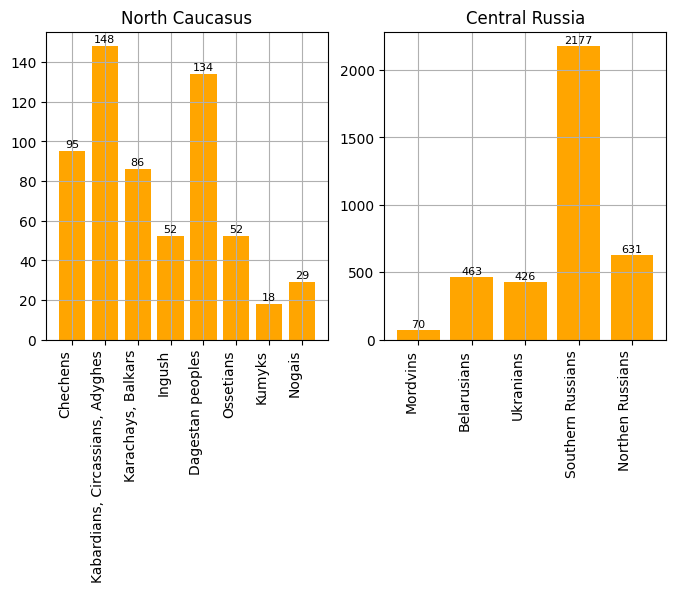

In [470]:
def addlabels(ax, x, y, t):
    for i in range(len(x)):
        ax.text(i, y[i] + 2 if t == 0 else y[i] + 20, y[i], ha = 'center', fontsize=8)

df_cr = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
df_nc = pd.read_csv(r"C:\HSE\genotek\NC_graph_rel.csv")

nodes_names_cr = set()
all_types_dict_cr = {}
nodes_names_nc = set()
all_types_dict_nc = {}

types_cr = pd.concat([df_cr['label_id1'], df_cr['label_id2']], axis=0).unique().tolist()
types_nc = pd.concat([df_nc['label_id1'], df_nc['label_id2']], axis=0).unique().tolist()


for t in types_cr:
    all_types_dict_cr[t] = 0
    
for t in types_nc:
    all_types_dict_nc[t] = 0

for i, n in enumerate(df_cr['node_id1']):
    if n not in nodes_names_cr:
        nodes_names_cr.add(n)
        all_types_dict_cr[df_cr['label_id1'][i]] += 1
        
for i, n in enumerate(df_cr['node_id2']):
    if n not in nodes_names_cr:
        nodes_names_cr.add(n)
        all_types_dict_cr[df_cr['label_id2'][i]] += 1
        
for i, n in enumerate(df_nc['node_id1']):
    if n not in nodes_names_nc:
        nodes_names_nc.add(n)
        all_types_dict_nc[df_nc['label_id1'][i]] += 1
        
for i, n in enumerate(df_nc['node_id2']):
    if n not in nodes_names_nc:
        nodes_names_nc.add(n)
        all_types_dict_nc[df_nc['label_id2'][i]] += 1
        
print(all_types_dict_cr)
print(all_types_dict_nc)

types_nc_m = ['Chechens', 'Kabardians, Circassians, Adyghes', 'Karachays, Balkars', 'Ingush', 'Dagestan peoples', 'Ossetians', 'Kumyks', 'Nogais']
types_cr_m = ['Mordvins', 'Belarusians', 'Ukranians', 'Southern Russians', 'Northen Russians']


plt.clf()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.bar(all_types_dict_nc.keys(), all_types_dict_nc.values(), color='orange')
ax2.bar(all_types_dict_cr.keys(), all_types_dict_cr.values(), color='orange')
ax1.set_xticklabels(types_nc_m, rotation = 90, ha='right')
ax2.set_xticklabels(types_cr_m, rotation = 90, ha='right')
addlabels(ax1, list(all_types_dict_nc.keys()), list(all_types_dict_nc.values()), 0)
addlabels(ax2, list(all_types_dict_cr.keys()), list(all_types_dict_cr.values()), 1)
ax1.grid()
ax2.grid()
ax1.set_title('North Caucasus')
ax2.set_title('Central Russia')
plt.savefig('num_nodes_per_classes_and_dataset.png', bbox_inches='tight')
plt.show()

## Training and results

### New approach

In [6]:
def get_targets(df, cond, names):
    types = df['label_id1'].unique().tolist()
    types_dict = {}

    for t in types:
        types_dict[t] = 0

    current_types_dict = types_dict.copy()

    targets_dict = {names[i]: None for i in range(len(names))}
    checked = []

    for i, n in enumerate(df['node_id1']):
        if n in checked:
            pass
        else:
            if (current_types_dict[df['label_id1'][i]] + 1) / all_types_dict[df['label_id1'][i]] < cond:
                    id_ = types.index(df['label_id1'][i])
                    current_types_dict[df['label_id1'][i]] += 1
            else:
                id_ = -1
            targets_dict[n] = id_
            checked.append(n)
            
    ####################################
    
    for i, n in enumerate(df['node_id2']):
        if n in checked:
            pass
        else:
            if (current_types_dict[df['label_id2'][i]] + 1) / all_types_dict[df['label_id2'][i]] < cond:
                    id_ = types.index(df['label_id2'][i])
                    current_types_dict[df['label_id2'][i]] += 1
            else:
                id_ = -1
            targets_dict[n] = id_
            checked.append(n)
        
    return list(targets_dict.values())

In [109]:
# inputs = np.zeros((num, num))
# names = ['?' for i in range(num)]
# adj = pd.DataFrame(inputs)

# node_names = pd.concat([df['node_id1'], df['node_id2']], axis=0).unique()
# node_names = sorted(list(map(lambda n: int(n.split('_')[1]), node_names)))

# adj.index = node_names
# adj

In [18]:
# inputs = np.zeros((num, num))
# names = ['?' for i in range(num)]
# for i, n in enumerate(df['node_id1']):
#     row = int(n.split('_')[1])
#     col = int(df['node_id2'][i].split('_')[1])
#     names[row] = n
#     names[col] = df['node_id2'][i]
#     inputs[row, col] = 1
#     inputs[col, row] = 1

# targets = get_targets(df, 2., names)

# np.save('adjacency_matrix.npy', inputs)
# np.save('classes.npy', np.array(targets))

In [19]:
# inputs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


[3 3 3 ... 3 3 3]
              precision    recall  f1-score   support

           0       0.11      0.12      0.12         8
           1       0.00      0.00      0.00        47
           2       0.00      0.00      0.00        43
           3       0.58      0.98      0.73       218
           4       0.00      0.00      0.00        64

    accuracy                           0.57       380
   macro avg       0.14      0.22      0.17       380
weighted avg       0.33      0.57      0.42       380

[[  1   0   0   7   0]
 [  3   0   0  44   0]
 [  1   0   0  42   0]
 [  4   0   0 214   0]
 [  0   0   0  64   0]]


C:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\anaconda3\lib\site-packages\sklearn\metrics\

<Figure size 432x288 with 0 Axes>

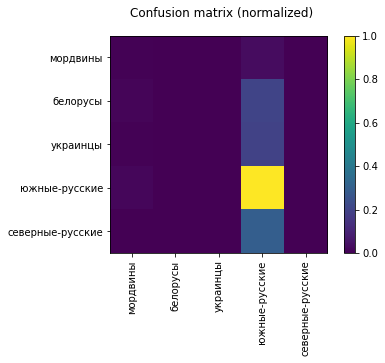

C:\Users\Alex\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [112]:
inputs = np.zeros((num, num))
names = ['?' for i in range(num)]
for i, n in enumerate(df['node_id1']):
    row = int(n.split('_')[1])
    col = int(df['node_id2'][i].split('_')[1])
    names[row] = n
    names[col] = df['node_id2'][i]
    inputs[row, col] = df['ibd_sum'][i]
    inputs[col, row] = df['ibd_sum'][i]

targets = get_targets(df, 0.9, names)

label_prop_model = LabelSpreading(kernel='rbf', n_neighbors=10, max_iter=10000, tol=1e-3, n_jobs=-1, gamma=0.0005)
label_prop_model.fit(inputs, targets)
predicted = label_prop_model.predict(inputs)

print(predicted)

##############################

unlabeled_targets = np.array(targets) == -1

targets = np.array(get_targets(df, 2, names)) # second number - whatever number > 1 because we need to select all data

print(classification_report(targets[unlabeled_targets], predicted[unlabeled_targets]))
cr = classification_report(targets[unlabeled_targets], predicted[unlabeled_targets], output_dict=True)

cm = confusion_matrix(targets[unlabeled_targets], predicted[unlabeled_targets], labels=label_prop_model.classes_)
print(cm)

plt.clf()
fig, ax = plt.subplots(1, 1)
img = ax.imshow(cm/np.max(cm))
ax.set_xticks([i for i in range(5)])
ax.set_xticklabels(all_types_dict.keys(), rotation = 90)
ax.set_yticks([i for i in range(5)])
ax.set_yticklabels(all_types_dict.keys())
fig.colorbar(img)
fig.suptitle("Confusion matrix (normalized)")
plt.savefig(r"C:\HSE\genotek\cm_cr.png", bbox_inches="tight")
plt.show()

for i in range(5):
    fpr, tpr, _ = metrics.roc_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)
    pre, rec, _ = metrics.precision_recall_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)

    plt.clf()
    plt.title('Precision / Recall for ' + list(all_types_dict.keys())[i])
    plt.plot(rec, pre)
    plt.plot(cr[str(i)]['recall'], cr[str(i)]['precision'], 'ro')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.savefig(rf"C:\HSE\genotek\precision_recall_curves_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()
    
    plt.clf()
    plt.title('TPR / FPR for ' + list(all_types_dict.keys())[i])
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % metrics.auc(fpr, tpr), color="darkorange")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.legend(loc="lower right")
    plt.savefig(rf"C:\HSE\genotek\roc_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()

### Old approach

{'мордвины': 24, 'белорусы': 162, 'украинцы': 149, 'южные-русские': 761, 'северные-русские': 220}
{'мордвины': 70, 'белорусы': 463, 'украинцы': 426, 'южные-русские': 2177, 'северные-русские': 631}
{'мордвины': 70, 'белорусы': 424, 'украинцы': 389, 'южные-русские': 2160, 'северные-русские': 628}
{'мордвины': 70, 'белорусы': 463, 'украинцы': 426, 'южные-русские': 2177, 'северные-русские': 631}
              precision    recall  f1-score   support

           0       1.00      0.04      0.08        46
           1       0.34      0.56      0.42       262
           2       0.21      0.90      0.35       240
           3       0.94      0.51      0.66      1399
           4       0.89      0.31      0.46       408

    accuracy                           0.51      2355
   macro avg       0.68      0.47      0.39      2355
weighted avg       0.79      0.51      0.56      2355

[[   2   12   38    4   14]
 [   0  247  114   59    4]
 [   0   29  320   36    4]
 [   0  182  502 1466   10]
 [  

<Figure size 432x288 with 0 Axes>

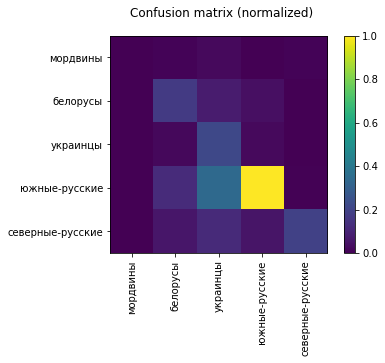

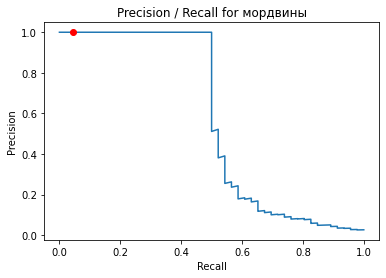

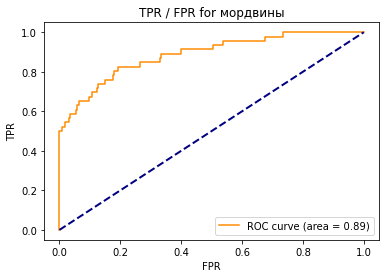

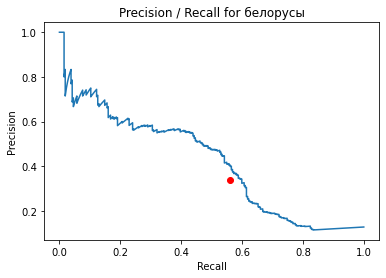

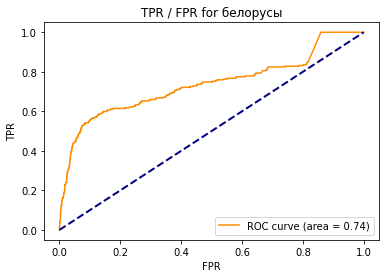

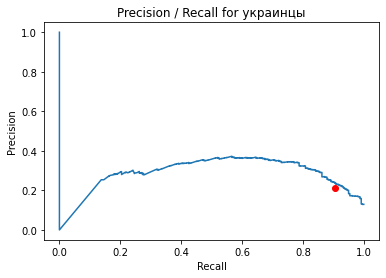

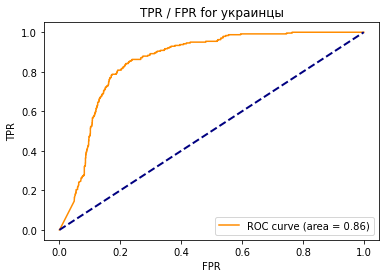

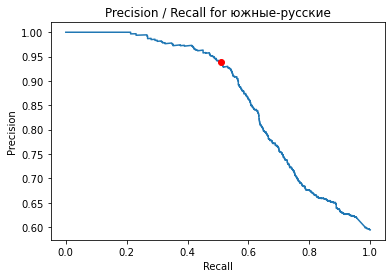

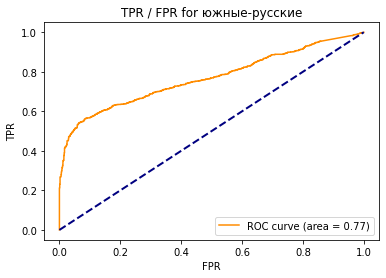

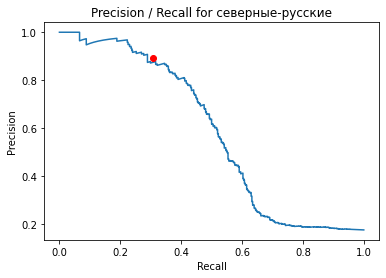

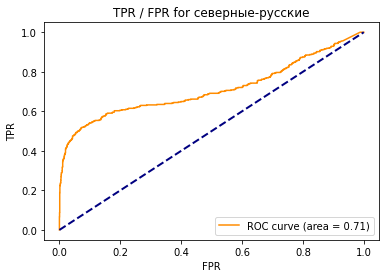

In [35]:
def get_dataset(df, cond):
    types = df['label_id1'].unique().tolist()
    types_dict = {}

    for t in types:
        types_dict[t] = 0

    current_types_dict = types_dict.copy()

    nodes_dict = {}
    
    for i, n in enumerate(df['node_id1']):
        if n in nodes_dict.keys():
            nodes_dict[n][0][df['label_id2'][i]] += df['ibd_sum'][i]
        else:
            if (current_types_dict[df['label_id1'][i]] + 1) / all_types_dict[df['label_id1'][i]] < cond:
                id_ = types.index(df['label_id1'][i])
                current_types_dict[df['label_id1'][i]] += 1
            else:
                id_ = -1
            nodes_dict[n] = [types_dict.copy(), id_]
            
    print(current_types_dict)
    print(all_types_dict)
        
    return nodes_dict

data = get_dataset(df, 0.35) # second number - the part of training data

inputs = [list(i[0].values()) for i in list(data.values())]
targets = [i[1] for i in list(data.values())]

def rbf_kernel_safe(X, Y=None, gamma=None): 

    X, Y = sklearn.metrics.pairwise.check_pairwise_arrays(X, Y) 
    if gamma is None: 
        gamma = 1.0 / X.shape[1] 

    K = sklearn.metrics.pairwise.euclidean_distances(X, Y, squared=True) 
    K *= -gamma 
    K -= K.max()
    np.exp(K, K)    # exponentiate K in-place 
    return K 

label_prop_model = LabelSpreading(kernel='knn', n_neighbors=200, max_iter=1000, tol=1e-3, n_jobs=-1, gamma=0.001)
label_prop_model.fit(inputs, targets)
predicted = label_prop_model.predict(inputs)

unlabeled_targets = np.array(targets) == -1

data = get_dataset(df, 2) # second number - whatever number > 1 because we need to select all data

targets = np.array([i[1] for i in list(data.values())])

print(classification_report(targets[unlabeled_targets], predicted[unlabeled_targets]))
cr = classification_report(targets[unlabeled_targets], predicted[unlabeled_targets], output_dict=True)

cm = confusion_matrix(targets, predicted, labels=label_prop_model.classes_)
print(cm)

plt.clf()
fig, ax = plt.subplots(1, 1)
img = ax.imshow(cm/np.max(cm))
ax.set_xticks([i for i in range(5)])
ax.set_xticklabels(all_types_dict.keys(), rotation = 90)
ax.set_yticks([i for i in range(5)])
ax.set_yticklabels(all_types_dict.keys())
fig.colorbar(img)
fig.suptitle("Confusion matrix (normalized)")
plt.savefig(r"C:\HSE\genotek\cm_cr.png", bbox_inches="tight")
plt.show()

for i in range(5):
    fpr, tpr, _ = metrics.roc_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)
    pre, rec, _ = metrics.precision_recall_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)

    plt.clf()
    plt.title('Precision / Recall for ' + list(all_types_dict.keys())[i])
    plt.plot(rec, pre)
    plt.plot(cr[str(i)]['recall'], cr[str(i)]['precision'], 'ro')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.savefig(rf"C:\HSE\genotek\precision_recall_curves_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()
    
    plt.clf()
    plt.title('TPR / FPR for ' + list(all_types_dict.keys())[i])
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % metrics.auc(fpr, tpr), color="darkorange")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.legend(loc="lower right")
    plt.savefig(rf"C:\HSE\genotek\roc_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()

# Tensorflow

In [3]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, EarlyStopping
from tensorflow.keras.layers import Dense, Input, Concatenate, Dropout, BatchNormalization
import gc

In [41]:
def get_dataset(df, cond):
    types = df['label_id1'].unique().tolist()
    types_dict = {}

    for t in types:
        types_dict[t] = 0

    current_types_dict = types_dict.copy()

    nodes_dict = {}
    selection = []
    
    for i, n in enumerate(df['node_id1']):
        if n in nodes_dict.keys():
            nodes_dict[n][0][df['label_id2'][i]] += df['ibd_sum'][i]
        else:
            if (current_types_dict[df['label_id1'][i]] + 1) / all_types_dict[df['label_id1'][i]] < cond:
                id_ = types.index(df['label_id1'][i])
                current_types_dict[df['label_id1'][i]] += 1
                selection.append(id_)
            else:
                selection.append(-1)
            nodes_dict[n] = [types_dict.copy(), id_]
            
        
    return nodes_dict, np.array(selection)

data, selection = get_dataset(df, 0.7)

inputs = np.array([list(i[0].values()) for i in list(data.values())])
targets = np.array([i[1] for i in list(data.values())])

train_inputs = inputs[selection != -1]
train_targets = targets[selection != -1]

test_inputs = inputs[selection == -1]
test_targets = targets[selection == -1]

train_targets

array([0, 0, 0, ..., 2, 2, 2])

In [69]:
inputs = Input(shape =(5,))

x0 = Dense(1024, activation = 'relu')(inputs)
x1 = Dense(1024, activation = 'relu')(inputs)
x2 = Dense(1024, activation = 'relu')(inputs)
x3 = Dense(1024, activation = 'relu')(inputs)

x = Concatenate()([
                x0, 
                x1, 
                x2,
                x3
               ])

x = Dense(5, activation = 'softmax')(x)

model = Model(inputs, x)

In [70]:
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 5)]          0           []                               
                                                                                                  
 dense_32 (Dense)               (None, 1024)         6144        ['input_14[0][0]']               
                                                                                                  
 dense_33 (Dense)               (None, 1024)         6144        ['input_14[0][0]']               
                                                                                                  
 dense_34 (Dense)               (None, 1024)         6144        ['input_14[0][0]']               
                                                                                           

In [71]:
gc.collect()

lr = ReduceLROnPlateau(
                    monitor = "val_loss",
                    factor = 0.9, 
                    patience = 4, 
                    verbose = 0)

es = EarlyStopping(
                    monitor = "val_loss",
                    patience = 40, 
                    verbose = 0,
                    mode = "min", 
                    restore_best_weights = True)

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                    filepath = './genotek',
                    save_weights_only = True,
                    monitor = 'val_loss',
                    mode = 'min',
                    save_best_only = True)

callbacks = [
                    lr, 
                    es, 
                    model_checkpoint_callback
                    ]

model.compile(
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = 'acc',
                loss = tf.keras.losses.SparseCategoricalCrossentropy()
                 )

    
model.fit(train_inputs,
                train_targets, 
                validation_data=(test_inputs,
                                test_targets), 
                epochs = 1000,
                verbose = 1,
                batch_size = 16,
                shuffle = True,
                callbacks = callbacks)

model.load_weights('./genotek')

predicted = np.argmax(model.predict(test_inputs), axis=1)

print(classification_report(test_targets, predicted))

Epoch 1/1000
165/165 [==============================] - 1s 5ms/step - loss: 5.6681 - acc: 0.8014 - val_loss: 4.1274 - val_acc: 0.3877 - lr: 0.0100
Epoch 2/1000
165/165 [==============================] - 1s 4ms/step - loss: 0.4504 - acc: 0.8489 - val_loss: 3.3604 - val_acc: 0.3770 - lr: 0.0100
Epoch 3/1000
165/165 [==============================] - 0s 3ms/step - loss: 0.5584 - acc: 0.8421 - val_loss: 4.8949 - val_acc: 0.3703 - lr: 0.0100
Epoch 4/1000
165/165 [==============================] - 0s 3ms/step - loss: 0.4622 - acc: 0.8462 - val_loss: 4.8226 - val_acc: 0.3934 - lr: 0.0100
Epoch 5/1000
165/165 [==============================] - 0s 3ms/step - loss: 0.4546 - acc: 0.8542 - val_loss: 4.2798 - val_acc: 0.3664 - lr: 0.0100
Epoch 6/1000
165/165 [==============================] - 0s 3ms/step - loss: 0.4398 - acc: 0.8622 - val_loss: 3.9673 - val_acc: 0.3838 - lr: 0.0100
Epoch 7/1000
165/165 [==============================] - 1s 3ms/step - loss: 0.4081 - acc: 0.8580 - val_loss: 4.8862 - 

C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

# Torch Geometric

In [2]:
import torch
print(torch.__version__)
from torch_geometric.data import InMemoryDataset, Data
from torch_geometric.loader import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.nn as nn

1.13.0+cu116


## Vanillia example

In [3]:
import networkx as nx
from torch_geometric.utils.convert import from_networkx

In [180]:
G = nx.Graph()

# Add some cars (just do 4 for now)
G.add_nodes_from([
      (1, {'y': 0, 'x': [[0.5], [0.8], [0.9]]}),
      (2, {'y': 0, 'x': [[0.2], [0.8], [0.9]]}),
      (3, {'y': 1, 'x': [[0.3], [0.8], [0.9]]}),
      (4, {'y': 1, 'x': [[0.1], [0.8], [0.9]]}),
      (5, {'y': 1, 'x': [[0.2], [0.8], [0.9]]}),
])

# Add some edges
G.add_edges_from([
                  (1, 2), (1, 4), (1, 5),
                  (2, 3), (2, 4),
                  (3, 2), (3, 5),
                  (4, 1), (4, 2),
                  (5, 1), (5, 3)
])

# Convert the graph into PyTorch geometric
pyg_graph = from_networkx(G)

pyg_graph.num_classes = 2

print(pyg_graph.num_features)

print(pyg_graph)
# Data(edge_index=[2, 12], x=[5], y=[5])
print(pyg_graph.x)
# tensor([0.5000, 0.2000, 0.3000, 0.1000, 0.2000])
print(pyg_graph.y)
# tensor([1, 2, 3, 4, 5])
print(pyg_graph.edge_index)
# tensor([[0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4],
#         [1, 3, 4, 0, 2, 3, 1, 4, 0, 1, 0, 2]])


# # Split the data 
# train_ratio = 0.2
# num_nodes = pyg_graph.x.shape[0]
# num_train = int(num_nodes * train_ratio)
# idx = [i for i in range(num_nodes)]

# np.random.shuffle(idx)
# train_mask = torch.full_like(pyg_graph.y, False, dtype=bool)
# train_mask[idx[:num_train]] = True
# test_mask = torch.full_like(pyg_graph.y, False, dtype=bool)
# test_mask[idx[num_train:]] = True

# print(train_mask)
# # tensor([ True, False, False, False, False])
# print(test_mask)
# # tensor([False,  True,  True,  True,  True])

1
Data(x=[5, 3, 1], edge_index=[2, 12], y=[5], num_classes=2)
tensor([[[0.5000],
         [0.8000],
         [0.9000]],

        [[0.2000],
         [0.8000],
         [0.9000]],

        [[0.3000],
         [0.8000],
         [0.9000]],

        [[0.1000],
         [0.8000],
         [0.9000]],

        [[0.2000],
         [0.8000],
         [0.9000]]])
tensor([0, 0, 1, 1, 1])
tensor([[0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4],
        [1, 3, 4, 0, 2, 3, 1, 4, 0, 1, 0, 2]])


In [184]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# GCN model with 2 layers 
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(data.num_features*3, 16)
        self.conv2 = GCNConv(16, int(data.num_classes))

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        print('GOOGLE1')
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        print('GOOGLE2')
        return F.log_softmax(x, dim=1)

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'
print(device)

data =  pyg_graph.to(device)

model = Net().to(device)

criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out= model(data)  # Perform a single forward pass.
    loss = criterion(out, data.y)  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss

for epoch in range(401):
    loss = train(data)
    print(loss)

cpu
GOOGLE1


RuntimeError: index 3 is out of bounds for dimension 0 with size 3

Testing vanilia example on different graph size

In [179]:
model.eval()
model(pyg_graph_big.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (18x1 and 3x16)

## Real example from scratch

In [4]:
from numba import njit, prange
import time
import seaborn as sns

In [5]:
from torch.nn import Linear

class AttnGCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GATConv(in_channels=5,
                             out_channels=15,
                             heads=2, 
                             add_self_loops=False,
                             edge_dim=1)
        self.fc1 = Linear(30, 15)
        self.fc2 = Linear(15, 5)

    def forward(self, data):
        x, edge_index, edge_weight = data.x.float(), data.edge_index, data.weight.float()
        h = self.conv1(x, edge_index, edge_weight)
        h = h.relu()
        h = self.fc1(h)
        h = h.relu()
        h = self.fc2(h)
        return h



In [6]:
import torch
from torch.nn import Linear, BatchNorm1d
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.norm = BatchNorm1d(5)
        self.conv1 = GCNConv(5, 15, 
                             add_self_loops=False,
                             normalize=True)
        self.conv2 = GCNConv(15, 15, 
                             add_self_loops=False,
                             normalize=True)
        self.fc1 = Linear(15, 15)
        self.fc2 = Linear(15, 15)
        self.fc3 = Linear(15, 5)

    def forward(self, data):
        x, edge_index, edge_weight = data.x.float(), data.edge_index, data.weight.float()
        h = self.norm(x)
        h = self.conv1(h, edge_index, edge_weight)
        h = h.relu()
        h = self.conv2(h, edge_index, edge_weight)
        h = h.relu()
        h = self.fc1(h)
        h = h.relu()
        h = self.fc2(h)
        h = h.relu()
        h = self.fc3(h)
        return h

In [77]:
import torch
from torch.nn import Linear, BatchNorm1d
from torch_geometric.nn import GCNConv

class SimpleNN8(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.norm = BatchNorm1d(8)
        self.fc1 = Linear(8, 15)
        self.fc2 = Linear(15, 15)
        self.fc3 = Linear(15, 8)

    def forward(self, data):
        h, edge_index, edge_weight = data.x.float(), data.edge_index, data.weight.float()
        h = self.norm(h)
        h = self.fc1(h)
        h = h.relu()
        h = self.fc2(h)
        h = h.relu()
        h = self.fc3(h)
        return h
    
    
class SimpleNN5(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.norm = BatchNorm1d(5)
        self.fc1 = Linear(5, 15)
        self.fc2 = Linear(15, 15)
        self.fc3 = Linear(15, 5)

    def forward(self, data):
        h, edge_index, edge_weight = data.x.float(), data.edge_index, data.weight.float()
        h = self.norm(h)
        h = self.fc1(h)
        h = h.relu()
        h = self.fc2(h)
        h = h.relu()
        h = self.fc3(h)
        return h

Raw data

In [6]:
df = pd.read_csv(r"C:\HSE\genotek\NC_graph_rel.csv")
df

,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
0,node_0,node_1,чеченцы,чеченцы,9.76537,1
1,node_0,node_13,чеченцы,чеченцы,26.49970,3
2,node_0,node_15,чеченцы,чеченцы,8.31678,1
3,node_0,node_594,чеченцы,чеченцы,8.64458,1
4,node_1,node_8,чеченцы,чеченцы,8.14209,1
...,...,...,...,...,...,...
6292,node_624,node_629,ингуши,осетины,11.24220,1
6293,node_624,node_630,ингуши,чеченцы,14.70900,2
6294,node_625,node_628,осетины,осетины,8.26460,1
6295,node_625,node_629,осетины,осетины,8.91348,1


Function for getting train and test nodes

In [6]:
def get_train_test_nodes(df, train_coeff, mask_coeff, NC=False):
    
    # get list of all labels
    types = pd.concat([df['label_id1'], df['label_id2']], axis=0).unique().tolist()
    print("TYPES: ", types)
    
    # concatenate all nodes in one column
    n = pd.concat([df['node_id1'], df['node_id2']], axis=0)
    
    # concatenate all labels in one column
    l = pd.concat([df['label_id1'], df['label_id2']], axis=0)
    
    # merge all nodes and all labels column-wise
    df_new = pd.concat([n, l], axis=1)
    
    # get class for every node 
    df_new.iloc[:, 0] = df_new.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
    df_new.iloc[:, 1] = df_new.iloc[:, 1].apply(lambda t: types.index(t))
    df_new = df_new.drop_duplicates()
    node_classes_random = df_new.sample(frac=1)
    node_classes_sorted = df_new.sort_values(by=[0])
    
    if NC:
        missed_nodes = []
        for i in range(node_classes_sorted.shape[0]):
            if i not in node_classes_sorted.iloc[:, 0].to_numpy():
                missed_nodes.append([i, -1])
        
        tmp_df = pd.DataFrame(missed_nodes)
        
        print(tmp_df)
        
        node_classes_sorted = pd.concat([node_classes_sorted, tmp_df], axis=0).sort_values(by=[0])
    
    # get number of nodes for every class
    num_nodes_per_class = node_classes_random.iloc[:, 1].value_counts()
    
    train_nodes, test_nodes = [], []
    node_counter = {i:0 for i in range(num_nodes_per_class.shape[0])}
    
    # add masking
    mask_array = []
    
    # split nodes
    for i in range(node_classes_random.shape[0]):
        node_class = node_classes_random.iloc[i, 1]
        if node_counter[node_class] < int(train_coeff * num_nodes_per_class.loc[node_class]):
            train_nodes.append(node_classes_random.iloc[i, 0])
            
            if node_counter[node_class] >= int(mask_coeff * train_coeff * num_nodes_per_class.loc[node_class]):
                mask_array.append(True)
            else:
                mask_array.append(False)
            
            node_counter[node_class] += 1
        else:
            test_nodes.append(node_classes_random.iloc[i, 0])
    
    return train_nodes, test_nodes, node_classes_sorted, mask_array

def make_train_test_dataset(df, train_nodes: list, test_nodes: list, node_classes_sorted, mask_array):
    
    train_mask_array = mask_array
    
    # get list of all labels
    types = pd.concat([df['label_id1'], df['label_id2']], axis=0).unique().tolist()
    print("TYPES: ", types)
    
    # preprocess initial data
    df_processed = df.copy()
    df_processed.iloc[:, 0] = df_processed.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
    df_processed.iloc[:, 1] = df_processed.iloc[:, 1].apply(lambda n: int(n.split('_')[1]))
    df_processed.iloc[:, 2] = df_processed.iloc[:, 2].apply(lambda t: types.index(t))
    df_processed.iloc[:, 3] = df_processed.iloc[:, 3].apply(lambda t: types.index(t))
    
    # making dataframe with only training nodes
    df_for_training = df_processed.copy()
    
    drop_rows = drop_rows_for_training_dataset(df_for_training.to_numpy(), np.array(test_nodes))
    
    df_for_training = df_for_training.drop(drop_rows)
    
    # construct training graph ############################# SAME PART BELOW ##############################
    
    # construct hash map for training nodes
    hashmap = np.array([1e6 for i in range(len(node_classes_sorted))]).astype(int)
    for i, node in enumerate(train_nodes):
        hashmap[node] = i
        
    print(hashmap)
    
    # calculate sum of idb for each training node
    sum_training_idb = np.zeros((len(train_nodes), len(types)))
    
    calculate_sum_of_idb_for_each_node(sum_training_idb, df_for_training.to_numpy(), hashmap, np.array(train_mask_array))
        
    print(node_classes_sorted)
                
    # construct targets
    targets = construct_node_classes(node_classes_sorted.to_numpy(), train_nodes)
        
    # construct edges
    train_graph_weighted_edges = construct_edges(df_for_training.to_numpy(), hashmap)
    
    sort_idx = np.lexsort((train_graph_weighted_edges[:, 1], train_graph_weighted_edges[:, 0]))
    train_graph_weighted_edges = train_graph_weighted_edges[sort_idx]
    
    train_graph_pytorch = Data.from_dict({'y': torch.tensor(targets, dtype=torch.long), 'x': torch.tensor(sum_training_idb), 'weight': torch.tensor(train_graph_weighted_edges[:, 2]), 'edge_index': torch.tensor(train_graph_weighted_edges[:, :2].T, dtype=torch.long)})
    
    train_graph_pytorch.num_classes = len(types)
    
    if len(np.unique(train_graph_pytorch.edge_index.cpu().detach().numpy())) != len(train_nodes):
        raise Exception("Train graph is not connected!!! Restart assembling!")
    
    ############################# SAME PART UP ##############################
    
    # creating array of graphs for testing
    
    array_of_graphs_for_testing = []
    
    print('Starting selecting lines...')
    
    start = time.time()
    
    rows_for_adding_per_node = select_lines(np.array(train_nodes), np.array(test_nodes), df_processed.to_numpy())
    
    end = time.time()
    
    print(f'Done selecting lines in {end-start} seconds')
    
    warning_counter = 0
    
    for k, test_node in enumerate(test_nodes):
        
        print(f'Processed {k} / {len(test_nodes)} nodes')
        
        test_mask_array = train_mask_array + [True]
        
        rows_for_adding = rows_for_adding_per_node[k]
                
        df_for_testing = pd.concat([df_for_training, df_processed.iloc[rows_for_adding]], axis=0)
        
        print(df_for_testing.shape, df_for_training.shape)
        
        if df_for_testing.shape[0] == df_for_training.shape[0]:
            warning_counter += 1
        
        current_test_nodes = train_nodes + [test_node]
        
        # construct testing graph ############################# SAME PART BELOW ##############################
    
        start = time.time()
        
        # construct hash map for training nodes
        hashmap = np.array([1e6 for i in range(len(node_classes_sorted))]).astype(int)
        for i, node in enumerate(current_test_nodes):
            hashmap[node] = i
            
#         print('HASHMAP:', hashmap)
    
        # calculate sum of idb for each training node
        sum_testing_idb = np.zeros((len(current_test_nodes), len(types)))
    
        calculate_sum_of_idb_for_each_node(sum_testing_idb, df_for_testing.to_numpy(), hashmap, np.array(test_mask_array))
            
        print(f'calculate sum of idb for each training node: {time.time() - start}')
        
        start = time.time()

        # construct targets
        targets = construct_node_classes(node_classes_sorted.to_numpy(), current_test_nodes)
            
        print(f'construct targets: {time.time() - start}')
        
        start = time.time()

        # construct edges
        test_graph_weighted_edges = construct_edges(df_for_testing.to_numpy(), hashmap)
        
        sort_idx = np.lexsort((test_graph_weighted_edges[:, 1], test_graph_weighted_edges[:, 0]))
        test_graph_weighted_edges = test_graph_weighted_edges[sort_idx]
            
        print(f'construct edges: {time.time() - start}')
        
#         start = time.time()

        test_graph_pytorch = Data.from_dict({'y': torch.tensor(targets, dtype=torch.long), 'x': torch.tensor(sum_testing_idb), 'weight': torch.tensor(test_graph_weighted_edges[:, 2]), 'edge_index': torch.tensor(test_graph_weighted_edges[:, :2].T, dtype=torch.long)})
        
        test_graph_pytorch.num_classes = len(types)
        
        array_of_graphs_for_testing.append(test_graph_pytorch)
        
#         print(f'build pytorch geometric dataset: {time.time() - start}')
        
        ############################# SAME PART UP ##############################
        
    print('WARNING COUNTER:', warning_counter)
    
    return train_graph_pytorch, array_of_graphs_for_testing, types

In [7]:
@njit(cache=True)
def select_lines(train_nodes, test_nodes, df_processed):
    
    rows_for_adding_per_node = []
    
    for i in range(len(test_nodes)):
        tmp = []
        for j in range(df_processed.shape[0]):
            row = df_processed[j]
            if int(row[0]) == test_nodes[i] and int(row[1]) in train_nodes or int(row[1]) == test_nodes[i] and int(row[0]) in train_nodes:
                
                tmp.append(j)
                
        rows_for_adding_per_node.append(tmp)
    
    return rows_for_adding_per_node


@njit(cache=True)
def calculate_sum_of_idb_for_each_node(sum_testing_ibd, df_for_testing, hashmap, mask_array):
    
    for i in range(df_for_testing.shape[0]):
        row = df_for_testing[i]
        if mask_array[hashmap[int(row[0])]]:
            sum_testing_ibd[hashmap[int(row[0])], int(row[3])] += row[4]
            sum_testing_ibd[hashmap[int(row[1])], int(row[2])] += row[4]


@njit(cache=True)
def construct_edges(df_for_testing, hashmap):
    
    test_graph_weighted_edges = []
    
    for i in range(df_for_testing.shape[0]):
        row = df_for_testing[i]
        test_graph_weighted_edges.append([hashmap[int(row[0])], hashmap[int(row[1])], row[4]])
        test_graph_weighted_edges.append([hashmap[int(row[1])], hashmap[int(row[0])], row[4]])
        
    return np.array(test_graph_weighted_edges)


@njit(cache=True)
def drop_rows_for_training_dataset(df_for_training, test_nodes):
    drop_rows = []
    for i in range(df_for_training.shape[0]): # speed it up in future
        if i % 1000 == 0:
            print(f'Processed {i} / {df_for_training.shape[0]} lines for training dataset')
        row = df_for_training[i, :]
        if int(row[0]) in test_nodes or int(row[1]) in test_nodes:
            drop_rows.append(i)
            
    return drop_rows


@njit(cache=True)
def construct_node_classes(node_classes_sorted, current_nodes):
    targets = []
    for node in current_nodes:
        targets.append(node_classes_sorted[node, 1])
        
    return targets
    

Testing data preprocessing

In [29]:
debugging_df = pd.DataFrame([['node_0', 'node_1', 'a', 'a', 10, 0],
                            ['node_0', 'node_2', 'a', 'b', 10, 0],
                            ['node_0', 'node_4', 'a', 'b', 10, 0],
                            ['node_1', 'node_2', 'a', 'b', 10, 0],
                            ['node_1', 'node_3', 'a', 'b', 10, 0],
                            ['node_0', 'node_3', 'a', 'b', 10, 0],
                            ['node_0', 'node_4', 'a', 'b', 10, 0],
                            ['node_0', 'node_5', 'a', 'a', 10, 0],
                            ['node_1', 'node_4', 'a', 'b', 10, 0],
                            ['node_1', 'node_5', 'a', 'a', 10, 0],
                            ['node_1', 'node_6', 'a', 'a', 10, 0],
                            ['node_1', 'node_7', 'a', 'a', 10, 0],
                            ['node_2', 'node_8', 'b', 'a', 10, 0],
                            ['node_2', 'node_3', 'b', 'b', 10, 0],
                            ['node_2', 'node_4', 'b', 'b', 10, 0],
#                             ['node_2', 'node_9', 'b', 'b', 10, 0],
                            ['node_2', 'node_10', 'b', 'b', 10, 0],
                            ['node_3', 'node_9', 'b', 'b', 10, 0],
                            ['node_3', 'node_6', 'b', 'a', 10, 0],
                            ['node_3', 'node_7', 'b', 'a', 10, 0]], columns=['node_id1', 'node_id2', 'label_id1', 'label_id2', 'ibd_sum', 'ibd_n'])

# a: 0, 1, 5, 6, 7, 8
# b: 2, 3, 4, 9, 10

In [30]:
debugging_df

,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
0,node_0,node_1,a,a,10,0
1,node_0,node_2,a,b,10,0
2,node_0,node_4,a,b,10,0
3,node_1,node_2,a,b,10,0
4,node_1,node_3,a,b,10,0
5,node_0,node_3,a,b,10,0
6,node_0,node_4,a,b,10,0
7,node_0,node_5,a,a,10,0
8,node_1,node_4,a,b,10,0
9,node_1,node_5,a,a,10,0


In [75]:
tr, ts, nks, mask_array = get_train_test_nodes(debugging_df, 0.7, mask_coeff=0.0, NC=False) # to-do: 70:30 split ration because kenenbek did it this way
print(tr)
print(ts)
data, test_graphs, types = make_train_test_dataset(debugging_df, tr, ts, nks, mask_array)

TYPES:  ['a', 'b']
[5, 2, 3, 10, 1, 7, 8]
[4, 6, 9, 0]
TYPES:  ['a', 'b']
Processed 0 / 19 lines for training dataset
[1000000       4       1       2 1000000       0 1000000       5       6
 1000000       3]
     0  1
0    0  0
3    1  0
12   2  1
16   3  1
2    4  1
7    5  0
10   6  0
11   7  0
12   8  0
16   9  1
15  10  1
Starting selecting lines...
Done selecting lines in 0.03573727607727051 seconds
Processed 0 / 4 nodes
(10, 6) (8, 6)
HASHMAP: [1000000       4       1       2       7       0 1000000       5       6
 1000000       3]
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0
construct edges: 0.0
Processed 1 / 4 nodes
(10, 6) (8, 6)
HASHMAP: [1000000       4       1       2 1000000       0       7       5       6
 1000000       3]
calculate sum of idb for each training node: 0.0
construct targets: 0.0
construct edges: 0.0
Processed 2 / 4 nodes
(9, 6) (8, 6)
HASHMAP: [1000000       4       1       2 1000000       0 1000000       5    

In [64]:
data

Data(x=[5, 2], edge_index=[2, 2], y=[5], weight=[2], num_classes=2)

In [65]:
data.x

tensor([[10.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0., 10.]], dtype=torch.float64)

In [68]:
test_graphs[0].x

tensor([[20.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0., 10.],
        [ 0., 10.]], dtype=torch.float64)

Special functions for metis

In [67]:
def parse_metis_file_to_dataframe(path):
    
    data = []
    types = ['Central-Russia', 'Jews']
    
    with open(path, 'r') as f:
        for i, line in enumerate(f):
            if i % 10000 == 0:
                print(f"Done {i} / lines")
            tmp = []
            if i != 0:
                items = line.split(',')
                
                node1 = items[0]
                node2 = items[1]
                ibd = float(items[2])
                
                if items[3][0] == "\"":
                    node1_p1 = items[3].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")
                    node1_p2 = items[4].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")
                    
                    if float(node1_p1[1]) > float(node1_p2[1]): #50% / 50% ???
                        node1_type = types.index(node1_p1[0])
                    else:
                        node1_type = types.index(node1_p2[0])
                        
                    if items[5][0] == "\"":
                        node2_p1 = items[5].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")
                        node2_p2 = items[6].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")

                        if float(node2_p1[1]) > float(node2_p2[1]): #50% / 50% ???
                            node2_type = types.index(node2_p1[0])
                        else:
                            node2_type = types.index(node2_p2[0])
                            
                    else:
                        node2_p1 = items[5].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")
                    
                        node2_type = types.index(node2_p1[0])
                    
                else:
                    node1_p1 = items[3].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")
                    
                    node1_type = types.index(node1_p1[0])
                    
                    if items[4][0] == "\"":
                        node2_p1 = items[4].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")
                        node2_p2 = items[5].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').replace(" ", '').split(":")

                        if float(node2_p1[1]) > float(node2_p2[1]): #50% / 50% ???
                            node2_type = types.index(node2_p1[0])
                        else:
                            node2_type = types.index(node2_p2[0])
                            
                    else:
                        node2_p1 = items[4].replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').replace("\"", '').split(":")
                    
                        node2_type = types.index(node2_p1[0])
                    
                    
                tmp = [node1, node2, node1_type, node2_type, ibd]
                data.append(tmp)
    
    return pd.DataFrame(data, columns=['node_id1', 'node_id2', 'label_id1', 'label_id2', 'ibd_sum'])

In [252]:
from collections import defaultdict
from typing import Any, Iterable, List, Optional, Tuple, Union
from torch import Tensor
import networkx as nx
from torch_geometric.data import Data

def from_networkx_numba_edition(G, group_node_attrs = None, group_edge_attrs = None):

    start = time.time()
    
    G = nx.convert_node_labels_to_integers(G)
#     print('1' if not nx.is_directed(G) else '2')
#     G = G.to_directed() if not nx.is_directed(G) else G
    
    print(list(G.nodes))
    print(list(G.edges))
    
    print(f'CUSTOM 1_0: {time.time() - start}')
    start = time.time()

    if isinstance(G, (nx.MultiGraph, nx.MultiDiGraph)):
        edges = list(G.edges(keys=False))
    else:
        edges = list(G.edges)
        
    print(f'CUSTOM 1_1: {time.time() - start}')
    start = time.time()

    edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
    
    print(f'CUSTOM 1_2: {time.time() - start}')
    start = time.time()

    data = defaultdict(list)

    if G.number_of_nodes() > 0:
        node_attrs = list(next(iter(G.nodes(data=True)))[-1].keys())
    else:
        node_attrs = {}
        
    print(f'CUSTOM 1_3: {time.time() - start}')
    start = time.time()

    if G.number_of_edges() > 0:
        edge_attrs = list(next(iter(G.edges(data=True)))[-1].keys())
    else:
        edge_attrs = {}
    
    print(f'CUSTOM 1_4: {time.time() - start}')
    start = time.time()
        
#     print(G.nodes(data=True))

    for i, (_, feat_dict) in enumerate(G.nodes(data=True)): 
        if set(feat_dict.keys()) != set(node_attrs):
            raise ValueError('Not all nodes contain the same attributes')
        for key, value in feat_dict.items():
            data[str(key)].append(value)
            
    print(f'CUSTOM 2: {time.time() - start}')
    start = time.time()
            
#     print('DATA:', data)
#     print('NODE ATTR:', node_attrs)
    
#     print(G.edges(data=True))
    
#     for i, (_, _, feat_dict) in enumerate(G.edges(data=True)): 
#         if set(feat_dict.keys()) != set(edge_attrs):
#             raise ValueError('Not all edges contain the same attributes')
# #         print(feat_dict)
#         data['weight'].append(feat_dict['weight'])
    
    print(f'CUSTOM 3: {time.time() - start}')
    start = time.time()

    for i, (_, _, feat_dict) in enumerate(G.edges(data=True)): 
        if set(feat_dict.keys()) != set(edge_attrs):
            raise ValueError('Not all edges contain the same attributes')
#         print(feat_dict)
        for key, value in feat_dict.items():
            key = f'edge_{key}' if key in node_attrs else key
            data[str(key)].append(value)
            
#     print('DATA:', data)

    for key, value in G.graph.items():
        key = f'graph_{key}' if key in node_attrs else key
        data[str(key)] = value
        
    print(f'CUSTOM 4: {time.time() - start}')
    start = time.time()

    for key, value in data.items():
        if isinstance(value, (tuple, list)) and isinstance(value[0], Tensor):
            data[key] = torch.stack(value, dim=0)
        else:
            try:
                data[key] = torch.tensor(value)
            except (ValueError, TypeError):
                pass
            
    print(f'CUSTOM 5: {time.time() - start}')
    start = time.time()

    data['edge_index'] = edge_index.view(2, -1)
    print(data)
    data = Data.from_dict(data)

    if group_node_attrs is all:
        group_node_attrs = list(node_attrs)
    if group_node_attrs is not None:
        xs = []
        for key in group_node_attrs:
            x = data[key]
            x = x.view(-1, 1) if x.dim() <= 1 else x
            xs.append(x)
            del data[key]
        data.x = torch.cat(xs, dim=-1)
        
    print(f'CUSTOM 6: {time.time() - start}')
    start = time.time()

    if group_edge_attrs is all:
        group_edge_attrs = list(edge_attrs)
    if group_edge_attrs is not None:
        xs = []
        for key in group_edge_attrs:
            key = f'edge_{key}' if key in node_attrs else key
            x = data[key]
            x = x.view(-1, 1) if x.dim() <= 1 else x
            xs.append(x)
            del data[key]
        data.edge_attr = torch.cat(xs, dim=-1)
        
    print(f'CUSTOM 7: {time.time() - start}')

    if data.x is None and data.pos is None:
        data.num_nodes = G.number_of_nodes()

    return data

In [254]:
G = nx.DiGraph()

# Add some cars (just do 4 for now)
# G.add_nodes_from([
#       (1, {'y': 0, 'x': [0.5, 0.8, 0.9]}), # is it possible to get rid of dict as data?
#       (2, {'y': 0, 'x': [0.2, 0.8, 0.9]}),
#       (3, {'y': 1, 'x': [0.3, 0.8, 0.9]}),
#       (4, {'y': 1, 'x': [0.1, 0.8, 0.9]}),
#       (5, {'y': 1, 'x': [0.2, 0.8, 0.9]}),
#       (7, {'y': 0, 'x': [0.7, 0.1, 0.7]}),
#       (800, {'y': 0, 'x': [0.7, 0.1, 0.7]}),
#       (100, {'y': 0, 'x': [0.7, 0.1, 0.7]}),
# ])
n = [(i, {'y': 0, 'x': [0.5, 0.8, 0.9+i]}) for i in range(39, 9, -1)]

start = time.time()
G.add_nodes_from(n)
print(f'add nodes: {time.time() - start}')

# Add some edges
# G.add_weighted_edges_from([
#                   (1, 2, 91), (1, 2, 91), (1, 4, 92), (1, 5, 93),
#                   (2, 3, 94), (2, 4, 95),
#                   (3, 2, 96), (3, 5, 97),
#                   (4, 1, 98), (4, 2, 99),
#                   (5, 1, 100), (5, 3, 101), (5,2, 102), (7, 2, 103), (800, 100, 104), (100, 1, 105)
# ])
e = [(i, i+1, 100+i) for i in range(10, 40 - 1)] + [(i+1, i, 100+i) for i in range(10, 40 - 1)]

start = time.time()
G.add_weighted_edges_from(e)
print(f'add edges: {time.time() - start}')

#G.add_weighted_edges_from

# Convert the graph into PyTorch geometric
pyg_graph_big = from_networkx_numba_edition(G)
pyg_graph_big.edge_index


add nodes: 0.0
add edges: 0.0
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[(0, 1), (1, 0), (1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3), (4, 5), (5, 4), (5, 6), (6, 5), (6, 7), (7, 6), (7, 8), (8, 7), (8, 9), (9, 8), (9, 10), (10, 9), (10, 11), (11, 10), (11, 12), (12, 11), (12, 13), (13, 12), (13, 14), (14, 13), (14, 15), (15, 14), (15, 16), (16, 15), (16, 17), (17, 16), (17, 18), (18, 17), (18, 19), (19, 18), (19, 20), (20, 19), (20, 21), (21, 20), (21, 22), (22, 21), (22, 23), (23, 22), (23, 24), (24, 23), (24, 25), (25, 24), (25, 26), (26, 25), (26, 27), (27, 26), (27, 28), (28, 27), (28, 29), (29, 28)]
CUSTOM 1_0: 0.0
CUSTOM 1_1: 0.0
CUSTOM 1_2: 0.0
CUSTOM 1_3: 0.0
CUSTOM 1_4: 0.00049591064453125
CUSTOM 2: 0.0
CUSTOM 3: 0.0
CUSTOM 4: 0.0
CUSTOM 5: 0.0
defaultdict(<class 'list'>, {'y': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]), 'x': tensor([[ 0.5000,

tensor([[ 0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,  8,  9,
          9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18,
         18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27,
         27, 28, 28, 29],
        [ 1,  0,  2,  1,  3,  2,  4,  3,  5,  4,  6,  5,  7,  6,  8,  7,  9,  8,
         10,  9, 11, 10, 12, 11, 13, 12, 14, 13, 15, 14, 16, 15, 17, 16, 18, 17,
         19, 18, 20, 19, 21, 20, 22, 21, 23, 22, 24, 23, 25, 24, 26, 25, 27, 26,
         28, 27, 29, 28]])

In [125]:
a = defaultdict(list)
a['b'].append(10)
a

defaultdict(list, {'b': [10]})

In [108]:
@njit
def foo(tmp):
    d = dict()
    a = np.array([1, 2])
    k = {1: a, 2: a}
    # The following tells the compiler what the key type and the
    # value
    # type are for `d`.
    d[3] = np.arange(3)
    d[5] = np.arange(5)
    t = list(k[1])
    t.append(3)
    t = np.array(t)
    k[1] = t
    return d, k

tmp = {'weight': 91}

d, k = foo(tmp)
print(d)    # {3: [0 1 2], 5: [0 1 2 3 4]}
print(k)    # {1: [0], 2: [0 1]}

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mnon-precise type pyobject[0m
[0m[1mDuring: typing of argument at C:\Users\Alex\AppData\Local\Temp\ipykernel_21132\3049721017.py (3)[0m
[1m
File "..\..\AppData\Local\Temp\ipykernel_21132\3049721017.py", line 3:[0m
[1m<source missing, REPL/exec in use?>[0m 

This error may have been caused by the following argument(s):
- argument 0: [1mCannot determine Numba type of <class 'dict'>[0m


In [200]:
@njit
def foo(tmp):
    tmp[0] = 100

tmp = np.array([0, 0])
foo(tmp)
tmp

array([100,   0])

In [285]:
metis_df = parse_metis_file_to_dataframe('CR_Jews_graph_weights_labels.csv')

Done 0 / lines
Done 10000 / lines
Done 20000 / lines
Done 30000 / lines
Done 40000 / lines
Done 50000 / lines
Done 60000 / lines
Done 70000 / lines
Done 80000 / lines
Done 90000 / lines
Done 100000 / lines
Done 110000 / lines
Done 120000 / lines
Done 130000 / lines
Done 140000 / lines
Done 150000 / lines
Done 160000 / lines
Done 170000 / lines
Done 180000 / lines
Done 190000 / lines
Done 200000 / lines
Done 210000 / lines
Done 220000 / lines
Done 230000 / lines
Done 240000 / lines
Done 250000 / lines
Done 260000 / lines
Done 270000 / lines
Done 280000 / lines
Done 290000 / lines
Done 300000 / lines
Done 310000 / lines
Done 320000 / lines
Done 330000 / lines
Done 340000 / lines
Done 350000 / lines
Done 360000 / lines
Done 370000 / lines
Done 380000 / lines
Done 390000 / lines
Done 400000 / lines
Done 410000 / lines
Done 420000 / lines
Done 430000 / lines
Done 440000 / lines
Done 450000 / lines
Done 460000 / lines
Done 470000 / lines
Done 480000 / lines
Done 490000 / lines
Done 500000 / 

In [286]:
metis_df

,node_id1,node_id2,label_id1,label_id2,ibd_sum
0,node_0,node_119,0,0,12.45480
1,node_0,node_284,0,0,9.51299
2,node_0,node_291,0,0,9.05144
3,node_0,node_306,0,0,16.99570
4,node_0,node_813,0,0,10.10270
...,...,...,...,...,...
1250451,node_10962,node_10984,1,1,25.42430
1250452,node_10963,node_10976,0,1,12.79950
1250453,node_10969,node_10985,0,0,9.86943
1250454,node_10983,node_10985,1,0,8.44684


In [21]:
a = "[{'Central-Russia': 100.0}]".replace('[', '').replace(']', '').replace('{', '').replace('}', '').replace("'", '').split(": ")
a

['Central-Russia', '100.0']

In [8]:
tr, ts, nks, mask_array = get_train_test_nodes(df, 0.7, mask_coeff=0.0, NC=False) # to-do: 70:30 split ration because kenenbek did it this way
data, test_graphs, types = make_train_test_dataset(df, tr, ts, nks, mask_array)

TYPES:  ['мордвины', 'белорусы', 'украинцы', 'южные-русские', 'северные-русские']
TYPES:  ['мордвины', 'белорусы', 'украинцы', 'южные-русские', 'северные-русские']
Processed 0 / 67503 lines for training dataset
Processed 1000 / 67503 lines for training dataset
Processed 2000 / 67503 lines for training dataset
Processed 3000 / 67503 lines for training dataset
Processed 4000 / 67503 lines for training dataset
Processed 5000 / 67503 lines for training dataset
Processed 6000 / 67503 lines for training dataset
Processed 7000 / 67503 lines for training dataset
Processed 8000 / 67503 lines for training dataset
Processed 9000 / 67503 lines for training dataset
Processed 10000 / 67503 lines for training dataset
Processed 11000 / 67503 lines for training dataset
Processed 12000 / 67503 lines for training dataset
Processed 13000 / 67503 lines for training dataset
Processed 14000 / 67503 lines for training dataset
Processed 15000 / 67503 lines for training dataset
Processed 16000 / 67503 lines for

Processed 24 / 1132 nodes
(33094, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.003471851348876953
construct edges: 0.019358396530151367
Processed 25 / 1132 nodes
(33086, 6) (33061, 6)
calculate sum of idb for each training node: 0.00247955322265625
construct targets: 0.0029757022857666016
construct edges: 0.018352508544921875
Processed 26 / 1132 nodes
(33074, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024802684783935547
construct targets: 0.0029754638671875
construct edges: 0.018352031707763672
Processed 27 / 1132 nodes
(33084, 6) (33061, 6)
calculate sum of idb for each training node: 0.002480030059814453
construct targets: 0.0029757022857666016
construct edges: 0.01785731315612793
Processed 28 / 1132 nodes
(33097, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024793148040771484
construct targets: 0.002975940704345703
construct edges: 0.018364906311035156
Processed 29 / 1132 nodes
(33100, 6) (3

construct edges: 0.01985335350036621
Processed 67 / 1132 nodes
(33095, 6) (33061, 6)
calculate sum of idb for each training node: 0.002974987030029297
construct targets: 0.0029764175415039062
construct edges: 0.018352031707763672
Processed 68 / 1132 nodes
(33089, 6) (33061, 6)
calculate sum of idb for each training node: 0.00247955322265625
construct targets: 0.0034716129302978516
construct edges: 0.01785588264465332
Processed 69 / 1132 nodes
(33094, 6) (33061, 6)
calculate sum of idb for each training node: 0.0029757022857666016
construct targets: 0.0029761791229248047
construct edges: 0.01835346221923828
Processed 70 / 1132 nodes
(33072, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.002988576889038086
construct edges: 0.018352508544921875
Processed 71 / 1132 nodes
(33080, 6) (33061, 6)
calculate sum of idb for each training node: 0.001984119415283203
construct targets: 0.002975940704345703
construct edges: 0.017856359481811523
P

Processed 116 / 1132 nodes
(33083, 6) (33061, 6)
calculate sum of idb for each training node: 0.001984119415283203
construct targets: 0.0034723281860351562
construct edges: 0.01884746551513672
Processed 117 / 1132 nodes
(33085, 6) (33061, 6)
calculate sum of idb for each training node: 0.00247955322265625
construct targets: 0.0034720897674560547
construct edges: 0.018352746963500977
Processed 118 / 1132 nodes
(33079, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.0029761791229248047
construct edges: 0.01835346221923828
Processed 119 / 1132 nodes
(33089, 6) (33061, 6)
calculate sum of idb for each training node: 0.002492189407348633
construct targets: 0.0029768943786621094
construct edges: 0.018848419189453125
Processed 120 / 1132 nodes
(33088, 6) (33061, 6)
calculate sum of idb for each training node: 0.0019838809967041016
construct targets: 0.0029764175415039062
construct edges: 0.01884770393371582
Processed 121 / 1132 nodes
(3309

construct edges: 0.019840478897094727
Processed 165 / 1132 nodes
(33079, 6) (33061, 6)
calculate sum of idb for each training node: 0.002975940704345703
construct targets: 0.003471851348876953
construct edges: 0.019344091415405273
Processed 166 / 1132 nodes
(33083, 6) (33061, 6)
calculate sum of idb for each training node: 0.002975940704345703
construct targets: 0.002975940704345703
construct edges: 0.018862485885620117
Processed 167 / 1132 nodes
(33092, 6) (33061, 6)
calculate sum of idb for each training node: 0.002480030059814453
construct targets: 0.0029757022857666016
construct edges: 0.020336389541625977
Processed 168 / 1132 nodes
(33093, 6) (33061, 6)
calculate sum of idb for each training node: 0.002480030059814453
construct targets: 0.0029757022857666016
construct edges: 0.018848180770874023
Processed 169 / 1132 nodes
(33081, 6) (33061, 6)
calculate sum of idb for each training node: 0.0029757022857666016
construct targets: 0.0029757022857666016
construct edges: 0.018352508544

(33080, 6) (33061, 6)
calculate sum of idb for each training node: 0.00247955322265625
construct targets: 0.0034737586975097656
construct edges: 0.01788640022277832
Processed 213 / 1132 nodes
(33072, 6) (33061, 6)
calculate sum of idb for each training node: 0.00247955322265625
construct targets: 0.0029757022857666016
construct edges: 0.018352270126342773
Processed 214 / 1132 nodes
(33073, 6) (33061, 6)
calculate sum of idb for each training node: 0.0019838809967041016
construct targets: 0.0034723281860351562
construct edges: 0.017856359481811523
Processed 215 / 1132 nodes
(33097, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024802684783935547
construct targets: 0.002975940704345703
construct edges: 0.017856121063232422
Processed 216 / 1132 nodes
(33077, 6) (33061, 6)
calculate sum of idb for each training node: 0.002480745315551758
construct targets: 0.002975940704345703
construct edges: 0.01843881607055664
Processed 217 / 1132 nodes
(33085, 6) (33061, 6)
calculate su

construct edges: 0.020351171493530273
Processed 262 / 1132 nodes
(33078, 6) (33061, 6)
calculate sum of idb for each training node: 0.0029757022857666016
construct targets: 0.0029757022857666016
construct edges: 0.020846128463745117
Processed 263 / 1132 nodes
(33080, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024805068969726562
construct targets: 0.0029757022857666016
construct edges: 0.020336389541625977
Processed 264 / 1132 nodes
(33075, 6) (33061, 6)
calculate sum of idb for each training node: 0.0019843578338623047
construct targets: 0.0034716129302978516
construct edges: 0.019345760345458984
Processed 265 / 1132 nodes
(33072, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024802684783935547
construct targets: 0.002989053726196289
construct edges: 0.018848180770874023
Processed 266 / 1132 nodes
(33077, 6) (33061, 6)
calculate sum of idb for each training node: 0.00247955322265625
construct targets: 0.003471851348876953
construct edges: 0.0193445682

construct edges: 0.020336151123046875
Processed 310 / 1132 nodes
(33079, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.0029757022857666016
construct edges: 0.020336151123046875
Processed 311 / 1132 nodes
(33079, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024802684783935547
construct targets: 0.002975940704345703
construct edges: 0.02033853530883789
Processed 312 / 1132 nodes
(33093, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024929046630859375
construct targets: 0.003473043441772461
construct edges: 0.020336151123046875
Processed 313 / 1132 nodes
(33082, 6) (33061, 6)
calculate sum of idb for each training node: 0.0029761791229248047
construct targets: 0.0029757022857666016
construct edges: 0.018847942352294922
Processed 314 / 1132 nodes
(33077, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.0029757022857666016
construct edges: 0.018353223

construct edges: 0.019839763641357422
Processed 358 / 1132 nodes
(33094, 6) (33061, 6)
calculate sum of idb for each training node: 0.002480030059814453
construct targets: 0.00347137451171875
construct edges: 0.019840240478515625
Processed 359 / 1132 nodes
(33076, 6) (33061, 6)
calculate sum of idb for each training node: 0.002977609634399414
construct targets: 0.0034720897674560547
construct edges: 0.020846128463745117
Processed 360 / 1132 nodes
(33096, 6) (33061, 6)
calculate sum of idb for each training node: 0.00247955322265625
construct targets: 0.0029764175415039062
construct edges: 0.02033543586730957
Processed 361 / 1132 nodes
(33090, 6) (33061, 6)
calculate sum of idb for each training node: 0.0034720897674560547
construct targets: 0.002975940704345703
construct edges: 0.019344091415405273
Processed 362 / 1132 nodes
(33083, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.0034720897674560547
construct edges: 0.01835322380065

construct edges: 0.019346237182617188
Processed 406 / 1132 nodes
(33098, 6) (33061, 6)
calculate sum of idb for each training node: 0.002493619918823242
construct targets: 0.0029757022857666016
construct edges: 0.019344329833984375
Processed 407 / 1132 nodes
(33069, 6) (33061, 6)
calculate sum of idb for each training node: 0.002480030059814453
construct targets: 0.0034716129302978516
construct edges: 0.019841670989990234
Processed 408 / 1132 nodes
(33085, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024933815002441406
construct targets: 0.0034720897674560547
construct edges: 0.019343852996826172
Processed 409 / 1132 nodes
(33092, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.0034728050231933594
construct edges: 0.018861770629882812
Processed 410 / 1132 nodes
(33091, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024802684783935547
construct targets: 0.002975940704345703
construct edges: 0.019344091

construct edges: 0.019344091415405273
Processed 454 / 1132 nodes
(33089, 6) (33061, 6)
calculate sum of idb for each training node: 0.002480030059814453
construct targets: 0.0034716129302978516
construct edges: 0.019345760345458984
Processed 455 / 1132 nodes
(33081, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024809837341308594
construct targets: 0.002974987030029297
construct edges: 0.019356727600097656
Processed 456 / 1132 nodes
(33086, 6) (33061, 6)
calculate sum of idb for each training node: 0.00247955322265625
construct targets: 0.002975940704345703
construct edges: 0.019840002059936523
Processed 457 / 1132 nodes
(33094, 6) (33061, 6)
calculate sum of idb for each training node: 0.00247955322265625
construct targets: 0.003471851348876953
construct edges: 0.019344568252563477
Processed 458 / 1132 nodes
(33096, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.0029754638671875
construct edges: 0.01934576034545898

construct edges: 0.019841670989990234
Processed 502 / 1132 nodes
(33078, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024802684783935547
construct targets: 0.00347137451171875
construct edges: 0.018861770629882812
Processed 503 / 1132 nodes
(33087, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.0029757022857666016
construct edges: 0.019344091415405273
Processed 504 / 1132 nodes
(33077, 6) (33061, 6)
calculate sum of idb for each training node: 0.002480745315551758
construct targets: 0.0029754638671875
construct edges: 0.019839763641357422
Processed 505 / 1132 nodes
(33115, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.0034723281860351562
construct edges: 0.019841670989990234
Processed 506 / 1132 nodes
(33082, 6) (33061, 6)
calculate sum of idb for each training node: 0.0029897689819335938
construct targets: 0.0029752254486083984
construct edges: 0.019840240478

construct edges: 0.019858837127685547
Processed 550 / 1132 nodes
(33073, 6) (33061, 6)
calculate sum of idb for each training node: 0.0029757022857666016
construct targets: 0.002975940704345703
construct edges: 0.020349740982055664
Processed 551 / 1132 nodes
(33076, 6) (33061, 6)
calculate sum of idb for each training node: 0.002480030059814453
construct targets: 0.003471851348876953
construct edges: 0.018847942352294922
Processed 552 / 1132 nodes
(33078, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024802684783935547
construct targets: 0.002975940704345703
construct edges: 0.019841670989990234
Processed 553 / 1132 nodes
(33087, 6) (33061, 6)
calculate sum of idb for each training node: 0.001983642578125
construct targets: 0.003471851348876953
construct edges: 0.01889324188232422
Processed 554 / 1132 nodes
(33077, 6) (33061, 6)
calculate sum of idb for each training node: 0.0029757022857666016
construct targets: 0.002975940704345703
construct edges: 0.01934456825256347

construct edges: 0.02034902572631836
Processed 598 / 1132 nodes
(33081, 6) (33061, 6)
calculate sum of idb for each training node: 0.002480030059814453
construct targets: 0.0034716129302978516
construct edges: 0.020831823348999023
Processed 599 / 1132 nodes
(33097, 6) (33061, 6)
calculate sum of idb for each training node: 0.0029757022857666016
construct targets: 0.002975940704345703
construct edges: 0.020337343215942383
Processed 600 / 1132 nodes
(33085, 6) (33061, 6)
calculate sum of idb for each training node: 0.002494335174560547
construct targets: 0.00347137451171875
construct edges: 0.020349740982055664
Processed 601 / 1132 nodes
(33078, 6) (33061, 6)
calculate sum of idb for each training node: 0.0029757022857666016
construct targets: 0.002975940704345703
construct edges: 0.020832300186157227
Processed 602 / 1132 nodes
(33081, 6) (33061, 6)
calculate sum of idb for each training node: 0.002480030059814453
construct targets: 0.002975940704345703
construct edges: 0.020832061767578

construct edges: 0.019361019134521484
Processed 645 / 1132 nodes
(33096, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.003471851348876953
construct edges: 0.019839763641357422
Processed 646 / 1132 nodes
(33073, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.002975940704345703
construct edges: 0.018848657608032227
Processed 647 / 1132 nodes
(33085, 6) (33061, 6)
calculate sum of idb for each training node: 0.002480745315551758
construct targets: 0.002974987030029297
construct edges: 0.018847942352294922
Processed 648 / 1132 nodes
(33082, 6) (33061, 6)
calculate sum of idb for each training node: 0.002975940704345703
construct targets: 0.0029761791229248047
construct edges: 0.01985311508178711
Processed 649 / 1132 nodes
(33086, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.0034720897674560547
construct edges: 0.019344091415

construct edges: 0.018860816955566406
Processed 693 / 1132 nodes
(33087, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.0034720897674560547
construct edges: 0.022319555282592773
Processed 694 / 1132 nodes
(33088, 6) (33061, 6)
calculate sum of idb for each training node: 0.002480030059814453
construct targets: 0.002975940704345703
construct edges: 0.018352031707763672
Processed 695 / 1132 nodes
(33093, 6) (33061, 6)
calculate sum of idb for each training node: 0.002480030059814453
construct targets: 0.003471851348876953
construct edges: 0.01785755157470703
Processed 696 / 1132 nodes
(33089, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024802684783935547
construct targets: 0.00347137451171875
construct edges: 0.018365144729614258
Processed 697 / 1132 nodes
(33099, 6) (33061, 6)
calculate sum of idb for each training node: 0.0029754638671875
construct targets: 0.0029761791229248047
construct edges: 0.0188481807708740

construct edges: 0.020349740982055664
Processed 741 / 1132 nodes
(33084, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024802684783935547
construct targets: 0.0029745101928710938
construct edges: 0.018352031707763672
Processed 742 / 1132 nodes
(33075, 6) (33061, 6)
calculate sum of idb for each training node: 0.002480030059814453
construct targets: 0.003471851348876953
construct edges: 0.019344806671142578
Processed 743 / 1132 nodes
(33089, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024802684783935547
construct targets: 0.002975940704345703
construct edges: 0.018849849700927734
Processed 744 / 1132 nodes
(33087, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024933815002441406
construct targets: 0.0034720897674560547
construct edges: 0.019344329833984375
Processed 745 / 1132 nodes
(33082, 6) (33061, 6)
calculate sum of idb for each training node: 0.002976655960083008
construct targets: 0.003471851348876953
construct edges: 0.01884794235

(33076, 6) (33061, 6)
calculate sum of idb for each training node: 0.002975940704345703
construct targets: 0.0034720897674560547
construct edges: 0.019840002059936523
Processed 790 / 1132 nodes
(33088, 6) (33061, 6)
calculate sum of idb for each training node: 0.00247955322265625
construct targets: 0.003471851348876953
construct edges: 0.018849611282348633
Processed 791 / 1132 nodes
(33082, 6) (33061, 6)
calculate sum of idb for each training node: 0.00247955322265625
construct targets: 0.0029761791229248047
construct edges: 0.01887965202331543
Processed 792 / 1132 nodes
(33100, 6) (33061, 6)
calculate sum of idb for each training node: 0.0029761791229248047
construct targets: 0.0029754638671875
construct edges: 0.018848419189453125
Processed 793 / 1132 nodes
(33092, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024802684783935547
construct targets: 0.0029754638671875
construct edges: 0.019344329833984375
Processed 794 / 1132 nodes
(33083, 6) (33061, 6)
calculate sum of

construct edges: 0.018848180770874023
Processed 837 / 1132 nodes
(33071, 6) (33061, 6)
calculate sum of idb for each training node: 0.002976655960083008
construct targets: 0.0029752254486083984
construct edges: 0.018847942352294922
Processed 838 / 1132 nodes
(33091, 6) (33061, 6)
calculate sum of idb for each training node: 0.00247955322265625
construct targets: 0.002975940704345703
construct edges: 0.01835346221923828
Processed 839 / 1132 nodes
(33092, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.002975940704345703
construct edges: 0.01886129379272461
Processed 840 / 1132 nodes
(33088, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.0029757022857666016
construct edges: 0.018848180770874023
Processed 841 / 1132 nodes
(33079, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.002975940704345703
construct edges: 0.01884818077087

construct edges: 0.018352508544921875
Processed 885 / 1132 nodes
(33091, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.0029754638671875
construct edges: 0.019344329833984375
Processed 886 / 1132 nodes
(33078, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024802684783935547
construct targets: 0.003471851348876953
construct edges: 0.018849611282348633
Processed 887 / 1132 nodes
(33078, 6) (33061, 6)
calculate sum of idb for each training node: 0.00247955322265625
construct targets: 0.0029761791229248047
construct edges: 0.018861770629882812
Processed 888 / 1132 nodes
(33085, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.002975940704345703
construct edges: 0.018352031707763672
Processed 889 / 1132 nodes
(33095, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.002975940704345703
construct edges: 0.01884794235229

construct edges: 0.019853830337524414
Processed 934 / 1132 nodes
(33090, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024802684783935547
construct targets: 0.0034720897674560547
construct edges: 0.019839763641357422
Processed 935 / 1132 nodes
(33074, 6) (33061, 6)
calculate sum of idb for each training node: 0.00247955322265625
construct targets: 0.003473997116088867
construct edges: 0.01886129379272461
Processed 936 / 1132 nodes
(33075, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024805068969726562
construct targets: 0.0029754638671875
construct edges: 0.018851041793823242
Processed 937 / 1132 nodes
(33087, 6) (33061, 6)
calculate sum of idb for each training node: 0.002989530563354492
construct targets: 0.0029757022857666016
construct edges: 0.019344091415405273
Processed 938 / 1132 nodes
(33089, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024793148040771484
construct targets: 0.002975940704345703
construct edges: 0.019346237182617

calculate sum of idb for each training node: 0.0029754638671875
construct targets: 0.002975940704345703
construct edges: 0.018865585327148438
Processed 983 / 1132 nodes
(33106, 6) (33061, 6)
calculate sum of idb for each training node: 0.00247955322265625
construct targets: 0.002975940704345703
construct edges: 0.019344568252563477
Processed 984 / 1132 nodes
(33084, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.002975940704345703
construct edges: 0.01785588264465332
Processed 985 / 1132 nodes
(33084, 6) (33061, 6)
calculate sum of idb for each training node: 0.001983642578125
construct targets: 0.003473043441772461
construct edges: 0.018879175186157227
Processed 986 / 1132 nodes
(33075, 6) (33061, 6)
calculate sum of idb for each training node: 0.0019843578338623047
construct targets: 0.0034837722778320312
construct edges: 0.017856121063232422
Processed 987 / 1132 nodes
(33102, 6) (33061, 6)
calculate sum of idb for each training 

(33071, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.003471851348876953
construct edges: 0.018848180770874023
Processed 1032 / 1132 nodes
(33077, 6) (33061, 6)
calculate sum of idb for each training node: 0.00247955322265625
construct targets: 0.0029764175415039062
construct edges: 0.019344091415405273
Processed 1033 / 1132 nodes
(33080, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.002975940704345703
construct edges: 0.019344091415405273
Processed 1034 / 1132 nodes
(33096, 6) (33061, 6)
calculate sum of idb for each training node: 0.002481698989868164
construct targets: 0.0029757022857666016
construct edges: 0.01886129379272461
Processed 1035 / 1132 nodes
(33081, 6) (33061, 6)
calculate sum of idb for each training node: 0.002480030059814453
construct targets: 0.003471851348876953
construct edges: 0.018352031707763672
Processed 1036 / 1132 nodes
(33070, 6) (33061, 6)
calcul

construct edges: 0.01785588264465332
Processed 1081 / 1132 nodes
(33085, 6) (33061, 6)
calculate sum of idb for each training node: 0.001984119415283203
construct targets: 0.002975940704345703
construct edges: 0.017856121063232422
Processed 1082 / 1132 nodes
(33085, 6) (33061, 6)
calculate sum of idb for each training node: 0.002976655960083008
construct targets: 0.003471851348876953
construct edges: 0.019343852996826172
Processed 1083 / 1132 nodes
(33095, 6) (33061, 6)
calculate sum of idb for each training node: 0.0029754638671875
construct targets: 0.003473997116088867
construct edges: 0.018861055374145508
Processed 1084 / 1132 nodes
(33084, 6) (33061, 6)
calculate sum of idb for each training node: 0.00247955322265625
construct targets: 0.002975940704345703
construct edges: 0.01884770393371582
Processed 1085 / 1132 nodes
(33090, 6) (33061, 6)
calculate sum of idb for each training node: 0.00247955322265625
construct targets: 0.0029757022857666016
construct edges: 0.0183522701263427

(33082, 6) (33061, 6)
calculate sum of idb for each training node: 0.002480030059814453
construct targets: 0.0029757022857666016
construct edges: 0.018847942352294922
Processed 1124 / 1132 nodes
(33079, 6) (33061, 6)
calculate sum of idb for each training node: 0.002480030059814453
construct targets: 0.0029754638671875
construct edges: 0.018847942352294922
Processed 1125 / 1132 nodes
(33069, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024797916412353516
construct targets: 0.0029761791229248047
construct edges: 0.018364906311035156
Processed 1126 / 1132 nodes
(33078, 6) (33061, 6)
calculate sum of idb for each training node: 0.0024802684783935547
construct targets: 0.0029757022857666016
construct edges: 0.018352031707763672
Processed 1127 / 1132 nodes
(33082, 6) (33061, 6)
calculate sum of idb for each training node: 0.002480030059814453
construct targets: 0.0029757022857666016
construct edges: 0.019344329833984375
Processed 1128 / 1132 nodes
(33080, 6) (33061, 6)
calc

In [6]:
import pickle

In [5]:
with open('train_graph_CR.pickle', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

NameError: name 'data' is not defined

In [6]:
with open('test_graphs_CR.pickle', 'wb') as handle:
    pickle.dump(test_graphs, handle, protocol=pickle.HIGHEST_PROTOCOL)

NameError: name 'test_graphs' is not defined

In [7]:
with open('train_nodes_CR.pickle', 'wb') as handle:
    pickle.dump(tr, handle, protocol=pickle.HIGHEST_PROTOCOL)

NameError: name 'tr' is not defined

In [201]:
with open('test_nodes_CR.pickle', 'wb') as handle:
    pickle.dump(ts, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [211]:
with open('node_classes_sorted_CR.pickle', 'wb') as handle:
    pickle.dump(nks, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [212]:
with open('types_CR.pickle', 'wb') as handle:
    pickle.dump(types, handle, protocol=pickle.HIGHEST_PROTOCOL)

# NC specifically

In [445]:
tr, ts, nks, mask_array = get_train_test_nodes(df, 0.7, mask_coeff=0.0, NC=True) # to-do: 70:30 split ration because kenenbek did it this way
data, test_graphs, types = make_train_test_dataset(df, tr, ts, nks, mask_array)

TYPES:  ['чеченцы', 'кабардинцы,черкесы,адыгейцы', 'карачаевцы,балкарцы', 'ингуши', 'дагестанские народы', 'осетины', 'кумыки', 'ногайцы']
      0  1
0   160 -1
1   171 -1
2   189 -1
3   220 -1
4   225 -1
5   236 -1
6   238 -1
7   431 -1
8   458 -1
9   464 -1
10  466 -1
11  472 -1
12  473 -1
13  474 -1
14  511 -1
15  563 -1
16  591 -1
TYPES:  ['чеченцы', 'кабардинцы,черкесы,адыгейцы', 'карачаевцы,балкарцы', 'ингуши', 'дагестанские народы', 'осетины', 'кумыки', 'ногайцы']
Processed 0 / 6297 lines for training dataset
Processed 1000 / 6297 lines for training dataset
Processed 2000 / 6297 lines for training dataset
Processed 3000 / 6297 lines for training dataset
Processed 4000 / 6297 lines for training dataset
Processed 5000 / 6297 lines for training dataset
Processed 6000 / 6297 lines for training dataset
[    121     257     422     310 1000000 1000000 1000000     230 1000000
     339 1000000      26     383      39     216     417     301     124
     157     323     273 1000000     1

construct edges: 0.0014576911926269531
Processed 28 / 188 nodes
(2945, 6) (2943, 6)
calculate sum of idb for each training node: 0.0005238056182861328
construct targets: 0.0004961490631103516
construct edges: 0.0019559860229492188
Processed 29 / 188 nodes
(2964, 6) (2943, 6)
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.00049591064453125
construct edges: 0.0014882087707519531
Processed 30 / 188 nodes
(2977, 6) (2943, 6)
calculate sum of idb for each training node: 0.0004966259002685547
construct targets: 0.0004954338073730469
construct edges: 0.0014882087707519531
Processed 31 / 188 nodes
(2967, 6) (2943, 6)
calculate sum of idb for each training node: 0.0004963874816894531
construct targets: 0.00049591064453125
construct edges: 0.0014879703521728516
Processed 32 / 188 nodes
(2950, 6) (2943, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.00049591064453125
construct edges: 0.0014882087707519531
Processed

construct edges: 0.0014889240264892578
Processed 90 / 188 nodes
(2955, 6) (2943, 6)
calculate sum of idb for each training node: 0.0004963874816894531
construct targets: 0.0004971027374267578
construct edges: 0.0015010833740234375
Processed 91 / 188 nodes
(2945, 6) (2943, 6)
calculate sum of idb for each training node: 0.0004971027374267578
construct targets: 0.0005230903625488281
construct edges: 0.00148773193359375
Processed 92 / 188 nodes
(2971, 6) (2943, 6)
calculate sum of idb for each training node: 0.00046062469482421875
construct targets: 0.0005240440368652344
construct edges: 0.0014886856079101562
Processed 93 / 188 nodes
(2945, 6) (2943, 6)
calculate sum of idb for each training node: 0.0004954338073730469
construct targets: 0.0004963874816894531
construct edges: 0.0014607906341552734
Processed 94 / 188 nodes
(2991, 6) (2943, 6)
calculate sum of idb for each training node: 0.0004661083221435547
construct targets: 0.00049591064453125
construct edges: 0.0015158653259277344
Proc

construct edges: 0.0014879703521728516
Processed 153 / 188 nodes
(2952, 6) (2943, 6)
calculate sum of idb for each training node: 0.0004961490631103516
construct targets: 0.0004961490631103516
construct edges: 0.00148773193359375
Processed 154 / 188 nodes
(2988, 6) (2943, 6)
calculate sum of idb for each training node: 0.00049591064453125
construct targets: 0.0004961490631103516
construct edges: 0.0014879703521728516
Processed 155 / 188 nodes
(2956, 6) (2943, 6)
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.0004961490631103516
construct edges: 0.0014882087707519531
Processed 156 / 188 nodes
(2965, 6) (2943, 6)
calculate sum of idb for each training node: 0.0004956722259521484
construct targets: 0.0004961490631103516
construct edges: 0.0014882087707519531
Processed 157 / 188 nodes
(2971, 6) (2943, 6)
calculate sum of idb for each training node: 0.0
construct targets: 0.00049591064453125
construct edges: 0.0015151500701904297
Processed 158 / 188 

In [451]:
with open('train_graph_NC.pickle', 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [452]:
with open('test_graphs_NC.pickle', 'wb') as handle:
    pickle.dump(test_graphs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [453]:
with open('train_nodes_NC.pickle', 'wb') as handle:
    pickle.dump(tr, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [454]:
with open('test_nodes_NC.pickle', 'wb') as handle:
    pickle.dump(ts, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [455]:
with open('node_classes_sorted_NC.pickle', 'wb') as handle:
    pickle.dump(nks, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [456]:
with open('types_NC.pickle', 'wb') as handle:
    pickle.dump(types, handle, protocol=pickle.HIGHEST_PROTOCOL)

Loading NC

In [8]:
with open('train_graph_NC.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [9]:
with open('test_graphs_NC.pickle', 'rb') as handle:
    test_graphs = pickle.load(handle)

In [10]:
with open('train_nodes_NC.pickle', 'rb') as handle:
    tr = pickle.load(handle)

In [11]:
with open('test_nodes_NC.pickle', 'rb') as handle:
    ts = pickle.load(handle)

In [12]:
with open('node_classes_sorted_NC.pickle', 'rb') as handle:
    nks = pickle.load(handle)

In [13]:
with open('types_NC.pickle', 'rb') as handle:
    types = pickle.load(handle)

Loading CR

In [7]:
with open('train_graph_CR.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [8]:
with open('test_graphs_CR.pickle', 'rb') as handle:
    test_graphs = pickle.load(handle)

In [9]:
with open('train_nodes_CR.pickle', 'rb') as handle:
    tr = pickle.load(handle)

In [10]:
with open('test_nodes_CR.pickle', 'rb') as handle:
    ts = pickle.load(handle)

In [11]:
with open('node_classes_sorted_CR.pickle', 'rb') as handle:
    nks = pickle.load(handle)

In [12]:
with open('types_CR.pickle', 'rb') as handle:
    types = pickle.load(handle)

# More tests

In [447]:
data

Data(x=[426, 8], edge_index=[2, 5886], y=[426], weight=[5886], num_classes=8)

In [446]:
test_graphs[-1]

Data(x=[427, 8], edge_index=[2, 5894], y=[427], weight=[5894], num_classes=8)

In [17]:
np.array(mask_array)

array([False, False, False, ...,  True,  True,  True])

In [281]:
test_graphs[0].weight

tensor([10.1470, 15.2814,  8.3013,  ..., 16.0841, 10.5904,  9.1950],
       dtype=torch.float64)

In [27]:
test_graphs[0].edge_index

tensor([[   0,    0,    0,  ..., 2635, 2635, 2635],
        [ 880, 2328,  208,  ..., 2366, 2496, 2606]], device='cuda:0')

In [101]:
# import pickle

# with open('data_genotek.pickle', 'wb') as handle:
#     pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# with open('test_graphs_genotek.pickle', 'wb') as handle:
#     pickle.dump(test_graphs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
import numba
numba.__version__

'0.55.1'

In [39]:
from numba import njit

@njit
def foo(x):
    a = []
    for i in x:
        a.append((i, 1))
        
#     a = list(np.array(a))
#     a[0] = a.index(5)
    return a

foo(np.array([3, 4, 5]))

[(3, 1), (4, 1), (5, 1)]

In [9]:
df.iloc[[1, 2]]

,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
1,node_0,node_10,мордвины,мордвины,11.6322,1
2,node_0,node_11,мордвины,мордвины,23.9044,2


In [42]:
print(a := 5)
a

5


5

Training

In [39]:
test_graphs[1]

Data(x=[427, 8], edge_index=[2, 5906], y=[427], weight=[5906], num_classes=8)

In [40]:
for tg in test_graphs:
    print(tg.x.shape[0])

427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427
427


# Training all net classes

In [13]:
import torch
from torch.nn import Linear, BatchNorm1d
import gc

In [48]:
from torch_geometric.nn.models import GIN

class MLP_3l_32h(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.norm = BatchNorm1d(5)
        self.fc1 = Linear(5, 128)
        self.fc2 = Linear(128, 128)
        self.fc3 = Linear(128, 5)

    def forward(self, data):
        h, edge_index, edge_weight = data.x.float(), data.edge_index, data.weight.float()
        h = self.norm(h)
        h = self.fc1(h)
        h = h.relu()
        h = self.fc2(h)
        h = h.relu()
        h = self.fc3(h)
        return h

class MLP_3l_128h(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.norm = BatchNorm1d(8)
        self.fc1 = Linear(8, 128)
        self.fc2 = Linear(128, 128)
        self.fc3 = Linear(128, 8)

    def forward(self, data):
        h, edge_index, edge_weight = data.x.float(), data.edge_index, data.weight.float()
        h = self.norm(h)
        h = self.fc1(h)
        h = h.relu()
        h = self.fc2(h)
        h = h.relu()
        h = self.fc3(h)
        return h
    
class MLP_3l_512h(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.norm = BatchNorm1d(8)
        self.fc1 = Linear(8, 512)
        self.fc2 = Linear(512, 512)
        self.fc3 = Linear(512, 8)

    def forward(self, data):
        h, edge_index, edge_weight = data.x.float(), data.edge_index, data.weight.float()
        h = self.norm(h)
        h = self.fc1(h)
        h = h.relu()
        h = self.fc2(h)
        h = h.relu()
        h = self.fc3(h)
        return h
    
class MLP_9l_128h(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.norm = BatchNorm1d(8)
        self.fc1 = Linear(8, 128)
        self.fc2 = Linear(128, 128)
        self.fc3 = Linear(128, 128)
        self.fc4 = Linear(128, 128)
        self.fc5 = Linear(128, 128)
        self.fc6 = Linear(128, 128)
        self.fc7 = Linear(128, 128)
        self.fc8 = Linear(128, 128)
        self.fc9 = Linear(128, 8)

    def forward(self, data):
        h, edge_index, edge_weight = data.x.float(), data.edge_index, data.weight.float()
        h = self.norm(h)
        h = self.fc1(h)
        h = h.relu()
        h = self.fc2(h)
        h = h.relu()
        h = self.fc3(h)
        h = h.relu()
        h = self.fc4(h)
        h = h.relu()
        h = self.fc5(h)
        h = h.relu()
        h = self.fc6(h)
        h = h.relu()
        h = self.fc7(h)
        h = h.relu()
        h = self.fc8(h)
        h = h.relu()
        h = self.fc9(h)
        return h
    
class MLP_9l_512h(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.norm = BatchNorm1d(8)
        self.fc1 = Linear(8, 512)
        self.fc2 = Linear(512, 512)
        self.fc3 = Linear(512, 512)
        self.fc4 = Linear(512, 512)
        self.fc5 = Linear(512, 512)
        self.fc6 = Linear(512, 512)
        self.fc7 = Linear(512, 512)
        self.fc8 = Linear(512, 512)
        self.fc9 = Linear(512, 8)

    def forward(self, data):
        h, edge_index, edge_weight = data.x.float(), data.edge_index, data.weight.float()
        h = self.norm(h)
        h = self.fc1(h)
        h = h.relu()
        h = self.fc2(h)
        h = h.relu()
        h = self.fc3(h)
        h = h.relu()
        h = self.fc4(h)
        h = h.relu()
        h = self.fc5(h)
        h = h.relu()
        h = self.fc6(h)
        h = h.relu()
        h = self.fc7(h)
        h = h.relu()
        h = self.fc8(h)
        h = h.relu()
        h = self.fc9(h)
        return h

class TAGConv_3l_128h_w_k3(torch.nn.Module):
    def __init__(self):
        super(TAGConv_3l_128h_w_k3, self).__init__()
        self.conv1 = TAGConv(data.num_features, 128)
        self.conv2 = TAGConv(128, 128)
        self.conv3 = TAGConv(128, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        return x
    
class TAGConv_3l_128h_w_k5(torch.nn.Module):
    def __init__(self):
        super(TAGConv_3l_128h_w_k5, self).__init__()
        self.conv1 = TAGConv(data.num_features, 128, K=5)
        self.conv2 = TAGConv(128, 128, K=5)
        self.conv3 = TAGConv(128, int(data.num_classes), K=5)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        return x
    
class TAGConv_3l_512h_w_k3(torch.nn.Module):
    def __init__(self):
        super(TAGConv_3l_512h_w_k3, self).__init__()
        self.conv1 = TAGConv(data.num_features, 512)
        self.conv2 = TAGConv(512, 512)
        self.conv3 = TAGConv(512, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        return x
    
class TAGConv_3l_128h_k3(torch.nn.Module):
    def __init__(self):
        super(TAGConv_3l_128h_k3, self).__init__()
        self.conv1 = TAGConv(data.num_features, 128)
        self.conv2 = TAGConv(128, 128)
        self.conv3 = TAGConv(128, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        x = self.conv3(x, edge_index)
        return x
    
class TAGConv_9l_128h_k3(torch.nn.Module):
    def __init__(self):
        super(TAGConv_9l_128h_k3, self).__init__()
        self.conv1 = TAGConv(data.num_features, 128)
        self.conv2 = TAGConv(128, 128)
        self.conv3 = TAGConv(128, 128)
        self.conv4 = TAGConv(128, 128)
        self.conv5 = TAGConv(128, 128)
        self.conv6 = TAGConv(128, 128)
        self.conv7 = TAGConv(128, 128)
        self.conv8 = TAGConv(128, 128)
        self.conv9 = TAGConv(128, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        x = F.elu(self.conv3(x, edge_index))
        x = F.elu(self.conv4(x, edge_index))
        x = F.elu(self.conv5(x, edge_index))
        x = F.elu(self.conv6(x, edge_index))
        x = F.elu(self.conv7(x, edge_index))
        x = F.elu(self.conv8(x, edge_index))
        x = self.conv9(x, edge_index)
        return x
    
class GCNConv_3l_32h(torch.nn.Module):
    def __init__(self):
        super(GCNConv_3l_32h, self).__init__()
        self.conv1 = GCNConv(data.num_features, 32)
        self.conv2 = GCNConv(32, 32)
        self.conv3 = GCNConv(32, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        x = self.conv3(x, edge_index)
        return x
    
class GCNConv_3l_128h_w(torch.nn.Module):
    def __init__(self):
        super(GCNConv_3l_128h_w, self).__init__()
        self.conv1 = GCNConv(data.num_features, 128)
        self.conv2 = GCNConv(128, 128)
        self.conv3 = GCNConv(128, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        return x    

class GCNConv_3l_128h(torch.nn.Module):
    def __init__(self):
        super(GCNConv_3l_128h, self).__init__()
        self.conv1 = GCNConv(data.num_features, 128)
        self.conv2 = GCNConv(128, 128)
        self.conv3 = GCNConv(128, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        x = self.conv3(x, edge_index)
        return x
    
class GCNConv_9l_128h(torch.nn.Module):
    def __init__(self):
        super(GCNConv_9l_128h, self).__init__()
        self.conv1 = GCNConv(data.num_features, 128)
        self.conv2 = GCNConv(128, 128)
        self.conv3 = GCNConv(128, 128)
        self.conv4 = GCNConv(128, 128)
        self.conv5 = GCNConv(128, 128)
        self.conv6 = GCNConv(128, 128)
        self.conv7 = GCNConv(128, 128)
        self.conv8 = GCNConv(128, 128)
        self.conv9 = GCNConv(128, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        x = F.elu(self.conv3(x, edge_index))
        x = F.elu(self.conv4(x, edge_index))
        x = F.elu(self.conv5(x, edge_index))
        x = F.elu(self.conv6(x, edge_index))
        x = F.elu(self.conv7(x, edge_index))
        x = F.elu(self.conv8(x, edge_index))
        x = self.conv9(x, edge_index)
        return x
    
class GCNConv_3l_512h(torch.nn.Module):
    def __init__(self):
        super(GCNConv_3l_512h, self).__init__()
        self.conv1 = GCNConv(data.num_features, 512)
        self.conv2 = GCNConv(512, 512)
        self.conv3 = GCNConv(512, int(data.num_classes))

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index))
        x = F.elu(self.conv2(x, edge_index))
        x = self.conv3(x, edge_index)
        return x
    
class SSGConv_3l_128h_w_a05_k1(torch.nn.Module):
    def __init__(self):
        super(SSGConv_3l_128h_w_a05_k1, self).__init__()
        self.conv1 = SSGConv(data.num_features, 128, alpha=0.5)
        self.conv2 = SSGConv(128, 128, alpha=0.5)
        self.conv3 = SSGConv(128, int(data.num_classes), alpha=0.5)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        return x
    
class SSGConv_3l_128h_w_a09_k1(torch.nn.Module):
    def __init__(self):
        super(SSGConv_3l_128h_w_a09_k1, self).__init__()
        self.conv1 = SSGConv(data.num_features, 128, alpha=0.9)
        self.conv2 = SSGConv(128, 128, alpha=0.9)
        self.conv3 = SSGConv(128, int(data.num_classes), alpha=0.9)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        return x
    
class GINnn(torch.nn.Module):
    def __init__(self):
        super(GINnn, self).__init__()
        self.gin = GIN(in_channels=data.num_features, hidden_channels=32, num_layers=3, out_channels=data.num_classes)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        output = self.gin(x, edge_index)
        return output

In [14]:
import gc
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import f1_score
from torch_geometric.nn import GCNConv, GATConv, TransformerConv, NNConv, SGConv, ARMAConv, TAGConv, ChebConv, DNAConv, \
EdgeConv, FiLMConv, FastRGCNConv, SSGConv

In [49]:
model = None
gc.collect() # Python thing
torch.cuda.empty_cache() # PyTorch thing

Step 0
Time elapsed in min:  6.608963012695312e-05


C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Alex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.30      0.58      0.39       139
           2       0.07      0.47      0.12       128
           3       0.00      0.00      0.00       654
           4       0.00      0.00      0.00       190

    accuracy                           0.12      1132
   macro avg       0.07      0.21      0.10      1132
weighted avg       0.04      0.12      0.06      1132

Current f1 score weighted: 0.06214720070519289
Current f1 score macro: 0.10314822621081357
Max f1 score weighted: 0.06214720070519289
Max f1 score macro: 0.10314822621081357


<Figure size 640x480 with 0 Axes>

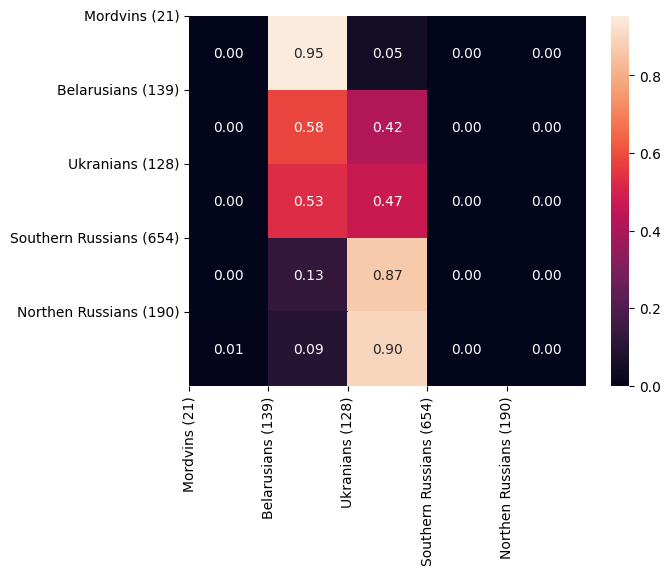

Step 1000
Time elapsed in min:  0.1952477812767029
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.84      0.82      0.83       139
           2       0.91      0.84      0.87       128
           3       0.94      0.97      0.95       654
           4       0.91      0.91      0.91       190

    accuracy                           0.92      1132
   macro avg       0.92      0.88      0.90      1132
weighted avg       0.92      0.92      0.92      1132

Current f1 score weighted: 0.9224913166191832
Current f1 score macro: 0.8987881092328772
Max f1 score weighted: 0.9224913166191832
Max f1 score macro: 0.8987881092328772


<Figure size 640x480 with 0 Axes>

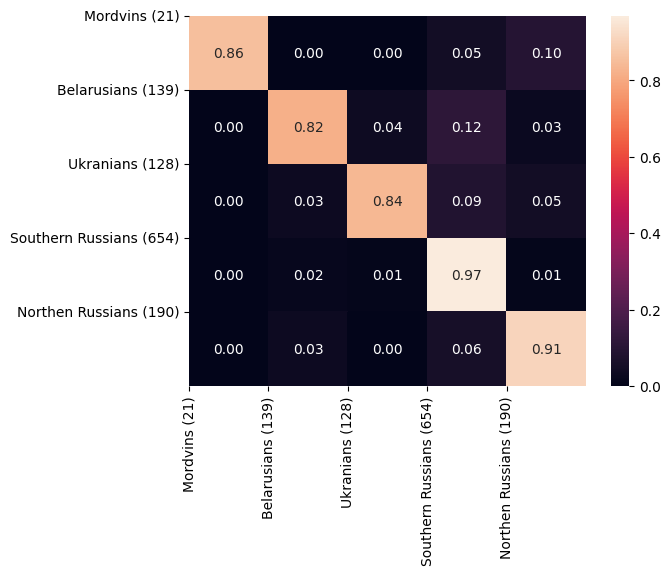

In [243]:
# types = ['Chechens', 'Kabardians, Circassians, Adyghes', 'Karachays, Balkars', 'Ingush', 'Dagestan peoples', 'Ossetians', 'Kumyks', 'Nogais']
types = ['Mordvins', 'Belarusians', 'Ukranians', 'Southern Russians', 'Northen Russians']

start = time.time()
 

    
# class Net3(torch.nn.Module):
#     def __init__(self):
#         super(Net3, self).__init__()
#         self.net = Net()
#         self.conv1 = FastRGCNConv(data.num_features, 128)
#         self.conv2 = FastRGCNConv(128, 128)
#         self.conv3 = FastRGCNConv(128, int(data.num_classes))

#     def forward(self, data):
#         x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
#         x = F.elu(self.conv1(x, edge_index))
#         x = F.elu(self.conv2(x, edge_index))
#         x = self.conv3(x, edge_index)
#         return x
    
# class Net4(torch.nn.Module):
#     def __init__(self):
#         super(Net4, self).__init__()
#         self.net = Net()
#         self.conv1 = EdgeConv(self.net)

#     def forward(self, data):
#         x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
#         x = self.conv1(x, edge_index)
#         return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = SSGConv_3l_128h_w_a05_k1().to(device)

criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  # Define optimizer.

p_answers, p_true = [], []
max_f1_score = 0
max_f1_score_macro = 0

def evaluation(model, test_graphs, step, p_answers, p_true):
    
    global start
    
    print('Time elapsed in min: ', (time.time() - start) / 60)
    
    model.eval()
    y_true = []
    y_pred = []
    
    global max_f1_score, max_f1_score_macro

    for i in range(len(test_graphs)):
        p = F.softmax(model(test_graphs[i].to(device))[-1], dim=0).cpu().detach().numpy()
        if step == 14000:
            p_answers.append(p)
        
        y_pred.append(np.argmax(p))
        y_true.append(test_graphs[i].y[-1].cpu().detach())
        
        if step == 14000:
            p_true.append(test_graphs[i].y[-1].cpu().detach())
    
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    
    y_true = np.array(y_true)
    
    plt.clf()
    fig, ax = plt.subplots(1, 1)
    sns.heatmap(cm, annot=True, fmt=".2f", ax=ax)
    ax.set_xticks([i for i in range(len(types))])
    ax.set_xticklabels([f'{t} ({len(y_true[y_true == n])})' for n, t in enumerate(types)])
    ax.set_yticks([i for i in range(len(types))])
    ax.set_yticklabels([f'{t} ({len(y_true[y_true == n])})' for n, t in enumerate(types)])
#     fig.suptitle("Confusion matrix")
    plt.yticks(rotation=0)
    plt.xticks(rotation=90) 
#     plt.savefig(rf"C:\HSE\genotek\cm_cr_{step}.png", bbox_inches="tight")
    
    current_f1_score = f1_score(y_true, y_pred, average='weighted')
    current_f1_score_macro = f1_score(y_true, y_pred, average='macro')
    
    print(f"Current f1 score weighted: {current_f1_score}")
    print(f"Current f1 score macro: {current_f1_score_macro}")
    if current_f1_score > max_f1_score:
        max_f1_score = current_f1_score
        
    if current_f1_score_macro > max_f1_score_macro:
        max_f1_score_macro = current_f1_score_macro
        plt.savefig(rf"C:\HSE\genotek\cm_nc_best.png", bbox_inches="tight")
        
    print(f"Max f1 score weighted: {max_f1_score}")
    print(f"Max f1 score macro: {max_f1_score_macro}")
    
    plt.show()
        
    model.train()
    

def train(data, log_step, num_epochs, test_graphs, p_answers, p_true):
    model.train()
    data =  data.to(device)
    for i in range(num_epochs):
        if i % log_step == 0:
            print(f'Step {i}')
            evaluation(model, test_graphs, i, p_answers, p_true)
        optimizer.zero_grad()  # Clear gradients.
        out = model(data)  # Perform a single forward pass.
#         loss = criterion(out[mask_array], data.y[mask_array])  # Compute the loss solely based on the training nodes.
        loss = criterion(out, data.y)
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.

train(data, 1000, 2000, test_graphs, p_answers, p_true)

# model = None
gc.collect() # Python thing
torch.cuda.empty_cache() # PyTorch thing

In [ ]:
0.9653819121575911

In [195]:
np.all(np.unique(data.edge_index.cpu().detach().numpy()) == np.arange(2635))

True

In [196]:
np.arange(2635)

array([   0,    1,    2, ..., 2632, 2633, 2634])

# Check generated graphs (my method) vs networkx

In [198]:
import torch_geometric

In [199]:
train_graph_my_method_to_network_x = torch_geometric.utils.to_networkx(data)

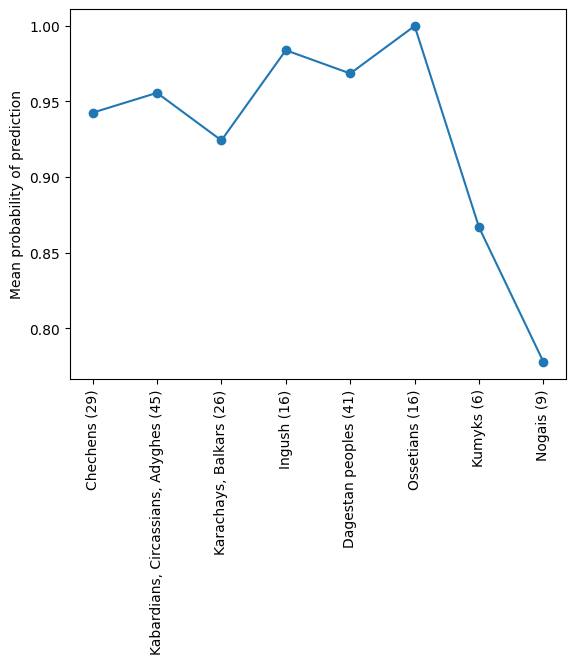

In [52]:
p_answers_sel = np.zeros(len(types))
for i in range(len(types)):
    p_true = np.array(p_true)
    p_true_idx = p_true == i

    p_answers_sel[i] = (np.sum(np.array(p_answers)[p_true_idx], axis=0) / len(p_true[p_true_idx]))[i]

plt.clf()
plt.plot(p_answers_sel, marker='o')
plt.ylabel('Mean probability of prediction')
plt.xticks([i for i in range(len(types))], [f'{t} ({len(p_true[p_true == n])})' for n, t in enumerate(types)], rotation=90)
plt.savefig(rf"C:\HSE\genotek\robust_cr.png", bbox_inches="tight")
plt.show()

In [36]:
p_answers

[]

# TripletLoss GNN

In [11]:
def _masked_minimum_torch(data, mask, dim=1):
    """Computes the axis wise minimum over chosen elements.

    Args:
      data: 2-D float `Tensor` of shape `[n, m]`.
      mask: 2-D Boolean `Tensor` of shape `[n, m]`.
      dim: The dimension over which to compute the minimum.

    Returns:
      masked_minimums: N-D `Tensor`.
        The minimized dimension is of size 1 after the operation.
    """
    axis_maximums = torch.max(data, dim, keepdims=True)[0]
    masked_minimums = (
        torch.min(
            torch.multiply(data - axis_maximums, mask), dim, keepdims=True
        )[0]
        + axis_maximums
    )
    return masked_minimums


def _masked_maximum_torch(data, mask, dim=1):
    """Computes the axis wise maximum over chosen elements.

    Args:
      data: 2-D float `Tensor` of shape `[n, m]`.
      mask: 2-D Boolean `Tensor` of shape `[n, m]`.
      dim: The dimension over which to compute the maximum.

    Returns:
      masked_maximums: N-D `Tensor`.
        The maximized dimension is of size 1 after the operation.
    """
    axis_minimums = torch.min(data, dim, keepdims=True)[0]
    masked_maximums = (
        torch.max(
            torch.multiply(data - axis_minimums, mask), dim, keepdims=True
        )[0]
        + axis_minimums
    )
    return masked_maximums

In [12]:
class TripletSemiHardLoss(nn.Module):
    def __init__(self, margin=0.2):
        super(TripletSemiHardLoss, self).__init__()
        
        self.margin = margin

    def forward(self, y_pred, y_true):
        labels = y_true
        embeddings = y_pred

        convert_to_float32 = (
            embeddings.dtype == torch.float16 or embeddings.dtype == torch.bfloat16
        )
        precise_embeddings = (
            embeddings.type(torch.float32) if convert_to_float32 else embeddings
        )

        # Reshape label tensor to [batch_size, 1].
        lshape = labels.shape
        labels = labels.view(lshape[0], 1)

        # Build pairwise squared distance matrix

        pdist_matrix = torch.cdist(precise_embeddings, precise_embeddings)
        
#         print(pdist_matrix)

        # Build pairwise binary adjacency matrix.
        adjacency = torch.eq(labels, labels.T).long()
#         print(adjacency)
        # Invert so we can select negatives only.
        adjacency_not = torch.logical_not(adjacency).long()
#         print(adjacency_not)

        batch_size = labels.shape[0]

        # Compute the mask.
        pdist_matrix_tile = torch.tile(pdist_matrix, (batch_size, 1))
#         print(pdist_matrix_tile)
        
        mask = torch.logical_and(
            torch.tile(adjacency_not, (batch_size, 1)),
            torch.gt(
                pdist_matrix_tile, pdist_matrix.T.reshape(-1, 1))
            ).long()
#         tf.print(mask)
        
        mask_final = torch.gt(
                torch.sum(
                    mask.type(torch.float32), axis=1, keepdims=True
                ),
                0.0,
            ).view((batch_size, batch_size))
        
#         print(mask_final)
        
        mask_final = mask_final.T

        adjacency_not = adjacency_not.type(torch.float32)
        mask = mask.type(torch.float32)

        # negatives_outside: smallest D_an where D_an > D_ap.
        negatives_outside = _masked_minimum_torch(pdist_matrix_tile, mask).view(batch_size, batch_size)
        
#         print(negatives_outside)
        
        negatives_outside = negatives_outside.T

        # negatives_inside: largest D_an.
        negatives_inside = torch.tile(
            _masked_maximum_torch(pdist_matrix, adjacency_not), (1, batch_size)
        )
#         print(negatives_inside)
        
        semi_hard_negatives = torch.where(mask_final, negatives_outside, negatives_inside)
        
#         print(semi_hard_negatives)

        loss_mat = torch.add(self.margin, pdist_matrix - semi_hard_negatives)
    
#         print(loss_mat)

        mask_positives = adjacency.type(torch.float32) - torch.diag(
            torch.ones(batch_size).to('cuda')
        )
    
#         print(mask_positives)

        # In lifted-struct, the authors multiply 0.5 for upper triangular
        #   in semihard, they take all positive pairs except the diagonal.
        num_positives = torch.sum(mask_positives)
        
#         print(num_positives)

        triplet_loss = torch.true_divide(
            torch.sum(
                torch.maximum(tmp := torch.multiply(loss_mat, mask_positives), torch.zeros(tmp.shape).to('cuda'))
            ),
            num_positives,
        )
    
#         print(
#                 torch.max(tmp := torch.multiply(loss_mat, mask_positives), torch.zeros(tmp.shape).to('cuda'))[0]
#             )
    ################################TF###############################
#         triplet_loss = tf.math.truediv(
#             tf.math.reduce_sum(
#                 tf.math.maximum(tf.math.multiply(loss_mat, mask_positives), 0.0)
#             ),
#             num_positives,
#         )
    ###############################TF#######################################
    
#         print(triplet_loss)

        if convert_to_float32:
            return triplet_loss.type(embeddings.dtype)
        else:
            return triplet_loss

In [13]:
class SSGConv_3l_128h_w_k3_l128(torch.nn.Module):
    def __init__(self):
        super(SSGConv_3l_128h_w_k3_l128, self).__init__()
        self.conv1 = SSGConv(data.num_features, 128, alpha=0.9)
        self.conv2 = SSGConv(128, 128, alpha=0.9)
        self.conv3 = SSGConv(128, 128, alpha=0.9)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        x = torch.nn.functional.normalize(x, p=2, dim=1)
        return x

class TAGConv_3l_128h_w_k3_l128(torch.nn.Module):
    def __init__(self):
        super(TAGConv_3l_128h_w_k3_l128, self).__init__()
        self.conv1 = TAGConv(data.num_features, 128)
        self.conv2 = TAGConv(128, 128)
        self.conv3 = TAGConv(128, 128)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        x = torch.nn.functional.normalize(x, p=2, dim=1)
        return x
    
class GCNConv_3l_128h_w_l128(torch.nn.Module):
    def __init__(self):
        super(GCNConv_3l_128h_w_l128, self).__init__()
        self.conv1 = GCNConv(data.num_features, 128)
        self.conv2 = GCNConv(128, 128)
        self.conv3 = GCNConv(128, 128)

    def forward(self, data):
        x, edge_index, edge_attr = data.x.float(), data.edge_index, data.weight.float()
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        x = torch.nn.functional.normalize(x, p=2, dim=1)
        return x

In [242]:
model = None
gc.collect() # Python thing
torch.cuda.empty_cache() # PyTorch thing

In [195]:
# Implementation with TripletLoss

# import gc
# import torch
# import torch.nn as nn
import torch.nn.functional as F
# from sklearn.metrics import f1_score
from torch_geometric.nn import GCNConv, GATConv, TransformerConv, NNConv, SGConv, ARMAConv, TAGConv, ChebConv, DNAConv, SSGConv
import time
# from torch.nn import Linear

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = TAGConv_3l_128h_w_k3_l128().to(device)

criterion = TripletSemiHardLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Define optimizer.

p_answers, p_true = [], []    

def train(data, log_step, num_epochs, test_graphs, p_answers, p_true):
    model.train()
    data =  data.to(device)
    for i in range(num_epochs):
        optimizer.zero_grad()  # Clear gradients.
        out = model(data)  # Perform a single forward pass.
        
        selector = np.array([True if i < 256 else False for i in range(out.shape[0])])
        randomize = np.arange(out.shape[0])
        np.random.shuffle(randomize)
        selector = selector[randomize]
        
        loss = criterion(out[selector], data.y[selector])  # Compute the loss solely based on the training nodes.
        print(f'LOSS: {loss}, {i}/{num_epochs}')
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.

start = time.time()
train(data, 1000, 35000, test_graphs, p_answers, p_true)
end = time.time()

print(f'RUNTIME (min): {(end-start) / 60}')

# model = None
# gc.collect() # Python thing
# torch.cuda.empty_cache() # PyTorch thing

LOSS: 0.19445958733558655, 0/35000
LOSS: 0.19312460720539093, 1/35000
LOSS: 0.18903371691703796, 2/35000
LOSS: 0.18322712182998657, 3/35000
LOSS: 0.17339439690113068, 4/35000
LOSS: 0.16118153929710388, 5/35000
LOSS: 0.10028290003538132, 6/35000
LOSS: 0.11491764336824417, 7/35000
LOSS: 0.13389965891838074, 8/35000
LOSS: 0.15623347461223602, 9/35000
LOSS: 0.10686293244361877, 10/35000
LOSS: 0.10583846271038055, 11/35000
LOSS: 0.11307923495769501, 12/35000
LOSS: 0.1275297850370407, 13/35000
LOSS: 0.14059555530548096, 14/35000
LOSS: 0.1127249076962471, 15/35000
LOSS: 0.08958517760038376, 16/35000
LOSS: 0.13103652000427246, 17/35000
LOSS: 0.1134483590722084, 18/35000
LOSS: 0.13314475119113922, 19/35000
LOSS: 0.11569670587778091, 20/35000
LOSS: 0.07803356647491455, 21/35000
LOSS: 0.09060928225517273, 22/35000
LOSS: 0.09425078332424164, 23/35000
LOSS: 0.07631073892116547, 24/35000
LOSS: 0.1148136556148529, 25/35000
LOSS: 0.08375074714422226, 26/35000
LOSS: 0.12416725605726242, 27/35000
LOSS: 

LOSS: 0.01898452825844288, 234/35000
LOSS: 0.026242945343255997, 235/35000
LOSS: 0.03218703344464302, 236/35000
LOSS: 0.03432346135377884, 237/35000
LOSS: 0.03128914535045624, 238/35000
LOSS: 0.016212115064263344, 239/35000
LOSS: 0.03184783086180687, 240/35000
LOSS: 0.01049566175788641, 241/35000
LOSS: 0.019249694421887398, 242/35000
LOSS: 0.027993643656373024, 243/35000
LOSS: 0.03331247344613075, 244/35000
LOSS: 0.015457321889698505, 245/35000
LOSS: 0.026950810104608536, 246/35000
LOSS: 0.0181779433041811, 247/35000
LOSS: 0.014928984455764294, 248/35000
LOSS: 0.02120157517492771, 249/35000
LOSS: 0.021422775462269783, 250/35000
LOSS: 0.028454463928937912, 251/35000
LOSS: 0.026180610060691833, 252/35000
LOSS: 0.020601531490683556, 253/35000
LOSS: 0.02323729917407036, 254/35000
LOSS: 0.034853462129831314, 255/35000
LOSS: 0.01624073088169098, 256/35000
LOSS: 0.008737992495298386, 257/35000
LOSS: 0.017258746549487114, 258/35000
LOSS: 0.03558769077062607, 259/35000
LOSS: 0.02226016297936439

LOSS: 0.012719744816422462, 458/35000
LOSS: 0.005985541269183159, 459/35000
LOSS: 0.024508990347385406, 460/35000
LOSS: 0.024500736966729164, 461/35000
LOSS: 0.019618848338723183, 462/35000
LOSS: 0.023911960422992706, 463/35000
LOSS: 0.018605554476380348, 464/35000
LOSS: 0.01187760941684246, 465/35000
LOSS: 0.017842892557382584, 466/35000
LOSS: 0.012057668529450893, 467/35000
LOSS: 0.008394569158554077, 468/35000
LOSS: 0.025618543848395348, 469/35000
LOSS: 0.016547052189707756, 470/35000
LOSS: 0.010893234983086586, 471/35000
LOSS: 0.013571653515100479, 472/35000
LOSS: 0.017954228445887566, 473/35000
LOSS: 0.0049693165346980095, 474/35000
LOSS: 0.006922904402017593, 475/35000
LOSS: 0.005356381647288799, 476/35000
LOSS: 0.008559600450098515, 477/35000
LOSS: 0.006792684085667133, 478/35000
LOSS: 0.012704474851489067, 479/35000
LOSS: 0.0180235393345356, 480/35000
LOSS: 0.009151840582489967, 481/35000
LOSS: 0.009149895049631596, 482/35000
LOSS: 0.011726935394108295, 483/35000
LOSS: 0.011336

LOSS: 0.0049967276863753796, 685/35000
LOSS: 0.005853032693266869, 686/35000
LOSS: 0.009777543134987354, 687/35000
LOSS: 0.006544081959873438, 688/35000
LOSS: 0.0076164077036082745, 689/35000
LOSS: 0.004334236495196819, 690/35000
LOSS: 0.0051985373720526695, 691/35000
LOSS: 0.005919836927205324, 692/35000
LOSS: 0.00790112279355526, 693/35000
LOSS: 0.004116309806704521, 694/35000
LOSS: 0.010603140108287334, 695/35000
LOSS: 0.007147567812353373, 696/35000
LOSS: 0.0027121955063194036, 697/35000
LOSS: 0.00803759042173624, 698/35000
LOSS: 0.00465605640783906, 699/35000
LOSS: 0.007971558719873428, 700/35000
LOSS: 0.006121449638158083, 701/35000
LOSS: 0.004921174142509699, 702/35000
LOSS: 0.004861333407461643, 703/35000
LOSS: 0.006087276618927717, 704/35000
LOSS: 0.004671451635658741, 705/35000
LOSS: 0.010572926141321659, 706/35000
LOSS: 0.0023601313587278128, 707/35000
LOSS: 0.003079549875110388, 708/35000
LOSS: 0.003598398296162486, 709/35000
LOSS: 0.010108202695846558, 710/35000
LOSS: 0.00

LOSS: 0.004667942877858877, 909/35000
LOSS: 0.0013550115982070565, 910/35000
LOSS: 0.004076376091688871, 911/35000
LOSS: 0.0016424051718786359, 912/35000
LOSS: 0.00211952137760818, 913/35000
LOSS: 0.0037207549903541803, 914/35000
LOSS: 0.002887947717681527, 915/35000
LOSS: 0.002245935145765543, 916/35000
LOSS: 0.0029004800599068403, 917/35000
LOSS: 0.0015074621187523007, 918/35000
LOSS: 0.0016447388334199786, 919/35000
LOSS: 0.0009496340644545853, 920/35000
LOSS: 0.002145858947187662, 921/35000
LOSS: 0.002552992897108197, 922/35000
LOSS: 0.0014650804223492742, 923/35000
LOSS: 0.0029806324746459723, 924/35000
LOSS: 0.0031307062599807978, 925/35000
LOSS: 0.0032510000746697187, 926/35000
LOSS: 0.000761395029257983, 927/35000
LOSS: 0.0008397136116400361, 928/35000
LOSS: 0.0024726567789912224, 929/35000
LOSS: 0.0018146716756746173, 930/35000
LOSS: 0.0020007335115224123, 931/35000
LOSS: 0.002648835303261876, 932/35000
LOSS: 0.0012763343984261155, 933/35000
LOSS: 0.002717786468565464, 934/350

LOSS: 0.0031085717491805553, 1124/35000
LOSS: 0.00043716421350836754, 1125/35000
LOSS: 0.0007915843743830919, 1126/35000
LOSS: 0.0010692065116018057, 1127/35000
LOSS: 0.0034230640158057213, 1128/35000
LOSS: 0.001159744686447084, 1129/35000
LOSS: 0.0018946243217214942, 1130/35000
LOSS: 0.002861717715859413, 1131/35000
LOSS: 0.0005461895489133894, 1132/35000
LOSS: 0.0018685293616726995, 1133/35000
LOSS: 0.0014945829752832651, 1134/35000
LOSS: 0.003713664598762989, 1135/35000
LOSS: 0.0029332211706787348, 1136/35000
LOSS: 0.004185493104159832, 1137/35000
LOSS: 0.0015241052024066448, 1138/35000
LOSS: 0.003257686272263527, 1139/35000
LOSS: 0.004193909931927919, 1140/35000
LOSS: 0.0017275488935410976, 1141/35000
LOSS: 0.001672496902756393, 1142/35000
LOSS: 0.004064228385686874, 1143/35000
LOSS: 0.003522633109241724, 1144/35000
LOSS: 0.001050670980475843, 1145/35000
LOSS: 0.003167291171848774, 1146/35000
LOSS: 0.0017736408626660705, 1147/35000
LOSS: 0.0016615036875009537, 1148/35000
LOSS: 0.00

LOSS: 0.0016223808052018285, 1338/35000
LOSS: 0.0008858962683007121, 1339/35000
LOSS: 0.0016626309370622039, 1340/35000
LOSS: 0.002367102773860097, 1341/35000
LOSS: 0.0015171717386692762, 1342/35000
LOSS: 0.0005195330013521016, 1343/35000
LOSS: 0.001085046213120222, 1344/35000
LOSS: 0.003623140510171652, 1345/35000
LOSS: 0.0022721400018781424, 1346/35000
LOSS: 0.0017475088825449347, 1347/35000
LOSS: 0.003341398201882839, 1348/35000
LOSS: 0.0029071993194520473, 1349/35000
LOSS: 0.0025358141865581274, 1350/35000
LOSS: 0.002340932609513402, 1351/35000
LOSS: 0.0009574384312145412, 1352/35000
LOSS: 0.0008157880511134863, 1353/35000
LOSS: 0.0018947274656966329, 1354/35000
LOSS: 0.0033697858452796936, 1355/35000
LOSS: 0.0005080349510535598, 1356/35000
LOSS: 0.0002472304040566087, 1357/35000
LOSS: 0.001956584630534053, 1358/35000
LOSS: 0.0019218488596379757, 1359/35000
LOSS: 0.001162201864644885, 1360/35000
LOSS: 0.0038441328797489405, 1361/35000
LOSS: 0.0011935507645830512, 1362/35000
LOSS: 0

LOSS: 0.0007674670196138322, 1553/35000
LOSS: 0.00202747224830091, 1554/35000
LOSS: 0.002680594800040126, 1555/35000
LOSS: 0.0026544902939349413, 1556/35000
LOSS: 0.001737338723614812, 1557/35000
LOSS: 0.01218841876834631, 1558/35000
LOSS: 0.006216912996023893, 1559/35000
LOSS: 0.0018741231178864837, 1560/35000
LOSS: 0.0041458094492554665, 1561/35000
LOSS: 0.0034065088257193565, 1562/35000
LOSS: 0.0034913441631942987, 1563/35000
LOSS: 0.005731540732085705, 1564/35000
LOSS: 0.021372565999627113, 1565/35000
LOSS: 0.002656659111380577, 1566/35000
LOSS: 0.0063831014558672905, 1567/35000
LOSS: 0.007341064512729645, 1568/35000
LOSS: 0.005189075134694576, 1569/35000
LOSS: 0.0033566709607839584, 1570/35000
LOSS: 0.0021268040873110294, 1571/35000
LOSS: 0.0024131035897880793, 1572/35000
LOSS: 0.0057965111918747425, 1573/35000
LOSS: 0.0031846121419221163, 1574/35000
LOSS: 0.007014107424765825, 1575/35000
LOSS: 0.004195569548755884, 1576/35000
LOSS: 0.001972110476344824, 1577/35000
LOSS: 0.0027606

LOSS: 0.0010748273925855756, 1765/35000
LOSS: 0.0008036655490286648, 1766/35000
LOSS: 0.0005923825083300471, 1767/35000
LOSS: 0.0002393806935288012, 1768/35000
LOSS: 0.0005951281054876745, 1769/35000
LOSS: 0.0006422333535738289, 1770/35000
LOSS: 0.00038690617657266557, 1771/35000
LOSS: 0.0003501263854559511, 1772/35000
LOSS: 0.0007589347078464925, 1773/35000
LOSS: 0.00011107028694823384, 1774/35000
LOSS: 0.000226816744543612, 1775/35000
LOSS: 0.002081767888739705, 1776/35000
LOSS: 0.0008543349686078727, 1777/35000
LOSS: 0.00015377589443232864, 1778/35000
LOSS: 0.00033551742671988904, 1779/35000
LOSS: 0.0005990876816213131, 1780/35000
LOSS: 0.0016490794951096177, 1781/35000
LOSS: 0.0008912030607461929, 1782/35000
LOSS: 0.0035378525499254465, 1783/35000
LOSS: 0.0008676343131810427, 1784/35000
LOSS: 0.002223998075351119, 1785/35000
LOSS: 0.0003293185436632484, 1786/35000
LOSS: 0.0005728469113819301, 1787/35000
LOSS: 0.0019602885004132986, 1788/35000
LOSS: 0.000693214766215533, 1789/35000


LOSS: 0.0006084871129132807, 1976/35000
LOSS: 4.9802787543740124e-05, 1977/35000
LOSS: 5.00457281304989e-05, 1978/35000
LOSS: 0.0002713583526201546, 1979/35000
LOSS: 0.0005715361330658197, 1980/35000
LOSS: 0.0007795334095135331, 1981/35000
LOSS: 0.00012206227984279394, 1982/35000
LOSS: 2.2228177840588614e-05, 1983/35000
LOSS: 3.351455234223977e-05, 1984/35000
LOSS: 1.6616108041489497e-05, 1985/35000
LOSS: 1.613744825590402e-05, 1986/35000
LOSS: 0.0003969081153627485, 1987/35000
LOSS: 0.0, 1988/35000
LOSS: 0.00010481708159204572, 1989/35000
LOSS: 8.817256457405165e-05, 1990/35000
LOSS: 1.038374648487661e-05, 1991/35000
LOSS: 0.0004136991628911346, 1992/35000
LOSS: 0.00026176642859354615, 1993/35000
LOSS: 0.00012146223161835223, 1994/35000
LOSS: 0.00024075531109701842, 1995/35000
LOSS: 0.0001473578013246879, 1996/35000
LOSS: 6.055575067875907e-05, 1997/35000
LOSS: 0.0003641810326371342, 1998/35000
LOSS: 0.00010463512444403023, 1999/35000
LOSS: 8.765364327700809e-05, 2000/35000
LOSS: 0.00

LOSS: 8.925409201765433e-05, 2190/35000
LOSS: 4.1651082938187756e-06, 2191/35000
LOSS: 0.00011658071161946282, 2192/35000
LOSS: 4.3155400817340706e-06, 2193/35000
LOSS: 6.3676811805635225e-06, 2194/35000
LOSS: 6.383234722306952e-05, 2195/35000
LOSS: 9.961559044313617e-06, 2196/35000
LOSS: 9.370235602546018e-06, 2197/35000
LOSS: 2.9733311748714186e-05, 2198/35000
LOSS: 4.601273758453317e-05, 2199/35000
LOSS: 2.2082972463977057e-06, 2200/35000
LOSS: 0.00010476426541572437, 2201/35000
LOSS: 8.355636964552104e-06, 2202/35000
LOSS: 3.973918501287699e-05, 2203/35000
LOSS: 7.563117833342403e-05, 2204/35000
LOSS: 2.5239418391720392e-05, 2205/35000
LOSS: 4.54929386251024e-06, 2206/35000
LOSS: 0.00010731026122812182, 2207/35000
LOSS: 8.161055302480236e-05, 2208/35000
LOSS: 0.00014145970635581762, 2209/35000
LOSS: 2.2579852156923153e-05, 2210/35000
LOSS: 1.4672187717224006e-05, 2211/35000
LOSS: 0.0, 2212/35000
LOSS: 2.1268608179525472e-05, 2213/35000
LOSS: 1.1745467418222688e-05, 2214/35000
LOSS:

LOSS: 2.1163328710827045e-05, 2403/35000
LOSS: 7.0724167926528025e-06, 2404/35000
LOSS: 1.0318903150619008e-05, 2405/35000
LOSS: 5.081560811959207e-05, 2406/35000
LOSS: 6.398768164217472e-05, 2407/35000
LOSS: 3.5280951124150306e-05, 2408/35000
LOSS: 5.3757798923470546e-06, 2409/35000
LOSS: 1.4863655451335944e-05, 2410/35000
LOSS: 1.2322759175731335e-05, 2411/35000
LOSS: 0.0, 2412/35000
LOSS: 1.723694549582433e-05, 2413/35000
LOSS: 9.103084448724985e-05, 2414/35000
LOSS: 0.0, 2415/35000
LOSS: 1.9975725535914535e-06, 2416/35000
LOSS: 9.135123946180101e-06, 2417/35000
LOSS: 3.2824274853737734e-07, 2418/35000
LOSS: 7.103486859705299e-05, 2419/35000
LOSS: 3.745824142242782e-05, 2420/35000
LOSS: 1.7811389625421725e-05, 2421/35000
LOSS: 1.1704538337653503e-05, 2422/35000
LOSS: 2.1967020984448027e-06, 2423/35000
LOSS: 2.9409337003016844e-05, 2424/35000
LOSS: 1.457108965041698e-06, 2425/35000
LOSS: 0.0, 2426/35000
LOSS: 3.1501855119131505e-05, 2427/35000
LOSS: 0.0, 2428/35000
LOSS: 2.0248309738

LOSS: 7.642109267180786e-06, 2628/35000
LOSS: 0.0, 2629/35000
LOSS: 1.3666109452969977e-06, 2630/35000
LOSS: 2.7022260837838985e-06, 2631/35000
LOSS: 1.688162569735141e-06, 2632/35000
LOSS: 1.8601408555696253e-06, 2633/35000
LOSS: 1.1114710105175618e-05, 2634/35000
LOSS: 1.2167634849902242e-05, 2635/35000
LOSS: 3.126553929178044e-05, 2636/35000
LOSS: 1.1943230902033974e-06, 2637/35000
LOSS: 2.600991865620017e-05, 2638/35000
LOSS: 1.797800177882891e-05, 2639/35000
LOSS: 1.798064840841107e-05, 2640/35000
LOSS: 1.3088000741845462e-05, 2641/35000
LOSS: 0.0, 2642/35000
LOSS: 0.0, 2643/35000
LOSS: 3.399110823920637e-07, 2644/35000
LOSS: 5.041037638875423e-06, 2645/35000
LOSS: 7.44559511076659e-05, 2646/35000
LOSS: 2.118776592396898e-06, 2647/35000
LOSS: 0.0, 2648/35000
LOSS: 8.59039937495254e-06, 2649/35000
LOSS: 4.5405042328638956e-05, 2650/35000
LOSS: 1.706031298454036e-06, 2651/35000
LOSS: 9.854827112576459e-06, 2652/35000
LOSS: 0.0, 2653/35000
LOSS: 0.0, 2654/35000
LOSS: 0.0, 2655/35000


LOSS: 5.056437203165842e-06, 2852/35000
LOSS: 8.997668373922352e-06, 2853/35000
LOSS: 1.1765066119551193e-05, 2854/35000
LOSS: 1.8890355931944214e-05, 2855/35000
LOSS: 1.845396400312893e-05, 2856/35000
LOSS: 4.0184870158554986e-05, 2857/35000
LOSS: 1.6842137711137184e-06, 2858/35000
LOSS: 0.0, 2859/35000
LOSS: 0.0, 2860/35000
LOSS: 6.271730671869591e-05, 2861/35000
LOSS: 5.146841886016773e-06, 2862/35000
LOSS: 4.148126026848331e-05, 2863/35000
LOSS: 2.103454971802421e-05, 2864/35000
LOSS: 4.2107021158699354e-07, 2865/35000
LOSS: 0.0, 2866/35000
LOSS: 9.819499382501817e-07, 2867/35000
LOSS: 2.762879489637271e-07, 2868/35000
LOSS: 1.0634060345182661e-05, 2869/35000
LOSS: 3.200988794560544e-05, 2870/35000
LOSS: 0.0, 2871/35000
LOSS: 1.0041141649708152e-05, 2872/35000
LOSS: 3.5402226785663515e-06, 2873/35000
LOSS: 5.628522103506839e-06, 2874/35000
LOSS: 6.667320121778175e-06, 2875/35000
LOSS: 2.1394193026935682e-05, 2876/35000
LOSS: 3.590314463508548e-07, 2877/35000
LOSS: 1.004646037472412

LOSS: 3.266125531808939e-06, 3090/35000
LOSS: 1.1889927918673493e-05, 3091/35000
LOSS: 1.104058901546523e-05, 3092/35000
LOSS: 0.0, 3093/35000
LOSS: 1.7593978554941714e-05, 3094/35000
LOSS: 4.005503342341399e-06, 3095/35000
LOSS: 3.0431127015617676e-05, 3096/35000
LOSS: 1.743989560054615e-05, 3097/35000
LOSS: 1.807931585062761e-05, 3098/35000
LOSS: 1.1727615856216289e-07, 3099/35000
LOSS: 1.131334101955872e-06, 3100/35000
LOSS: 0.0, 3101/35000
LOSS: 0.0, 3102/35000
LOSS: 2.0161627617198974e-05, 3103/35000
LOSS: 2.152228034901782e-06, 3104/35000
LOSS: 5.2339519243105315e-06, 3105/35000
LOSS: 0.0, 3106/35000
LOSS: 3.189689596183598e-05, 3107/35000
LOSS: 0.0, 3108/35000
LOSS: 7.220337010949152e-06, 3109/35000
LOSS: 4.519440153671894e-06, 3110/35000
LOSS: 0.0, 3111/35000
LOSS: 5.373524800234009e-06, 3112/35000
LOSS: 1.3912281247030478e-06, 3113/35000
LOSS: 7.962627819324553e-07, 3114/35000
LOSS: 0.0, 3115/35000
LOSS: 9.564266747474903e-07, 3116/35000
LOSS: 6.240717993932776e-06, 3117/35000

LOSS: 0.07165513187646866, 3315/35000
LOSS: 0.031237229704856873, 3316/35000
LOSS: 0.03831644356250763, 3317/35000
LOSS: 0.015392872504889965, 3318/35000
LOSS: 0.028595879673957825, 3319/35000
LOSS: 0.04121509939432144, 3320/35000
LOSS: 0.03392535820603371, 3321/35000
LOSS: 0.03935281187295914, 3322/35000
LOSS: 0.0243870597332716, 3323/35000
LOSS: 0.02082793042063713, 3324/35000
LOSS: 0.009429069235920906, 3325/35000
LOSS: 0.017161015421152115, 3326/35000
LOSS: 0.026279497891664505, 3327/35000
LOSS: 0.015551522374153137, 3328/35000
LOSS: 0.022414501756429672, 3329/35000
LOSS: 0.013978715054690838, 3330/35000
LOSS: 0.014921750873327255, 3331/35000
LOSS: 0.019532296806573868, 3332/35000
LOSS: 0.023500293493270874, 3333/35000
LOSS: 0.014952197670936584, 3334/35000
LOSS: 0.014009188860654831, 3335/35000
LOSS: 0.015862660482525826, 3336/35000
LOSS: 0.007551999296993017, 3337/35000
LOSS: 0.020899156108498573, 3338/35000
LOSS: 0.018879564478993416, 3339/35000
LOSS: 0.010751870460808277, 3340/

LOSS: 0.0021399680990725756, 3529/35000
LOSS: 0.0008410026784986258, 3530/35000
LOSS: 0.0013982929522171617, 3531/35000
LOSS: 0.0003973649290855974, 3532/35000
LOSS: 0.002266157418489456, 3533/35000
LOSS: 0.002166430465877056, 3534/35000
LOSS: 0.0019034178694710135, 3535/35000
LOSS: 0.000716902082785964, 3536/35000
LOSS: 0.0012835984816774726, 3537/35000
LOSS: 0.00010893051512539387, 3538/35000
LOSS: 0.0008343307417817414, 3539/35000
LOSS: 0.0018936317646875978, 3540/35000
LOSS: 0.0007702871807850897, 3541/35000
LOSS: 0.001657481654547155, 3542/35000
LOSS: 0.00016878993483260274, 3543/35000
LOSS: 0.0006788458558730781, 3544/35000
LOSS: 0.0034002410247921944, 3545/35000
LOSS: 0.002440235111862421, 3546/35000
LOSS: 0.0022292197681963444, 3547/35000
LOSS: 0.0015742459800094366, 3548/35000
LOSS: 0.003301186952739954, 3549/35000
LOSS: 0.001414399011991918, 3550/35000
LOSS: 0.0007170048193074763, 3551/35000
LOSS: 0.0017633720999583602, 3552/35000
LOSS: 0.0020963542629033327, 3553/35000
LOSS:

LOSS: 0.0009859894635155797, 3740/35000
LOSS: 0.00022457705927081406, 3741/35000
LOSS: 0.000141921394970268, 3742/35000
LOSS: 0.0007249832851812243, 3743/35000
LOSS: 0.00020068732555955648, 3744/35000
LOSS: 0.00011151323997182772, 3745/35000
LOSS: 5.798782694910187e-06, 3746/35000
LOSS: 3.32907511619851e-05, 3747/35000
LOSS: 1.4810924767516553e-05, 3748/35000
LOSS: 0.0003178831248078495, 3749/35000
LOSS: 0.0005020432872697711, 3750/35000
LOSS: 0.0004028516123071313, 3751/35000
LOSS: 0.0001523287792224437, 3752/35000
LOSS: 0.0004396774456836283, 3753/35000
LOSS: 0.0010982116218656301, 3754/35000
LOSS: 0.000760951079428196, 3755/35000
LOSS: 0.0007659054244868457, 3756/35000
LOSS: 2.5812163585214876e-05, 3757/35000
LOSS: 0.00011536751117091626, 3758/35000
LOSS: 0.0017059495439752936, 3759/35000
LOSS: 0.00025661595282144845, 3760/35000
LOSS: 0.0016115921316668391, 3761/35000
LOSS: 0.00012598730972968042, 3762/35000
LOSS: 0.00044085292029194534, 3763/35000
LOSS: 0.0003427541523706168, 3764/

LOSS: 9.625627717468888e-05, 3952/35000
LOSS: 0.0002428332227282226, 3953/35000
LOSS: 0.0003567060630302876, 3954/35000
LOSS: 1.778894875315018e-05, 3955/35000
LOSS: 0.00029106243164278567, 3956/35000
LOSS: 1.6797905118437484e-05, 3957/35000
LOSS: 0.00021086918422952294, 3958/35000
LOSS: 0.00011563334555830806, 3959/35000
LOSS: 7.00975360814482e-05, 3960/35000
LOSS: 3.305408245068975e-05, 3961/35000
LOSS: 7.1901005867403e-05, 3962/35000
LOSS: 0.00017121477867476642, 3963/35000
LOSS: 7.058904157020152e-05, 3964/35000
LOSS: 4.025894668302499e-05, 3965/35000
LOSS: 0.0, 3966/35000
LOSS: 0.0004693157388828695, 3967/35000
LOSS: 5.719021373806754e-06, 3968/35000
LOSS: 4.09650328947464e-06, 3969/35000
LOSS: 1.9696593881235458e-05, 3970/35000
LOSS: 0.0005667335935868323, 3971/35000
LOSS: 0.00043137354077771306, 3972/35000
LOSS: 2.132336885551922e-05, 3973/35000
LOSS: 0.00016327653429470956, 3974/35000
LOSS: 0.0007365578203462064, 3975/35000
LOSS: 1.147977741311479e-06, 3976/35000
LOSS: 0.000103

LOSS: 5.186169801163487e-05, 4164/35000
LOSS: 8.295489533338696e-05, 4165/35000
LOSS: 1.5294492186512798e-05, 4166/35000
LOSS: 0.00012186596723040566, 4167/35000
LOSS: 4.920218270854093e-05, 4168/35000
LOSS: 5.3834650316275656e-05, 4169/35000
LOSS: 0.00019635676289908588, 4170/35000
LOSS: 7.052802538964897e-05, 4171/35000
LOSS: 1.6033030988182873e-05, 4172/35000
LOSS: 8.432189497398213e-05, 4173/35000
LOSS: 7.339644071180373e-05, 4174/35000
LOSS: 4.865298615186475e-05, 4175/35000
LOSS: 0.0003049728984478861, 4176/35000
LOSS: 4.5123528252588585e-05, 4177/35000
LOSS: 0.00023040958330966532, 4178/35000
LOSS: 5.460000829771161e-05, 4179/35000
LOSS: 7.311461558856536e-06, 4180/35000
LOSS: 8.886557043297216e-05, 4181/35000
LOSS: 5.231430259300396e-05, 4182/35000
LOSS: 8.201826130971313e-05, 4183/35000
LOSS: 3.852085137623362e-05, 4184/35000
LOSS: 6.384168955264613e-06, 4185/35000
LOSS: 0.00014482073311228305, 4186/35000
LOSS: 2.973216396640055e-05, 4187/35000
LOSS: 3.299447052995674e-05, 418

LOSS: 2.3651320589124225e-05, 4385/35000
LOSS: 1.8918046407634392e-05, 4386/35000
LOSS: 3.030498010048177e-05, 4387/35000
LOSS: 5.0676990213105455e-05, 4388/35000
LOSS: 1.7422959217583411e-06, 4389/35000
LOSS: 0.0, 4390/35000
LOSS: 0.0, 4391/35000
LOSS: 3.2414100132882595e-05, 4392/35000
LOSS: 3.7172951124375686e-05, 4393/35000
LOSS: 1.5608000012434786e-06, 4394/35000
LOSS: 4.4497690396383405e-05, 4395/35000
LOSS: 5.884828624402871e-06, 4396/35000
LOSS: 0.0, 4397/35000
LOSS: 1.0189189197262749e-05, 4398/35000
LOSS: 2.324500928807538e-05, 4399/35000
LOSS: 2.835195482475683e-05, 4400/35000
LOSS: 1.955560946953483e-05, 4401/35000
LOSS: 5.669357051374391e-05, 4402/35000
LOSS: 8.210839951061644e-06, 4403/35000
LOSS: 6.105833745095879e-05, 4404/35000
LOSS: 1.438057006453164e-05, 4405/35000
LOSS: 0.0, 4406/35000
LOSS: 2.4625313017168082e-05, 4407/35000
LOSS: 4.51218438684009e-05, 4408/35000
LOSS: 5.6670007325010374e-05, 4409/35000
LOSS: 2.206484896305483e-05, 4410/35000
LOSS: 1.87259900030767

LOSS: 1.969402001122944e-05, 4610/35000
LOSS: 1.8544031263445504e-05, 4611/35000
LOSS: 6.935567284926947e-07, 4612/35000
LOSS: 7.670355444133747e-06, 4613/35000
LOSS: 8.079487997747492e-06, 4614/35000
LOSS: 3.5001990909222513e-05, 4615/35000
LOSS: 2.9700413506361656e-07, 4616/35000
LOSS: 7.370810635620728e-06, 4617/35000
LOSS: 0.0, 4618/35000
LOSS: 0.0, 4619/35000
LOSS: 0.0, 4620/35000
LOSS: 0.0, 4621/35000
LOSS: 0.0, 4622/35000
LOSS: 2.5337196348118596e-05, 4623/35000
LOSS: 0.0, 4624/35000
LOSS: 1.931509905261919e-05, 4625/35000
LOSS: 3.437938357819803e-05, 4626/35000
LOSS: 8.268956662504934e-06, 4627/35000
LOSS: 1.2697867532551754e-05, 4628/35000
LOSS: 7.357986078204704e-07, 4629/35000
LOSS: 1.2130769391660579e-05, 4630/35000
LOSS: 0.0, 4631/35000
LOSS: 0.0, 4632/35000
LOSS: 0.0, 4633/35000
LOSS: 8.920160325942561e-06, 4634/35000
LOSS: 6.2932381297287066e-06, 4635/35000
LOSS: 0.0, 4636/35000
LOSS: 5.0661365094129e-06, 4637/35000
LOSS: 2.3907230570330285e-05, 4638/35000
LOSS: 2.417377

LOSS: 1.332504689344205e-05, 4834/35000
LOSS: 1.611469269846566e-05, 4835/35000
LOSS: 2.3798496840754524e-05, 4836/35000
LOSS: 0.0, 4837/35000
LOSS: 5.540273377846461e-06, 4838/35000
LOSS: 8.224041266657878e-06, 4839/35000
LOSS: 7.862085112719797e-06, 4840/35000
LOSS: 0.0, 4841/35000
LOSS: 5.097746452520369e-06, 4842/35000
LOSS: 2.1359444872359745e-05, 4843/35000
LOSS: 4.042458840558538e-06, 4844/35000
LOSS: 6.572521670022979e-06, 4845/35000
LOSS: 2.041317020484712e-05, 4846/35000
LOSS: 0.0, 4847/35000
LOSS: 2.250635043310467e-05, 4848/35000
LOSS: 5.991190050735895e-07, 4849/35000
LOSS: 1.01792500117881e-06, 4850/35000
LOSS: 1.2678457096626516e-05, 4851/35000
LOSS: 4.0473831177223474e-05, 4852/35000
LOSS: 0.0, 4853/35000
LOSS: 3.5476266930345446e-05, 4854/35000
LOSS: 5.2547593440976925e-06, 4855/35000
LOSS: 2.8120080060034525e-06, 4856/35000
LOSS: 0.0, 4857/35000
LOSS: 4.121719484828645e-06, 4858/35000
LOSS: 6.151482466520974e-06, 4859/35000
LOSS: 2.8422447940101847e-05, 4860/35000
LOS

LOSS: 4.184784756944282e-06, 5069/35000
LOSS: 2.3671256712987088e-05, 5070/35000
LOSS: 4.647350579034537e-06, 5071/35000
LOSS: 1.2549252232929575e-06, 5072/35000
LOSS: 7.726863486823277e-07, 5073/35000
LOSS: 1.8252036170451902e-05, 5074/35000
LOSS: 0.0, 5075/35000
LOSS: 2.4565495550632477e-05, 5076/35000
LOSS: 3.1746803870191798e-06, 5077/35000
LOSS: 6.891060820635175e-06, 5078/35000
LOSS: 5.094876087241573e-06, 5079/35000
LOSS: 9.61882687988691e-06, 5080/35000
LOSS: 4.882589337285026e-07, 5081/35000
LOSS: 3.7235827221593354e-06, 5082/35000
LOSS: 0.0, 5083/35000
LOSS: 2.1216310415184125e-05, 5084/35000
LOSS: 1.1696783076331485e-05, 5085/35000
LOSS: 1.1130950952065177e-05, 5086/35000
LOSS: 9.059796866495162e-06, 5087/35000
LOSS: 1.383874496241333e-05, 5088/35000
LOSS: 0.0, 5089/35000
LOSS: 1.5664855936847744e-06, 5090/35000
LOSS: 4.51331487738571e-07, 5091/35000
LOSS: 0.0, 5092/35000
LOSS: 7.60649584208295e-07, 5093/35000
LOSS: 0.0, 5094/35000
LOSS: 2.28715634875698e-05, 5095/35000
LOSS

LOSS: 4.5259835133037996e-06, 5301/35000
LOSS: 7.541630679952505e-07, 5302/35000
LOSS: 3.0376056656677974e-06, 5303/35000
LOSS: 1.276101465919055e-05, 5304/35000
LOSS: 9.923111065290868e-06, 5305/35000
LOSS: 2.385269681326463e-06, 5306/35000
LOSS: 6.198625214892672e-06, 5307/35000
LOSS: 0.0, 5308/35000
LOSS: 0.0, 5309/35000
LOSS: 0.0, 5310/35000
LOSS: 1.5338812318077544e-06, 5311/35000
LOSS: 0.0, 5312/35000
LOSS: 0.0, 5313/35000
LOSS: 0.0, 5314/35000
LOSS: 1.9253450318501564e-06, 5315/35000
LOSS: 4.560743036563508e-06, 5316/35000
LOSS: 1.3160270100343041e-06, 5317/35000
LOSS: 0.0, 5318/35000
LOSS: 1.0145928172278218e-05, 5319/35000
LOSS: 4.788863589055836e-05, 5320/35000
LOSS: 8.02710019343067e-06, 5321/35000
LOSS: 4.801642262464156e-06, 5322/35000
LOSS: 2.729433845161111e-06, 5323/35000
LOSS: 3.933048901672009e-06, 5324/35000
LOSS: 6.8786275733145885e-06, 5325/35000
LOSS: 0.0, 5326/35000
LOSS: 0.0, 5327/35000
LOSS: 6.53218057777849e-06, 5328/35000
LOSS: 0.0, 5329/35000
LOSS: 0.0, 5330

LOSS: 0.0, 5534/35000
LOSS: 0.0, 5535/35000
LOSS: 0.0, 5536/35000
LOSS: 1.313745724473847e-05, 5537/35000
LOSS: 1.1447265023889486e-05, 5538/35000
LOSS: 0.0, 5539/35000
LOSS: 4.589364834828302e-06, 5540/35000
LOSS: 6.074632892705267e-06, 5541/35000
LOSS: 0.0, 5542/35000
LOSS: 6.40773293980601e-07, 5543/35000
LOSS: 0.0, 5544/35000
LOSS: 1.288970815949142e-05, 5545/35000
LOSS: 0.0, 5546/35000
LOSS: 2.335543058507028e-06, 5547/35000
LOSS: 1.1722871704478166e-06, 5548/35000
LOSS: 2.1378744349931367e-05, 5549/35000
LOSS: 0.0, 5550/35000
LOSS: 1.9747649275814183e-06, 5551/35000
LOSS: 3.217258210952423e-07, 5552/35000
LOSS: 2.854362264770316e-06, 5553/35000
LOSS: 6.008435207149887e-07, 5554/35000
LOSS: 2.184498129054191e-07, 5555/35000
LOSS: 1.4218333035387332e-06, 5556/35000
LOSS: 2.5393084797542542e-05, 5557/35000
LOSS: 2.0813356513826875e-06, 5558/35000
LOSS: 0.0, 5559/35000
LOSS: 0.0, 5560/35000
LOSS: 9.002937417790235e-08, 5561/35000
LOSS: 8.33025205793092e-06, 5562/35000
LOSS: 0.0, 5563

LOSS: 3.7160434658289887e-06, 5779/35000
LOSS: 0.0, 5780/35000
LOSS: 0.0, 5781/35000
LOSS: 1.5764009731356055e-05, 5782/35000
LOSS: 1.154818801296642e-05, 5783/35000
LOSS: 1.5343717677751556e-05, 5784/35000
LOSS: 1.4632030342909275e-06, 5785/35000
LOSS: 9.63265961217985e-07, 5786/35000
LOSS: 1.7289984270973946e-06, 5787/35000
LOSS: 3.567575959095848e-06, 5788/35000
LOSS: 1.1092871318396647e-05, 5789/35000
LOSS: 4.606802576745395e-06, 5790/35000
LOSS: 3.742405169759877e-06, 5791/35000
LOSS: 0.0, 5792/35000
LOSS: 0.0, 5793/35000
LOSS: 1.8585463976705796e-06, 5794/35000
LOSS: 5.240863629296655e-06, 5795/35000
LOSS: 2.7782487450167537e-05, 5796/35000
LOSS: 5.124320168192753e-08, 5797/35000
LOSS: 2.3288487227546284e-06, 5798/35000
LOSS: 0.0, 5799/35000
LOSS: 0.0, 5800/35000
LOSS: 1.0705048225645442e-06, 5801/35000
LOSS: 0.0, 5802/35000
LOSS: 6.064019089535577e-06, 5803/35000
LOSS: 0.0, 5804/35000
LOSS: 0.0, 5805/35000
LOSS: 1.208012236020295e-06, 5806/35000
LOSS: 0.0, 5807/35000
LOSS: 0.0, 

LOSS: 8.373866648980766e-07, 6032/35000
LOSS: 0.0, 6033/35000
LOSS: 7.806529538356699e-06, 6034/35000
LOSS: 0.0, 6035/35000
LOSS: 0.0, 6036/35000
LOSS: 0.0, 6037/35000
LOSS: 0.0, 6038/35000
LOSS: 3.155525973852491e-06, 6039/35000
LOSS: 0.0, 6040/35000
LOSS: 7.81992912379792e-06, 6041/35000
LOSS: 0.0, 6042/35000
LOSS: 6.64657727611484e-06, 6043/35000
LOSS: 0.0, 6044/35000
LOSS: 0.0, 6045/35000
LOSS: 0.0, 6046/35000
LOSS: 0.0, 6047/35000
LOSS: 2.9600030302390223e-06, 6048/35000
LOSS: 5.512478082891903e-07, 6049/35000
LOSS: 0.0, 6050/35000
LOSS: 8.143154559547838e-07, 6051/35000
LOSS: 0.0, 6052/35000
LOSS: 0.0, 6053/35000
LOSS: 4.7131871383498947e-07, 6054/35000
LOSS: 0.0, 6055/35000
LOSS: 1.4584785503757303e-06, 6056/35000
LOSS: 1.1581981880226522e-06, 6057/35000
LOSS: 2.6516124762565596e-06, 6058/35000
LOSS: 2.9244420147733763e-06, 6059/35000
LOSS: 3.1393917652167147e-06, 6060/35000
LOSS: 8.200989327633579e-07, 6061/35000
LOSS: 5.220383172854781e-06, 6062/35000
LOSS: 0.0, 6063/35000
LOS

LOSS: 0.0, 6298/35000
LOSS: 2.3737245555821573e-06, 6299/35000
LOSS: 0.0, 6300/35000
LOSS: 0.0, 6301/35000
LOSS: 0.0, 6302/35000
LOSS: 0.0, 6303/35000
LOSS: 7.18628916729358e-06, 6304/35000
LOSS: 3.2003943033487303e-06, 6305/35000
LOSS: 2.2600972897635074e-06, 6306/35000
LOSS: 0.0, 6307/35000
LOSS: 0.0, 6308/35000
LOSS: 0.0, 6309/35000
LOSS: 2.332544681848958e-06, 6310/35000
LOSS: 8.517311471223366e-06, 6311/35000
LOSS: 0.0, 6312/35000
LOSS: 5.648722662954242e-07, 6313/35000
LOSS: 0.0, 6314/35000
LOSS: 0.0, 6315/35000
LOSS: 5.399332394517842e-07, 6316/35000
LOSS: 0.0, 6317/35000
LOSS: 5.7195165936718695e-06, 6318/35000
LOSS: 4.061536856170278e-06, 6319/35000
LOSS: 4.700589215644868e-06, 6320/35000
LOSS: 0.0, 6321/35000
LOSS: 0.0, 6322/35000
LOSS: 1.2014884305244777e-06, 6323/35000
LOSS: 3.0349372082127957e-06, 6324/35000
LOSS: 2.1627738533425145e-06, 6325/35000
LOSS: 0.0, 6326/35000
LOSS: 0.0, 6327/35000
LOSS: 0.0, 6328/35000
LOSS: 0.0, 6329/35000
LOSS: 8.54602603794774e-07, 6330/35000

LOSS: 0.0, 6586/35000
LOSS: 4.3519285100046545e-06, 6587/35000
LOSS: 1.4494790434582683e-07, 6588/35000
LOSS: 0.0, 6589/35000
LOSS: 0.0, 6590/35000
LOSS: 0.0, 6591/35000
LOSS: 0.0, 6592/35000
LOSS: 0.0, 6593/35000
LOSS: 1.2263448070370941e-06, 6594/35000
LOSS: 0.0, 6595/35000
LOSS: 0.0, 6596/35000
LOSS: 5.237985988060245e-06, 6597/35000
LOSS: 1.8811132349583204e-06, 6598/35000
LOSS: 0.0, 6599/35000
LOSS: 0.0, 6600/35000
LOSS: 7.907432859610708e-07, 6601/35000
LOSS: 0.0, 6602/35000
LOSS: 1.2860455171903595e-06, 6603/35000
LOSS: 0.0, 6604/35000
LOSS: 8.990552373688843e-07, 6605/35000
LOSS: 0.0, 6606/35000
LOSS: 0.0, 6607/35000
LOSS: 0.0, 6608/35000
LOSS: 0.0, 6609/35000
LOSS: 0.0, 6610/35000
LOSS: 0.0, 6611/35000
LOSS: 0.0, 6612/35000
LOSS: 0.0, 6613/35000
LOSS: 0.0, 6614/35000
LOSS: 3.3386538689228473e-07, 6615/35000
LOSS: 0.0, 6616/35000
LOSS: 0.0, 6617/35000
LOSS: 0.0, 6618/35000
LOSS: 0.0, 6619/35000
LOSS: 2.66413735516835e-07, 6620/35000
LOSS: 0.0, 6621/35000
LOSS: 0.0, 6622/35000
L

LOSS: 0.0, 6879/35000
LOSS: 2.7776293336501112e-06, 6880/35000
LOSS: 9.540305654809345e-06, 6881/35000
LOSS: 0.0, 6882/35000
LOSS: 7.41775011192658e-07, 6883/35000
LOSS: 0.0, 6884/35000
LOSS: 8.093379619822372e-06, 6885/35000
LOSS: 0.0, 6886/35000
LOSS: 0.0, 6887/35000
LOSS: 0.0, 6888/35000
LOSS: 0.0, 6889/35000
LOSS: 0.0, 6890/35000
LOSS: 0.0, 6891/35000
LOSS: 4.421761786943534e-06, 6892/35000
LOSS: 0.0, 6893/35000
LOSS: 4.19081203517635e-07, 6894/35000
LOSS: 0.0, 6895/35000
LOSS: 2.531127449856285e-07, 6896/35000
LOSS: 0.0, 6897/35000
LOSS: 3.734298388735624e-06, 6898/35000
LOSS: 0.0, 6899/35000
LOSS: 0.0, 6900/35000
LOSS: 0.0, 6901/35000
LOSS: 0.0, 6902/35000
LOSS: 0.0, 6903/35000
LOSS: 3.4794595649145776e-06, 6904/35000
LOSS: 7.653702596144285e-06, 6905/35000
LOSS: 3.6464255117607536e-06, 6906/35000
LOSS: 4.932775027555181e-06, 6907/35000
LOSS: 0.0, 6908/35000
LOSS: 0.0, 6909/35000
LOSS: 3.2735104582570784e-07, 6910/35000
LOSS: 0.0, 6911/35000
LOSS: 8.668280315760057e-07, 6912/3500

LOSS: 0.014752806164324284, 7159/35000
LOSS: 0.011636354960501194, 7160/35000
LOSS: 0.021817829459905624, 7161/35000
LOSS: 0.00865410827100277, 7162/35000
LOSS: 0.020621636882424355, 7163/35000
LOSS: 0.029187604784965515, 7164/35000
LOSS: 0.014790388755500317, 7165/35000
LOSS: 0.0099153658375144, 7166/35000
LOSS: 0.011731497012078762, 7167/35000
LOSS: 0.005596659611910582, 7168/35000
LOSS: 0.00849668774753809, 7169/35000
LOSS: 0.009499266743659973, 7170/35000
LOSS: 0.02221124991774559, 7171/35000
LOSS: 0.005786520894616842, 7172/35000
LOSS: 0.013056493364274502, 7173/35000
LOSS: 0.004024452995508909, 7174/35000
LOSS: 0.009051194414496422, 7175/35000
LOSS: 0.010177004151046276, 7176/35000
LOSS: 0.004205824341624975, 7177/35000
LOSS: 0.014341817237436771, 7178/35000
LOSS: 0.006123856175690889, 7179/35000
LOSS: 0.007829699665307999, 7180/35000
LOSS: 0.01800200715661049, 7181/35000
LOSS: 0.015214074403047562, 7182/35000
LOSS: 0.010427504777908325, 7183/35000
LOSS: 0.006755015347152948, 718

LOSS: 0.003470244351774454, 7369/35000
LOSS: 0.004298659507185221, 7370/35000
LOSS: 0.002984642283990979, 7371/35000
LOSS: 0.005366208031773567, 7372/35000
LOSS: 0.009252790361642838, 7373/35000
LOSS: 0.004332350566983223, 7374/35000
LOSS: 0.0038862789515405893, 7375/35000
LOSS: 0.0010791766690090299, 7376/35000
LOSS: 0.005714315455406904, 7377/35000
LOSS: 0.0029735614079982042, 7378/35000
LOSS: 0.0012949114898219705, 7379/35000
LOSS: 0.0017310605617240071, 7380/35000
LOSS: 0.004460975062102079, 7381/35000
LOSS: 0.004017936531454325, 7382/35000
LOSS: 0.008404980413615704, 7383/35000
LOSS: 0.0033863037824630737, 7384/35000
LOSS: 0.002833194099366665, 7385/35000
LOSS: 0.0014183807652443647, 7386/35000
LOSS: 0.003945861477404833, 7387/35000
LOSS: 0.003512201365083456, 7388/35000
LOSS: 0.0016187713481485844, 7389/35000
LOSS: 0.0021652369759976864, 7390/35000
LOSS: 0.0027312813326716423, 7391/35000
LOSS: 0.0019306127214804292, 7392/35000
LOSS: 0.0011901918333023787, 7393/35000
LOSS: 0.00151

LOSS: 0.0002880493411794305, 7578/35000
LOSS: 0.0007981975213624537, 7579/35000
LOSS: 0.00016827823128551245, 7580/35000
LOSS: 0.0019418334122747183, 7581/35000
LOSS: 0.0003984713985119015, 7582/35000
LOSS: 0.0006352746277116239, 7583/35000
LOSS: 0.00026921904645860195, 7584/35000
LOSS: 0.0006505553610622883, 7585/35000
LOSS: 0.00012379424879327416, 7586/35000
LOSS: 0.00022167163842823356, 7587/35000
LOSS: 0.00023061217507347465, 7588/35000
LOSS: 0.0002851779863703996, 7589/35000
LOSS: 0.0011820824583992362, 7590/35000
LOSS: 0.0005721149500459433, 7591/35000
LOSS: 0.0003512930416036397, 7592/35000
LOSS: 0.0008980226702988148, 7593/35000
LOSS: 0.00039694190490990877, 7594/35000
LOSS: 0.000766110431868583, 7595/35000
LOSS: 0.00048776023322716355, 7596/35000
LOSS: 0.0015851883217692375, 7597/35000
LOSS: 0.00043174700113013387, 7598/35000
LOSS: 0.0002691134577617049, 7599/35000
LOSS: 0.0029766210354864597, 7600/35000
LOSS: 0.0009697148343548179, 7601/35000
LOSS: 0.00046516931615769863, 760

LOSS: 0.0, 7785/35000
LOSS: 4.7570665628882125e-05, 7786/35000
LOSS: 1.1616221854637843e-05, 7787/35000
LOSS: 0.00022909256222192198, 7788/35000
LOSS: 3.4940273963002255e-06, 7789/35000
LOSS: 8.28758129500784e-05, 7790/35000
LOSS: 8.039345993893221e-05, 7791/35000
LOSS: 9.328667510999367e-05, 7792/35000
LOSS: 0.0003582779609132558, 7793/35000
LOSS: 1.0212418601440731e-05, 7794/35000
LOSS: 2.455231879139319e-05, 7795/35000
LOSS: 0.0002341876388527453, 7796/35000
LOSS: 4.4990818423684686e-05, 7797/35000
LOSS: 3.69833310287504e-06, 7798/35000
LOSS: 5.370977669372223e-05, 7799/35000
LOSS: 0.00010359339648857713, 7800/35000
LOSS: 0.0003437685372773558, 7801/35000
LOSS: 0.00016351020894944668, 7802/35000
LOSS: 1.8664261006051674e-05, 7803/35000
LOSS: 4.147759318584576e-05, 7804/35000
LOSS: 0.0, 7805/35000
LOSS: 5.574235274252715e-06, 7806/35000
LOSS: 0.00010192341142101213, 7807/35000
LOSS: 0.00046631574514321983, 7808/35000
LOSS: 1.3546973605116364e-05, 7809/35000
LOSS: 0.000137526643811725

LOSS: 4.020016058348119e-05, 8007/35000
LOSS: 7.397583885904169e-06, 8008/35000
LOSS: 1.769730261003133e-05, 8009/35000
LOSS: 8.915410944609903e-06, 8010/35000
LOSS: 8.05981926532695e-06, 8011/35000
LOSS: 3.172712240484543e-05, 8012/35000
LOSS: 0.0, 8013/35000
LOSS: 2.928778121713549e-05, 8014/35000
LOSS: 0.0, 8015/35000
LOSS: 0.00010530967119848356, 8016/35000
LOSS: 2.804526775435079e-05, 8017/35000
LOSS: 6.227944140846375e-06, 8018/35000
LOSS: 3.081148634009878e-06, 8019/35000
LOSS: 1.7926521422850783e-06, 8020/35000
LOSS: 6.524127093143761e-05, 8021/35000
LOSS: 2.3351056370302103e-05, 8022/35000
LOSS: 3.544660330589977e-06, 8023/35000
LOSS: 0.0, 8024/35000
LOSS: 5.541209247894585e-05, 8025/35000
LOSS: 3.060480230487883e-05, 8026/35000
LOSS: 7.75628286646679e-05, 8027/35000
LOSS: 3.256345371482894e-05, 8028/35000
LOSS: 3.319037932669744e-05, 8029/35000
LOSS: 6.767544255126268e-05, 8030/35000
LOSS: 0.0, 8031/35000
LOSS: 1.6032649000408128e-05, 8032/35000
LOSS: 3.0445551601587795e-05, 

LOSS: 1.4982388165662996e-05, 8239/35000
LOSS: 7.264871328516165e-06, 8240/35000
LOSS: 2.299360858160071e-05, 8241/35000
LOSS: 0.0, 8242/35000
LOSS: 1.105314481719688e-06, 8243/35000
LOSS: 9.73643750512565e-07, 8244/35000
LOSS: 1.413707423125743e-06, 8245/35000
LOSS: 2.6136800443055108e-05, 8246/35000
LOSS: 2.0827012122026645e-05, 8247/35000
LOSS: 3.0250414511101553e-06, 8248/35000
LOSS: 4.103232276975177e-05, 8249/35000
LOSS: 1.4411479241971392e-05, 8250/35000
LOSS: 1.017940667225048e-05, 8251/35000
LOSS: 2.655725256772712e-05, 8252/35000
LOSS: 3.2711532185203396e-06, 8253/35000
LOSS: 2.3976201646291884e-06, 8254/35000
LOSS: 3.572579032606882e-07, 8255/35000
LOSS: 6.238194600882707e-06, 8256/35000
LOSS: 8.977810466603842e-06, 8257/35000
LOSS: 3.841718353214674e-05, 8258/35000
LOSS: 1.0662774911907036e-05, 8259/35000
LOSS: 9.570881957188249e-06, 8260/35000
LOSS: 0.0, 8261/35000
LOSS: 1.3329251487448346e-05, 8262/35000
LOSS: 8.66856407810701e-06, 8263/35000
LOSS: 0.00010519112402107567,

LOSS: 4.113074282940943e-06, 8471/35000
LOSS: 1.0544126780587249e-05, 8472/35000
LOSS: 0.0, 8473/35000
LOSS: 0.0, 8474/35000
LOSS: 0.0, 8475/35000
LOSS: 4.479516519495519e-06, 8476/35000
LOSS: 1.5834276609894005e-06, 8477/35000
LOSS: 3.283892510808073e-06, 8478/35000
LOSS: 1.3391277207119856e-06, 8479/35000
LOSS: 1.615596193005331e-05, 8480/35000
LOSS: 5.782371317764046e-06, 8481/35000
LOSS: 4.476030881050974e-06, 8482/35000
LOSS: 3.5816840409097495e-06, 8483/35000
LOSS: 3.76328534912318e-05, 8484/35000
LOSS: 1.6869538740138523e-05, 8485/35000
LOSS: 0.0, 8486/35000
LOSS: 6.049391231499612e-06, 8487/35000
LOSS: 0.0, 8488/35000
LOSS: 3.860305696434807e-06, 8489/35000
LOSS: 8.469529348076321e-06, 8490/35000
LOSS: 1.58943839778658e-05, 8491/35000
LOSS: 1.86461397788662e-06, 8492/35000
LOSS: 1.5662733858334832e-05, 8493/35000
LOSS: 6.600784217880573e-06, 8494/35000
LOSS: 0.0, 8495/35000
LOSS: 0.0, 8496/35000
LOSS: 2.0891641838716168e-07, 8497/35000
LOSS: 1.8850446394935716e-06, 8498/35000
L

LOSS: 0.0, 8713/35000
LOSS: 1.9522663023963105e-06, 8714/35000
LOSS: 3.804058906098362e-06, 8715/35000
LOSS: 1.461721240048064e-05, 8716/35000
LOSS: 7.692056897212751e-06, 8717/35000
LOSS: 0.0, 8718/35000
LOSS: 0.0, 8719/35000
LOSS: 2.3598784082423663e-06, 8720/35000
LOSS: 1.3860149010724854e-06, 8721/35000
LOSS: 0.0, 8722/35000
LOSS: 6.027194558555493e-06, 8723/35000
LOSS: 3.5650832614919636e-06, 8724/35000
LOSS: 8.597230589657556e-06, 8725/35000
LOSS: 1.2262845530131017e-06, 8726/35000
LOSS: 0.0, 8727/35000
LOSS: 2.9488795917131938e-05, 8728/35000
LOSS: 0.0, 8729/35000
LOSS: 4.768492090079235e-06, 8730/35000
LOSS: 1.2120965948270168e-05, 8731/35000
LOSS: 0.0, 8732/35000
LOSS: 2.1721501980209723e-05, 8733/35000
LOSS: 0.0, 8734/35000
LOSS: 1.1445627023931593e-06, 8735/35000
LOSS: 0.0, 8736/35000
LOSS: 6.20862238065456e-07, 8737/35000
LOSS: 5.298824817145942e-06, 8738/35000
LOSS: 3.8042940104787704e-06, 8739/35000
LOSS: 9.68209860729985e-07, 8740/35000
LOSS: 5.863126261829166e-06, 8741/

LOSS: 8.271989599961671e-07, 8967/35000
LOSS: 6.561469945154386e-07, 8968/35000
LOSS: 0.0, 8969/35000
LOSS: 4.662803803512361e-06, 8970/35000
LOSS: 0.0, 8971/35000
LOSS: 4.019822426926112e-06, 8972/35000
LOSS: 9.962666808860376e-06, 8973/35000
LOSS: 3.2956997984001646e-06, 8974/35000
LOSS: 7.180848569987575e-06, 8975/35000
LOSS: 4.589702712110011e-06, 8976/35000
LOSS: 0.0, 8977/35000
LOSS: 5.950890340500337e-07, 8978/35000
LOSS: 8.518020990777586e-07, 8979/35000
LOSS: 1.0130732334800996e-05, 8980/35000
LOSS: 9.363010917695647e-07, 8981/35000
LOSS: 1.2610366866283584e-05, 8982/35000
LOSS: 9.609856533643324e-06, 8983/35000
LOSS: 3.863350229948992e-06, 8984/35000
LOSS: 0.0, 8985/35000
LOSS: 0.0, 8986/35000
LOSS: 2.8930933240189916e-06, 8987/35000
LOSS: 6.690888767479919e-07, 8988/35000
LOSS: 1.1641066066658823e-06, 8989/35000
LOSS: 0.0, 8990/35000
LOSS: 0.0, 8991/35000
LOSS: 2.0247123302397085e-06, 8992/35000
LOSS: 0.0, 8993/35000
LOSS: 3.6504241052170983e-06, 8994/35000
LOSS: 2.436127942

LOSS: 0.0, 9243/35000
LOSS: 6.657116387032147e-07, 9244/35000
LOSS: 0.0, 9245/35000
LOSS: 0.0, 9246/35000
LOSS: 3.398338094484643e-06, 9247/35000
LOSS: 0.0, 9248/35000
LOSS: 0.0, 9249/35000
LOSS: 2.6514355795370648e-06, 9250/35000
LOSS: 2.1283224782564503e-07, 9251/35000
LOSS: 1.7819706954469439e-06, 9252/35000
LOSS: 8.082026283773303e-07, 9253/35000
LOSS: 2.3067539132171078e-06, 9254/35000
LOSS: 5.002609213988762e-06, 9255/35000
LOSS: 0.0, 9256/35000
LOSS: 3.156869468057266e-07, 9257/35000
LOSS: 0.0, 9258/35000
LOSS: 2.4852775482031575e-07, 9259/35000
LOSS: 1.962975147762336e-06, 9260/35000
LOSS: 0.0, 9261/35000
LOSS: 4.79021991850459e-06, 9262/35000
LOSS: 0.0, 9263/35000
LOSS: 3.6904380067426246e-06, 9264/35000
LOSS: 1.8863540844904492e-06, 9265/35000
LOSS: 0.0, 9266/35000
LOSS: 6.735994702466996e-06, 9267/35000
LOSS: 3.1164179858933494e-07, 9268/35000
LOSS: 0.0, 9269/35000
LOSS: 1.7018868447848945e-06, 9270/35000
LOSS: 0.0, 9271/35000
LOSS: 1.193883508676663e-05, 9272/35000
LOSS: 0.

LOSS: 0.0, 9522/35000
LOSS: 4.427578005561372e-06, 9523/35000
LOSS: 1.8043392628896981e-06, 9524/35000
LOSS: 0.0, 9525/35000
LOSS: 0.0, 9526/35000
LOSS: 3.1933549848872644e-07, 9527/35000
LOSS: 0.0, 9528/35000
LOSS: 1.1444139090599492e-05, 9529/35000
LOSS: 0.0, 9530/35000
LOSS: 2.726333377722767e-06, 9531/35000
LOSS: 0.0, 9532/35000
LOSS: 0.0, 9533/35000
LOSS: 0.0, 9534/35000
LOSS: 2.131802830263041e-05, 9535/35000
LOSS: 0.0, 9536/35000
LOSS: 3.002730011303356e-07, 9537/35000
LOSS: 0.0, 9538/35000
LOSS: 0.0, 9539/35000
LOSS: 6.079695822336362e-07, 9540/35000
LOSS: 0.0, 9541/35000
LOSS: 0.0, 9542/35000
LOSS: 0.0, 9543/35000
LOSS: 0.0, 9544/35000
LOSS: 2.0675981886597583e-06, 9545/35000
LOSS: 1.9207882360205986e-05, 9546/35000
LOSS: 0.0, 9547/35000
LOSS: 0.0, 9548/35000
LOSS: 1.2141047136537964e-06, 9549/35000
LOSS: 0.0, 9550/35000
LOSS: 3.9546929997413827e-07, 9551/35000
LOSS: 8.04185947345104e-06, 9552/35000
LOSS: 1.0138508514501154e-05, 9553/35000
LOSS: 5.909189439989859e-06, 9554/350

LOSS: 0.0, 9812/35000
LOSS: 0.0, 9813/35000
LOSS: 0.0, 9814/35000
LOSS: 0.0, 9815/35000
LOSS: 8.615779734100215e-08, 9816/35000
LOSS: 0.0, 9817/35000
LOSS: 0.0, 9818/35000
LOSS: 0.0, 9819/35000
LOSS: 7.525716796408233e-07, 9820/35000
LOSS: 0.0, 9821/35000
LOSS: 0.0, 9822/35000
LOSS: 0.0, 9823/35000
LOSS: 0.0, 9824/35000
LOSS: 0.0, 9825/35000
LOSS: 0.0, 9826/35000
LOSS: 1.8722676031757146e-06, 9827/35000
LOSS: 0.0, 9828/35000
LOSS: 0.0, 9829/35000
LOSS: 0.0, 9830/35000
LOSS: 0.0, 9831/35000
LOSS: 1.0203704050582019e-06, 9832/35000
LOSS: 0.0, 9833/35000
LOSS: 0.0, 9834/35000
LOSS: 0.0, 9835/35000
LOSS: 0.0, 9836/35000
LOSS: 4.238290784996934e-06, 9837/35000
LOSS: 0.0, 9838/35000
LOSS: 3.776955963985529e-06, 9839/35000
LOSS: 0.0, 9840/35000
LOSS: 0.0, 9841/35000
LOSS: 0.0, 9842/35000
LOSS: 0.0, 9843/35000
LOSS: 0.0, 9844/35000
LOSS: 0.0, 9845/35000
LOSS: 2.021598675128189e-06, 9846/35000
LOSS: 0.0, 9847/35000
LOSS: 2.624350372570916e-06, 9848/35000
LOSS: 1.9566369857670907e-08, 9849/35000

LOSS: 0.0, 10111/35000
LOSS: 0.0, 10112/35000
LOSS: 0.0, 10113/35000
LOSS: 0.0, 10114/35000
LOSS: 5.67292453013124e-08, 10115/35000
LOSS: 8.342796604665637e-07, 10116/35000
LOSS: 0.0, 10117/35000
LOSS: 0.0, 10118/35000
LOSS: 2.2930086629457946e-07, 10119/35000
LOSS: 0.0, 10120/35000
LOSS: 5.477123750097235e-07, 10121/35000
LOSS: 0.0, 10122/35000
LOSS: 0.0, 10123/35000
LOSS: 0.0, 10124/35000
LOSS: 0.0, 10125/35000
LOSS: 0.0, 10126/35000
LOSS: 0.0, 10127/35000
LOSS: 8.900336183614854e-07, 10128/35000
LOSS: 0.0, 10129/35000
LOSS: 1.950487103385967e-06, 10130/35000
LOSS: 0.0, 10131/35000
LOSS: 0.0, 10132/35000
LOSS: 0.0, 10133/35000
LOSS: 1.0026884638136835e-06, 10134/35000
LOSS: 0.0, 10135/35000
LOSS: 6.784478046029108e-07, 10136/35000
LOSS: 0.0, 10137/35000
LOSS: 0.0, 10138/35000
LOSS: 5.730483394472685e-07, 10139/35000
LOSS: 0.0, 10140/35000
LOSS: 0.0, 10141/35000
LOSS: 5.422106710284424e-07, 10142/35000
LOSS: 0.0, 10143/35000
LOSS: 3.4425340800225968e-06, 10144/35000
LOSS: 0.0, 10145/3

LOSS: 0.0, 10425/35000
LOSS: 0.0, 10426/35000
LOSS: 0.0, 10427/35000
LOSS: 0.0, 10428/35000
LOSS: 0.0, 10429/35000
LOSS: 2.8905201361340005e-06, 10430/35000
LOSS: 0.0, 10431/35000
LOSS: 0.0, 10432/35000
LOSS: 0.0, 10433/35000
LOSS: 0.0, 10434/35000
LOSS: 0.0, 10435/35000
LOSS: 0.0, 10436/35000
LOSS: 0.0, 10437/35000
LOSS: 0.0, 10438/35000
LOSS: 0.0, 10439/35000
LOSS: 0.0, 10440/35000
LOSS: 0.0, 10441/35000
LOSS: 0.0, 10442/35000
LOSS: 0.0, 10443/35000
LOSS: 0.0, 10444/35000
LOSS: 0.0, 10445/35000
LOSS: 0.0, 10446/35000
LOSS: 6.111280299592181e-07, 10447/35000
LOSS: 0.0, 10448/35000
LOSS: 0.0, 10449/35000
LOSS: 0.0, 10450/35000
LOSS: 0.0, 10451/35000
LOSS: 0.0, 10452/35000
LOSS: 0.0, 10453/35000
LOSS: 0.0, 10454/35000
LOSS: 2.5813865249801893e-06, 10455/35000
LOSS: 1.8525541918279487e-06, 10456/35000
LOSS: 0.0, 10457/35000
LOSS: 0.0, 10458/35000
LOSS: 1.4186692851581029e-06, 10459/35000
LOSS: 0.0, 10460/35000
LOSS: 5.319903948475257e-07, 10461/35000
LOSS: 0.0, 10462/35000
LOSS: 1.169351

LOSS: 0.0, 10736/35000
LOSS: 0.0, 10737/35000
LOSS: 0.0, 10738/35000
LOSS: 0.0, 10739/35000
LOSS: 0.0, 10740/35000
LOSS: 8.294608733194764e-07, 10741/35000
LOSS: 0.0, 10742/35000
LOSS: 0.0, 10743/35000
LOSS: 0.0, 10744/35000
LOSS: 0.0, 10745/35000
LOSS: 0.0, 10746/35000
LOSS: 3.62665360853498e-07, 10747/35000
LOSS: 0.0, 10748/35000
LOSS: 0.0, 10749/35000
LOSS: 0.0, 10750/35000
LOSS: 0.0, 10751/35000
LOSS: 5.188556428947777e-07, 10752/35000
LOSS: 1.4794308071941487e-06, 10753/35000
LOSS: 0.0, 10754/35000
LOSS: 0.0, 10755/35000
LOSS: 0.0, 10756/35000
LOSS: 0.0, 10757/35000
LOSS: 0.0, 10758/35000
LOSS: 8.367589430235967e-07, 10759/35000
LOSS: 0.0, 10760/35000
LOSS: 0.0, 10761/35000
LOSS: 0.0, 10762/35000
LOSS: 1.4329035025184567e-07, 10763/35000
LOSS: 0.0, 10764/35000
LOSS: 0.0, 10765/35000
LOSS: 4.982417749488377e-07, 10766/35000
LOSS: 0.0, 10767/35000
LOSS: 0.0, 10768/35000
LOSS: 0.0, 10769/35000
LOSS: 0.0, 10770/35000
LOSS: 0.0, 10771/35000
LOSS: 0.0, 10772/35000
LOSS: 1.05893991531047

LOSS: 0.0, 11062/35000
LOSS: 0.0, 11063/35000
LOSS: 0.0, 11064/35000
LOSS: 2.1174921585043194e-06, 11065/35000
LOSS: 0.0, 11066/35000
LOSS: 0.0, 11067/35000
LOSS: 0.0, 11068/35000
LOSS: 0.0, 11069/35000
LOSS: 0.0, 11070/35000
LOSS: 0.0, 11071/35000
LOSS: 0.0, 11072/35000
LOSS: 0.0, 11073/35000
LOSS: 0.0, 11074/35000
LOSS: 0.0, 11075/35000
LOSS: 3.2092721085064113e-06, 11076/35000
LOSS: 0.0, 11077/35000
LOSS: 0.0, 11078/35000
LOSS: 1.7800145997171057e-06, 11079/35000
LOSS: 0.0, 11080/35000
LOSS: 0.0, 11081/35000
LOSS: 0.0, 11082/35000
LOSS: 0.0, 11083/35000
LOSS: 0.0, 11084/35000
LOSS: 0.0, 11085/35000
LOSS: 0.0, 11086/35000
LOSS: 0.0, 11087/35000
LOSS: 0.0, 11088/35000
LOSS: 0.0, 11089/35000
LOSS: 1.8158392549594282e-06, 11090/35000
LOSS: 2.0939526166330324e-06, 11091/35000
LOSS: 0.0, 11092/35000
LOSS: 2.610701812955085e-06, 11093/35000
LOSS: 0.0, 11094/35000
LOSS: 0.0, 11095/35000
LOSS: 0.0, 11096/35000
LOSS: 0.0, 11097/35000
LOSS: 0.0, 11098/35000
LOSS: 0.0, 11099/35000
LOSS: 0.0, 11

LOSS: 0.0, 11385/35000
LOSS: 0.0, 11386/35000
LOSS: 0.0, 11387/35000
LOSS: 0.0, 11388/35000
LOSS: 0.0, 11389/35000
LOSS: 0.0, 11390/35000
LOSS: 0.0, 11391/35000
LOSS: 0.0, 11392/35000
LOSS: 1.3241430679045152e-05, 11393/35000
LOSS: 0.0, 11394/35000
LOSS: 8.72821317443595e-07, 11395/35000
LOSS: 0.0, 11396/35000
LOSS: 0.0, 11397/35000
LOSS: 0.0, 11398/35000
LOSS: 0.0, 11399/35000
LOSS: 2.1275436665746383e-06, 11400/35000
LOSS: 0.0, 11401/35000
LOSS: 6.463733370765112e-06, 11402/35000
LOSS: 0.0, 11403/35000
LOSS: 1.6016256267903373e-06, 11404/35000
LOSS: 0.0, 11405/35000
LOSS: 0.0, 11406/35000
LOSS: 0.0, 11407/35000
LOSS: 2.1901648779021343e-06, 11408/35000
LOSS: 0.0, 11409/35000
LOSS: 0.0, 11410/35000
LOSS: 1.826065818022471e-05, 11411/35000
LOSS: 0.0, 11412/35000
LOSS: 7.314518825296545e-06, 11413/35000
LOSS: 0.0, 11414/35000
LOSS: 0.0, 11415/35000
LOSS: 0.0, 11416/35000
LOSS: 0.0, 11417/35000
LOSS: 0.0, 11418/35000
LOSS: 0.0, 11419/35000
LOSS: 0.0, 11420/35000
LOSS: 0.0, 11421/35000
LO

LOSS: 0.0, 11709/35000
LOSS: 0.0, 11710/35000
LOSS: 0.0, 11711/35000
LOSS: 0.0, 11712/35000
LOSS: 0.0, 11713/35000
LOSS: 7.944650519675633e-07, 11714/35000
LOSS: 0.0, 11715/35000
LOSS: 0.0, 11716/35000
LOSS: 0.0, 11717/35000
LOSS: 0.0, 11718/35000
LOSS: 0.0, 11719/35000
LOSS: 0.0, 11720/35000
LOSS: 0.0, 11721/35000
LOSS: 0.0, 11722/35000
LOSS: 1.5496658534175367e-07, 11723/35000
LOSS: 0.0, 11724/35000
LOSS: 0.0, 11725/35000
LOSS: 0.0, 11726/35000
LOSS: 0.0, 11727/35000
LOSS: 0.0, 11728/35000
LOSS: 0.0, 11729/35000
LOSS: 0.0, 11730/35000
LOSS: 0.0, 11731/35000
LOSS: 0.0, 11732/35000
LOSS: 0.0, 11733/35000
LOSS: 0.0, 11734/35000
LOSS: 5.224789560998033e-07, 11735/35000
LOSS: 0.0, 11736/35000
LOSS: 0.0, 11737/35000
LOSS: 0.0, 11738/35000
LOSS: 0.0, 11739/35000
LOSS: 3.3625281048443867e-07, 11740/35000
LOSS: 3.3570105983926624e-07, 11741/35000
LOSS: 0.0, 11742/35000
LOSS: 0.0, 11743/35000
LOSS: 2.175946605120771e-07, 11744/35000
LOSS: 0.0, 11745/35000
LOSS: 0.0, 11746/35000
LOSS: 0.0, 1174

LOSS: 0.024119649082422256, 12034/35000
LOSS: 0.02108047902584076, 12035/35000
LOSS: 0.016628582030534744, 12036/35000
LOSS: 0.019939327612519264, 12037/35000
LOSS: 0.024425089359283447, 12038/35000
LOSS: 0.012791058048605919, 12039/35000
LOSS: 0.015275022014975548, 12040/35000
LOSS: 0.04922064021229744, 12041/35000
LOSS: 0.008984269574284554, 12042/35000
LOSS: 0.01020421925932169, 12043/35000
LOSS: 0.015929806977510452, 12044/35000
LOSS: 0.01721341162919998, 12045/35000
LOSS: 0.025487327948212624, 12046/35000
LOSS: 0.016561420634388924, 12047/35000
LOSS: 0.014036170206964016, 12048/35000
LOSS: 0.01929900050163269, 12049/35000
LOSS: 0.01859149895608425, 12050/35000
LOSS: 0.006064250599592924, 12051/35000
LOSS: 0.006418540608137846, 12052/35000
LOSS: 0.0243260245770216, 12053/35000
LOSS: 0.012411432340741158, 12054/35000
LOSS: 0.0035639137495309114, 12055/35000
LOSS: 0.008503072895109653, 12056/35000
LOSS: 0.017769809812307358, 12057/35000
LOSS: 0.012460782192647457, 12058/35000
LOSS: 0

LOSS: 0.00016901857452467084, 12244/35000
LOSS: 0.0016616829670965672, 12245/35000
LOSS: 0.0007202881970442832, 12246/35000
LOSS: 0.0003188556001987308, 12247/35000
LOSS: 0.0004540551162790507, 12248/35000
LOSS: 4.590412572724745e-05, 12249/35000
LOSS: 0.00022278353571891785, 12250/35000
LOSS: 0.00048688414972275496, 12251/35000
LOSS: 0.0001891581923700869, 12252/35000
LOSS: 0.0008712968556210399, 12253/35000
LOSS: 0.0005007151630707085, 12254/35000
LOSS: 0.00020814687013626099, 12255/35000
LOSS: 3.983628630521707e-05, 12256/35000
LOSS: 0.0007509882561862469, 12257/35000
LOSS: 0.0013918420299887657, 12258/35000
LOSS: 0.0001599152310518548, 12259/35000
LOSS: 4.19317111663986e-05, 12260/35000
LOSS: 0.0010409908136352897, 12261/35000
LOSS: 2.5395051125087775e-05, 12262/35000
LOSS: 7.751795237709302e-06, 12263/35000
LOSS: 0.00094369932776317, 12264/35000
LOSS: 0.00019673736824188381, 12265/35000
LOSS: 1.3956920156488195e-05, 12266/35000
LOSS: 9.822296124184504e-05, 12267/35000
LOSS: 2.0118

LOSS: 0.0004001691413577646, 12455/35000
LOSS: 0.0005031455657444894, 12456/35000
LOSS: 0.00111782131716609, 12457/35000
LOSS: 0.0011951338965445757, 12458/35000
LOSS: 7.754479884169996e-05, 12459/35000
LOSS: 0.00016710719501134008, 12460/35000
LOSS: 0.0004287159536033869, 12461/35000
LOSS: 0.000574330217204988, 12462/35000
LOSS: 0.0004557057109195739, 12463/35000
LOSS: 0.00021713017486035824, 12464/35000
LOSS: 0.0010135724442079663, 12465/35000
LOSS: 0.00019917143799830228, 12466/35000
LOSS: 0.00019363944011274725, 12467/35000
LOSS: 0.00015228705888148397, 12468/35000
LOSS: 0.0001692483201622963, 12469/35000
LOSS: 0.000933727715164423, 12470/35000
LOSS: 0.00048657451407052577, 12471/35000
LOSS: 0.00046976187149994075, 12472/35000
LOSS: 0.0002029673632932827, 12473/35000
LOSS: 0.0006075184792280197, 12474/35000
LOSS: 0.0004176298971287906, 12475/35000
LOSS: 0.00043857499258592725, 12476/35000
LOSS: 0.0004958094214089215, 12477/35000
LOSS: 0.000282639724900946, 12478/35000
LOSS: 5.58926

LOSS: 3.400212517590262e-05, 12666/35000
LOSS: 8.079798135440797e-05, 12667/35000
LOSS: 4.680493645992101e-07, 12668/35000
LOSS: 4.5435908759827726e-06, 12669/35000
LOSS: 6.731521716574207e-05, 12670/35000
LOSS: 1.6395291822846048e-05, 12671/35000
LOSS: 3.1913184557197383e-06, 12672/35000
LOSS: 2.7274067178950645e-05, 12673/35000
LOSS: 2.1413548893178813e-05, 12674/35000
LOSS: 0.0002090186026180163, 12675/35000
LOSS: 1.772046380210668e-05, 12676/35000
LOSS: 4.910194911644794e-05, 12677/35000
LOSS: 4.095899566891603e-05, 12678/35000
LOSS: 0.0, 12679/35000
LOSS: 2.8421534807421267e-05, 12680/35000
LOSS: 1.2540276657091454e-06, 12681/35000
LOSS: 6.488028157036752e-05, 12682/35000
LOSS: 3.634243694250472e-05, 12683/35000
LOSS: 9.601342026144266e-05, 12684/35000
LOSS: 1.8170656403526664e-05, 12685/35000
LOSS: 5.611656524706632e-05, 12686/35000
LOSS: 6.787466554669663e-05, 12687/35000
LOSS: 3.539206591085531e-05, 12688/35000
LOSS: 3.247825225116685e-05, 12689/35000
LOSS: 2.597567117845756e-0

LOSS: 7.951164661790244e-06, 12886/35000
LOSS: 0.0, 12887/35000
LOSS: 8.432340337094502e-07, 12888/35000
LOSS: 3.824423038167879e-05, 12889/35000
LOSS: 4.942128362017684e-05, 12890/35000
LOSS: 1.4593725609302055e-05, 12891/35000
LOSS: 2.1771218143840088e-06, 12892/35000
LOSS: 0.0, 12893/35000
LOSS: 3.412598016439006e-05, 12894/35000
LOSS: 2.3699669782217825e-06, 12895/35000
LOSS: 3.163127530569909e-06, 12896/35000
LOSS: 2.7947910439252155e-06, 12897/35000
LOSS: 8.181250450434163e-07, 12898/35000
LOSS: 0.0, 12899/35000
LOSS: 2.904054599639494e-05, 12900/35000
LOSS: 3.1133390621107537e-06, 12901/35000
LOSS: 0.0, 12902/35000
LOSS: 0.0, 12903/35000
LOSS: 2.5481635020696558e-05, 12904/35000
LOSS: 0.00013698505063075572, 12905/35000
LOSS: 2.7499814677867107e-05, 12906/35000
LOSS: 3.5087599826510996e-05, 12907/35000
LOSS: 4.61089912278112e-05, 12908/35000
LOSS: 1.660119579582897e-07, 12909/35000
LOSS: 0.0, 12910/35000
LOSS: 1.4788446605962235e-05, 12911/35000
LOSS: 2.5648078008089215e-05, 129

LOSS: 7.611621555270176e-08, 13105/35000
LOSS: 2.04755906452192e-05, 13106/35000
LOSS: 7.88503257354023e-06, 13107/35000
LOSS: 2.27429313781613e-06, 13108/35000
LOSS: 8.885265742719639e-06, 13109/35000
LOSS: 7.976730671543919e-07, 13110/35000
LOSS: 2.154515414076741e-06, 13111/35000
LOSS: 1.7344146954201278e-06, 13112/35000
LOSS: 6.76762738294201e-07, 13113/35000
LOSS: 2.8490842396422522e-06, 13114/35000
LOSS: 0.0, 13115/35000
LOSS: 1.3955758731754031e-05, 13116/35000
LOSS: 1.0145899977942463e-06, 13117/35000
LOSS: 4.332108360927123e-08, 13118/35000
LOSS: 5.983015967103711e-07, 13119/35000
LOSS: 2.5511473722872324e-05, 13120/35000
LOSS: 2.337623300263658e-05, 13121/35000
LOSS: 1.3823059816786554e-05, 13122/35000
LOSS: 0.0, 13123/35000
LOSS: 3.239572106394917e-05, 13124/35000
LOSS: 5.206434707361041e-06, 13125/35000
LOSS: 8.755442649999168e-06, 13126/35000
LOSS: 4.880548658547923e-06, 13127/35000
LOSS: 4.819278487389056e-08, 13128/35000
LOSS: 1.5204215742414817e-05, 13129/35000
LOSS: 2.

LOSS: 1.7608785128686577e-05, 13336/35000
LOSS: 0.0, 13337/35000
LOSS: 9.852451512415428e-06, 13338/35000
LOSS: 1.0817836482601706e-05, 13339/35000
LOSS: 1.5407964610858471e-06, 13340/35000
LOSS: 0.0, 13341/35000
LOSS: 4.785287455888465e-05, 13342/35000
LOSS: 1.8078180801239796e-05, 13343/35000
LOSS: 8.372646220777824e-07, 13344/35000
LOSS: 4.359264130471274e-05, 13345/35000
LOSS: 8.859912668413017e-06, 13346/35000
LOSS: 7.763637404423207e-05, 13347/35000
LOSS: 1.260323614360459e-07, 13348/35000
LOSS: 7.385891422018176e-06, 13349/35000
LOSS: 0.0, 13350/35000
LOSS: 0.0, 13351/35000
LOSS: 9.599167242413387e-06, 13352/35000
LOSS: 4.093028110219166e-06, 13353/35000
LOSS: 0.0, 13354/35000
LOSS: 1.1286437256785575e-05, 13355/35000
LOSS: 1.0521789590711705e-06, 13356/35000
LOSS: 1.4445435226662084e-05, 13357/35000
LOSS: 0.0, 13358/35000
LOSS: 1.0949006536975503e-05, 13359/35000
LOSS: 0.0, 13360/35000
LOSS: 0.0, 13361/35000
LOSS: 3.4965441955137067e-06, 13362/35000
LOSS: 0.0, 13363/35000
LOSS:

LOSS: 3.200057471985929e-05, 13568/35000
LOSS: 6.949337148398627e-06, 13569/35000
LOSS: 0.0, 13570/35000
LOSS: 6.349882823997177e-07, 13571/35000
LOSS: 9.125205906457268e-07, 13572/35000
LOSS: 6.269014647841686e-06, 13573/35000
LOSS: 1.6970553815554013e-06, 13574/35000
LOSS: 1.8897688960350933e-06, 13575/35000
LOSS: 1.2563026757561602e-05, 13576/35000
LOSS: 8.966582754510455e-06, 13577/35000
LOSS: 1.0880711670324672e-05, 13578/35000
LOSS: 3.5646589822135866e-06, 13579/35000
LOSS: 3.3943879884645867e-07, 13580/35000
LOSS: 0.0, 13581/35000
LOSS: 6.613107643715921e-07, 13582/35000
LOSS: 1.3822756955050863e-05, 13583/35000
LOSS: 5.2275795496825594e-06, 13584/35000
LOSS: 9.547086847305764e-06, 13585/35000
LOSS: 0.0, 13586/35000
LOSS: 0.0, 13587/35000
LOSS: 8.751512723392807e-07, 13588/35000
LOSS: 0.0, 13589/35000
LOSS: 0.0, 13590/35000
LOSS: 4.27990045182014e-07, 13591/35000
LOSS: 0.0, 13592/35000
LOSS: 1.7541249690111727e-05, 13593/35000
LOSS: 1.4527407074638177e-05, 13594/35000
LOSS: 3.75

LOSS: 4.039763553009834e-06, 13811/35000
LOSS: 0.0, 13812/35000
LOSS: 0.0, 13813/35000
LOSS: 0.0, 13814/35000
LOSS: 5.58739611733472e-06, 13815/35000
LOSS: 0.0, 13816/35000
LOSS: 0.0, 13817/35000
LOSS: 0.0, 13818/35000
LOSS: 1.3835522167937597e-06, 13819/35000
LOSS: 0.0, 13820/35000
LOSS: 0.0, 13821/35000
LOSS: 1.7416883792975568e-06, 13822/35000
LOSS: 0.0, 13823/35000
LOSS: 3.0997318390291184e-05, 13824/35000
LOSS: 3.775899415359163e-07, 13825/35000
LOSS: 8.96647725312505e-06, 13826/35000
LOSS: 0.0, 13827/35000
LOSS: 5.309423613653053e-06, 13828/35000
LOSS: 1.5806065221113386e-06, 13829/35000
LOSS: 4.4028463889844716e-05, 13830/35000
LOSS: 4.066508154210169e-06, 13831/35000
LOSS: 3.681735961436061e-06, 13832/35000
LOSS: 1.0094953495354275e-06, 13833/35000
LOSS: 2.260363362438511e-05, 13834/35000
LOSS: 0.0, 13835/35000
LOSS: 2.7613375550572528e-06, 13836/35000
LOSS: 6.376429610099876e-06, 13837/35000
LOSS: 0.0, 13838/35000
LOSS: 0.0, 13839/35000
LOSS: 0.0, 13840/35000
LOSS: 1.872881171

LOSS: 0.0, 14067/35000
LOSS: 0.0, 14068/35000
LOSS: 0.0, 14069/35000
LOSS: 0.0, 14070/35000
LOSS: 4.074739479165146e-08, 14071/35000
LOSS: 0.0, 14072/35000
LOSS: 0.0, 14073/35000
LOSS: 0.0, 14074/35000
LOSS: 0.0, 14075/35000
LOSS: 0.0, 14076/35000
LOSS: 0.0, 14077/35000
LOSS: 4.899989107798319e-07, 14078/35000
LOSS: 2.0999150365241803e-06, 14079/35000
LOSS: 1.749778789417178e-06, 14080/35000
LOSS: 3.740587271749973e-05, 14081/35000
LOSS: 2.3442924430128187e-05, 14082/35000
LOSS: 0.0, 14083/35000
LOSS: 5.9813924053742085e-06, 14084/35000
LOSS: 9.07276444195304e-06, 14085/35000
LOSS: 3.4200850222987356e-06, 14086/35000
LOSS: 3.0423507269006222e-06, 14087/35000
LOSS: 1.302468177755145e-07, 14088/35000
LOSS: 2.29685952035652e-07, 14089/35000
LOSS: 0.0, 14090/35000
LOSS: 0.0, 14091/35000
LOSS: 3.657423803815618e-07, 14092/35000
LOSS: 0.0, 14093/35000
LOSS: 1.5622077853549854e-06, 14094/35000
LOSS: 0.0, 14095/35000
LOSS: 0.0, 14096/35000
LOSS: 2.082884520859807e-06, 14097/35000
LOSS: 0.0, 14

LOSS: 0.0, 14333/35000
LOSS: 0.0, 14334/35000
LOSS: 0.0, 14335/35000
LOSS: 0.0, 14336/35000
LOSS: 4.896222435490927e-06, 14337/35000
LOSS: 0.0, 14338/35000
LOSS: 0.0, 14339/35000
LOSS: 1.3815187003274332e-06, 14340/35000
LOSS: 5.887876568522188e-07, 14341/35000
LOSS: 5.66547350899782e-06, 14342/35000
LOSS: 0.0, 14343/35000
LOSS: 6.976985787332524e-06, 14344/35000
LOSS: 6.949820203772106e-07, 14345/35000
LOSS: 0.0, 14346/35000
LOSS: 1.669249272140405e-08, 14347/35000
LOSS: 1.0625864206303959e-06, 14348/35000
LOSS: 0.0, 14349/35000
LOSS: 0.0, 14350/35000
LOSS: 0.0, 14351/35000
LOSS: 1.1690530300256796e-05, 14352/35000
LOSS: 8.499697514707805e-07, 14353/35000
LOSS: 0.0, 14354/35000
LOSS: 3.9587106925864646e-07, 14355/35000
LOSS: 0.0, 14356/35000
LOSS: 0.0, 14357/35000
LOSS: 0.0, 14358/35000
LOSS: 0.0, 14359/35000
LOSS: 4.068973339599324e-06, 14360/35000
LOSS: 6.697364369756542e-06, 14361/35000
LOSS: 0.0, 14362/35000
LOSS: 0.0, 14363/35000
LOSS: 0.0, 14364/35000
LOSS: 4.8635038183419965e-0

LOSS: 0.0, 14621/35000
LOSS: 1.8318817183171632e-06, 14622/35000
LOSS: 0.0, 14623/35000
LOSS: 0.0, 14624/35000
LOSS: 0.0, 14625/35000
LOSS: 4.623736913345056e-06, 14626/35000
LOSS: 1.6839112504385412e-06, 14627/35000
LOSS: 1.6043294408518705e-06, 14628/35000
LOSS: 0.0, 14629/35000
LOSS: 0.0, 14630/35000
LOSS: 0.0, 14631/35000
LOSS: 0.0, 14632/35000
LOSS: 1.0122848834726028e-05, 14633/35000
LOSS: 6.206844773259945e-06, 14634/35000
LOSS: 0.0, 14635/35000
LOSS: 0.0, 14636/35000
LOSS: 2.833671942426008e-06, 14637/35000
LOSS: 0.0, 14638/35000
LOSS: 0.0, 14639/35000
LOSS: 2.9756683943560347e-06, 14640/35000
LOSS: 3.3694568628561683e-06, 14641/35000
LOSS: 0.0, 14642/35000
LOSS: 9.490202046436025e-07, 14643/35000
LOSS: 0.0, 14644/35000
LOSS: 3.72171780327335e-06, 14645/35000
LOSS: 0.0, 14646/35000
LOSS: 0.0, 14647/35000
LOSS: 1.461775923417008e-06, 14648/35000
LOSS: 4.722741095974925e-07, 14649/35000
LOSS: 0.0, 14650/35000
LOSS: 0.0, 14651/35000
LOSS: 0.0, 14652/35000
LOSS: 0.0, 14653/35000
LO

LOSS: 0.0, 14896/35000
LOSS: 1.6676578979968326e-06, 14897/35000
LOSS: 0.0, 14898/35000
LOSS: 0.0, 14899/35000
LOSS: 0.0, 14900/35000
LOSS: 0.0, 14901/35000
LOSS: 3.0606545919908967e-07, 14902/35000
LOSS: 2.6384927878098097e-06, 14903/35000
LOSS: 0.0, 14904/35000
LOSS: 0.0, 14905/35000
LOSS: 0.0, 14906/35000
LOSS: 0.0, 14907/35000
LOSS: 0.0, 14908/35000
LOSS: 0.0, 14909/35000
LOSS: 0.0, 14910/35000
LOSS: 1.0022110927820904e-06, 14911/35000
LOSS: 0.0, 14912/35000
LOSS: 2.05731112146168e-06, 14913/35000
LOSS: 0.0, 14914/35000
LOSS: 1.1244494089623913e-05, 14915/35000
LOSS: 0.0, 14916/35000
LOSS: 0.0, 14917/35000
LOSS: 1.4276763522502733e-06, 14918/35000
LOSS: 0.0, 14919/35000
LOSS: 0.0, 14920/35000
LOSS: 1.8479652226233156e-06, 14921/35000
LOSS: 1.0680191735445987e-06, 14922/35000
LOSS: 3.1009108170110267e-06, 14923/35000
LOSS: 0.0, 14924/35000
LOSS: 2.347728013774031e-06, 14925/35000
LOSS: 0.0, 14926/35000
LOSS: 0.0, 14927/35000
LOSS: 6.187471512930642e-07, 14928/35000
LOSS: 0.0, 14929/

LOSS: 0.0, 15174/35000
LOSS: 0.0, 15175/35000
LOSS: 0.0, 15176/35000
LOSS: 4.1773651560106373e-07, 15177/35000
LOSS: 0.0, 15178/35000
LOSS: 2.890406449296279e-06, 15179/35000
LOSS: 0.0, 15180/35000
LOSS: 0.0, 15181/35000
LOSS: 0.0, 15182/35000
LOSS: 0.0, 15183/35000
LOSS: 0.0, 15184/35000
LOSS: 0.0, 15185/35000
LOSS: 0.0, 15186/35000
LOSS: 0.0, 15187/35000
LOSS: 0.0, 15188/35000
LOSS: 0.0, 15189/35000
LOSS: 0.0, 15190/35000
LOSS: 2.227275899713277e-06, 15191/35000
LOSS: 0.0, 15192/35000
LOSS: 0.0, 15193/35000
LOSS: 1.2655338821332407e-07, 15194/35000
LOSS: 0.0, 15195/35000
LOSS: 0.0, 15196/35000
LOSS: 1.6271072809104226e-06, 15197/35000
LOSS: 0.0, 15198/35000
LOSS: 0.0, 15199/35000
LOSS: 0.0, 15200/35000
LOSS: 0.0, 15201/35000
LOSS: 0.0, 15202/35000
LOSS: 0.0, 15203/35000
LOSS: 0.0, 15204/35000
LOSS: 0.0, 15205/35000
LOSS: 0.0, 15206/35000
LOSS: 0.0, 15207/35000
LOSS: 1.7046313871560415e-07, 15208/35000
LOSS: 0.0, 15209/35000
LOSS: 0.0, 15210/35000
LOSS: 1.7686066939859302e-06, 15211/3

LOSS: 1.6723995486245258e-06, 15485/35000
LOSS: 0.0, 15486/35000
LOSS: 0.0, 15487/35000
LOSS: 0.0, 15488/35000
LOSS: 2.43204772232275e-06, 15489/35000
LOSS: 0.0, 15490/35000
LOSS: 0.0, 15491/35000
LOSS: 4.991398327547358e-06, 15492/35000
LOSS: 0.0, 15493/35000
LOSS: 0.0, 15494/35000
LOSS: 0.0, 15495/35000
LOSS: 0.0, 15496/35000
LOSS: 0.0, 15497/35000
LOSS: 3.4616198263393017e-07, 15498/35000
LOSS: 0.0, 15499/35000
LOSS: 0.0, 15500/35000
LOSS: 0.0, 15501/35000
LOSS: 6.953954994060041e-07, 15502/35000
LOSS: 0.0, 15503/35000
LOSS: 0.0, 15504/35000
LOSS: 0.0, 15505/35000
LOSS: 0.0, 15506/35000
LOSS: 1.1753569424399757e-06, 15507/35000
LOSS: 2.9174443625379354e-06, 15508/35000
LOSS: 0.0, 15509/35000
LOSS: 0.0, 15510/35000
LOSS: 0.0, 15511/35000
LOSS: 0.0, 15512/35000
LOSS: 0.0, 15513/35000
LOSS: 0.0, 15514/35000
LOSS: 0.0, 15515/35000
LOSS: 0.0, 15516/35000
LOSS: 0.0, 15517/35000
LOSS: 0.0, 15518/35000
LOSS: 0.0, 15519/35000
LOSS: 0.0, 15520/35000
LOSS: 0.0, 15521/35000
LOSS: 0.0, 15522/350

LOSS: 1.7445250932723866e-06, 15798/35000
LOSS: 0.0, 15799/35000
LOSS: 9.631603461457416e-07, 15800/35000
LOSS: 0.0, 15801/35000
LOSS: 0.0, 15802/35000
LOSS: 0.0, 15803/35000
LOSS: 2.074453732348047e-06, 15804/35000
LOSS: 0.0, 15805/35000
LOSS: 1.5333217788793263e-06, 15806/35000
LOSS: 0.0, 15807/35000
LOSS: 0.0, 15808/35000
LOSS: 0.0, 15809/35000
LOSS: 0.0, 15810/35000
LOSS: 0.0, 15811/35000
LOSS: 0.0, 15812/35000
LOSS: 0.0, 15813/35000
LOSS: 0.0, 15814/35000
LOSS: 1.1350267641319078e-06, 15815/35000
LOSS: 0.0, 15816/35000
LOSS: 0.0, 15817/35000
LOSS: 0.0, 15818/35000
LOSS: 0.0, 15819/35000
LOSS: 0.0, 15820/35000
LOSS: 2.915123786806362e-07, 15821/35000
LOSS: 4.161797448887228e-07, 15822/35000
LOSS: 0.0, 15823/35000
LOSS: 0.0, 15824/35000
LOSS: 6.087700512580341e-07, 15825/35000
LOSS: 0.0, 15826/35000
LOSS: 0.0, 15827/35000
LOSS: 0.0, 15828/35000
LOSS: 0.0, 15829/35000
LOSS: 0.0, 15830/35000
LOSS: 0.0, 15831/35000
LOSS: 1.0921032753685722e-06, 15832/35000
LOSS: 0.0, 15833/35000
LOSS: 

LOSS: 0.0, 16110/35000
LOSS: 1.7874883724289248e-06, 16111/35000
LOSS: 0.0, 16112/35000
LOSS: 0.0, 16113/35000
LOSS: 0.0, 16114/35000
LOSS: 0.0, 16115/35000
LOSS: 0.0, 16116/35000
LOSS: 0.0, 16117/35000
LOSS: 0.0, 16118/35000
LOSS: 0.0, 16119/35000
LOSS: 0.0, 16120/35000
LOSS: 0.0, 16121/35000
LOSS: 0.0, 16122/35000
LOSS: 0.0, 16123/35000
LOSS: 0.0, 16124/35000
LOSS: 0.0, 16125/35000
LOSS: 0.0, 16126/35000
LOSS: 0.0, 16127/35000
LOSS: 0.0, 16128/35000
LOSS: 0.0, 16129/35000
LOSS: 0.0, 16130/35000
LOSS: 0.0, 16131/35000
LOSS: 0.0, 16132/35000
LOSS: 0.0, 16133/35000
LOSS: 0.0, 16134/35000
LOSS: 0.0, 16135/35000
LOSS: 3.752460315809003e-07, 16136/35000
LOSS: 0.0, 16137/35000
LOSS: 0.0, 16138/35000
LOSS: 0.0, 16139/35000
LOSS: 0.0, 16140/35000
LOSS: 0.0, 16141/35000
LOSS: 0.0, 16142/35000
LOSS: 0.0, 16143/35000
LOSS: 5.162726210983237e-07, 16144/35000
LOSS: 0.0, 16145/35000
LOSS: 0.0, 16146/35000
LOSS: 0.0, 16147/35000
LOSS: 0.0, 16148/35000
LOSS: 0.0, 16149/35000
LOSS: 0.0, 16150/35000
LO

LOSS: 0.0, 16424/35000
LOSS: 0.0, 16425/35000
LOSS: 2.416842335151159e-06, 16426/35000
LOSS: 0.0, 16427/35000
LOSS: 8.500733201799449e-07, 16428/35000
LOSS: 0.0, 16429/35000
LOSS: 0.0, 16430/35000
LOSS: 8.885497777555429e-07, 16431/35000
LOSS: 0.0, 16432/35000
LOSS: 0.0, 16433/35000
LOSS: 0.0, 16434/35000
LOSS: 0.0, 16435/35000
LOSS: 1.8115832745024818e-07, 16436/35000
LOSS: 0.0, 16437/35000
LOSS: 0.0, 16438/35000
LOSS: 0.0, 16439/35000
LOSS: 0.0, 16440/35000
LOSS: 0.0, 16441/35000
LOSS: 0.0, 16442/35000
LOSS: 5.251563379715662e-07, 16443/35000
LOSS: 0.0, 16444/35000
LOSS: 0.0, 16445/35000
LOSS: 0.0, 16446/35000
LOSS: 0.0, 16447/35000
LOSS: 0.0, 16448/35000
LOSS: 0.0, 16449/35000
LOSS: 0.0, 16450/35000
LOSS: 9.31810802740074e-07, 16451/35000
LOSS: 0.0, 16452/35000
LOSS: 0.0, 16453/35000
LOSS: 0.0, 16454/35000
LOSS: 0.0, 16455/35000
LOSS: 8.99214427363404e-08, 16456/35000
LOSS: 1.7359357684654242e-07, 16457/35000
LOSS: 0.0, 16458/35000
LOSS: 0.0, 16459/35000
LOSS: 0.0, 16460/35000
LOSS:

LOSS: 0.0, 16748/35000
LOSS: 0.0, 16749/35000
LOSS: 0.0, 16750/35000
LOSS: 0.0, 16751/35000
LOSS: 0.0, 16752/35000
LOSS: 0.0, 16753/35000
LOSS: 0.0, 16754/35000
LOSS: 0.0, 16755/35000
LOSS: 0.0, 16756/35000
LOSS: 0.0, 16757/35000
LOSS: 1.4312198572952184e-06, 16758/35000
LOSS: 0.0, 16759/35000
LOSS: 0.0, 16760/35000
LOSS: 0.0, 16761/35000
LOSS: 0.0, 16762/35000
LOSS: 0.0, 16763/35000
LOSS: 0.0, 16764/35000
LOSS: 0.0, 16765/35000
LOSS: 0.0, 16766/35000
LOSS: 1.6140307934620068e-06, 16767/35000
LOSS: 0.0, 16768/35000
LOSS: 0.0, 16769/35000
LOSS: 0.0, 16770/35000
LOSS: 0.0, 16771/35000
LOSS: 0.0, 16772/35000
LOSS: 0.0, 16773/35000
LOSS: 0.0, 16774/35000
LOSS: 0.0, 16775/35000
LOSS: 0.0, 16776/35000
LOSS: 0.0, 16777/35000
LOSS: 0.0, 16778/35000
LOSS: 0.0, 16779/35000
LOSS: 0.0, 16780/35000
LOSS: 0.0, 16781/35000
LOSS: 1.7305861774730147e-06, 16782/35000
LOSS: 1.5131635677789745e-07, 16783/35000
LOSS: 0.0, 16784/35000
LOSS: 0.0, 16785/35000
LOSS: 0.0, 16786/35000
LOSS: 0.0, 16787/35000
LOSS

LOSS: 0.0, 17091/35000
LOSS: 0.0, 17092/35000
LOSS: 0.0, 17093/35000
LOSS: 0.0, 17094/35000
LOSS: 0.0, 17095/35000
LOSS: 0.0, 17096/35000
LOSS: 4.598761904617277e-07, 17097/35000
LOSS: 0.0, 17098/35000
LOSS: 0.0, 17099/35000
LOSS: 0.0, 17100/35000
LOSS: 0.0, 17101/35000
LOSS: 0.0, 17102/35000
LOSS: 0.0, 17103/35000
LOSS: 0.0, 17104/35000
LOSS: 0.0, 17105/35000
LOSS: 0.0, 17106/35000
LOSS: 0.0, 17107/35000
LOSS: 0.0, 17108/35000
LOSS: 0.0, 17109/35000
LOSS: 0.0, 17110/35000
LOSS: 0.0, 17111/35000
LOSS: 0.0, 17112/35000
LOSS: 0.0, 17113/35000
LOSS: 0.0, 17114/35000
LOSS: 0.0, 17115/35000
LOSS: 0.0, 17116/35000
LOSS: 0.0, 17117/35000
LOSS: 0.0, 17118/35000
LOSS: 0.0, 17119/35000
LOSS: 0.0, 17120/35000
LOSS: 0.0, 17121/35000
LOSS: 0.0, 17122/35000
LOSS: 0.0, 17123/35000
LOSS: 0.0, 17124/35000
LOSS: 0.0, 17125/35000
LOSS: 0.0, 17126/35000
LOSS: 0.0, 17127/35000
LOSS: 0.0, 17128/35000
LOSS: 0.0, 17129/35000
LOSS: 0.0, 17130/35000
LOSS: 0.0, 17131/35000
LOSS: 0.0, 17132/35000
LOSS: 0.0, 17133

LOSS: 0.0, 17437/35000
LOSS: 0.0, 17438/35000
LOSS: 0.0, 17439/35000
LOSS: 0.0, 17440/35000
LOSS: 0.0, 17441/35000
LOSS: 0.0, 17442/35000
LOSS: 0.0, 17443/35000
LOSS: 0.0, 17444/35000
LOSS: 0.0, 17445/35000
LOSS: 0.0, 17446/35000
LOSS: 0.0, 17447/35000
LOSS: 0.0, 17448/35000
LOSS: 0.0, 17449/35000
LOSS: 0.0, 17450/35000
LOSS: 0.0, 17451/35000
LOSS: 0.0, 17452/35000
LOSS: 0.0, 17453/35000
LOSS: 0.0, 17454/35000
LOSS: 0.0, 17455/35000
LOSS: 0.0, 17456/35000
LOSS: 0.0, 17457/35000
LOSS: 0.0, 17458/35000
LOSS: 0.0, 17459/35000
LOSS: 0.0, 17460/35000
LOSS: 0.0, 17461/35000
LOSS: 0.0, 17462/35000
LOSS: 0.0, 17463/35000
LOSS: 0.0, 17464/35000
LOSS: 0.0, 17465/35000
LOSS: 0.0, 17466/35000
LOSS: 0.0, 17467/35000
LOSS: 0.0, 17468/35000
LOSS: 0.0, 17469/35000
LOSS: 0.0, 17470/35000
LOSS: 0.0, 17471/35000
LOSS: 0.0, 17472/35000
LOSS: 0.0, 17473/35000
LOSS: 0.0, 17474/35000
LOSS: 0.0, 17475/35000
LOSS: 0.0, 17476/35000
LOSS: 0.0, 17477/35000
LOSS: 0.0, 17478/35000
LOSS: 0.0, 17479/35000
LOSS: 0.0, 

LOSS: 0.0, 17797/35000
LOSS: 0.0, 17798/35000
LOSS: 0.0, 17799/35000
LOSS: 0.0, 17800/35000
LOSS: 0.0, 17801/35000
LOSS: 0.0, 17802/35000
LOSS: 0.0, 17803/35000
LOSS: 1.4040144378668629e-05, 17804/35000
LOSS: 0.0, 17805/35000
LOSS: 0.0, 17806/35000
LOSS: 0.0, 17807/35000
LOSS: 2.2999313387117581e-07, 17808/35000
LOSS: 0.0, 17809/35000
LOSS: 0.0, 17810/35000
LOSS: 1.2489306300267344e-06, 17811/35000
LOSS: 3.259439472458325e-05, 17812/35000
LOSS: 0.0, 17813/35000
LOSS: 7.735518011031672e-06, 17814/35000
LOSS: 0.0, 17815/35000
LOSS: 3.2379699405282736e-05, 17816/35000
LOSS: 7.064797955536051e-07, 17817/35000
LOSS: 0.02426551654934883, 17818/35000
LOSS: 0.019446108490228653, 17819/35000
LOSS: 0.025185994803905487, 17820/35000
LOSS: 0.02933923900127411, 17821/35000
LOSS: 0.019613536074757576, 17822/35000
LOSS: 0.017666539177298546, 17823/35000
LOSS: 0.018153270706534386, 17824/35000
LOSS: 0.02170940302312374, 17825/35000
LOSS: 0.008724026381969452, 17826/35000
LOSS: 0.017045147716999054, 17

LOSS: 0.0005348684499040246, 18008/35000
LOSS: 0.0006277190404944122, 18009/35000
LOSS: 0.0003045934427063912, 18010/35000
LOSS: 0.000212921790080145, 18011/35000
LOSS: 0.0004992326721549034, 18012/35000
LOSS: 0.00032700898009352386, 18013/35000
LOSS: 0.00038114667404443026, 18014/35000
LOSS: 0.00043547042878344655, 18015/35000
LOSS: 0.000573433586396277, 18016/35000
LOSS: 0.0006197340553626418, 18017/35000
LOSS: 0.0003041466698050499, 18018/35000
LOSS: 0.0005241339094936848, 18019/35000
LOSS: 5.4182005442271475e-06, 18020/35000
LOSS: 0.0, 18021/35000
LOSS: 0.00014574559463653713, 18022/35000
LOSS: 0.00033858188544400036, 18023/35000
LOSS: 0.0008443843107670546, 18024/35000
LOSS: 0.00017419992946088314, 18025/35000
LOSS: 0.0005493127973750234, 18026/35000
LOSS: 0.00011239447485422716, 18027/35000
LOSS: 8.219914161600173e-05, 18028/35000
LOSS: 0.0006107549997977912, 18029/35000
LOSS: 0.00041416281601414084, 18030/35000
LOSS: 8.808742131805047e-05, 18031/35000
LOSS: 0.0002090516209136694

LOSS: 8.585139585193247e-05, 18218/35000
LOSS: 7.02997058397159e-05, 18219/35000
LOSS: 3.26775225403253e-05, 18220/35000
LOSS: 7.02933466527611e-05, 18221/35000
LOSS: 5.112794679007493e-05, 18222/35000
LOSS: 0.00010835866123670712, 18223/35000
LOSS: 2.9529439871112118e-06, 18224/35000
LOSS: 4.5400065573630854e-05, 18225/35000
LOSS: 1.0851034858205821e-05, 18226/35000
LOSS: 5.9957699704682454e-05, 18227/35000
LOSS: 1.92716033780016e-05, 18228/35000
LOSS: 4.363282187114237e-06, 18229/35000
LOSS: 7.060912321321666e-05, 18230/35000
LOSS: 7.236570672830567e-05, 18231/35000
LOSS: 3.533802737365477e-05, 18232/35000
LOSS: 6.266623677220196e-05, 18233/35000
LOSS: 2.117783878929913e-05, 18234/35000
LOSS: 4.41584998043254e-05, 18235/35000
LOSS: 7.082237425493076e-05, 18236/35000
LOSS: 2.432572000543587e-05, 18237/35000
LOSS: 4.570884266286157e-05, 18238/35000
LOSS: 1.8278784409631044e-05, 18239/35000
LOSS: 3.925508735846961e-06, 18240/35000
LOSS: 0.0, 18241/35000
LOSS: 0.00011140517744934186, 182

LOSS: 2.222389775852207e-05, 18427/35000
LOSS: 2.4446393581456505e-05, 18428/35000
LOSS: 0.0, 18429/35000
LOSS: 0.0, 18430/35000
LOSS: 0.00010335902334190905, 18431/35000
LOSS: 1.559955308039207e-05, 18432/35000
LOSS: 8.067707312875427e-06, 18433/35000
LOSS: 3.4037195291602984e-05, 18434/35000
LOSS: 7.069159619277343e-05, 18435/35000
LOSS: 2.130702569047571e-06, 18436/35000
LOSS: 7.735510735074058e-05, 18437/35000
LOSS: 3.808082692557946e-05, 18438/35000
LOSS: 4.046298272442073e-06, 18439/35000
LOSS: 8.883392001735047e-05, 18440/35000
LOSS: 7.886273465373961e-07, 18441/35000
LOSS: 1.996154423977714e-05, 18442/35000
LOSS: 2.246060404331729e-08, 18443/35000
LOSS: 0.0, 18444/35000
LOSS: 1.2596101441886276e-05, 18445/35000
LOSS: 1.0303849194315262e-05, 18446/35000
LOSS: 6.540481081174221e-06, 18447/35000
LOSS: 2.2599526346311904e-05, 18448/35000
LOSS: 6.014247628627345e-05, 18449/35000
LOSS: 7.175479368015658e-06, 18450/35000
LOSS: 2.7133842195325997e-06, 18451/35000
LOSS: 1.13142477857763

LOSS: 0.0, 18644/35000
LOSS: 0.0, 18645/35000
LOSS: 5.111227437737398e-05, 18646/35000
LOSS: 9.69051143329125e-07, 18647/35000
LOSS: 0.0, 18648/35000
LOSS: 1.9906328816432506e-05, 18649/35000
LOSS: 2.7375988793210126e-05, 18650/35000
LOSS: 9.79927904154465e-07, 18651/35000
LOSS: 3.9684597140876576e-05, 18652/35000
LOSS: 0.0, 18653/35000
LOSS: 1.5214775885397103e-05, 18654/35000
LOSS: 2.4142545953509398e-05, 18655/35000
LOSS: 1.4500200450129341e-05, 18656/35000
LOSS: 1.8555466851921665e-07, 18657/35000
LOSS: 5.659040107275359e-05, 18658/35000
LOSS: 0.0, 18659/35000
LOSS: 4.515530235948972e-06, 18660/35000
LOSS: 1.026771860779263e-05, 18661/35000
LOSS: 1.9243196220486425e-05, 18662/35000
LOSS: 3.783013380598277e-05, 18663/35000
LOSS: 1.3479540257321787e-06, 18664/35000
LOSS: 3.3094934224209283e-06, 18665/35000
LOSS: 4.812128281628247e-06, 18666/35000
LOSS: 1.552583671582397e-05, 18667/35000
LOSS: 1.9507002434693277e-05, 18668/35000
LOSS: 7.240349987114314e-06, 18669/35000
LOSS: 1.9211709

LOSS: 0.0, 18862/35000
LOSS: 5.827253517054487e-06, 18863/35000
LOSS: 9.503995897830464e-06, 18864/35000
LOSS: 8.73560907166393e-07, 18865/35000
LOSS: 1.9018014427274466e-05, 18866/35000
LOSS: 1.9700959455803968e-05, 18867/35000
LOSS: 0.0, 18868/35000
LOSS: 0.0, 18869/35000
LOSS: 9.146961929218378e-06, 18870/35000
LOSS: 1.317557234870037e-05, 18871/35000
LOSS: 0.0, 18872/35000
LOSS: 2.6433476705278736e-06, 18873/35000
LOSS: 8.320574806930381e-07, 18874/35000
LOSS: 0.0, 18875/35000
LOSS: 1.5963660189299844e-06, 18876/35000
LOSS: 4.081504448549822e-05, 18877/35000
LOSS: 1.3566412917498383e-06, 18878/35000
LOSS: 0.0, 18879/35000
LOSS: 7.029020707705058e-07, 18880/35000
LOSS: 1.0679309525585268e-05, 18881/35000
LOSS: 0.0, 18882/35000
LOSS: 2.1250505596981384e-05, 18883/35000
LOSS: 7.502158950956073e-06, 18884/35000
LOSS: 0.0, 18885/35000
LOSS: 1.0261493116558995e-05, 18886/35000
LOSS: 5.321006483427482e-06, 18887/35000
LOSS: 1.3680280972039327e-05, 18888/35000
LOSS: 2.2706994059262797e-05,

LOSS: 1.0273459338350222e-05, 19094/35000
LOSS: 0.0, 19095/35000
LOSS: 0.0, 19096/35000
LOSS: 0.0, 19097/35000
LOSS: 6.469377240136964e-06, 19098/35000
LOSS: 2.0723260263366683e-07, 19099/35000
LOSS: 1.0256633686367422e-05, 19100/35000
LOSS: 1.547740066598635e-05, 19101/35000
LOSS: 0.0, 19102/35000
LOSS: 0.0, 19103/35000
LOSS: 0.0, 19104/35000
LOSS: 1.843356221797876e-05, 19105/35000
LOSS: 1.3583227882918436e-05, 19106/35000
LOSS: 0.0, 19107/35000
LOSS: 1.7783612804578297e-07, 19108/35000
LOSS: 7.206961072370177e-06, 19109/35000
LOSS: 0.0, 19110/35000
LOSS: 0.0, 19111/35000
LOSS: 0.0, 19112/35000
LOSS: 0.0, 19113/35000
LOSS: 0.0, 19114/35000
LOSS: 1.2018724646623014e-06, 19115/35000
LOSS: 8.63745469814603e-07, 19116/35000
LOSS: 1.522568618383957e-05, 19117/35000
LOSS: 0.0, 19118/35000
LOSS: 6.948006102902582e-06, 19119/35000
LOSS: 1.5687991208324092e-06, 19120/35000
LOSS: 0.0, 19121/35000
LOSS: 0.0, 19122/35000
LOSS: 3.807031680480577e-05, 19123/35000
LOSS: 4.997700216335943e-06, 19124

LOSS: 0.0, 19339/35000
LOSS: 0.0, 19340/35000
LOSS: 0.0, 19341/35000
LOSS: 2.0001427003535355e-07, 19342/35000
LOSS: 0.0, 19343/35000
LOSS: 2.9686951165786013e-05, 19344/35000
LOSS: 3.4260372103744885e-06, 19345/35000
LOSS: 4.325676127336919e-05, 19346/35000
LOSS: 2.837535646449396e-07, 19347/35000
LOSS: 6.809081241954118e-06, 19348/35000
LOSS: 0.0, 19349/35000
LOSS: 1.3468901670421474e-05, 19350/35000
LOSS: 0.0, 19351/35000
LOSS: 5.825943844683934e-06, 19352/35000
LOSS: 0.0, 19353/35000
LOSS: 6.712404569952923e-07, 19354/35000
LOSS: 0.0, 19355/35000
LOSS: 0.0, 19356/35000
LOSS: 1.5247609326252132e-06, 19357/35000
LOSS: 0.0, 19358/35000
LOSS: 2.694164777494734e-06, 19359/35000
LOSS: 5.407493063103175e-06, 19360/35000
LOSS: 1.0332296795922957e-07, 19361/35000
LOSS: 0.0, 19362/35000
LOSS: 2.208273372161784e-06, 19363/35000
LOSS: 0.0, 19364/35000
LOSS: 7.24502513094194e-07, 19365/35000
LOSS: 5.806747594760964e-06, 19366/35000
LOSS: 0.0, 19367/35000
LOSS: 2.643375182742602e-06, 19368/35000

LOSS: 5.9275169661532345e-08, 19581/35000
LOSS: 7.156901574489893e-06, 19582/35000
LOSS: 0.0, 19583/35000
LOSS: 1.1179941793670878e-05, 19584/35000
LOSS: 0.0, 19585/35000
LOSS: 0.0, 19586/35000
LOSS: 3.690499170261319e-06, 19587/35000
LOSS: 5.252978553471621e-06, 19588/35000
LOSS: 1.6863717746673501e-06, 19589/35000
LOSS: 0.0, 19590/35000
LOSS: 0.0, 19591/35000
LOSS: 2.6809047994902357e-06, 19592/35000
LOSS: 0.0, 19593/35000
LOSS: 1.6478682027809555e-06, 19594/35000
LOSS: 2.000314270844683e-05, 19595/35000
LOSS: 6.996493340238885e-08, 19596/35000
LOSS: 0.0, 19597/35000
LOSS: 1.4931121086192434e-06, 19598/35000
LOSS: 0.0, 19599/35000
LOSS: 1.9109984350507148e-06, 19600/35000
LOSS: 0.0, 19601/35000
LOSS: 3.557836407708237e-07, 19602/35000
LOSS: 0.0, 19603/35000
LOSS: 0.0, 19604/35000
LOSS: 0.0, 19605/35000
LOSS: 0.0, 19606/35000
LOSS: 1.3423440350379678e-06, 19607/35000
LOSS: 0.0, 19608/35000
LOSS: 8.382722626265604e-06, 19609/35000
LOSS: 0.0, 19610/35000
LOSS: 1.7627353372517973e-06, 19

LOSS: 2.018384293478448e-05, 19844/35000
LOSS: 0.0, 19845/35000
LOSS: 6.9925908974255435e-06, 19846/35000
LOSS: 4.028754574392224e-06, 19847/35000
LOSS: 3.9843444028520025e-06, 19848/35000
LOSS: 2.310818445039331e-06, 19849/35000
LOSS: 0.0, 19850/35000
LOSS: 0.0, 19851/35000
LOSS: 4.624420853360789e-06, 19852/35000
LOSS: 2.1104842744534835e-06, 19853/35000
LOSS: 3.2985651614581e-06, 19854/35000
LOSS: 1.38150298880646e-05, 19855/35000
LOSS: 0.0, 19856/35000
LOSS: 0.0, 19857/35000
LOSS: 0.0, 19858/35000
LOSS: 0.0, 19859/35000
LOSS: 2.5476177256678056e-07, 19860/35000
LOSS: 8.899484527091772e-08, 19861/35000
LOSS: 1.049857132784382e-06, 19862/35000
LOSS: 0.0, 19863/35000
LOSS: 5.219002900958003e-07, 19864/35000
LOSS: 3.326758601929214e-08, 19865/35000
LOSS: 2.971008598251501e-06, 19866/35000
LOSS: 2.6423570034239674e-06, 19867/35000
LOSS: 0.0, 19868/35000
LOSS: 0.0, 19869/35000
LOSS: 1.5611332671028322e-08, 19870/35000
LOSS: 3.5797968394035706e-06, 19871/35000
LOSS: 7.034383315840387e-07,

LOSS: 7.230936262203613e-06, 20109/35000
LOSS: 0.0, 20110/35000
LOSS: 0.0, 20111/35000
LOSS: 0.0, 20112/35000
LOSS: 2.113057234964799e-06, 20113/35000
LOSS: 1.5684415757277748e-06, 20114/35000
LOSS: 0.0, 20115/35000
LOSS: 0.0, 20116/35000
LOSS: 0.0, 20117/35000
LOSS: 0.0, 20118/35000
LOSS: 0.0, 20119/35000
LOSS: 0.0, 20120/35000
LOSS: 4.123157395952148e-06, 20121/35000
LOSS: 0.0, 20122/35000
LOSS: 0.0, 20123/35000
LOSS: 1.0577393368293997e-05, 20124/35000
LOSS: 0.0, 20125/35000
LOSS: 4.25142516746746e-08, 20126/35000
LOSS: 0.0, 20127/35000
LOSS: 4.982913992535032e-07, 20128/35000
LOSS: 4.488055310503114e-06, 20129/35000
LOSS: 0.0, 20130/35000
LOSS: 3.6828396332566626e-07, 20131/35000
LOSS: 2.0349464193714084e-06, 20132/35000
LOSS: 5.434981176222209e-06, 20133/35000
LOSS: 3.2415161399512726e-07, 20134/35000
LOSS: 1.187715170658521e-07, 20135/35000
LOSS: 3.984995942118985e-07, 20136/35000
LOSS: 0.0, 20137/35000
LOSS: 0.0, 20138/35000
LOSS: 0.0, 20139/35000
LOSS: 0.0, 20140/35000
LOSS: 2.

LOSS: 0.0, 20395/35000
LOSS: 0.0, 20396/35000
LOSS: 0.0, 20397/35000
LOSS: 0.0, 20398/35000
LOSS: 6.842191737632675e-07, 20399/35000
LOSS: 9.934916306519881e-06, 20400/35000
LOSS: 0.0, 20401/35000
LOSS: 0.0, 20402/35000
LOSS: 0.0, 20403/35000
LOSS: 0.0, 20404/35000
LOSS: 3.0347346182679757e-06, 20405/35000
LOSS: 5.033780894336815e-07, 20406/35000
LOSS: 0.0, 20407/35000
LOSS: 2.60590837797281e-07, 20408/35000
LOSS: 0.0, 20409/35000
LOSS: 3.6302515127317747e-07, 20410/35000
LOSS: 3.4829718060791492e-06, 20411/35000
LOSS: 5.03238197779865e-06, 20412/35000
LOSS: 0.0, 20413/35000
LOSS: 7.086145501489227e-07, 20414/35000
LOSS: 8.326266652147751e-06, 20415/35000
LOSS: 2.4861665224307217e-06, 20416/35000
LOSS: 1.5514008282480063e-06, 20417/35000
LOSS: 0.0, 20418/35000
LOSS: 1.134905051003443e-05, 20419/35000
LOSS: 0.0, 20420/35000
LOSS: 2.154203144755229e-07, 20421/35000
LOSS: 0.0, 20422/35000
LOSS: 0.0, 20423/35000
LOSS: 0.0, 20424/35000
LOSS: 0.0, 20425/35000
LOSS: 0.0, 20426/35000
LOSS: 0.0

LOSS: 0.0, 20685/35000
LOSS: 0.0, 20686/35000
LOSS: 2.87455827674421e-06, 20687/35000
LOSS: 0.0, 20688/35000
LOSS: 1.0498704341443954e-06, 20689/35000
LOSS: 0.0, 20690/35000
LOSS: 0.0, 20691/35000
LOSS: 0.0, 20692/35000
LOSS: 0.0, 20693/35000
LOSS: 1.1902570804522838e-06, 20694/35000
LOSS: 0.0, 20695/35000
LOSS: 8.875752541825932e-07, 20696/35000
LOSS: 0.0, 20697/35000
LOSS: 0.0, 20698/35000
LOSS: 0.0, 20699/35000
LOSS: 0.0, 20700/35000
LOSS: 0.0, 20701/35000
LOSS: 0.0, 20702/35000
LOSS: 1.2659464800890419e-06, 20703/35000
LOSS: 9.636786302280598e-08, 20704/35000
LOSS: 3.702121148307924e-06, 20705/35000
LOSS: 0.0, 20706/35000
LOSS: 0.0, 20707/35000
LOSS: 0.0, 20708/35000
LOSS: 2.230074414910632e-06, 20709/35000
LOSS: 0.0, 20710/35000
LOSS: 0.0, 20711/35000
LOSS: 8.441463137387473e-07, 20712/35000
LOSS: 0.0, 20713/35000
LOSS: 0.0, 20714/35000
LOSS: 0.0, 20715/35000
LOSS: 4.149665983277373e-06, 20716/35000
LOSS: 0.0, 20717/35000
LOSS: 0.0, 20718/35000
LOSS: 0.0, 20719/35000
LOSS: 0.0, 20

LOSS: 1.4254045481720823e-06, 21007/35000
LOSS: 0.0, 21008/35000
LOSS: 2.2240801627049223e-06, 21009/35000
LOSS: 0.0, 21010/35000
LOSS: 0.0, 21011/35000
LOSS: 0.0, 21012/35000
LOSS: 0.0, 21013/35000
LOSS: 0.0, 21014/35000
LOSS: 0.0, 21015/35000
LOSS: 1.2755159559674212e-06, 21016/35000
LOSS: 0.0, 21017/35000
LOSS: 0.0, 21018/35000
LOSS: 0.0, 21019/35000
LOSS: 0.0, 21020/35000
LOSS: 0.0, 21021/35000
LOSS: 0.0, 21022/35000
LOSS: 0.0, 21023/35000
LOSS: 1.4034893247583113e-08, 21024/35000
LOSS: 0.0, 21025/35000
LOSS: 0.0, 21026/35000
LOSS: 0.0, 21027/35000
LOSS: 1.1946239055760088e-06, 21028/35000
LOSS: 0.0, 21029/35000
LOSS: 0.0, 21030/35000
LOSS: 0.0, 21031/35000
LOSS: 0.0, 21032/35000
LOSS: 0.0, 21033/35000
LOSS: 0.0, 21034/35000
LOSS: 0.0, 21035/35000
LOSS: 2.333671091037104e-06, 21036/35000
LOSS: 0.0, 21037/35000
LOSS: 0.0, 21038/35000
LOSS: 0.0, 21039/35000
LOSS: 0.0, 21040/35000
LOSS: 5.2913485149019834e-08, 21041/35000
LOSS: 0.0, 21042/35000
LOSS: 0.0, 21043/35000
LOSS: 0.0, 21044/

LOSS: 0.0, 21333/35000
LOSS: 0.0, 21334/35000
LOSS: 2.6574641651677666e-06, 21335/35000
LOSS: 0.0, 21336/35000
LOSS: 0.0, 21337/35000
LOSS: 0.0, 21338/35000
LOSS: 0.0, 21339/35000
LOSS: 0.0, 21340/35000
LOSS: 0.0, 21341/35000
LOSS: 0.0, 21342/35000
LOSS: 0.0, 21343/35000
LOSS: 0.0, 21344/35000
LOSS: 0.0, 21345/35000
LOSS: 0.0, 21346/35000
LOSS: 0.0, 21347/35000
LOSS: 0.0, 21348/35000
LOSS: 0.0, 21349/35000
LOSS: 0.0, 21350/35000
LOSS: 1.5621749582805933e-07, 21351/35000
LOSS: 2.812143184982574e-09, 21352/35000
LOSS: 0.0, 21353/35000
LOSS: 0.0, 21354/35000
LOSS: 2.047461521215155e-06, 21355/35000
LOSS: 0.0, 21356/35000
LOSS: 0.0, 21357/35000
LOSS: 0.0, 21358/35000
LOSS: 0.0, 21359/35000
LOSS: 2.9465441642173573e-08, 21360/35000
LOSS: 0.0, 21361/35000
LOSS: 0.0, 21362/35000
LOSS: 0.0, 21363/35000
LOSS: 0.0, 21364/35000
LOSS: 0.0, 21365/35000
LOSS: 2.9030982773292635e-07, 21366/35000
LOSS: 0.0, 21367/35000
LOSS: 0.0, 21368/35000
LOSS: 0.0, 21369/35000
LOSS: 0.0, 21370/35000
LOSS: 0.0, 213

LOSS: 0.0, 21657/35000
LOSS: 0.0, 21658/35000
LOSS: 0.0, 21659/35000
LOSS: 0.0, 21660/35000
LOSS: 0.0, 21661/35000
LOSS: 0.0, 21662/35000
LOSS: 0.0, 21663/35000
LOSS: 1.288346993533196e-07, 21664/35000
LOSS: 0.0, 21665/35000
LOSS: 0.0, 21666/35000
LOSS: 0.0, 21667/35000
LOSS: 0.0, 21668/35000
LOSS: 0.0, 21669/35000
LOSS: 8.052890734688845e-06, 21670/35000
LOSS: 0.0, 21671/35000
LOSS: 0.0, 21672/35000
LOSS: 0.0, 21673/35000
LOSS: 0.0, 21674/35000
LOSS: 0.0, 21675/35000
LOSS: 0.0, 21676/35000
LOSS: 0.0, 21677/35000
LOSS: 5.78775036785828e-08, 21678/35000
LOSS: 0.0, 21679/35000
LOSS: 0.0, 21680/35000
LOSS: 0.0, 21681/35000
LOSS: 4.940478902426548e-06, 21682/35000
LOSS: 0.0, 21683/35000
LOSS: 0.0, 21684/35000
LOSS: 0.0, 21685/35000
LOSS: 0.0, 21686/35000
LOSS: 0.0, 21687/35000
LOSS: 7.1736312747816555e-06, 21688/35000
LOSS: 0.0, 21689/35000
LOSS: 0.0, 21690/35000
LOSS: 0.0, 21691/35000
LOSS: 0.0, 21692/35000
LOSS: 0.0, 21693/35000
LOSS: 0.0, 21694/35000
LOSS: 6.558425980074389e-07, 21695/3

LOSS: 4.140487703807594e-07, 21991/35000
LOSS: 0.0, 21992/35000
LOSS: 0.0, 21993/35000
LOSS: 0.0, 21994/35000
LOSS: 0.0, 21995/35000
LOSS: 0.0, 21996/35000
LOSS: 0.0, 21997/35000
LOSS: 0.0, 21998/35000
LOSS: 0.0, 21999/35000
LOSS: 0.0, 22000/35000
LOSS: 0.0, 22001/35000
LOSS: 0.0, 22002/35000
LOSS: 0.0, 22003/35000
LOSS: 0.0, 22004/35000
LOSS: 0.0, 22005/35000
LOSS: 1.0987358933789437e-07, 22006/35000
LOSS: 0.0, 22007/35000
LOSS: 0.0, 22008/35000
LOSS: 0.0, 22009/35000
LOSS: 0.0, 22010/35000
LOSS: 0.0, 22011/35000
LOSS: 0.0, 22012/35000
LOSS: 0.0, 22013/35000
LOSS: 0.0, 22014/35000
LOSS: 0.0, 22015/35000
LOSS: 0.0, 22016/35000
LOSS: 0.0, 22017/35000
LOSS: 0.0, 22018/35000
LOSS: 0.0, 22019/35000
LOSS: 0.0, 22020/35000
LOSS: 0.0, 22021/35000
LOSS: 0.0, 22022/35000
LOSS: 0.0, 22023/35000
LOSS: 0.0, 22024/35000
LOSS: 0.0, 22025/35000
LOSS: 0.0, 22026/35000
LOSS: 0.0, 22027/35000
LOSS: 1.116522525990149e-06, 22028/35000
LOSS: 0.0, 22029/35000
LOSS: 0.0, 22030/35000
LOSS: 0.0, 22031/35000
LO

LOSS: 0.0, 22342/35000
LOSS: 0.0, 22343/35000
LOSS: 0.0, 22344/35000
LOSS: 0.0, 22345/35000
LOSS: 0.0, 22346/35000
LOSS: 0.0, 22347/35000
LOSS: 0.0, 22348/35000
LOSS: 0.0, 22349/35000
LOSS: 0.0, 22350/35000
LOSS: 0.0, 22351/35000
LOSS: 0.0, 22352/35000
LOSS: 0.0, 22353/35000
LOSS: 0.0, 22354/35000
LOSS: 0.0, 22355/35000
LOSS: 0.0, 22356/35000
LOSS: 0.0, 22357/35000
LOSS: 0.0, 22358/35000
LOSS: 0.0, 22359/35000
LOSS: 0.0, 22360/35000
LOSS: 0.0, 22361/35000
LOSS: 0.0, 22362/35000
LOSS: 0.0, 22363/35000
LOSS: 0.0, 22364/35000
LOSS: 0.0, 22365/35000
LOSS: 0.0, 22366/35000
LOSS: 0.0, 22367/35000
LOSS: 0.0, 22368/35000
LOSS: 0.0, 22369/35000
LOSS: 0.0, 22370/35000
LOSS: 0.0, 22371/35000
LOSS: 0.0, 22372/35000
LOSS: 0.0, 22373/35000
LOSS: 0.0, 22374/35000
LOSS: 0.0, 22375/35000
LOSS: 0.0, 22376/35000
LOSS: 0.0, 22377/35000
LOSS: 0.0, 22378/35000
LOSS: 0.0, 22379/35000
LOSS: 0.0, 22380/35000
LOSS: 0.0, 22381/35000
LOSS: 0.0, 22382/35000
LOSS: 0.0, 22383/35000
LOSS: 0.0, 22384/35000
LOSS: 0.0, 

LOSS: 3.7158500276746054e-07, 22695/35000
LOSS: 0.0, 22696/35000
LOSS: 0.0, 22697/35000
LOSS: 0.0, 22698/35000
LOSS: 0.0, 22699/35000
LOSS: 1.4426117331822752e-06, 22700/35000
LOSS: 0.0, 22701/35000
LOSS: 6.89947739829222e-07, 22702/35000
LOSS: 0.0, 22703/35000
LOSS: 0.0, 22704/35000
LOSS: 0.0, 22705/35000
LOSS: 0.0, 22706/35000
LOSS: 0.0, 22707/35000
LOSS: 0.0, 22708/35000
LOSS: 1.3449113112073974e-07, 22709/35000
LOSS: 0.0, 22710/35000
LOSS: 0.0, 22711/35000
LOSS: 0.0, 22712/35000
LOSS: 0.0, 22713/35000
LOSS: 0.0, 22714/35000
LOSS: 0.0, 22715/35000
LOSS: 0.0, 22716/35000
LOSS: 0.0, 22717/35000
LOSS: 0.0, 22718/35000
LOSS: 0.0, 22719/35000
LOSS: 0.0, 22720/35000
LOSS: 0.0, 22721/35000
LOSS: 0.0, 22722/35000
LOSS: 0.0, 22723/35000
LOSS: 0.0, 22724/35000
LOSS: 0.0, 22725/35000
LOSS: 0.0, 22726/35000
LOSS: 0.0, 22727/35000
LOSS: 0.0, 22728/35000
LOSS: 0.0, 22729/35000
LOSS: 0.0, 22730/35000
LOSS: 0.0, 22731/35000
LOSS: 0.0, 22732/35000
LOSS: 0.0, 22733/35000
LOSS: 0.0, 22734/35000
LOSS: 

LOSS: 0.0, 23039/35000
LOSS: 1.7306022925822617e-07, 23040/35000
LOSS: 0.0, 23041/35000
LOSS: 1.1041920515708625e-06, 23042/35000
LOSS: 0.0, 23043/35000
LOSS: 0.0, 23044/35000
LOSS: 0.0, 23045/35000
LOSS: 0.0, 23046/35000
LOSS: 0.0, 23047/35000
LOSS: 0.0, 23048/35000
LOSS: 0.0, 23049/35000
LOSS: 0.0, 23050/35000
LOSS: 0.0, 23051/35000
LOSS: 0.0, 23052/35000
LOSS: 0.0, 23053/35000
LOSS: 0.0, 23054/35000
LOSS: 0.0, 23055/35000
LOSS: 0.0, 23056/35000
LOSS: 0.0, 23057/35000
LOSS: 0.0, 23058/35000
LOSS: 0.0, 23059/35000
LOSS: 0.0, 23060/35000
LOSS: 0.0, 23061/35000
LOSS: 0.0, 23062/35000
LOSS: 0.0, 23063/35000
LOSS: 0.0, 23064/35000
LOSS: 0.0, 23065/35000
LOSS: 0.0, 23066/35000
LOSS: 0.0, 23067/35000
LOSS: 0.0, 23068/35000
LOSS: 0.0, 23069/35000
LOSS: 0.0, 23070/35000
LOSS: 0.0, 23071/35000
LOSS: 0.0, 23072/35000
LOSS: 0.0, 23073/35000
LOSS: 0.0, 23074/35000
LOSS: 0.0, 23075/35000
LOSS: 1.3619787750940304e-06, 23076/35000
LOSS: 0.0, 23077/35000
LOSS: 0.0, 23078/35000
LOSS: 0.0, 23079/35000


LOSS: 0.0, 23386/35000
LOSS: 0.0, 23387/35000
LOSS: 4.599232568125444e-07, 23388/35000
LOSS: 1.0276597777192364e-06, 23389/35000
LOSS: 0.0, 23390/35000
LOSS: 5.425675681181019e-06, 23391/35000
LOSS: 0.0, 23392/35000
LOSS: 0.0, 23393/35000
LOSS: 0.0, 23394/35000
LOSS: 1.584943731813837e-08, 23395/35000
LOSS: 0.0, 23396/35000
LOSS: 0.0, 23397/35000
LOSS: 0.0, 23398/35000
LOSS: 0.0, 23399/35000
LOSS: 3.282839955431882e-08, 23400/35000
LOSS: 2.327589072592673e-07, 23401/35000
LOSS: 0.0, 23402/35000
LOSS: 0.0, 23403/35000
LOSS: 0.0, 23404/35000
LOSS: 0.0, 23405/35000
LOSS: 0.0, 23406/35000
LOSS: 0.0, 23407/35000
LOSS: 0.0, 23408/35000
LOSS: 0.0, 23409/35000
LOSS: 0.0, 23410/35000
LOSS: 0.0, 23411/35000
LOSS: 0.0, 23412/35000
LOSS: 0.0, 23413/35000
LOSS: 0.0, 23414/35000
LOSS: 0.0, 23415/35000
LOSS: 0.0, 23416/35000
LOSS: 0.0, 23417/35000
LOSS: 0.0, 23418/35000
LOSS: 0.0, 23419/35000
LOSS: 0.0, 23420/35000
LOSS: 0.0, 23421/35000
LOSS: 0.0, 23422/35000
LOSS: 0.0, 23423/35000
LOSS: 0.0, 23424/

LOSS: 0.00030564740882255137, 23630/35000
LOSS: 0.0005712476558983326, 23631/35000
LOSS: 0.0012143703643232584, 23632/35000
LOSS: 0.0002941436832770705, 23633/35000
LOSS: 0.0006044632755219936, 23634/35000
LOSS: 0.00022262876154854894, 23635/35000
LOSS: 0.0003402239817660302, 23636/35000
LOSS: 0.00015697536582592875, 23637/35000
LOSS: 0.00017139552801381797, 23638/35000
LOSS: 0.0005093713407404721, 23639/35000
LOSS: 0.0004383110790513456, 23640/35000
LOSS: 0.0005645264172926545, 23641/35000
LOSS: 0.00040207672282122076, 23642/35000
LOSS: 0.00036009211908094585, 23643/35000
LOSS: 0.0009262605453841388, 23644/35000
LOSS: 0.0009137738961726427, 23645/35000
LOSS: 0.00012057254207320511, 23646/35000
LOSS: 0.00035943955299444497, 23647/35000
LOSS: 0.0003118967288173735, 23648/35000
LOSS: 6.139574543340132e-05, 23649/35000
LOSS: 0.0003494762640912086, 23650/35000
LOSS: 0.0005524122971110046, 23651/35000
LOSS: 2.7449978006188758e-05, 23652/35000
LOSS: 0.001065741409547627, 23653/35000
LOSS: 0.

LOSS: 0.0, 23844/35000
LOSS: 1.1824300827356637e-06, 23845/35000
LOSS: 0.0, 23846/35000
LOSS: 0.0, 23847/35000
LOSS: 0.00010970475705107674, 23848/35000
LOSS: 0.0, 23849/35000
LOSS: 0.0, 23850/35000
LOSS: 1.5497751519433223e-05, 23851/35000
LOSS: 1.796607830328867e-05, 23852/35000
LOSS: 9.84853841146105e-07, 23853/35000
LOSS: 5.685711130354321e-06, 23854/35000
LOSS: 8.412876582042372e-07, 23855/35000
LOSS: 1.3863941603631247e-06, 23856/35000
LOSS: 0.0, 23857/35000
LOSS: 1.8066613847622648e-05, 23858/35000
LOSS: 0.0, 23859/35000
LOSS: 1.022730521071935e-05, 23860/35000
LOSS: 0.0, 23861/35000
LOSS: 2.2294580048765056e-06, 23862/35000
LOSS: 1.1244631423323881e-05, 23863/35000
LOSS: 0.0, 23864/35000
LOSS: 0.0, 23865/35000
LOSS: 4.743919998873025e-05, 23866/35000
LOSS: 3.5333748655830277e-06, 23867/35000
LOSS: 1.2085849448340014e-05, 23868/35000
LOSS: 8.110200724331662e-06, 23869/35000
LOSS: 1.9171860913047567e-05, 23870/35000
LOSS: 0.0, 23871/35000
LOSS: 6.354982815537369e-06, 23872/35000


LOSS: 0.0, 24100/35000
LOSS: 2.3266222797246883e-06, 24101/35000
LOSS: 1.7596225916349795e-06, 24102/35000
LOSS: 3.493668998544308e-07, 24103/35000
LOSS: 9.109073175750382e-07, 24104/35000
LOSS: 1.8192749848822132e-05, 24105/35000
LOSS: 3.276567440479994e-06, 24106/35000
LOSS: 0.0, 24107/35000
LOSS: 0.0, 24108/35000
LOSS: 0.0, 24109/35000
LOSS: 4.299577540223254e-06, 24110/35000
LOSS: 0.0, 24111/35000
LOSS: 0.0, 24112/35000
LOSS: 0.0, 24113/35000
LOSS: 0.0, 24114/35000
LOSS: 1.4295561641120003e-06, 24115/35000
LOSS: 4.3714001662920055e-07, 24116/35000
LOSS: 7.368351361947134e-06, 24117/35000
LOSS: 0.0, 24118/35000
LOSS: 6.139213382994058e-06, 24119/35000
LOSS: 0.0, 24120/35000
LOSS: 4.436717517819488e-06, 24121/35000
LOSS: 0.0, 24122/35000
LOSS: 5.285196948534576e-06, 24123/35000
LOSS: 7.148888414576504e-08, 24124/35000
LOSS: 3.604301127779763e-06, 24125/35000
LOSS: 9.921414857672062e-06, 24126/35000
LOSS: 4.9603929852537476e-08, 24127/35000
LOSS: 0.0, 24128/35000
LOSS: 0.0, 24129/3500

LOSS: 0.0, 24376/35000
LOSS: 0.0, 24377/35000
LOSS: 0.0, 24378/35000
LOSS: 0.0, 24379/35000
LOSS: 0.0, 24380/35000
LOSS: 0.0, 24381/35000
LOSS: 0.0, 24382/35000
LOSS: 0.0, 24383/35000
LOSS: 4.309348696551751e-06, 24384/35000
LOSS: 0.0, 24385/35000
LOSS: 0.0, 24386/35000
LOSS: 1.6758381207182538e-06, 24387/35000
LOSS: 1.9766487184824655e-06, 24388/35000
LOSS: 0.0, 24389/35000
LOSS: 4.293319307180354e-06, 24390/35000
LOSS: 1.9829328721243655e-06, 24391/35000
LOSS: 1.220370177179575e-05, 24392/35000
LOSS: 0.0, 24393/35000
LOSS: 0.0, 24394/35000
LOSS: 0.0, 24395/35000
LOSS: 2.1431956156447995e-06, 24396/35000
LOSS: 0.0, 24397/35000
LOSS: 0.0, 24398/35000
LOSS: 0.0, 24399/35000
LOSS: 7.764854217384709e-07, 24400/35000
LOSS: 1.666991738602519e-05, 24401/35000
LOSS: 3.937541634968511e-07, 24402/35000
LOSS: 1.4905849639035296e-06, 24403/35000
LOSS: 0.0, 24404/35000
LOSS: 0.0, 24405/35000
LOSS: 0.0, 24406/35000
LOSS: 9.94603965409624e-07, 24407/35000
LOSS: 0.0, 24408/35000
LOSS: 0.0, 24409/3500

LOSS: 0.0, 24666/35000
LOSS: 0.0, 24667/35000
LOSS: 2.6287889909326623e-07, 24668/35000
LOSS: 6.059639758859703e-07, 24669/35000
LOSS: 0.0, 24670/35000
LOSS: 0.0, 24671/35000
LOSS: 0.0, 24672/35000
LOSS: 0.0, 24673/35000
LOSS: 0.0, 24674/35000
LOSS: 2.902920925862418e-07, 24675/35000
LOSS: 0.0, 24676/35000
LOSS: 2.203534222644521e-06, 24677/35000
LOSS: 0.0, 24678/35000
LOSS: 1.4806139006395824e-05, 24679/35000
LOSS: 0.0, 24680/35000
LOSS: 0.0, 24681/35000
LOSS: 1.7701498791211634e-06, 24682/35000
LOSS: 0.0, 24683/35000
LOSS: 3.654458623714163e-06, 24684/35000
LOSS: 0.0, 24685/35000
LOSS: 0.0, 24686/35000
LOSS: 0.0, 24687/35000
LOSS: 0.0, 24688/35000
LOSS: 3.956234195356956e-06, 24689/35000
LOSS: 0.0, 24690/35000
LOSS: 5.858326517227397e-07, 24691/35000
LOSS: 0.0, 24692/35000
LOSS: 1.8991083834407618e-06, 24693/35000
LOSS: 0.0, 24694/35000
LOSS: 2.0236660347450197e-08, 24695/35000
LOSS: 0.0, 24696/35000
LOSS: 9.907041658152593e-07, 24697/35000
LOSS: 0.0, 24698/35000
LOSS: 0.0, 24699/350

LOSS: 0.0, 24963/35000
LOSS: 1.1859907544931048e-06, 24964/35000
LOSS: 3.122566340607591e-06, 24965/35000
LOSS: 0.0, 24966/35000
LOSS: 0.0, 24967/35000
LOSS: 0.0, 24968/35000
LOSS: 0.0, 24969/35000
LOSS: 0.0, 24970/35000
LOSS: 0.0, 24971/35000
LOSS: 0.0, 24972/35000
LOSS: 1.2909237057101564e-06, 24973/35000
LOSS: 0.0, 24974/35000
LOSS: 0.0, 24975/35000
LOSS: 0.0, 24976/35000
LOSS: 0.0, 24977/35000
LOSS: 0.0, 24978/35000
LOSS: 1.1896209798578639e-05, 24979/35000
LOSS: 0.0, 24980/35000
LOSS: 6.81242681821459e-06, 24981/35000
LOSS: 0.0, 24982/35000
LOSS: 0.0, 24983/35000
LOSS: 0.0, 24984/35000
LOSS: 0.0, 24985/35000
LOSS: 0.0, 24986/35000
LOSS: 2.1025591649959097e-06, 24987/35000
LOSS: 0.0, 24988/35000
LOSS: 0.0, 24989/35000
LOSS: 0.0, 24990/35000
LOSS: 0.0, 24991/35000
LOSS: 0.0, 24992/35000
LOSS: 0.0, 24993/35000
LOSS: 0.0, 24994/35000
LOSS: 0.0, 24995/35000
LOSS: 0.0, 24996/35000
LOSS: 0.0, 24997/35000
LOSS: 9.666495316196233e-06, 24998/35000
LOSS: 0.0, 24999/35000
LOSS: 0.0, 25000/350

LOSS: 0.0, 25272/35000
LOSS: 0.0, 25273/35000
LOSS: 1.4243182704376522e-06, 25274/35000
LOSS: 0.0, 25275/35000
LOSS: 0.0, 25276/35000
LOSS: 0.0, 25277/35000
LOSS: 0.0, 25278/35000
LOSS: 0.0, 25279/35000
LOSS: 0.0, 25280/35000
LOSS: 0.0, 25281/35000
LOSS: 9.023926850204589e-08, 25282/35000
LOSS: 5.777941396445385e-07, 25283/35000
LOSS: 0.0, 25284/35000
LOSS: 0.0, 25285/35000
LOSS: 0.0, 25286/35000
LOSS: 1.3911266023569624e-06, 25287/35000
LOSS: 1.3196961390349315e-06, 25288/35000
LOSS: 0.0, 25289/35000
LOSS: 0.0, 25290/35000
LOSS: 5.041769668423512e-07, 25291/35000
LOSS: 0.0, 25292/35000
LOSS: 0.0, 25293/35000
LOSS: 0.0, 25294/35000
LOSS: 3.5337232020538067e-06, 25295/35000
LOSS: 0.0, 25296/35000
LOSS: 0.0, 25297/35000
LOSS: 6.62271304463502e-07, 25298/35000
LOSS: 0.0, 25299/35000
LOSS: 0.0, 25300/35000
LOSS: 0.0, 25301/35000
LOSS: 0.0, 25302/35000
LOSS: 1.2687406751865637e-06, 25303/35000
LOSS: 0.0, 25304/35000
LOSS: 1.7228782098754891e-06, 25305/35000
LOSS: 0.0, 25306/35000
LOSS: 1.14

LOSS: 5.897490609640954e-06, 25597/35000
LOSS: 0.0, 25598/35000
LOSS: 0.0, 25599/35000
LOSS: 0.0, 25600/35000
LOSS: 0.0, 25601/35000
LOSS: 0.0, 25602/35000
LOSS: 0.0, 25603/35000
LOSS: 0.0, 25604/35000
LOSS: 0.0, 25605/35000
LOSS: 0.0, 25606/35000
LOSS: 0.0, 25607/35000
LOSS: 0.0, 25608/35000
LOSS: 0.0, 25609/35000
LOSS: 0.0, 25610/35000
LOSS: 0.0, 25611/35000
LOSS: 0.0, 25612/35000
LOSS: 0.0, 25613/35000
LOSS: 0.0, 25614/35000
LOSS: 0.0, 25615/35000
LOSS: 0.0, 25616/35000
LOSS: 0.0, 25617/35000
LOSS: 0.0, 25618/35000
LOSS: 0.0, 25619/35000
LOSS: 0.0, 25620/35000
LOSS: 0.0, 25621/35000
LOSS: 0.0, 25622/35000
LOSS: 0.0, 25623/35000
LOSS: 0.0, 25624/35000
LOSS: 0.0, 25625/35000
LOSS: 0.0, 25626/35000
LOSS: 0.0, 25627/35000
LOSS: 0.0, 25628/35000
LOSS: 0.0, 25629/35000
LOSS: 0.0, 25630/35000
LOSS: 0.0, 25631/35000
LOSS: 0.0, 25632/35000
LOSS: 0.0, 25633/35000
LOSS: 0.0, 25634/35000
LOSS: 0.0, 25635/35000
LOSS: 0.0, 25636/35000
LOSS: 0.0, 25637/35000
LOSS: 0.0, 25638/35000
LOSS: 6.36002823

LOSS: 0.0, 25919/35000
LOSS: 0.0, 25920/35000
LOSS: 0.0, 25921/35000
LOSS: 0.0, 25922/35000
LOSS: 0.0, 25923/35000
LOSS: 2.815635525621474e-06, 25924/35000
LOSS: 0.0, 25925/35000
LOSS: 0.0, 25926/35000
LOSS: 0.0, 25927/35000
LOSS: 0.0, 25928/35000
LOSS: 0.0, 25929/35000
LOSS: 0.0, 25930/35000
LOSS: 0.0, 25931/35000
LOSS: 0.0, 25932/35000
LOSS: 0.0, 25933/35000
LOSS: 0.0, 25934/35000
LOSS: 0.0, 25935/35000
LOSS: 0.0, 25936/35000
LOSS: 0.0, 25937/35000
LOSS: 1.0500314147066092e-06, 25938/35000
LOSS: 0.0, 25939/35000
LOSS: 2.1157123342163686e-07, 25940/35000
LOSS: 0.0, 25941/35000
LOSS: 0.0, 25942/35000
LOSS: 0.0, 25943/35000
LOSS: 0.0, 25944/35000
LOSS: 0.0, 25945/35000
LOSS: 0.0, 25946/35000
LOSS: 0.0, 25947/35000
LOSS: 0.0, 25948/35000
LOSS: 0.0, 25949/35000
LOSS: 1.840981326495239e-06, 25950/35000
LOSS: 0.0, 25951/35000
LOSS: 0.0, 25952/35000
LOSS: 0.0, 25953/35000
LOSS: 0.0, 25954/35000
LOSS: 0.0, 25955/35000
LOSS: 0.0, 25956/35000
LOSS: 0.0, 25957/35000
LOSS: 0.0, 25958/35000
LOSS: 

LOSS: 0.0, 26264/35000
LOSS: 1.5997906075426727e-06, 26265/35000
LOSS: 0.0, 26266/35000
LOSS: 0.0, 26267/35000
LOSS: 0.0, 26268/35000
LOSS: 0.0, 26269/35000
LOSS: 0.0, 26270/35000
LOSS: 0.0, 26271/35000
LOSS: 0.0, 26272/35000
LOSS: 0.0, 26273/35000
LOSS: 0.0, 26274/35000
LOSS: 0.0, 26275/35000
LOSS: 0.0, 26276/35000
LOSS: 0.0, 26277/35000
LOSS: 0.0, 26278/35000
LOSS: 7.808525879227091e-07, 26279/35000
LOSS: 0.0, 26280/35000
LOSS: 0.0, 26281/35000
LOSS: 0.0, 26282/35000
LOSS: 0.0, 26283/35000
LOSS: 0.0, 26284/35000
LOSS: 0.0, 26285/35000
LOSS: 0.0, 26286/35000
LOSS: 0.0, 26287/35000
LOSS: 9.004369303511339e-07, 26288/35000
LOSS: 0.0, 26289/35000
LOSS: 0.0, 26290/35000
LOSS: 0.0, 26291/35000
LOSS: 0.0, 26292/35000
LOSS: 0.0, 26293/35000
LOSS: 0.0, 26294/35000
LOSS: 0.0, 26295/35000
LOSS: 0.0, 26296/35000
LOSS: 0.0, 26297/35000
LOSS: 0.0, 26298/35000
LOSS: 0.0, 26299/35000
LOSS: 0.0, 26300/35000
LOSS: 0.0, 26301/35000
LOSS: 0.0, 26302/35000
LOSS: 0.0, 26303/35000
LOSS: 0.0, 26304/35000
LO

LOSS: 0.0, 26605/35000
LOSS: 0.0, 26606/35000
LOSS: 0.0, 26607/35000
LOSS: 5.976007173558173e-07, 26608/35000
LOSS: 0.0, 26609/35000
LOSS: 0.0, 26610/35000
LOSS: 0.0, 26611/35000
LOSS: 0.0, 26612/35000
LOSS: 0.0, 26613/35000
LOSS: 0.0, 26614/35000
LOSS: 0.0, 26615/35000
LOSS: 0.0, 26616/35000
LOSS: 0.0, 26617/35000
LOSS: 0.0, 26618/35000
LOSS: 0.0, 26619/35000
LOSS: 0.0, 26620/35000
LOSS: 0.0, 26621/35000
LOSS: 3.0684159924021515e-07, 26622/35000
LOSS: 0.0, 26623/35000
LOSS: 0.0, 26624/35000
LOSS: 0.0, 26625/35000
LOSS: 0.0, 26626/35000
LOSS: 0.0, 26627/35000
LOSS: 0.0, 26628/35000
LOSS: 0.0, 26629/35000
LOSS: 0.0, 26630/35000
LOSS: 0.0, 26631/35000
LOSS: 0.0, 26632/35000
LOSS: 0.0, 26633/35000
LOSS: 0.0, 26634/35000
LOSS: 0.0, 26635/35000
LOSS: 0.0, 26636/35000
LOSS: 0.0, 26637/35000
LOSS: 0.0, 26638/35000
LOSS: 0.0, 26639/35000
LOSS: 0.0, 26640/35000
LOSS: 0.0, 26641/35000
LOSS: 0.0, 26642/35000
LOSS: 0.0, 26643/35000
LOSS: 0.0, 26644/35000
LOSS: 0.0, 26645/35000
LOSS: 0.0, 26646/350

LOSS: 0.0, 26949/35000
LOSS: 0.0, 26950/35000
LOSS: 2.2464374183073232e-07, 26951/35000
LOSS: 0.0, 26952/35000
LOSS: 0.0, 26953/35000
LOSS: 0.0, 26954/35000
LOSS: 0.0, 26955/35000
LOSS: 0.0, 26956/35000
LOSS: 1.8267783730152587e-07, 26957/35000
LOSS: 0.0, 26958/35000
LOSS: 0.0, 26959/35000
LOSS: 0.0, 26960/35000
LOSS: 0.0, 26961/35000
LOSS: 0.0, 26962/35000
LOSS: 0.0, 26963/35000
LOSS: 0.0, 26964/35000
LOSS: 0.0, 26965/35000
LOSS: 0.0, 26966/35000
LOSS: 0.0, 26967/35000
LOSS: 0.0, 26968/35000
LOSS: 9.826071618590504e-07, 26969/35000
LOSS: 0.0, 26970/35000
LOSS: 0.0, 26971/35000
LOSS: 0.0, 26972/35000
LOSS: 0.0, 26973/35000
LOSS: 0.0, 26974/35000
LOSS: 0.0, 26975/35000
LOSS: 0.0, 26976/35000
LOSS: 0.0, 26977/35000
LOSS: 0.0, 26978/35000
LOSS: 0.0, 26979/35000
LOSS: 0.0, 26980/35000
LOSS: 0.0, 26981/35000
LOSS: 0.0, 26982/35000
LOSS: 0.0, 26983/35000
LOSS: 0.0, 26984/35000
LOSS: 0.0, 26985/35000
LOSS: 0.0, 26986/35000
LOSS: 0.0, 26987/35000
LOSS: 1.997812688614431e-07, 26988/35000
LOSS: 

LOSS: 0.0, 27300/35000
LOSS: 0.0, 27301/35000
LOSS: 0.0, 27302/35000
LOSS: 0.0, 27303/35000
LOSS: 0.0, 27304/35000
LOSS: 0.0, 27305/35000
LOSS: 0.0, 27306/35000
LOSS: 3.965502628489048e-07, 27307/35000
LOSS: 0.0, 27308/35000
LOSS: 0.0, 27309/35000
LOSS: 0.0, 27310/35000
LOSS: 0.0, 27311/35000
LOSS: 0.0, 27312/35000
LOSS: 0.0, 27313/35000
LOSS: 0.0, 27314/35000
LOSS: 0.0, 27315/35000
LOSS: 0.0, 27316/35000
LOSS: 0.0, 27317/35000
LOSS: 0.0, 27318/35000
LOSS: 0.0, 27319/35000
LOSS: 0.0, 27320/35000
LOSS: 0.0, 27321/35000
LOSS: 0.0, 27322/35000
LOSS: 0.0, 27323/35000
LOSS: 2.8549990815918136e-07, 27324/35000
LOSS: 0.0, 27325/35000
LOSS: 0.0, 27326/35000
LOSS: 6.154165248517529e-07, 27327/35000
LOSS: 0.0, 27328/35000
LOSS: 0.0, 27329/35000
LOSS: 0.0, 27330/35000
LOSS: 0.0, 27331/35000
LOSS: 0.0, 27332/35000
LOSS: 0.0, 27333/35000
LOSS: 0.0, 27334/35000
LOSS: 0.0, 27335/35000
LOSS: 0.0, 27336/35000
LOSS: 0.0, 27337/35000
LOSS: 0.0, 27338/35000
LOSS: 0.0, 27339/35000
LOSS: 0.0, 27340/35000
LO

LOSS: 0.0, 27647/35000
LOSS: 0.0, 27648/35000
LOSS: 0.0, 27649/35000
LOSS: 0.0, 27650/35000
LOSS: 0.0, 27651/35000
LOSS: 0.0, 27652/35000
LOSS: 0.0, 27653/35000
LOSS: 0.0, 27654/35000
LOSS: 0.0, 27655/35000
LOSS: 0.0, 27656/35000
LOSS: 0.0, 27657/35000
LOSS: 0.0, 27658/35000
LOSS: 0.0, 27659/35000
LOSS: 0.0, 27660/35000
LOSS: 0.0, 27661/35000
LOSS: 0.0, 27662/35000
LOSS: 0.0, 27663/35000
LOSS: 0.0, 27664/35000
LOSS: 0.0, 27665/35000
LOSS: 0.0, 27666/35000
LOSS: 0.0, 27667/35000
LOSS: 0.0, 27668/35000
LOSS: 0.0, 27669/35000
LOSS: 0.0, 27670/35000
LOSS: 0.0, 27671/35000
LOSS: 0.0, 27672/35000
LOSS: 3.1642426279177016e-07, 27673/35000
LOSS: 0.0, 27674/35000
LOSS: 0.0, 27675/35000
LOSS: 0.0, 27676/35000
LOSS: 0.0, 27677/35000
LOSS: 0.0, 27678/35000
LOSS: 0.0, 27679/35000
LOSS: 8.863116818247363e-07, 27680/35000
LOSS: 0.0, 27681/35000
LOSS: 0.0, 27682/35000
LOSS: 0.0, 27683/35000
LOSS: 0.0, 27684/35000
LOSS: 0.0, 27685/35000
LOSS: 0.0, 27686/35000
LOSS: 0.0, 27687/35000
LOSS: 0.0, 27688/350

LOSS: 0.0, 28008/35000
LOSS: 0.0, 28009/35000
LOSS: 0.0, 28010/35000
LOSS: 0.0, 28011/35000
LOSS: 0.0, 28012/35000
LOSS: 0.0, 28013/35000
LOSS: 0.0, 28014/35000
LOSS: 0.0, 28015/35000
LOSS: 0.0, 28016/35000
LOSS: 0.0, 28017/35000
LOSS: 0.0, 28018/35000
LOSS: 0.0, 28019/35000
LOSS: 0.0, 28020/35000
LOSS: 0.0, 28021/35000
LOSS: 0.0, 28022/35000
LOSS: 0.0, 28023/35000
LOSS: 0.0, 28024/35000
LOSS: 0.0, 28025/35000
LOSS: 0.0, 28026/35000
LOSS: 0.0, 28027/35000
LOSS: 0.0, 28028/35000
LOSS: 0.0, 28029/35000
LOSS: 0.0, 28030/35000
LOSS: 0.0, 28031/35000
LOSS: 0.0, 28032/35000
LOSS: 0.0, 28033/35000
LOSS: 0.0, 28034/35000
LOSS: 0.0, 28035/35000
LOSS: 0.0, 28036/35000
LOSS: 0.0, 28037/35000
LOSS: 0.0, 28038/35000
LOSS: 0.0, 28039/35000
LOSS: 0.0, 28040/35000
LOSS: 0.0, 28041/35000
LOSS: 0.0, 28042/35000
LOSS: 0.0, 28043/35000
LOSS: 0.0, 28044/35000
LOSS: 0.0, 28045/35000
LOSS: 0.0, 28046/35000
LOSS: 0.0, 28047/35000
LOSS: 0.0, 28048/35000
LOSS: 0.0, 28049/35000
LOSS: 0.0, 28050/35000
LOSS: 0.0, 

LOSS: 0.0, 28365/35000
LOSS: 0.0, 28366/35000
LOSS: 0.0, 28367/35000
LOSS: 0.0, 28368/35000
LOSS: 0.0, 28369/35000
LOSS: 0.0, 28370/35000
LOSS: 0.0, 28371/35000
LOSS: 0.0, 28372/35000
LOSS: 0.0, 28373/35000
LOSS: 0.0, 28374/35000
LOSS: 0.0, 28375/35000
LOSS: 0.0, 28376/35000
LOSS: 0.0, 28377/35000
LOSS: 0.0, 28378/35000
LOSS: 0.0, 28379/35000
LOSS: 0.0, 28380/35000
LOSS: 4.4865700488117e-07, 28381/35000
LOSS: 0.0, 28382/35000
LOSS: 0.0, 28383/35000
LOSS: 0.0, 28384/35000
LOSS: 0.0, 28385/35000
LOSS: 0.0, 28386/35000
LOSS: 0.0, 28387/35000
LOSS: 0.0, 28388/35000
LOSS: 0.0, 28389/35000
LOSS: 0.0, 28390/35000
LOSS: 0.0, 28391/35000
LOSS: 0.0, 28392/35000
LOSS: 0.0, 28393/35000
LOSS: 0.0, 28394/35000
LOSS: 0.0, 28395/35000
LOSS: 0.0, 28396/35000
LOSS: 0.0, 28397/35000
LOSS: 0.0, 28398/35000
LOSS: 0.0, 28399/35000
LOSS: 0.0, 28400/35000
LOSS: 0.0, 28401/35000
LOSS: 0.0, 28402/35000
LOSS: 0.0, 28403/35000
LOSS: 0.0, 28404/35000
LOSS: 0.0, 28405/35000
LOSS: 0.0, 28406/35000
LOSS: 0.0, 28407/3

LOSS: 0.0, 28725/35000
LOSS: 0.0, 28726/35000
LOSS: 0.0, 28727/35000
LOSS: 0.0, 28728/35000
LOSS: 0.0, 28729/35000
LOSS: 0.0, 28730/35000
LOSS: 0.0, 28731/35000
LOSS: 0.0, 28732/35000
LOSS: 0.0, 28733/35000
LOSS: 0.0, 28734/35000
LOSS: 0.0, 28735/35000
LOSS: 0.0, 28736/35000
LOSS: 0.0, 28737/35000
LOSS: 0.0, 28738/35000
LOSS: 0.0, 28739/35000
LOSS: 0.0, 28740/35000
LOSS: 0.0, 28741/35000
LOSS: 0.0, 28742/35000
LOSS: 0.0, 28743/35000
LOSS: 0.0, 28744/35000
LOSS: 0.0, 28745/35000
LOSS: 0.0, 28746/35000
LOSS: 0.0, 28747/35000
LOSS: 0.0, 28748/35000
LOSS: 0.0, 28749/35000
LOSS: 0.0, 28750/35000
LOSS: 0.0, 28751/35000
LOSS: 0.0, 28752/35000
LOSS: 0.0, 28753/35000
LOSS: 0.0, 28754/35000
LOSS: 0.0, 28755/35000
LOSS: 0.0, 28756/35000
LOSS: 0.0, 28757/35000
LOSS: 0.0, 28758/35000
LOSS: 3.741991463357408e-07, 28759/35000
LOSS: 0.0, 28760/35000
LOSS: 0.0, 28761/35000
LOSS: 0.0, 28762/35000
LOSS: 0.0, 28763/35000
LOSS: 0.0, 28764/35000
LOSS: 0.0, 28765/35000
LOSS: 0.0, 28766/35000
LOSS: 0.0, 28767

LOSS: 0.001841363962739706, 28990/35000
LOSS: 5.503176726051606e-05, 28991/35000
LOSS: 0.001621934468857944, 28992/35000
LOSS: 9.56434232648462e-05, 28993/35000
LOSS: 2.5775685571716167e-05, 28994/35000
LOSS: 0.002047480084002018, 28995/35000
LOSS: 0.00023687703651376069, 28996/35000
LOSS: 0.00016669774777255952, 28997/35000
LOSS: 0.0003694178012665361, 28998/35000
LOSS: 0.0002959120029117912, 28999/35000
LOSS: 0.0004346950736362487, 29000/35000
LOSS: 0.000579729734454304, 29001/35000
LOSS: 0.0003707109426613897, 29002/35000
LOSS: 0.0009077715803869069, 29003/35000
LOSS: 0.00011857120261993259, 29004/35000
LOSS: 0.0006010090000927448, 29005/35000
LOSS: 0.0004335729172453284, 29006/35000
LOSS: 0.0003960511239711195, 29007/35000
LOSS: 0.0006211286527104676, 29008/35000
LOSS: 0.0004973430186510086, 29009/35000
LOSS: 0.00015413996879942715, 29010/35000
LOSS: 0.00018911670485977083, 29011/35000
LOSS: 0.0004966605338267982, 29012/35000
LOSS: 0.0013125867117196321, 29013/35000
LOSS: 0.0003610

LOSS: 0.0014530615881085396, 29197/35000
LOSS: 0.00027682469226419926, 29198/35000
LOSS: 0.0006109384121373296, 29199/35000
LOSS: 0.001246111816726625, 29200/35000
LOSS: 0.00039887073216959834, 29201/35000
LOSS: 0.0003237789205741137, 29202/35000
LOSS: 0.0009051708038896322, 29203/35000
LOSS: 0.000330579758156091, 29204/35000
LOSS: 0.00011374901805538684, 29205/35000
LOSS: 0.0013728397898375988, 29206/35000
LOSS: 0.0008436912903562188, 29207/35000
LOSS: 0.002131771296262741, 29208/35000
LOSS: 0.00024798905360512435, 29209/35000
LOSS: 9.1038818936795e-05, 29210/35000
LOSS: 0.0005218873266130686, 29211/35000
LOSS: 0.0010117474012076855, 29212/35000
LOSS: 0.0001233086222782731, 29213/35000
LOSS: 0.0014295225264504552, 29214/35000
LOSS: 0.0005808795103803277, 29215/35000
LOSS: 0.001000939984805882, 29216/35000
LOSS: 0.0001909503189381212, 29217/35000
LOSS: 0.0009161862544715405, 29218/35000
LOSS: 0.000379919569240883, 29219/35000
LOSS: 0.00021453174122143537, 29220/35000
LOSS: 1.6085523384

LOSS: 7.482620276277885e-05, 29407/35000
LOSS: 4.882731900579529e-06, 29408/35000
LOSS: 6.290394958341494e-05, 29409/35000
LOSS: 1.3424055111954658e-07, 29410/35000
LOSS: 6.2355234149436e-06, 29411/35000
LOSS: 4.931715375278145e-05, 29412/35000
LOSS: 5.342262738849968e-06, 29413/35000
LOSS: 1.3859676982974634e-05, 29414/35000
LOSS: 2.9717053621425293e-05, 29415/35000
LOSS: 1.5849349438212812e-05, 29416/35000
LOSS: 9.479819709667936e-05, 29417/35000
LOSS: 6.579513137694448e-05, 29418/35000
LOSS: 2.2689109755447134e-05, 29419/35000
LOSS: 3.090574318775907e-05, 29420/35000
LOSS: 0.00011413299944251776, 29421/35000
LOSS: 4.7532735152344685e-06, 29422/35000
LOSS: 5.2136770136712585e-06, 29423/35000
LOSS: 7.042413199087605e-05, 29424/35000
LOSS: 6.008905256749131e-05, 29425/35000
LOSS: 4.12488188885618e-05, 29426/35000
LOSS: 4.567587268411444e-07, 29427/35000
LOSS: 3.76445495930966e-05, 29428/35000
LOSS: 0.0, 29429/35000
LOSS: 0.0, 29430/35000
LOSS: 0.0, 29431/35000
LOSS: 1.3555310943047516e

LOSS: 3.9102624214137904e-06, 29628/35000
LOSS: 0.0, 29629/35000
LOSS: 2.231161852250807e-05, 29630/35000
LOSS: 1.1582626939343754e-05, 29631/35000
LOSS: 1.0438197932671756e-05, 29632/35000
LOSS: 8.766850078245625e-05, 29633/35000
LOSS: 3.5627865145215765e-05, 29634/35000
LOSS: 0.0, 29635/35000
LOSS: 6.573454811586998e-06, 29636/35000
LOSS: 2.728703293541912e-05, 29637/35000
LOSS: 0.0, 29638/35000
LOSS: 4.6408968046307564e-05, 29639/35000
LOSS: 6.765661055396777e-06, 29640/35000
LOSS: 8.060518666752614e-06, 29641/35000
LOSS: 0.0, 29642/35000
LOSS: 1.0523321179789491e-05, 29643/35000
LOSS: 4.415604053065181e-05, 29644/35000
LOSS: 0.0, 29645/35000
LOSS: 7.699416528339498e-06, 29646/35000
LOSS: 2.508918214516598e-06, 29647/35000
LOSS: 0.0, 29648/35000
LOSS: 7.909870873845648e-06, 29649/35000
LOSS: 0.0, 29650/35000
LOSS: 1.1981343050138094e-05, 29651/35000
LOSS: 1.137378148996504e-05, 29652/35000
LOSS: 1.2317001392148086e-06, 29653/35000
LOSS: 1.5574532881146297e-05, 29654/35000
LOSS: 3.23

LOSS: 0.0, 29857/35000
LOSS: 0.0, 29858/35000
LOSS: 5.875938313693041e-07, 29859/35000
LOSS: 6.65096331431414e-06, 29860/35000
LOSS: 2.0389428811995458e-07, 29861/35000
LOSS: 8.330317541549448e-06, 29862/35000
LOSS: 0.0, 29863/35000
LOSS: 1.4636773812526371e-05, 29864/35000
LOSS: 4.165796053712256e-05, 29865/35000
LOSS: 2.050059993052855e-05, 29866/35000
LOSS: 2.0414987375261262e-05, 29867/35000
LOSS: 1.8191262824984733e-06, 29868/35000
LOSS: 4.819596870220266e-05, 29869/35000
LOSS: 0.0, 29870/35000
LOSS: 0.0, 29871/35000
LOSS: 3.427125250254903e-07, 29872/35000
LOSS: 0.0, 29873/35000
LOSS: 1.3283206499181688e-06, 29874/35000
LOSS: 9.426976248505525e-06, 29875/35000
LOSS: 0.0, 29876/35000
LOSS: 3.054087210330181e-05, 29877/35000
LOSS: 3.987465242971666e-05, 29878/35000
LOSS: 4.452139182831161e-05, 29879/35000
LOSS: 5.292025093694974e-07, 29880/35000
LOSS: 1.4910901882103644e-05, 29881/35000
LOSS: 0.0, 29882/35000
LOSS: 3.084322202084877e-07, 29883/35000
LOSS: 0.0, 29884/35000
LOSS: 2.1

LOSS: 5.089418664283585e-06, 30085/35000
LOSS: 1.5485897165490314e-05, 30086/35000
LOSS: 1.8865683159674518e-05, 30087/35000
LOSS: 0.0, 30088/35000
LOSS: 0.0, 30089/35000
LOSS: 3.96868654206628e-06, 30090/35000
LOSS: 2.366020908084465e-06, 30091/35000
LOSS: 5.741749191656709e-06, 30092/35000
LOSS: 1.1450351848907303e-05, 30093/35000
LOSS: 0.0, 30094/35000
LOSS: 2.3621905711479485e-05, 30095/35000
LOSS: 1.4522444189424277e-06, 30096/35000
LOSS: 7.764087058603764e-06, 30097/35000
LOSS: 0.0, 30098/35000
LOSS: 2.4585419851064216e-06, 30099/35000
LOSS: 0.0, 30100/35000
LOSS: 0.0, 30101/35000
LOSS: 8.554266059945803e-07, 30102/35000
LOSS: 0.0, 30103/35000
LOSS: 1.1090515727119055e-05, 30104/35000
LOSS: 0.0, 30105/35000
LOSS: 1.3179553661757382e-06, 30106/35000
LOSS: 1.5947991869325051e-06, 30107/35000
LOSS: 1.2928357762120868e-07, 30108/35000
LOSS: 2.9868778028685483e-07, 30109/35000
LOSS: 0.0, 30110/35000
LOSS: 0.0, 30111/35000
LOSS: 0.0, 30112/35000
LOSS: 5.253915787761798e-06, 30113/35000

LOSS: 1.6383479533033096e-06, 30329/35000
LOSS: 3.9819856283429544e-06, 30330/35000
LOSS: 2.470391700626351e-05, 30331/35000
LOSS: 0.0, 30332/35000
LOSS: 1.4814112546446268e-05, 30333/35000
LOSS: 6.981225851632189e-06, 30334/35000
LOSS: 2.1743311663158238e-05, 30335/35000
LOSS: 5.450949174701236e-06, 30336/35000
LOSS: 0.0, 30337/35000
LOSS: 3.523441046127118e-05, 30338/35000
LOSS: 4.866447397944285e-06, 30339/35000
LOSS: 5.749832325818716e-06, 30340/35000
LOSS: 7.905289749032818e-06, 30341/35000
LOSS: 0.0, 30342/35000
LOSS: 0.0, 30343/35000
LOSS: 0.0, 30344/35000
LOSS: 1.6461916629850748e-06, 30345/35000
LOSS: 2.599040954009979e-06, 30346/35000
LOSS: 4.018488198198611e-06, 30347/35000
LOSS: 5.162847173778573e-06, 30348/35000
LOSS: 0.0, 30349/35000
LOSS: 0.0, 30350/35000
LOSS: 1.1279944374109618e-05, 30351/35000
LOSS: 6.527902769448701e-06, 30352/35000
LOSS: 0.0, 30353/35000
LOSS: 0.0, 30354/35000
LOSS: 0.0, 30355/35000
LOSS: 3.252285907251462e-08, 30356/35000
LOSS: 0.0, 30357/35000
LOS

LOSS: 5.999848440296773e-07, 30579/35000
LOSS: 0.0, 30580/35000
LOSS: 7.344332061620662e-06, 30581/35000
LOSS: 0.0, 30582/35000
LOSS: 0.0, 30583/35000
LOSS: 1.2688539754890371e-05, 30584/35000
LOSS: 0.0, 30585/35000
LOSS: 4.695913048635703e-06, 30586/35000
LOSS: 0.0, 30587/35000
LOSS: 0.0, 30588/35000
LOSS: 1.2357685591268819e-05, 30589/35000
LOSS: 6.998139383540547e-07, 30590/35000
LOSS: 7.332216227950994e-06, 30591/35000
LOSS: 8.692126357345842e-06, 30592/35000
LOSS: 6.122330432845047e-06, 30593/35000
LOSS: 0.0, 30594/35000
LOSS: 1.0030290468421299e-05, 30595/35000
LOSS: 7.179368139986764e-07, 30596/35000
LOSS: 1.4455593372986186e-05, 30597/35000
LOSS: 6.139291144791059e-06, 30598/35000
LOSS: 8.165245162672363e-06, 30599/35000
LOSS: 2.3078300728229806e-05, 30600/35000
LOSS: 2.3071017494658008e-05, 30601/35000
LOSS: 0.0, 30602/35000
LOSS: 0.0, 30603/35000
LOSS: 0.0, 30604/35000
LOSS: 0.0, 30605/35000
LOSS: 0.0, 30606/35000
LOSS: 3.674769004646805e-07, 30607/35000
LOSS: 5.8060351193489

LOSS: 0.0, 30835/35000
LOSS: 0.0, 30836/35000
LOSS: 1.0240282790618949e-06, 30837/35000
LOSS: 1.687736039457377e-05, 30838/35000
LOSS: 9.739294455357594e-07, 30839/35000
LOSS: 1.9893991520802956e-07, 30840/35000
LOSS: 6.75032424624078e-06, 30841/35000
LOSS: 0.0, 30842/35000
LOSS: 0.0, 30843/35000
LOSS: 1.9446295482339337e-05, 30844/35000
LOSS: 2.7855714961333433e-06, 30845/35000
LOSS: 0.0, 30846/35000
LOSS: 4.20644710175111e-06, 30847/35000
LOSS: 7.558080142189283e-06, 30848/35000
LOSS: 0.0, 30849/35000
LOSS: 0.0, 30850/35000
LOSS: 1.7801033891373663e-06, 30851/35000
LOSS: 0.0, 30852/35000
LOSS: 0.0, 30853/35000
LOSS: 0.0, 30854/35000
LOSS: 0.0, 30855/35000
LOSS: 0.0, 30856/35000
LOSS: 4.991959201561258e-08, 30857/35000
LOSS: 0.0, 30858/35000
LOSS: 2.642368599481415e-06, 30859/35000
LOSS: 3.7157985843805363e-06, 30860/35000
LOSS: 0.0, 30861/35000
LOSS: 0.0, 30862/35000
LOSS: 7.732282938377466e-06, 30863/35000
LOSS: 0.0, 30864/35000
LOSS: 0.0, 30865/35000
LOSS: 1.2119239727326203e-06, 3

LOSS: 0.0, 31103/35000
LOSS: 0.0, 31104/35000
LOSS: 9.097726092477387e-07, 31105/35000
LOSS: 6.624465527238499e-07, 31106/35000
LOSS: 2.6769941996462876e-06, 31107/35000
LOSS: 0.0, 31108/35000
LOSS: 0.0, 31109/35000
LOSS: 5.3818043852515984e-06, 31110/35000
LOSS: 0.0, 31111/35000
LOSS: 0.0, 31112/35000
LOSS: 0.0, 31113/35000
LOSS: 1.2345768482191488e-05, 31114/35000
LOSS: 1.1947486200369895e-06, 31115/35000
LOSS: 1.165466437669238e-05, 31116/35000
LOSS: 1.1845120297948597e-06, 31117/35000
LOSS: 1.4188224213285139e-06, 31118/35000
LOSS: 0.0, 31119/35000
LOSS: 2.2629737941315398e-06, 31120/35000
LOSS: 0.0, 31121/35000
LOSS: 0.0, 31122/35000
LOSS: 0.0, 31123/35000
LOSS: 0.0, 31124/35000
LOSS: 0.0, 31125/35000
LOSS: 0.0, 31126/35000
LOSS: 1.5044387509988155e-05, 31127/35000
LOSS: 1.2377503480820451e-05, 31128/35000
LOSS: 0.0, 31129/35000
LOSS: 0.0, 31130/35000
LOSS: 0.0, 31131/35000
LOSS: 3.7524625895457575e-07, 31132/35000
LOSS: 0.0, 31133/35000
LOSS: 0.0, 31134/35000
LOSS: 0.0, 31135/350

LOSS: 1.8374336150372983e-06, 31380/35000
LOSS: 5.602515784630668e-07, 31381/35000
LOSS: 0.0, 31382/35000
LOSS: 2.508981424398371e-06, 31383/35000
LOSS: 0.0, 31384/35000
LOSS: 0.0, 31385/35000
LOSS: 1.7874954849617097e-08, 31386/35000
LOSS: 2.726238335526432e-06, 31387/35000
LOSS: 0.0, 31388/35000
LOSS: 0.0, 31389/35000
LOSS: 1.0483676305739209e-05, 31390/35000
LOSS: 1.995437742152717e-06, 31391/35000
LOSS: 0.0, 31392/35000
LOSS: 2.428075276839081e-06, 31393/35000
LOSS: 0.0, 31394/35000
LOSS: 0.0, 31395/35000
LOSS: 0.0, 31396/35000
LOSS: 6.710351385663671e-07, 31397/35000
LOSS: 5.876939667359693e-06, 31398/35000
LOSS: 1.3230355762061663e-06, 31399/35000
LOSS: 0.0, 31400/35000
LOSS: 0.0, 31401/35000
LOSS: 4.113934210181469e-06, 31402/35000
LOSS: 2.079365003737621e-06, 31403/35000
LOSS: 1.4887041288602632e-06, 31404/35000
LOSS: 0.0, 31405/35000
LOSS: 0.0, 31406/35000
LOSS: 0.0, 31407/35000
LOSS: 0.0, 31408/35000
LOSS: 0.0, 31409/35000
LOSS: 7.54958364268532e-06, 31410/35000
LOSS: 0.0, 31

LOSS: 0.0, 31661/35000
LOSS: 0.0, 31662/35000
LOSS: 1.5958319636411034e-05, 31663/35000
LOSS: 0.0, 31664/35000
LOSS: 0.0, 31665/35000
LOSS: 0.0, 31666/35000
LOSS: 7.145419544940523e-07, 31667/35000
LOSS: 2.0193551790725905e-06, 31668/35000
LOSS: 0.0, 31669/35000
LOSS: 4.4583526914721006e-07, 31670/35000
LOSS: 0.0, 31671/35000
LOSS: 0.0, 31672/35000
LOSS: 0.0, 31673/35000
LOSS: 0.0, 31674/35000
LOSS: 1.2418636288202833e-06, 31675/35000
LOSS: 4.2184967696812237e-07, 31676/35000
LOSS: 0.0, 31677/35000
LOSS: 0.0, 31678/35000
LOSS: 0.0, 31679/35000
LOSS: 1.2159330253780354e-06, 31680/35000
LOSS: 0.0, 31681/35000
LOSS: 0.0, 31682/35000
LOSS: 0.0, 31683/35000
LOSS: 0.0, 31684/35000
LOSS: 0.0, 31685/35000
LOSS: 0.0, 31686/35000
LOSS: 3.250150015787767e-08, 31687/35000
LOSS: 0.0, 31688/35000
LOSS: 0.0, 31689/35000
LOSS: 9.818720172916073e-06, 31690/35000
LOSS: 0.0, 31691/35000
LOSS: 0.0, 31692/35000
LOSS: 0.0, 31693/35000
LOSS: 0.0, 31694/35000
LOSS: 0.0, 31695/35000
LOSS: 0.0, 31696/35000
LOSS

LOSS: 0.0, 31959/35000
LOSS: 1.7543117110108142e-06, 31960/35000
LOSS: 7.430904815919348e-07, 31961/35000
LOSS: 0.0, 31962/35000
LOSS: 0.0, 31963/35000
LOSS: 5.630934083455941e-07, 31964/35000
LOSS: 0.0, 31965/35000
LOSS: 0.0, 31966/35000
LOSS: 0.0, 31967/35000
LOSS: 0.0, 31968/35000
LOSS: 0.0, 31969/35000
LOSS: 0.0, 31970/35000
LOSS: 0.0, 31971/35000
LOSS: 0.0, 31972/35000
LOSS: 0.0, 31973/35000
LOSS: 0.0, 31974/35000
LOSS: 5.15569445269648e-06, 31975/35000
LOSS: 1.1315571100567468e-05, 31976/35000
LOSS: 0.0, 31977/35000
LOSS: 1.897864422062412e-06, 31978/35000
LOSS: 0.0, 31979/35000
LOSS: 0.0, 31980/35000
LOSS: 0.0, 31981/35000
LOSS: 0.0, 31982/35000
LOSS: 1.8180259075961658e-06, 31983/35000
LOSS: 5.012962560613232e-07, 31984/35000
LOSS: 1.7594315693258977e-07, 31985/35000
LOSS: 0.0, 31986/35000
LOSS: 0.0, 31987/35000
LOSS: 0.0, 31988/35000
LOSS: 0.0, 31989/35000
LOSS: 2.3556976884719916e-06, 31990/35000
LOSS: 0.0, 31991/35000
LOSS: 0.0, 31992/35000
LOSS: 0.0, 31993/35000
LOSS: 0.0, 

LOSS: 1.3556438034356688e-06, 32261/35000
LOSS: 6.185255756463448e-07, 32262/35000
LOSS: 6.869675530651875e-07, 32263/35000
LOSS: 0.0, 32264/35000
LOSS: 9.10958169697551e-06, 32265/35000
LOSS: 0.0, 32266/35000
LOSS: 6.60274039887554e-08, 32267/35000
LOSS: 0.0, 32268/35000
LOSS: 2.837783540599048e-06, 32269/35000
LOSS: 4.984345309821947e-07, 32270/35000
LOSS: 0.0, 32271/35000
LOSS: 0.0, 32272/35000
LOSS: 0.0, 32273/35000
LOSS: 0.0, 32274/35000
LOSS: 0.0, 32275/35000
LOSS: 0.0, 32276/35000
LOSS: 0.0, 32277/35000
LOSS: 0.0, 32278/35000
LOSS: 0.0, 32279/35000
LOSS: 2.2357488660418312e-07, 32280/35000
LOSS: 3.4459301900824357e-07, 32281/35000
LOSS: 5.3686920864493e-07, 32282/35000
LOSS: 0.0, 32283/35000
LOSS: 0.0, 32284/35000
LOSS: 1.32160112116253e-05, 32285/35000
LOSS: 0.0, 32286/35000
LOSS: 0.0, 32287/35000
LOSS: 5.164684807823505e-06, 32288/35000
LOSS: 1.1109723345725797e-06, 32289/35000
LOSS: 0.0, 32290/35000
LOSS: 0.0, 32291/35000
LOSS: 4.1560957697583945e-07, 32292/35000
LOSS: 0.0, 3

LOSS: 0.0, 32570/35000
LOSS: 0.0, 32571/35000
LOSS: 0.0, 32572/35000
LOSS: 0.0, 32573/35000
LOSS: 0.0, 32574/35000
LOSS: 0.0, 32575/35000
LOSS: 0.0, 32576/35000
LOSS: 0.0, 32577/35000
LOSS: 0.0, 32578/35000
LOSS: 6.440657216444379e-07, 32579/35000
LOSS: 0.0, 32580/35000
LOSS: 0.0, 32581/35000
LOSS: 0.0, 32582/35000
LOSS: 0.0, 32583/35000
LOSS: 6.9567812488458e-07, 32584/35000
LOSS: 0.0, 32585/35000
LOSS: 0.0, 32586/35000
LOSS: 0.0, 32587/35000
LOSS: 0.0, 32588/35000
LOSS: 0.0, 32589/35000
LOSS: 1.7173205435483396e-07, 32590/35000
LOSS: 3.403937398616108e-06, 32591/35000
LOSS: 0.0, 32592/35000
LOSS: 0.0, 32593/35000
LOSS: 0.0, 32594/35000
LOSS: 0.0, 32595/35000
LOSS: 9.952409385505234e-08, 32596/35000
LOSS: 5.872569090570323e-06, 32597/35000
LOSS: 0.0, 32598/35000
LOSS: 0.0, 32599/35000
LOSS: 0.0, 32600/35000
LOSS: 0.0, 32601/35000
LOSS: 0.0, 32602/35000
LOSS: 0.0, 32603/35000
LOSS: 0.0, 32604/35000
LOSS: 0.0, 32605/35000
LOSS: 0.0, 32606/35000
LOSS: 0.0, 32607/35000
LOSS: 0.0, 32608/35

LOSS: 0.0, 32893/35000
LOSS: 0.0, 32894/35000
LOSS: 0.0, 32895/35000
LOSS: 9.69054326560581e-07, 32896/35000
LOSS: 4.0796912799123675e-06, 32897/35000
LOSS: 6.32293176749954e-06, 32898/35000
LOSS: 0.0, 32899/35000
LOSS: 9.693375204733456e-07, 32900/35000
LOSS: 0.0, 32901/35000
LOSS: 0.0, 32902/35000
LOSS: 0.0, 32903/35000
LOSS: 2.463948476361111e-06, 32904/35000
LOSS: 0.0, 32905/35000
LOSS: 0.0, 32906/35000
LOSS: 0.0, 32907/35000
LOSS: 0.0, 32908/35000
LOSS: 0.0, 32909/35000
LOSS: 0.0, 32910/35000
LOSS: 0.0, 32911/35000
LOSS: 0.0, 32912/35000
LOSS: 0.0, 32913/35000
LOSS: 0.0, 32914/35000
LOSS: 0.0, 32915/35000
LOSS: 0.0, 32916/35000
LOSS: 0.0, 32917/35000
LOSS: 0.0, 32918/35000
LOSS: 2.721174723774311e-06, 32919/35000
LOSS: 0.0, 32920/35000
LOSS: 0.0, 32921/35000
LOSS: 0.0, 32922/35000
LOSS: 0.0, 32923/35000
LOSS: 7.845012987672817e-06, 32924/35000
LOSS: 0.0, 32925/35000
LOSS: 0.0, 32926/35000
LOSS: 0.0, 32927/35000
LOSS: 0.0, 32928/35000
LOSS: 3.7115579942792465e-08, 32929/35000
LOSS:

LOSS: 0.0, 33209/35000
LOSS: 0.0, 33210/35000
LOSS: 0.0, 33211/35000
LOSS: 0.0, 33212/35000
LOSS: 1.110197104026156e-06, 33213/35000
LOSS: 0.0, 33214/35000
LOSS: 0.0, 33215/35000
LOSS: 9.567546612743172e-07, 33216/35000
LOSS: 0.0, 33217/35000
LOSS: 0.0, 33218/35000
LOSS: 0.0, 33219/35000
LOSS: 0.0, 33220/35000
LOSS: 1.995567572521395e-06, 33221/35000
LOSS: 0.0, 33222/35000
LOSS: 0.0, 33223/35000
LOSS: 0.0, 33224/35000
LOSS: 0.0, 33225/35000
LOSS: 0.0, 33226/35000
LOSS: 0.0, 33227/35000
LOSS: 0.0, 33228/35000
LOSS: 3.061021288885968e-06, 33229/35000
LOSS: 0.0, 33230/35000
LOSS: 0.0, 33231/35000
LOSS: 0.0, 33232/35000
LOSS: 0.0, 33233/35000
LOSS: 0.0, 33234/35000
LOSS: 0.0, 33235/35000
LOSS: 1.9424148831603816e-06, 33236/35000
LOSS: 1.7020398672684678e-06, 33237/35000
LOSS: 1.267830072038123e-07, 33238/35000
LOSS: 0.0, 33239/35000
LOSS: 0.0, 33240/35000
LOSS: 0.0, 33241/35000
LOSS: 0.0, 33242/35000
LOSS: 8.162056701621623e-07, 33243/35000
LOSS: 0.0, 33244/35000
LOSS: 1.8505290881876135e-

LOSS: 0.0, 33541/35000
LOSS: 0.0, 33542/35000
LOSS: 0.0, 33543/35000
LOSS: 0.0, 33544/35000
LOSS: 0.0, 33545/35000
LOSS: 0.0, 33546/35000
LOSS: 0.0, 33547/35000
LOSS: 0.0, 33548/35000
LOSS: 0.0, 33549/35000
LOSS: 0.0, 33550/35000
LOSS: 0.0, 33551/35000
LOSS: 0.0, 33552/35000
LOSS: 0.0, 33553/35000
LOSS: 0.0, 33554/35000
LOSS: 7.859387665121176e-07, 33555/35000
LOSS: 0.0, 33556/35000
LOSS: 0.0, 33557/35000
LOSS: 0.0, 33558/35000
LOSS: 0.0, 33559/35000
LOSS: 0.0, 33560/35000
LOSS: 0.0, 33561/35000
LOSS: 0.0, 33562/35000
LOSS: 0.0, 33563/35000
LOSS: 0.0, 33564/35000
LOSS: 0.0, 33565/35000
LOSS: 0.0, 33566/35000
LOSS: 0.0, 33567/35000
LOSS: 0.0, 33568/35000
LOSS: 0.0, 33569/35000
LOSS: 0.0, 33570/35000
LOSS: 0.0, 33571/35000
LOSS: 0.0, 33572/35000
LOSS: 0.0, 33573/35000
LOSS: 0.0, 33574/35000
LOSS: 0.0, 33575/35000
LOSS: 0.0, 33576/35000
LOSS: 0.0, 33577/35000
LOSS: 0.0, 33578/35000
LOSS: 0.0, 33579/35000
LOSS: 0.0, 33580/35000
LOSS: 0.0, 33581/35000
LOSS: 0.0, 33582/35000
LOSS: 0.0, 33583

LOSS: 0.0, 33881/35000
LOSS: 0.0, 33882/35000
LOSS: 0.0, 33883/35000
LOSS: 0.0, 33884/35000
LOSS: 0.0, 33885/35000
LOSS: 0.0, 33886/35000
LOSS: 0.0, 33887/35000
LOSS: 0.0, 33888/35000
LOSS: 0.0, 33889/35000
LOSS: 0.0, 33890/35000
LOSS: 0.0, 33891/35000
LOSS: 0.0, 33892/35000
LOSS: 0.0, 33893/35000
LOSS: 0.0, 33894/35000
LOSS: 0.0, 33895/35000
LOSS: 0.0, 33896/35000
LOSS: 0.0, 33897/35000
LOSS: 6.71545649311156e-07, 33898/35000
LOSS: 0.0, 33899/35000
LOSS: 0.0, 33900/35000
LOSS: 0.0, 33901/35000
LOSS: 0.0, 33902/35000
LOSS: 0.0, 33903/35000
LOSS: 0.0, 33904/35000
LOSS: 0.0, 33905/35000
LOSS: 0.0, 33906/35000
LOSS: 0.0, 33907/35000
LOSS: 2.077483941320679e-06, 33908/35000
LOSS: 0.0, 33909/35000
LOSS: 0.0, 33910/35000
LOSS: 0.0, 33911/35000
LOSS: 7.853291350556901e-08, 33912/35000
LOSS: 0.0, 33913/35000
LOSS: 0.0, 33914/35000
LOSS: 0.0, 33915/35000
LOSS: 0.0, 33916/35000
LOSS: 0.0, 33917/35000
LOSS: 0.0, 33918/35000
LOSS: 0.0, 33919/35000
LOSS: 0.0, 33920/35000
LOSS: 0.0, 33921/35000
LOSS

LOSS: 0.0036405520513653755, 34178/35000
LOSS: 0.0007623651763424277, 34179/35000
LOSS: 0.001228193985298276, 34180/35000
LOSS: 0.0015626560198143125, 34181/35000
LOSS: 0.00411671819165349, 34182/35000
LOSS: 0.002081100130453706, 34183/35000
LOSS: 0.00024246888642665, 34184/35000
LOSS: 0.0002561188011895865, 34185/35000
LOSS: 0.004425684455782175, 34186/35000
LOSS: 0.002377778757363558, 34187/35000
LOSS: 0.002758161863312125, 34188/35000
LOSS: 0.012183642014861107, 34189/35000
LOSS: 0.0004026337410323322, 34190/35000
LOSS: 0.0017841339576989412, 34191/35000
LOSS: 0.0017933809431269765, 34192/35000
LOSS: 0.0035317030269652605, 34193/35000
LOSS: 0.0039485180750489235, 34194/35000
LOSS: 0.0029763521160930395, 34195/35000
LOSS: 0.004351826850324869, 34196/35000
LOSS: 0.003795323893427849, 34197/35000
LOSS: 0.004574392922222614, 34198/35000
LOSS: 0.0003722648252733052, 34199/35000
LOSS: 0.009504559449851513, 34200/35000
LOSS: 0.0031835269182920456, 34201/35000
LOSS: 0.002140912925824523, 34

LOSS: 6.353616299747955e-06, 34389/35000
LOSS: 1.2210200111439917e-05, 34390/35000
LOSS: 0.0, 34391/35000
LOSS: 4.065854227519594e-06, 34392/35000
LOSS: 1.4456993994826917e-05, 34393/35000
LOSS: 5.596126356977038e-06, 34394/35000
LOSS: 0.0, 34395/35000
LOSS: 1.723131390463095e-05, 34396/35000
LOSS: 1.5847781469346955e-05, 34397/35000
LOSS: 0.0, 34398/35000
LOSS: 3.4409001727908617e-06, 34399/35000
LOSS: 0.0, 34400/35000
LOSS: 5.429212706076214e-06, 34401/35000
LOSS: 0.0, 34402/35000
LOSS: 2.5104257019847864e-06, 34403/35000
LOSS: 2.6287787477485836e-05, 34404/35000
LOSS: 4.6556720917578787e-05, 34405/35000
LOSS: 0.0, 34406/35000
LOSS: 4.6127202949719504e-05, 34407/35000
LOSS: 3.932348136004293e-06, 34408/35000
LOSS: 0.0, 34409/35000
LOSS: 0.0, 34410/35000
LOSS: 0.0, 34411/35000
LOSS: 0.0, 34412/35000
LOSS: 0.0, 34413/35000
LOSS: 2.7986605346086435e-05, 34414/35000
LOSS: 9.849178240983747e-06, 34415/35000
LOSS: 7.844147376090405e-07, 34416/35000
LOSS: 1.2967667544216965e-06, 34417/35000

LOSS: 1.3758497516391799e-05, 34656/35000
LOSS: 0.0, 34657/35000
LOSS: 0.0, 34658/35000
LOSS: 0.0, 34659/35000
LOSS: 0.0, 34660/35000
LOSS: 2.0095417312404606e-06, 34661/35000
LOSS: 0.0, 34662/35000
LOSS: 0.0, 34663/35000
LOSS: 5.107256697556295e-07, 34664/35000
LOSS: 5.328261522663524e-06, 34665/35000
LOSS: 0.0, 34666/35000
LOSS: 0.0, 34667/35000
LOSS: 0.0, 34668/35000
LOSS: 5.038438303017756e-06, 34669/35000
LOSS: 1.874524969025515e-06, 34670/35000
LOSS: 0.0, 34671/35000
LOSS: 9.104417131311493e-07, 34672/35000
LOSS: 1.7806671166908927e-05, 34673/35000
LOSS: 0.0, 34674/35000
LOSS: 0.0, 34675/35000
LOSS: 0.0, 34676/35000
LOSS: 3.3867484034999507e-06, 34677/35000
LOSS: 1.1369404091965407e-05, 34678/35000
LOSS: 1.5285338577086804e-06, 34679/35000
LOSS: 0.0, 34680/35000
LOSS: 4.654762051359285e-06, 34681/35000
LOSS: 0.0, 34682/35000
LOSS: 0.0, 34683/35000
LOSS: 3.1390104595629964e-06, 34684/35000
LOSS: 0.0, 34685/35000
LOSS: 0.0, 34686/35000
LOSS: 0.0, 34687/35000
LOSS: 0.0, 34688/35000


LOSS: 0.0, 34947/35000
LOSS: 0.0, 34948/35000
LOSS: 0.0, 34949/35000
LOSS: 0.0, 34950/35000
LOSS: 3.0524523708663764e-07, 34951/35000
LOSS: 0.0, 34952/35000
LOSS: 0.0, 34953/35000
LOSS: 0.0, 34954/35000
LOSS: 0.0, 34955/35000
LOSS: 7.168408956204075e-06, 34956/35000
LOSS: 5.213866188569227e-06, 34957/35000
LOSS: 0.0, 34958/35000
LOSS: 0.0, 34959/35000
LOSS: 6.894914577060263e-07, 34960/35000
LOSS: 6.034454713699233e-07, 34961/35000
LOSS: 0.0, 34962/35000
LOSS: 9.532527656119782e-07, 34963/35000
LOSS: 0.0, 34964/35000
LOSS: 0.0, 34965/35000
LOSS: 0.0, 34966/35000
LOSS: 8.611957127868664e-06, 34967/35000
LOSS: 0.0, 34968/35000
LOSS: 0.0, 34969/35000
LOSS: 0.0, 34970/35000
LOSS: 2.7837464244839794e-07, 34971/35000
LOSS: 0.0, 34972/35000
LOSS: 0.0, 34973/35000
LOSS: 0.0, 34974/35000
LOSS: 0.0, 34975/35000
LOSS: 0.0, 34976/35000
LOSS: 1.871648350970645e-06, 34977/35000
LOSS: 0.0, 34978/35000
LOSS: 3.0080780561547726e-05, 34979/35000
LOSS: 0.0, 34980/35000
LOSS: 0.0, 34981/35000
LOSS: 0.0, 3

In [18]:
for i in range(len(test_graphs)):
    test_graphs[i] = test_graphs[i].cpu()

# Testing TripletLoss (clustering algorithms) - new approach

In [196]:
model.eval()

TAGConv_3l_128h_w_k3_l128(
  (conv1): TAGConv(5, 128, K=3)
  (conv2): TAGConv(128, 128, K=3)
  (conv3): TAGConv(128, 128, K=3)
)

In [197]:
from sklearn.manifold import TSNE
from sklearn.metrics import f1_score

In [198]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import v_measure_score

In [219]:
target_train = np.zeros((len(data.y), len(types)))
for i in range(len(data.y)):
    target_train[i, data.y[i]] = 1
    
results_train = model(data).cpu().detach().numpy()

In [220]:
target_test = []
for i in range(len(test_graphs)):
    tmparray = np.zeros(len(types))
    tmparray[test_graphs[i].y[-1]] = 1
    target_test.append(tmparray)
    
target_test = np.argmax(np.array(target_test), axis=1)

In [221]:
results_test = []
for i in range(len(test_graphs)):
    print(f'{i} / {len(test_graphs)} node')
    results_test.append(model(test_graphs[i].to(device))[-1].cpu().detach().numpy())
    test_graphs[i].cpu()
    
results_test = np.array(results_test)

0 / 1132 node
1 / 1132 node
2 / 1132 node
3 / 1132 node
4 / 1132 node
5 / 1132 node
6 / 1132 node
7 / 1132 node
8 / 1132 node
9 / 1132 node
10 / 1132 node
11 / 1132 node
12 / 1132 node
13 / 1132 node
14 / 1132 node
15 / 1132 node
16 / 1132 node
17 / 1132 node
18 / 1132 node
19 / 1132 node
20 / 1132 node
21 / 1132 node
22 / 1132 node
23 / 1132 node
24 / 1132 node
25 / 1132 node
26 / 1132 node
27 / 1132 node
28 / 1132 node
29 / 1132 node
30 / 1132 node
31 / 1132 node
32 / 1132 node
33 / 1132 node
34 / 1132 node
35 / 1132 node
36 / 1132 node
37 / 1132 node
38 / 1132 node
39 / 1132 node
40 / 1132 node
41 / 1132 node
42 / 1132 node
43 / 1132 node
44 / 1132 node
45 / 1132 node
46 / 1132 node
47 / 1132 node
48 / 1132 node
49 / 1132 node
50 / 1132 node
51 / 1132 node
52 / 1132 node
53 / 1132 node
54 / 1132 node
55 / 1132 node
56 / 1132 node
57 / 1132 node
58 / 1132 node
59 / 1132 node
60 / 1132 node
61 / 1132 node
62 / 1132 node
63 / 1132 node
64 / 1132 node
65 / 1132 node
66 / 1132 node
67 / 

547 / 1132 node
548 / 1132 node
549 / 1132 node
550 / 1132 node
551 / 1132 node
552 / 1132 node
553 / 1132 node
554 / 1132 node
555 / 1132 node
556 / 1132 node
557 / 1132 node
558 / 1132 node
559 / 1132 node
560 / 1132 node
561 / 1132 node
562 / 1132 node
563 / 1132 node
564 / 1132 node
565 / 1132 node
566 / 1132 node
567 / 1132 node
568 / 1132 node
569 / 1132 node
570 / 1132 node
571 / 1132 node
572 / 1132 node
573 / 1132 node
574 / 1132 node
575 / 1132 node
576 / 1132 node
577 / 1132 node
578 / 1132 node
579 / 1132 node
580 / 1132 node
581 / 1132 node
582 / 1132 node
583 / 1132 node
584 / 1132 node
585 / 1132 node
586 / 1132 node
587 / 1132 node
588 / 1132 node
589 / 1132 node
590 / 1132 node
591 / 1132 node
592 / 1132 node
593 / 1132 node
594 / 1132 node
595 / 1132 node
596 / 1132 node
597 / 1132 node
598 / 1132 node
599 / 1132 node
600 / 1132 node
601 / 1132 node
602 / 1132 node
603 / 1132 node
604 / 1132 node
605 / 1132 node
606 / 1132 node
607 / 1132 node
608 / 1132 node
609 / 11

1077 / 1132 node
1078 / 1132 node
1079 / 1132 node
1080 / 1132 node
1081 / 1132 node
1082 / 1132 node
1083 / 1132 node
1084 / 1132 node
1085 / 1132 node
1086 / 1132 node
1087 / 1132 node
1088 / 1132 node
1089 / 1132 node
1090 / 1132 node
1091 / 1132 node
1092 / 1132 node
1093 / 1132 node
1094 / 1132 node
1095 / 1132 node
1096 / 1132 node
1097 / 1132 node
1098 / 1132 node
1099 / 1132 node
1100 / 1132 node
1101 / 1132 node
1102 / 1132 node
1103 / 1132 node
1104 / 1132 node
1105 / 1132 node
1106 / 1132 node
1107 / 1132 node
1108 / 1132 node
1109 / 1132 node
1110 / 1132 node
1111 / 1132 node
1112 / 1132 node
1113 / 1132 node
1114 / 1132 node
1115 / 1132 node
1116 / 1132 node
1117 / 1132 node
1118 / 1132 node
1119 / 1132 node
1120 / 1132 node
1121 / 1132 node
1122 / 1132 node
1123 / 1132 node
1124 / 1132 node
1125 / 1132 node
1126 / 1132 node
1127 / 1132 node
1128 / 1132 node
1129 / 1132 node
1130 / 1132 node
1131 / 1132 node


In [222]:
raw_preds = []

neigh = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
neigh.fit(results_train, np.argmax(np.array(target_train), axis=1))

for k, res in enumerate(results_test):
    print(f'{k}/{len(results_test)}')
    current_results_test = np.concatenate([results_train, np.expand_dims(res, axis=0)])
#     current_sk = SpectralClustering(n_clusters=len(types), n_init=100, assign_labels='discretize', gamma=5, random_state=0).fit(current_results_test)
#     raw_preds.append(current_sk.labels_[-1])
    raw_preds.append(neigh.predict(current_results_test)[-1])
raw_preds = np.array(raw_preds)

ars = adjusted_rand_score(target_test, raw_preds)
vms = v_measure_score(target_test, raw_preds)
print(ars, vms)

0/1132
1/1132
2/1132
3/1132
4/1132
5/1132
6/1132
7/1132
8/1132
9/1132
10/1132
11/1132
12/1132
13/1132
14/1132
15/1132
16/1132
17/1132
18/1132
19/1132
20/1132
21/1132
22/1132
23/1132
24/1132
25/1132
26/1132
27/1132
28/1132
29/1132
30/1132
31/1132
32/1132
33/1132
34/1132
35/1132
36/1132
37/1132
38/1132
39/1132
40/1132
41/1132
42/1132
43/1132
44/1132
45/1132
46/1132
47/1132
48/1132
49/1132
50/1132
51/1132
52/1132
53/1132
54/1132
55/1132
56/1132
57/1132
58/1132
59/1132
60/1132
61/1132
62/1132
63/1132
64/1132
65/1132
66/1132
67/1132
68/1132
69/1132
70/1132
71/1132
72/1132
73/1132
74/1132
75/1132
76/1132
77/1132
78/1132
79/1132
80/1132
81/1132
82/1132
83/1132
84/1132
85/1132
86/1132
87/1132
88/1132
89/1132
90/1132
91/1132
92/1132
93/1132
94/1132
95/1132
96/1132
97/1132
98/1132
99/1132
100/1132
101/1132
102/1132
103/1132
104/1132
105/1132
106/1132
107/1132
108/1132
109/1132
110/1132
111/1132
112/1132
113/1132
114/1132
115/1132
116/1132
117/1132
118/1132
119/1132
120/1132
121/1132
122/1132
123

923/1132
924/1132
925/1132
926/1132
927/1132
928/1132
929/1132
930/1132
931/1132
932/1132
933/1132
934/1132
935/1132
936/1132
937/1132
938/1132
939/1132
940/1132
941/1132
942/1132
943/1132
944/1132
945/1132
946/1132
947/1132
948/1132
949/1132
950/1132
951/1132
952/1132
953/1132
954/1132
955/1132
956/1132
957/1132
958/1132
959/1132
960/1132
961/1132
962/1132
963/1132
964/1132
965/1132
966/1132
967/1132
968/1132
969/1132
970/1132
971/1132
972/1132
973/1132
974/1132
975/1132
976/1132
977/1132
978/1132
979/1132
980/1132
981/1132
982/1132
983/1132
984/1132
985/1132
986/1132
987/1132
988/1132
989/1132
990/1132
991/1132
992/1132
993/1132
994/1132
995/1132
996/1132
997/1132
998/1132
999/1132
1000/1132
1001/1132
1002/1132
1003/1132
1004/1132
1005/1132
1006/1132
1007/1132
1008/1132
1009/1132
1010/1132
1011/1132
1012/1132
1013/1132
1014/1132
1015/1132
1016/1132
1017/1132
1018/1132
1019/1132
1020/1132
1021/1132
1022/1132
1023/1132
1024/1132
1025/1132
1026/1132
1027/1132
1028/1132
1029/1132
1030/11

In [202]:
np.argmax([[0, 0, 0, 1], [0, 0, 1, 0]], axis=1)

array([3, 2], dtype=int64)

In [139]:
np.mean([0, 0, 0, 1, 1])

0.4

In [141]:
np.mean([1, 1, 1, 0, 0])

4.6

In [143]:
v_measure_score([1, 1, 1, 0, 0], [0, 0, 0, 1, 1])

1.0

In [29]:
raw_preds

array([4, 4, 4, ..., 0, 0, 4], dtype=int64)

In [129]:
target_test

array([3, 5, 3, 3, 5, 7, 3, 4, 5, 3, 4, 4, 3, 7, 4, 5, 5, 4, 4, 4, 4, 5,
       4, 3, 1, 2, 7, 1, 1, 1, 3, 5, 5, 0, 7, 2, 5, 1, 4, 4, 4, 2, 3, 0,
       7, 4, 3, 1, 2, 1, 2, 2, 2, 5, 1, 0, 5, 0, 7, 4, 4, 5, 1, 0, 4, 0,
       1, 1, 1, 2, 7, 0, 0, 1, 1, 1, 4, 3, 4, 4, 0, 3, 5, 1, 4, 4, 1, 4,
       0, 3, 1, 4, 0, 6, 2, 4, 4, 4, 2, 1, 1, 4, 0, 2, 3, 2, 0, 6, 5, 0,
       4, 2, 0, 1, 1, 1, 4, 1, 4, 2, 2, 4, 0, 2, 5, 6, 1, 2, 1, 1, 4, 0,
       1, 0, 4, 2, 1, 1, 1, 1, 2, 1, 1, 6, 7, 7, 2, 0, 1, 4, 2, 0, 4, 1,
       0, 1, 5, 2, 6, 3, 2, 1, 4, 4, 0, 0, 0, 4, 3, 4, 1, 1, 2, 0, 1, 2,
       0, 2, 0, 0, 0, 1, 1, 6, 1, 1, 4, 4], dtype=int64)

In [30]:
results_train.shape

(2635, 128)

In [31]:
results_test.shape

(1132, 128)

In [31]:
# all_results = np.concatenate([results_train, results_test], axis=0)
# all_results.shape

(614, 128)

In [119]:
# all_targets = np.argmax(np.concatenate([target_train, target_test], axis=0), axis=1)
# all_targets

array([1, 3, 4, 4, 0, 2, 4, 3, 1, 2, 2, 2, 4, 1, 2, 1, 2, 1, 2, 1, 3, 2,
       7, 1, 3, 5, 0, 6, 5, 4, 1, 1, 4, 1, 1, 1, 3, 7, 5, 0, 1, 5, 3, 4,
       3, 1, 0, 3, 3, 0, 5, 1, 4, 4, 2, 3, 3, 4, 1, 1, 2, 4, 1, 4, 4, 1,
       0, 2, 2, 0, 5, 4, 3, 2, 1, 0, 2, 4, 0, 1, 2, 0, 1, 4, 7, 5, 4, 4,
       0, 1, 1, 5, 7, 4, 1, 1, 5, 4, 6, 4, 4, 4, 4, 4, 0, 4, 7, 1, 5, 4,
       2, 1, 4, 7, 0, 5, 4, 0, 2, 3, 7, 0, 2, 1, 1, 0, 0, 6, 4, 3, 2, 0,
       1, 4, 5, 1, 1, 7, 5, 1, 0, 1, 5, 1, 1, 7, 4, 4, 0, 4, 3, 0, 5, 1,
       6, 2, 1, 1, 1, 0, 1, 4, 3, 1, 1, 2, 0, 4, 4, 4, 5, 0, 4, 2, 4, 4,
       2, 2, 4, 1, 2, 3, 1, 2, 2, 0, 0, 2, 5, 1, 4, 1, 2, 1, 1, 4, 4, 4,
       5, 7, 0, 4, 5, 4, 5, 2, 3, 7, 1, 0, 1, 4, 1, 3, 1, 3, 0, 4, 3, 6,
       3, 4, 5, 0, 0, 1, 1, 1, 3, 2, 0, 1, 3, 4, 7, 7, 0, 1, 1, 2, 4, 5,
       4, 1, 6, 5, 3, 5, 5, 7, 4, 4, 1, 1, 3, 2, 3, 0, 0, 0, 1, 2, 2, 1,
       4, 2, 2, 3, 5, 3, 2, 4, 2, 1, 4, 0, 4, 5, 4, 7, 4, 4, 2, 0, 2, 3,
       4, 4, 2, 1, 4, 4, 0, 7, 3, 4, 4, 1, 4, 4, 0,

### Spektral Clustering

In [107]:
# clustering_sk = SpectralClustering(n_clusters=len(types), assign_labels='discretize', random_state=0).fit(all_results)
# clustering_sk.labels_

array([3, 2, 7, 7, 0, 1, 7, 2, 3, 1, 1, 1, 7, 3, 1, 3, 1, 3, 1, 3, 2, 1,
       6, 3, 2, 5, 0, 4, 5, 7, 3, 3, 7, 3, 3, 3, 2, 6, 5, 0, 3, 5, 2, 7,
       2, 3, 0, 2, 2, 0, 5, 3, 7, 7, 1, 2, 2, 7, 3, 3, 1, 7, 3, 7, 7, 3,
       0, 1, 1, 0, 5, 7, 2, 1, 3, 0, 1, 7, 0, 3, 1, 0, 3, 7, 6, 5, 7, 7,
       0, 3, 3, 5, 6, 7, 3, 3, 5, 7, 4, 7, 7, 7, 7, 7, 0, 7, 6, 3, 5, 7,
       1, 3, 7, 6, 0, 5, 7, 0, 1, 2, 6, 0, 1, 3, 3, 0, 0, 4, 7, 2, 1, 0,
       3, 7, 5, 3, 3, 6, 5, 3, 0, 3, 5, 3, 3, 6, 7, 7, 0, 7, 2, 0, 5, 3,
       7, 1, 3, 3, 3, 0, 3, 7, 2, 3, 3, 1, 0, 7, 7, 7, 5, 0, 7, 1, 7, 7,
       1, 1, 7, 3, 1, 2, 3, 1, 1, 0, 0, 1, 5, 3, 7, 3, 1, 3, 3, 7, 7, 7,
       5, 6, 0, 7, 5, 7, 5, 1, 2, 6, 3, 0, 3, 7, 3, 2, 3, 2, 0, 7, 2, 4,
       2, 7, 5, 0, 0, 3, 3, 3, 2, 1, 0, 3, 2, 7, 6, 6, 0, 3, 3, 1, 7, 5,
       7, 3, 4, 5, 2, 5, 5, 6, 7, 7, 3, 3, 2, 1, 2, 0, 0, 0, 3, 1, 1, 3,
       7, 1, 1, 2, 5, 2, 1, 7, 1, 3, 7, 0, 7, 5, 7, 6, 7, 7, 1, 0, 7, 2,
       7, 7, 1, 3, 7, 7, 0, 7, 2, 7, 7, 3, 7, 7, 0,

In [229]:
ars = adjusted_rand_score(target_test, raw_preds)
vms = v_measure_score(target_test, raw_preds)
print(ars, vms)

0.8745293452801638 0.8988048283222152


In [223]:
all_classes_unique_ids = np.unique(target_test)
mapping = dict()
for u_id in all_classes_unique_ids:
    selected_pred = raw_preds[target_test == u_id]
    mapping[u_id] = np.bincount(selected_pred).argmax()

print(mapping)
mapping = dict((v,k) for k,v in mapping.items())
if len(mapping) < len(types):
    print('Same label for different classes!!!')
else:
    predicted_labels = []
    for l in raw_preds:
        predicted_labels.append(mapping[l])

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}


In [224]:
f1_score(target_test, predicted_labels, average='weighted')

0.9797189451294123

In [225]:
f1_score(target_test, predicted_labels, average='macro')

0.9597775769056062

In [288]:
from sklearn.metrics import classification_report
print(classification_report(target_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.96      0.98      0.97        45
           2       1.00      0.96      0.98        26
           3       1.00      1.00      1.00        16
           4       0.97      0.90      0.94        41
           5       0.94      1.00      0.97        16
           6       0.86      1.00      0.92         6
           7       1.00      1.00      1.00         9

    accuracy                           0.96       188
   macro avg       0.96      0.98      0.97       188
weighted avg       0.96      0.96      0.96       188



In [86]:
all_results_2d = TSNE(n_components=2, learning_rate=1, init='random', perplexity=40).fit_transform(all_results)

<Figure size 640x480 with 0 Axes>

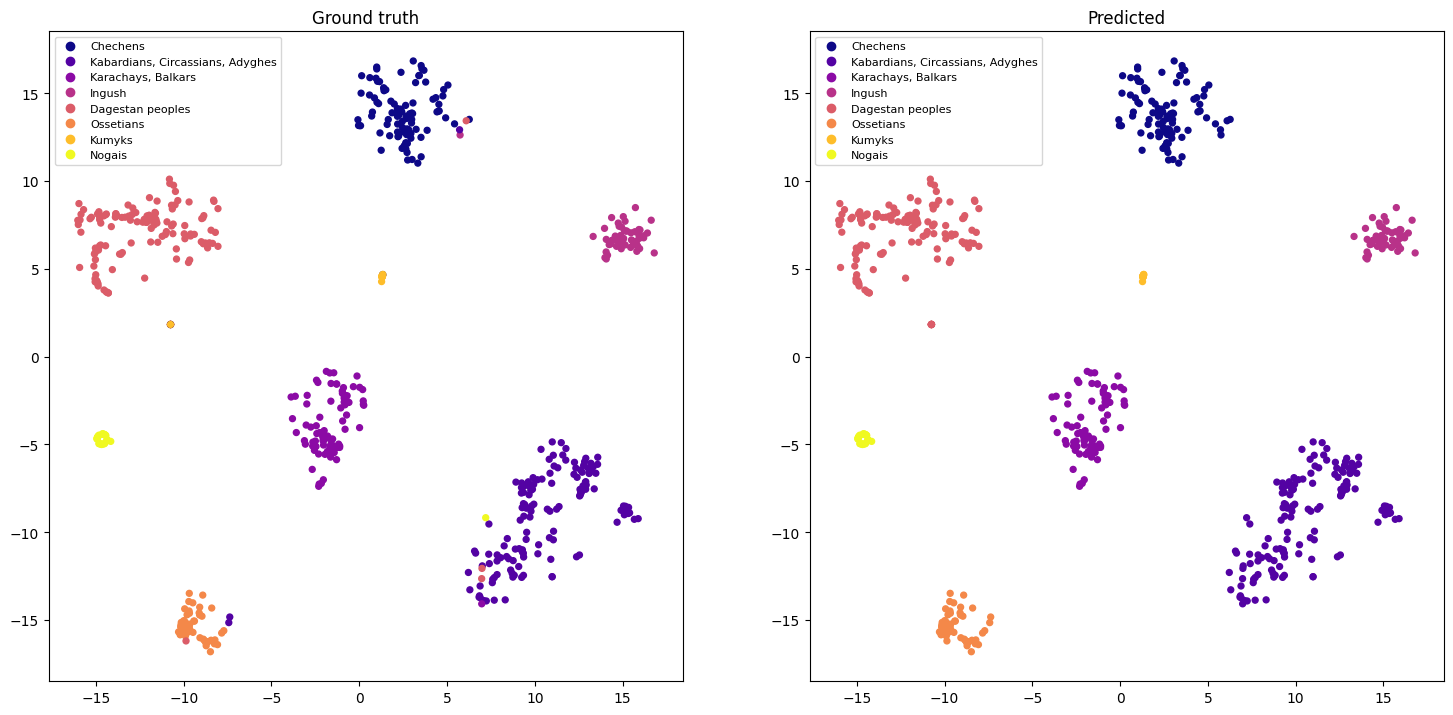

In [100]:
plt.clf()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 18))
# fig.suptitle('Horizontally stacked subplots')
ax1.set_title('Ground truth')
ax2.set_title('Predicted')
ax1.set_aspect(1)
ax2.set_aspect(1)
a1s = ax1.scatter(*all_results_2d.T, c=all_targets, s=18, cmap='plasma')
a2s = ax2.scatter(*all_results_2d.T, c=predicted_labels, s=18, cmap='plasma')
ax1.legend(handles=a1s.legend_elements()[0], labels=types, fontsize=8)
ax2.legend(handles=a2s.legend_elements()[0], labels=types, fontsize=8)
plt.show()

### DBSCAN

In [33]:
clustering_DBSCAN = DBSCAN(eps=0.5, min_samples=2).fit(all_results)
clustering_DBSCAN.labels_

array([ 0,  1,  2,  2,  3,  4,  2,  1,  0,  4,  4,  4,  2,  0,  4,  0,  4,
        0,  4,  0,  1,  4,  5,  0,  1,  6,  3,  7,  6,  2,  0,  0,  2,  0,
        0,  0,  1,  5,  6,  3,  0,  6,  1,  2,  1,  0,  3,  1,  1,  3,  6,
        0,  2,  2,  4,  1,  1,  2,  0,  0,  4,  2,  0,  8,  2,  0,  3,  4,
        4,  3,  6,  2,  1,  4,  0,  3,  4,  2,  3,  0,  4,  3,  0,  2,  5,
        6,  2,  2,  3,  0,  0,  6,  5,  2,  0,  0,  6,  2,  7,  2,  2,  2,
        2,  2,  3,  2,  5,  0,  6,  2,  4,  0,  2,  5,  3,  6,  8,  3,  4,
        1,  5,  3,  4,  0,  0,  3,  3,  7,  2,  1, -1,  3,  0,  2,  6,  0,
        0,  5,  6,  0,  3,  0,  6,  0,  0,  5,  2,  2,  3,  2,  1,  3,  6,
        0,  8,  4,  0,  0,  0,  3,  0,  2,  1,  0,  0,  4,  3,  2,  2,  2,
        6,  3,  2,  4,  2,  2,  4,  4,  2,  0,  4,  1,  0,  4,  4,  3,  3,
        4,  6,  0,  2,  0,  4,  0,  0,  2,  2,  2,  6,  5,  3,  2,  6,  2,
        6,  4,  1,  5,  0,  3,  0,  2,  0,  1,  0,  1,  3,  2,  1,  7,  1,
        2,  6,  3,  3, -1

In [55]:
ars = adjusted_rand_score(all_targets, clustering_DBSCAN.labels_)
vms = v_measure_score(all_targets, clustering_DBSCAN.labels_)
print(ars, vms)

0.9354953206435681 0.9191928672806021


In [68]:
print(f'Num ground truth unique labels: {len(np.unique(all_targets))}')
print(f'Num predicted unique labels: {len(np.unique(clustering_DBSCAN.labels_))}')

all_classes_unique_ids = np.unique(all_targets)
mapping = dict()
for u_id in all_classes_unique_ids:
    selected_pred = (clustering_DBSCAN.labels_ + 1)[all_targets == u_id] # +1 to avoid -1 for np.bincount, -1 became 0
    mapping[u_id] = np.bincount(selected_pred).argmax()

print(mapping)
if 0 in mapping.values():
    print('WARNING!!! Outliers == class!!!')
else:
    mapping = dict((v,k) for k,v in mapping.items())
    if len(mapping) < len(types):
        print('Same label for different classes!!!')
    else:
        mapping[0] = -1
        predicted_labels = []
        for l in (clustering.labels_ + 1):
            if l in mapping.keys():
                predicted_labels.append(mapping[l])
            else:
                predicted_labels.append(l + len(mapping))
                
print(f'Num new predicted unique labels: {len(np.unique(predicted_labels))}')

Num ground truth unique labels: 8
Num predicted unique labels: 10
{0: 4, 1: 1, 2: 5, 3: 2, 4: 3, 5: 7, 6: 8, 7: 6}
Num new predicted unique labels: 10


In [76]:
np.sum(all_targets == predicted_labels) / len(all_targets)

0.9592833876221498

In [74]:
f1_score(all_targets, predicted_labels, average='weighted')

0.971867370073251

In [75]:
f1_score(all_targets, predicted_labels, average='macro')

0.7728029498701816

# Model explainer

In [150]:
! pip install captum

     ---------------------------------------- 1.3/1.3 MB 3.1 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
from torch_geometric.explain.algorithm import CaptumExplainer
from captum.attr import IntegratedGradients
from torch_geometric.data import Data
from torch_geometric.explain import Explainer, GNNExplainer

In [245]:
def model_forward(edge_mask, data):
    out = model(data)
    return out

In [246]:
ig = IntegratedGradients(model_forward)

In [247]:
data.y.shape

torch.Size([2635])

In [252]:
torch.save(model.state_dict(), 'SSGConv_3l_128h_w_a05_k1_for_Explainer.bin')

In [16]:
class SSGConv_3l_128h_w_a05_k1_Explainer(torch.nn.Module):
    def __init__(self):
        super(SSGConv_3l_128h_w_a05_k1_Explainer, self).__init__()
        self.conv1 = SSGConv(data.num_features, 128, alpha=0.5)
        self.conv2 = SSGConv(128, 128, alpha=0.5)
        self.conv3 = SSGConv(128, int(data.num_classes), alpha=0.5)

    def forward(self, x, edge_index, edge_attr):
        x = F.elu(self.conv1(x, edge_index, edge_attr))
        x = F.elu(self.conv2(x, edge_index, edge_attr))
        x = self.conv3(x, edge_index, edge_attr)
        return x

In [17]:
model = SSGConv_3l_128h_w_a05_k1_Explainer()

In [18]:
model.load_state_dict(torch.load('SSGConv_3l_128h_w_a05_k1_for_Explainer.bin'))
model.eval()

SSGConv_3l_128h_w_a05_k1_Explainer(
  (conv1): SSGConv(5, 128, K=1, alpha=0.5)
  (conv2): SSGConv(128, 128, K=1, alpha=0.5)
  (conv3): SSGConv(128, 5, K=1, alpha=0.5)
)

In [19]:
data = data.to('cuda')
model = model.to('cuda')

In [20]:
explainer = Explainer(
    model=model,
    algorithm=GNNExplainer(epochs=200),
    explanation_type='model',
    node_mask_type='attributes',
    edge_mask_type='object',
    model_config=dict(
        mode='multiclass_classification',
        task_level='node',
        return_type='log_probs',  # Model returns log probabilities.
    ),
)

kwargs = {'edge_attr': data.weight.float()}
# Generate explanation for the node at index `10`:
explanation = explainer(x=data.x.float(), edge_index=data.edge_index, index=10, **kwargs)
print(explanation.edge_mask)
print(explanation.node_mask)

tensor([0.0000, 0.1477, 0.0000,  ..., 0.0000, 0.0000, 0.0000], device='cuda:0')
tensor([[0.0000, 0.1534, 0.1517, 0.1527, 0.1373],
        [0.0000, 0.1613, 0.0000, 0.1141, 0.1519],
        [0.0000, 0.1269, 0.1515, 0.1393, 0.0000],
        ...,
        [0.1510, 0.0000, 0.0000, 0.1214, 0.1474],
        [0.1154, 0.0000, 0.1397, 0.1876, 0.1324],
        [0.1108, 0.1578, 0.0000, 0.1559, 0.1491]], device='cuda:0')


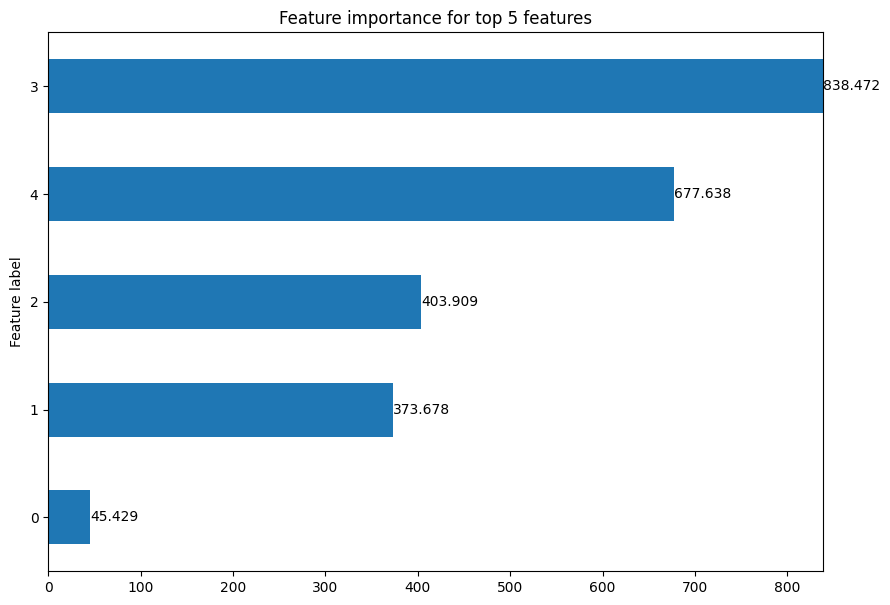

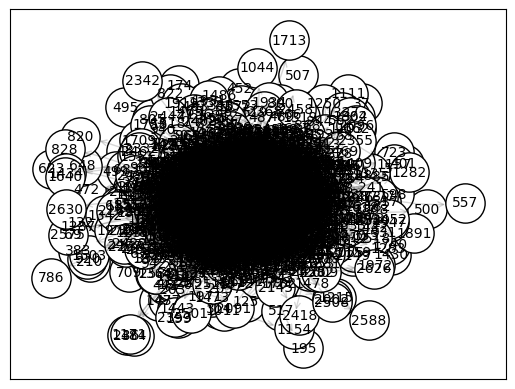

In [21]:
explanation.visualize_feature_importance(top_k=10)

explanation.visualize_graph()

In [46]:
from math import sqrt
def _visualize_graph_via_networkx(
    edge_index,
    edge_weight,
    index,
    path = None,
):
    import matplotlib.pyplot as plt
    import networkx as nx
    
    mask_array = []
    for i in range(edge_weight.shape[0]):
        if edge_index[0, i] == index or edge_index[1, i] == index:
            mask_array.append(True)
        else:
            mask_array.append(False)
            
    edge_index = edge_index[:, mask_array]
    edge_weight = edge_weight[mask_array]
    
    
    
    print(edge_index.shape)
    print(edge_weight.shape)

    g = nx.DiGraph()
    node_size = 800

    for node in edge_index.view(-1).unique().tolist():
        g.add_node(node)

    for (src, dst), w in zip(edge_index.t().tolist(), edge_weight.tolist()):
        g.add_edge(src, dst, alpha=w)
        
    print(g.nodes)

    px = 1 / plt.rcParams['figure.dpi']

    fig, ax = plt.subplots(1, 1, figsize=(4000 * px, 5000 * px))
        
#     ax = plt.gca()
    pos = nx.spring_layout(g)
    for src, dst, data in g.edges(data=True):
        ax.annotate(
            '',
            xy=pos[src],
            xytext=pos[dst],
            arrowprops=dict(
                arrowstyle="->",
                alpha=data['alpha'],
                shrinkA=sqrt(node_size) / 2.0,
                shrinkB=sqrt(node_size) / 2.0,
                connectionstyle="arc3,rad=0.1",
            ),
        )

    nodes = nx.draw_networkx_nodes(g, pos, node_size=node_size,
                                   node_color='white', margins=0.1)
    nodes.set_edgecolor('black')
    nx.draw_networkx_labels(g, pos, font_size=10)

    if path is not None:
        plt.savefig(path)
    else:
        plt.show()

    plt.close()

In [47]:
def visualize_graph(
    edge_index,
    index,
    edge_weight = None,
    path = None,
    backend = None,
):
    if edge_weight is not None:  # Normalize edge weights.
        edge_weight = edge_weight - edge_weight.min()
        edge_weight = edge_weight / edge_weight.max()

    if edge_weight is not None:  # Discard any edges with zero edge weight:
        mask = edge_weight > 1e-7
        edge_index = edge_index[:, mask]
        edge_weight = edge_weight[mask]

    if edge_weight is None:
        edge_weight = torch.ones(edge_index.size(1))

    if backend is None:
        backend = 'graphviz' if has_graphviz() else 'networkx'

    if backend.lower() == 'networkx':
        return _visualize_graph_via_networkx(edge_index, edge_weight, index, path)
    elif backend.lower() == 'graphviz':
        return _visualize_graph_via_graphviz(edge_index, edge_weight, path)

    raise ValueError(f"Expected graph drawing backend to be in "
                     f"{BACKENDS} (got '{backend}')")

In [48]:
edge_mask = explanation.get('edge_mask')
if edge_mask is None:
    raise ValueError(f"The attribute 'edge_mask' is not available "
                     f"in '{explanation.__class__.__name__}' "
                     f"(got {explanation.available_explanations})")
visualize_graph(explanation.edge_index, 10, edge_mask, 'graph_explanation.png', 'networkx')

torch.Size([2, 54])
torch.Size([54])
[6, 10, 83, 197, 207, 217, 323, 345, 412, 526, 568, 634, 670, 699, 813, 903, 984, 1093, 1261, 1362, 1390, 1655, 1769, 1812, 2028, 2228, 2373, 2552]


# Testing TripletLoss (old approach)

In [226]:
model.eval()

TAGConv_3l_128h_w_k3_l128(
  (conv1): TAGConv(5, 128, K=3)
  (conv2): TAGConv(128, 128, K=3)
  (conv3): TAGConv(128, 128, K=3)
)

In [227]:
data = data.to(device)

In [228]:
target_train = np.zeros((len(data.y), len(types)))
for i in range(len(data.y)):
    target_train[i, data.y[i]] = 1
    
results_train = model(data).cpu().detach().numpy()

In [229]:
target_test = []
for i in range(len(test_graphs)):
    tmparray = np.zeros(len(types))
    tmparray[test_graphs[i].y[-1]] = 1
    target_test.append(tmparray)
    
target_test = np.array(target_test)

In [230]:
results_test = []
for i in range(len(test_graphs)):
    print(f'{i} / {len(test_graphs)} node')
    results_test.append(model(test_graphs[i].to(device))[-1].cpu().detach().numpy())
    test_graphs[i].cpu()
    
results_test = np.array(results_test)

0 / 1132 node
1 / 1132 node
2 / 1132 node
3 / 1132 node
4 / 1132 node
5 / 1132 node
6 / 1132 node
7 / 1132 node
8 / 1132 node
9 / 1132 node
10 / 1132 node
11 / 1132 node
12 / 1132 node
13 / 1132 node
14 / 1132 node
15 / 1132 node
16 / 1132 node
17 / 1132 node
18 / 1132 node
19 / 1132 node
20 / 1132 node
21 / 1132 node
22 / 1132 node
23 / 1132 node
24 / 1132 node
25 / 1132 node
26 / 1132 node
27 / 1132 node
28 / 1132 node
29 / 1132 node
30 / 1132 node
31 / 1132 node
32 / 1132 node
33 / 1132 node
34 / 1132 node
35 / 1132 node
36 / 1132 node
37 / 1132 node
38 / 1132 node
39 / 1132 node
40 / 1132 node
41 / 1132 node
42 / 1132 node
43 / 1132 node
44 / 1132 node
45 / 1132 node
46 / 1132 node
47 / 1132 node
48 / 1132 node
49 / 1132 node
50 / 1132 node
51 / 1132 node
52 / 1132 node
53 / 1132 node
54 / 1132 node
55 / 1132 node
56 / 1132 node
57 / 1132 node
58 / 1132 node
59 / 1132 node
60 / 1132 node
61 / 1132 node
62 / 1132 node
63 / 1132 node
64 / 1132 node
65 / 1132 node
66 / 1132 node
67 / 

548 / 1132 node
549 / 1132 node
550 / 1132 node
551 / 1132 node
552 / 1132 node
553 / 1132 node
554 / 1132 node
555 / 1132 node
556 / 1132 node
557 / 1132 node
558 / 1132 node
559 / 1132 node
560 / 1132 node
561 / 1132 node
562 / 1132 node
563 / 1132 node
564 / 1132 node
565 / 1132 node
566 / 1132 node
567 / 1132 node
568 / 1132 node
569 / 1132 node
570 / 1132 node
571 / 1132 node
572 / 1132 node
573 / 1132 node
574 / 1132 node
575 / 1132 node
576 / 1132 node
577 / 1132 node
578 / 1132 node
579 / 1132 node
580 / 1132 node
581 / 1132 node
582 / 1132 node
583 / 1132 node
584 / 1132 node
585 / 1132 node
586 / 1132 node
587 / 1132 node
588 / 1132 node
589 / 1132 node
590 / 1132 node
591 / 1132 node
592 / 1132 node
593 / 1132 node
594 / 1132 node
595 / 1132 node
596 / 1132 node
597 / 1132 node
598 / 1132 node
599 / 1132 node
600 / 1132 node
601 / 1132 node
602 / 1132 node
603 / 1132 node
604 / 1132 node
605 / 1132 node
606 / 1132 node
607 / 1132 node
608 / 1132 node
609 / 1132 node
610 / 11

1071 / 1132 node
1072 / 1132 node
1073 / 1132 node
1074 / 1132 node
1075 / 1132 node
1076 / 1132 node
1077 / 1132 node
1078 / 1132 node
1079 / 1132 node
1080 / 1132 node
1081 / 1132 node
1082 / 1132 node
1083 / 1132 node
1084 / 1132 node
1085 / 1132 node
1086 / 1132 node
1087 / 1132 node
1088 / 1132 node
1089 / 1132 node
1090 / 1132 node
1091 / 1132 node
1092 / 1132 node
1093 / 1132 node
1094 / 1132 node
1095 / 1132 node
1096 / 1132 node
1097 / 1132 node
1098 / 1132 node
1099 / 1132 node
1100 / 1132 node
1101 / 1132 node
1102 / 1132 node
1103 / 1132 node
1104 / 1132 node
1105 / 1132 node
1106 / 1132 node
1107 / 1132 node
1108 / 1132 node
1109 / 1132 node
1110 / 1132 node
1111 / 1132 node
1112 / 1132 node
1113 / 1132 node
1114 / 1132 node
1115 / 1132 node
1116 / 1132 node
1117 / 1132 node
1118 / 1132 node
1119 / 1132 node
1120 / 1132 node
1121 / 1132 node
1122 / 1132 node
1123 / 1132 node
1124 / 1132 node
1125 / 1132 node
1126 / 1132 node
1127 / 1132 node
1128 / 1132 node
1129 / 1132 no

[[ 0.04117843 -0.01167884 -0.15702361 -0.05057803 -0.00226803  0.06554104
   0.14953975  0.01967651  0.14605314  0.05013552 -0.03705888  0.13836181
   0.01235458 -0.16485575  0.01995839 -0.07758214  0.0234136   0.21507213
   0.01148577  0.13485736  0.05569507  0.03308648 -0.0957626   0.09216899
   0.1779539   0.02513459  0.03182004 -0.07849819  0.1498906   0.06609605
  -0.05597802  0.04729935 -0.02715487  0.04777293 -0.11448265  0.1168075
  -0.1110966  -0.16035877 -0.02483764  0.06552346 -0.05453761 -0.03992257
   0.02422024 -0.03929048  0.04265162  0.09324176 -0.01800307  0.12792042
   0.00230374  0.056677    0.07266083  0.01497825 -0.02994409 -0.15903419
  -0.11369511 -0.17593364 -0.00149824  0.11690794 -0.03291406  0.11881398
   0.04530061  0.0013223  -0.01996969 -0.1225441   0.11066746  0.1156661
  -0.11336612  0.01515916  0.01744342  0.05944518  0.00232332 -0.02600085
   0.01657257  0.07392491 -0.07115375  0.04362896  0.10371641  0.04635662
   0.10507694 -0.00640261  0.05484433  0

<Figure size 640x480 with 0 Axes>

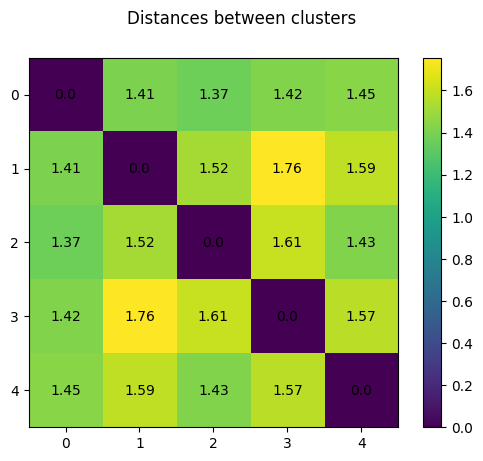

0
4 2
[2 2 2 2 2] Mean class:  2.0
2.0
[[2 5]]
1
4 4
[4 4 4 4 4] Mean class:  4.0
4.0
[[4 5]]
2
4 4
[4 4 4 4 4] Mean class:  4.0
4.0
[[4 5]]
3
4 4
[4 4 4 4 4] Mean class:  4.0
4.0
[[4 5]]
4
4 4
[4 4 4 4 4] Mean class:  4.0
4.0
[[4 5]]
5
4 4
[4 4 4 4 4] Mean class:  4.0
4.0
[[4 5]]
6
4 4
[4 4 4 4 4] Mean class:  4.0
4.0
[[4 5]]
7
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
8
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
9
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
10
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
11
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
12
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
13
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
14
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
15
4 4
[4 4 4 4 4] Mean class:  4.0
4.0
[[4 5]]
16
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
17
2 2
[2 2 2 2 2] Mean class:  2.0
2.0
[[2 5]]
18
1 1
[1 1 1 1 1] Mean class:  1.0
1.0
[[1 5]]
19
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
20
4 4
[4 4 4 4 4] Mean class:  4.0
4.0
[[4 5]]
21

3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
245
1 1
[1 1 1 1 1] Mean class:  1.0
1.0
[[1 5]]
246
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
247
3 2
[2 2 2 2 2] Mean class:  2.0
2.0
[[2 5]]
248
4 4
[4 4 4 4 4] Mean class:  4.0
4.0
[[4 5]]
249
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
250
4 4
[4 4 4 4 4] Mean class:  4.0
4.0
[[4 5]]
251
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
252
4 4
[4 4 4 4 4] Mean class:  4.0
4.0
[[4 5]]
253
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
254
2 2
[2 2 2 2 2] Mean class:  2.0
2.0
[[2 5]]
255
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
256
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
257
2 2
[2 2 2 2 2] Mean class:  2.0
2.0
[[2 5]]
258
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
259
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
260
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
261
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
262
1 1
[1 1 1 1 1] Mean class:  1.0
1.0
[[1 5]]
263
1 1
[1 1 1 1 1] Mean class:  1.0
1.0
[[1 5]]
264
2 2
[2 2 2 2 2] Mean

[1 1 4 1 1] Mean class:  1.6
2.0
[[1 4]
 [4 1]]
482
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
483
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
484
4 4
[4 4 4 4 4] Mean class:  4.0
4.0
[[4 5]]
485
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
486
4 1
[1 1 1 1 1] Mean class:  1.0
1.0
[[1 5]]
487
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
488
2 2
[2 2 2 2 2] Mean class:  2.0
2.0
[[2 5]]
489
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
490
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
491
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
492
2 2
[2 2 2 2 2] Mean class:  2.0
2.0
[[2 5]]
493
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
494
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
495
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
496
1 1
[1 1 1 1 1] Mean class:  1.0
1.0
[[1 5]]
497
1 1
[1 1 1 1 1] Mean class:  1.0
1.0
[[1 5]]
498
1 1
[1 1 1 1 1] Mean class:  1.0
1.0
[[1 5]]
499
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
500
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
501
1 1
[1 1 1 1 1] M

[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
726
4 4
[4 4 4 4 4] Mean class:  4.0
4.0
[[4 5]]
727
1 1
[1 1 1 1 1] Mean class:  1.0
1.0
[[1 5]]
728
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
729
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
730
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
731
4 4
[4 4 4 4 4] Mean class:  4.0
4.0
[[4 5]]
732
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
733
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
734
1 1
[1 1 1 1 1] Mean class:  1.0
1.0
[[1 5]]
735
1 1
[1 1 1 1 1] Mean class:  1.0
1.0
[[1 5]]
736
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
737
4 4
[4 4 4 4 4] Mean class:  4.0
4.0
[[4 5]]
738
2 2
[2 2 2 2 2] Mean class:  2.0
2.0
[[2 5]]
739
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
740
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
741
1 1
[1 1 1 1 1] Mean class:  1.0
1.0
[[1 5]]
742
1 1
[1 1 1 1 1] Mean class:  1.0
1.0
[[1 5]]
743
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
744
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
745
2 2
[2 2 2 2 2] Mean cla

3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
957
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
958
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
959
2 2
[2 2 2 2 2] Mean class:  2.0
2.0
[[2 5]]
960
4 4
[4 4 4 4 4] Mean class:  4.0
4.0
[[4 5]]
961
4 4
[4 4 4 4 4] Mean class:  4.0
4.0
[[4 5]]
962
2 2
[2 2 2 2 2] Mean class:  2.0
2.0
[[2 5]]
963
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
964
4 4
[4 4 4 4 4] Mean class:  4.0
4.0
[[4 5]]
965
1 1
[1 1 1 1 1] Mean class:  1.0
1.0
[[1 5]]
966
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
967
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
968
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
969
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
970
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
971
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
972
1 2
[2 2 2 2 2] Mean class:  2.0
2.0
[[2 5]]
973
4 4
[4 4 4 4 4] Mean class:  4.0
4.0
[[4 5]]
974
3 3
[3 3 3 3 3] Mean class:  3.0
3.0
[[3 5]]
975
2 2
[2 2 2 2 2] Mean class:  2.0
2.0
[[2 5]]
976
3 3
[3 3 3 3 3] Mean

<Figure size 640x480 with 0 Axes>

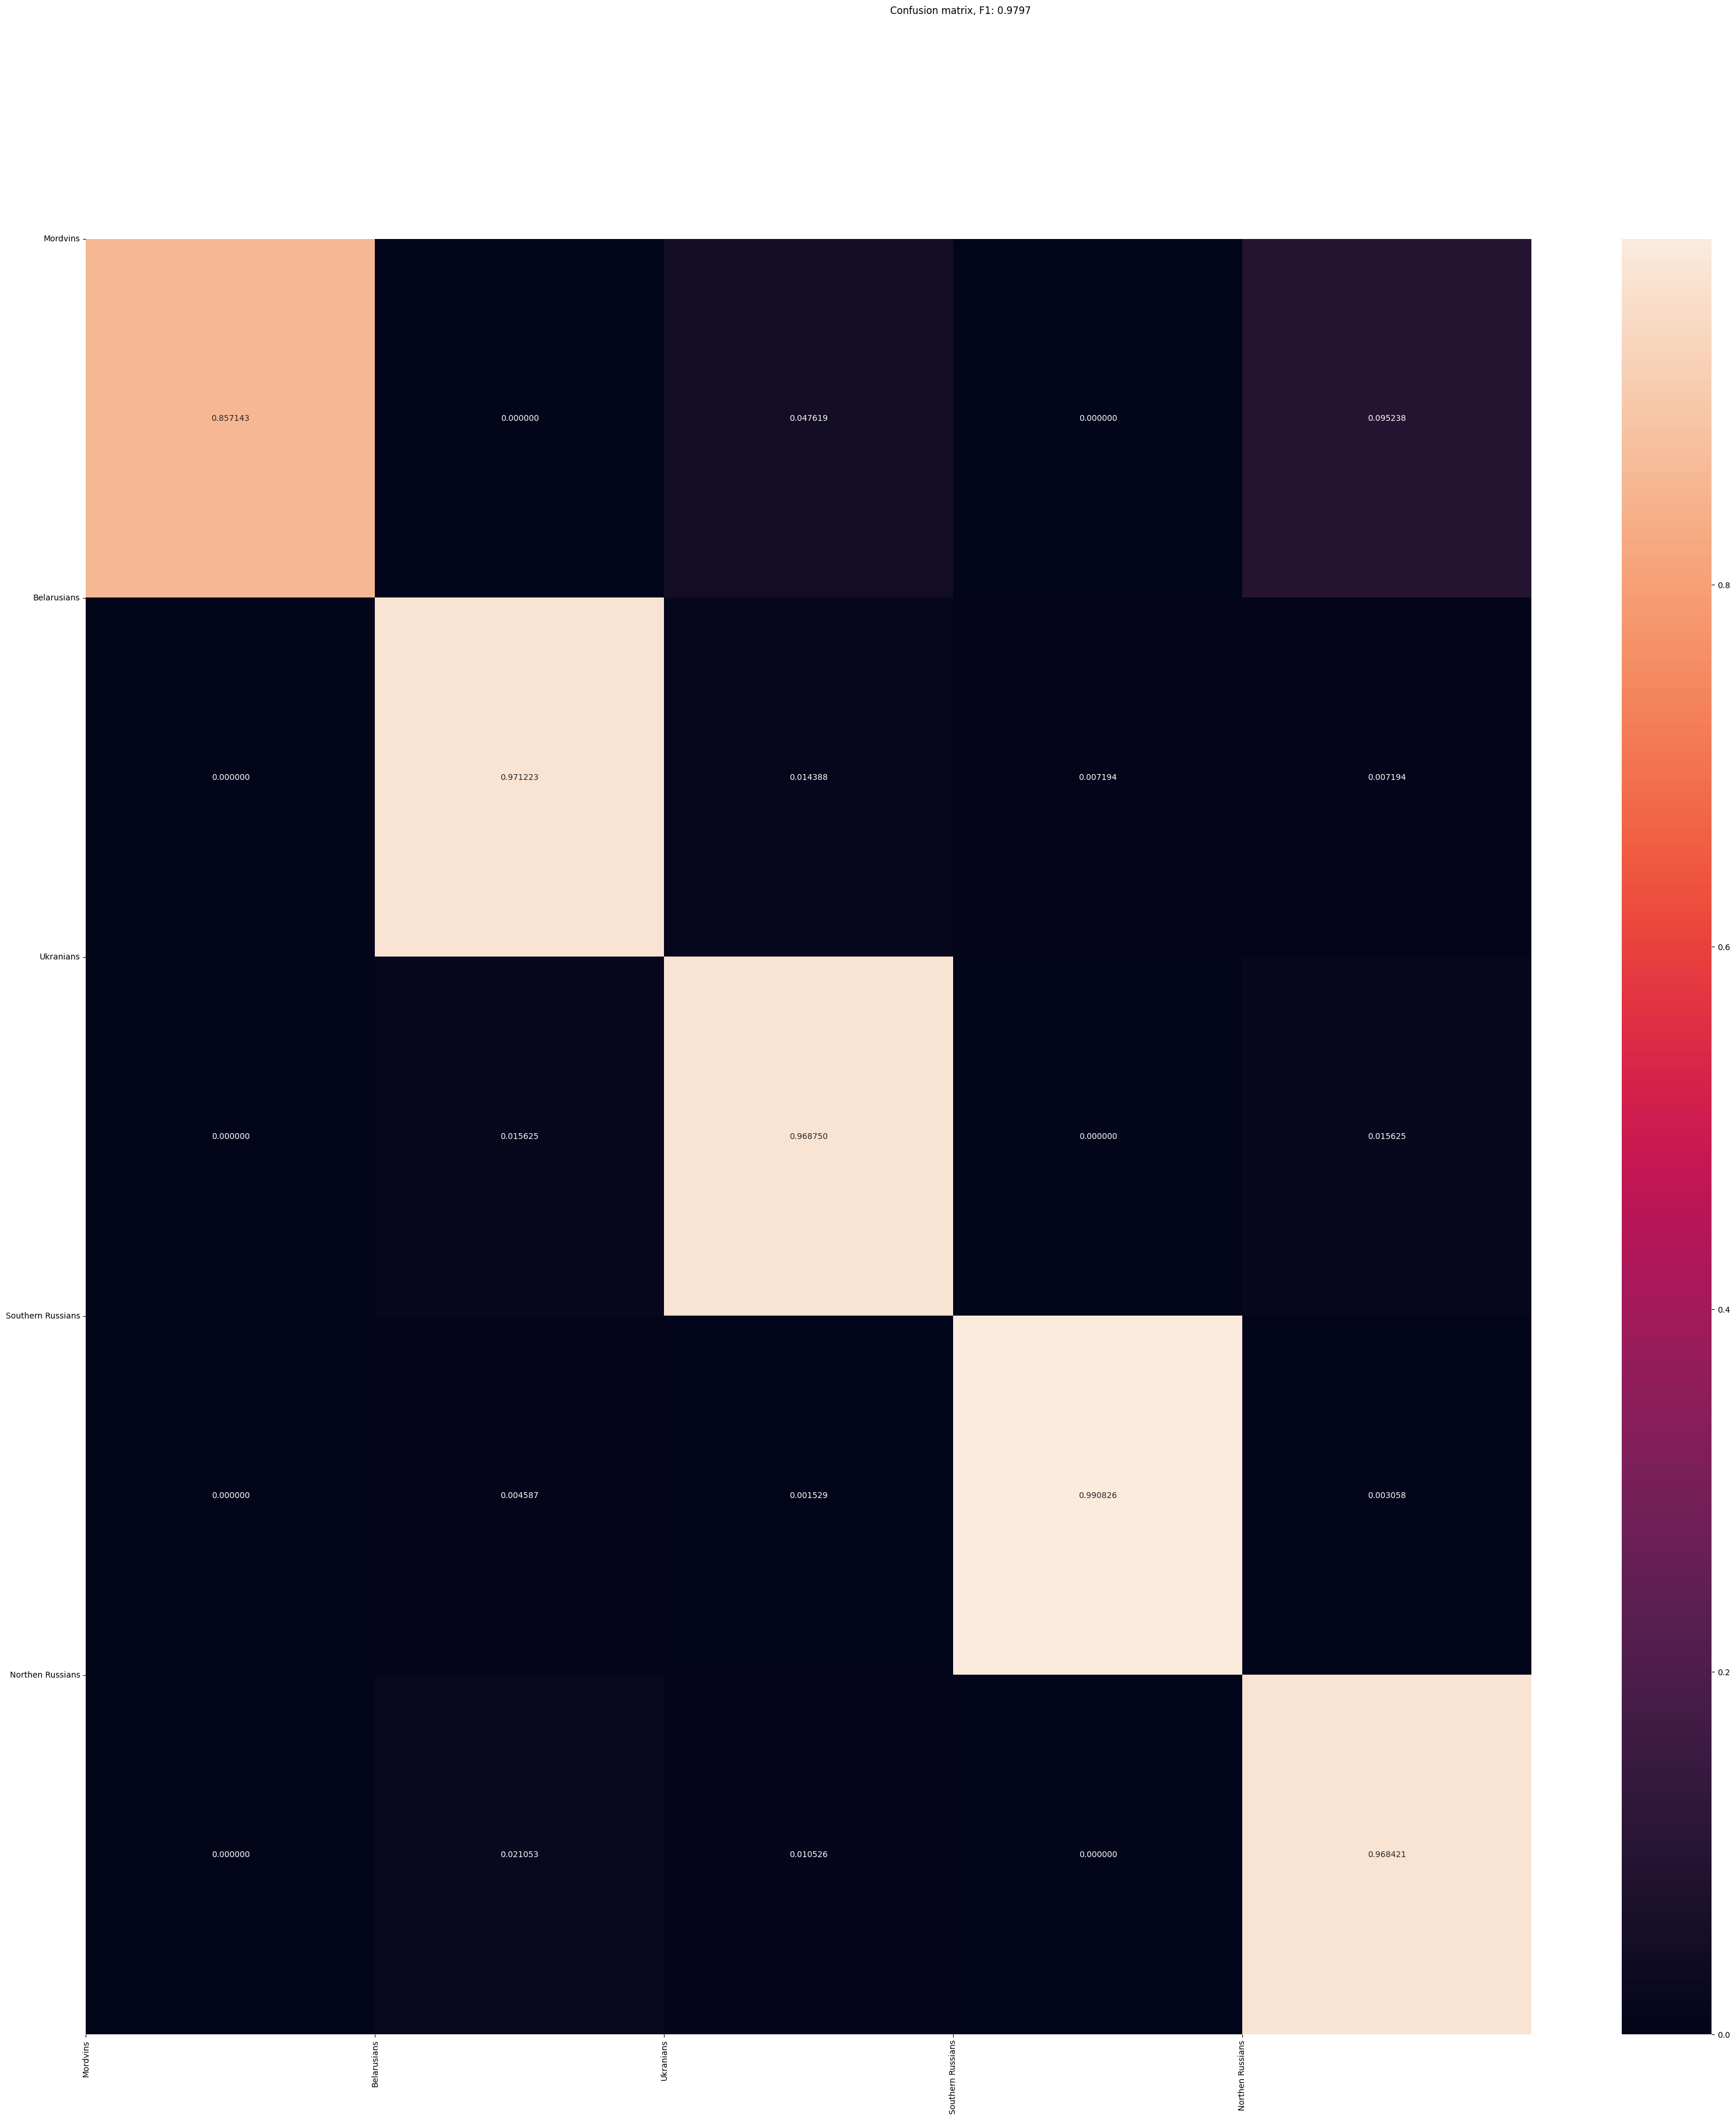

Accuracy: 1116/1132, exactly: 0.9859
MMD:  0.88782066


In [234]:
# axis1 = 1
# axis2 = 120

# px = 1 / plt.rcParams['figure.dpi']
# plt.clf()
# fig, ax = plt.subplots(6, 2, figsize=(6400 * px, 6400 * px))

# tmp_train = []
# tmp_test = []
# for i in range(7):
#     for j, vec in enumerate(results_train):
#         if np.argmax(target_train[j]) == i:
#             tmp_train.append(vec)
#     tmp_train = np.array(tmp_train)
#     print(tmp_train.shape)
#     projection_train = np.stack((tmp_train[:, axis1], tmp_train[:, axis2]), axis=-1)
#     dots1 = ax[i % 6][i // 6].scatter(projection_train[:, 0], projection_train[:, 1], s=10, label='Train data')
#     tmp_train = []

#     for j, vec in enumerate(results_test):
#         if np.argmax(target_test[j]) == i:
#             tmp_test.append(vec)
#     tmp_test = np.array(tmp_test)
#     projection_test = np.stack((tmp_test[:, axis1], tmp_test[:, axis2]), axis=-1)
#     dots2 = ax[i % 6][i // 6].scatter(projection_test[:, 0], projection_test[:, 1], s=10, label='Test data')
#     tmp_test = []

#     ax[i % 6][i // 6].legend(handles=[dots1, dots2], fontsize=40)

# for i in range(7):
#     ax[i % 6][i // 6].set_title(f"Class {i + 1}", fontsize=40)

# fig.suptitle(f"Projection for axes {axis1} and {axis2}", fontsize=80)
# fig.savefig("projection.png")

# # projection = np.stack((results_train[:, 128], results_train[:, 988]), axis=-1)
# # print(projection.shape)
# # plt.clf()
# # plt.scatter(projection[:, 0], projection[:, 1], s=0.1)
# # plt.show()

clusters = np.zeros((len(types), 128))
tmp = []
for i in range(len(types)):
    for j, vec in enumerate(results_train):
        if np.argmax(target_train[j].squeeze()) == i:
            tmp.append(vec)
    tmp = np.array(tmp)
    clusters[i, :] = tmp.mean(axis=0)
    tmp = []

print(clusters)

dist = np.zeros((len(types), len(types)))
for i in range(11):
    for j in range(i + 1, len(types)):
        print(f"Distance between clusters {i} and {j} = {np.linalg.norm(clusters[i] - clusters[j])}")
        dist[i, j] = np.linalg.norm(clusters[i] - clusters[j])
        dist[j, i] = np.linalg.norm(clusters[i] - clusters[j])

plt.clf()
fig, ax = plt.subplots(1, 1)
img = ax.imshow(dist)
for (j, i), label in np.ndenumerate(dist):
    ax.text(i, j, round(label, 2), ha='center', va='center')
fig.colorbar(img)
fig.suptitle("Distances between clusters")
plt.show()
# plt.savefig("cluster_distances.png")

# tsne = TSNE(learning_rate=10, perplexity=10)
# embedded = tsne.fit_transform(results_train)
# print('New Shape of X: ', embedded.shape)
# print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
# print('No. of iterations: ', tsne.n_iter_)
#
# plt.clf()
# fig, ax = plt.subplots(5, 2, figsize=(6400 * px, 6400 * px))
# for i in range(10):
#     for j, vec in enumerate(embedded):
#         if np.argmax(target_train[j].squeeze()) == i:
#             tmp_train.append(vec)
#     tmp_train = np.array(tmp_train)
#     dots = ax[i % 5][i // 5].scatter(tmp_train[:, 0], tmp_train[:, 1], s=10, label=f'Class {i}')
#     tmp_train = []
#     ax[i % 5][i // 5].legend(handles=[dots], fontsize=40)
#
# plt.savefig("New_clusters.png")

# print(target_test[0])
mmd = 0
ground_truth = []
predicted_labels = []
counter = 0
for i in range(len(results_test)):
    # for i, vec in enumerate(results_test):
    # if i % 100 == 0:
    print(i)
    vec = results_test[i]
    real = target_test[i]
    norm_arg = np.argmin(np.linalg.norm(vec - results_train, axis=1))
    # print(np.min(np.linalg.norm(vec - results_train, axis=1)))
    # norm_arg = np.argmin(np.linalg.norm(vec - clusters, axis=1))
    answer = target_train[norm_arg]
    print(np.argmax(real.squeeze()), np.argmax(answer.squeeze()))
    md = np.sort(np.linalg.norm(vec - results_train, axis=1))[0]
    class_list = np.argmax(target_train[np.argsort(np.linalg.norm(vec - results_train, axis=1))[:5]],
                           axis=-1).squeeze()
    if md > mmd:
        mmd = md
    print(class_list, "Mean class: ", np.mean(class_list))
    print(np.round(np.mean(class_list)))
    # if np.abs(np.argmax(real.squeeze()) - np.argmax(answer.squeeze())) <= 1:
    ground_truth.append(np.argmax(real.squeeze()))
#     predicted_labels.append(int(np.round(np.mean(class_list))))

    uniq, cnts = np.unique(class_list, return_counts=True)
    u_l = np.asarray((uniq, cnts)).T
    u_l_as = np.argsort(u_l[:, 1])
    print(u_l[u_l_as[::-1]])
    predicted_labels.append(u_l[u_l_as[::-1]][0, 0])
    
    if np.abs(np.argmax(real.squeeze()) - np.round(np.mean(class_list))) <= 1:
        counter += 1
        
print(classification_report(ground_truth, predicted_labels))
cm = confusion_matrix(ground_truth, predicted_labels, normalize='true')

final_f1_weighted_score = f1_score(ground_truth, predicted_labels, average='weighted')
final_f1_macro_score = f1_score(ground_truth, predicted_labels, average='macro')

print(f"Final f1 score weighted: {final_f1_weighted_score}")
print(f"Final f1 score macro: {final_f1_macro_score}")

plt.clf()
    
px = 1 / plt.rcParams['figure.dpi']

fig, ax = plt.subplots(1, 1, figsize=(4000 * px, 4000 * px))
sns.heatmap(cm, annot=True, ax=ax, annot_kws={'size': 10}, fmt='f')
ax.set_xticks([i for i in range(len(types))])
ax.set_xticklabels([f'{types[i]}' for i in range(0, len(types))])
ax.set_yticks([i for i in range(len(types))])
ax.set_yticklabels([f'{types[i]}' for i in range(0, len(types))])
fig.suptitle(f"Confusion matrix, F1: {round(f1_score(ground_truth, predicted_labels, average='weighted'), 4)}")
plt.yticks(rotation=0)
plt.xticks(rotation=90) 
# plt.savefig(rf"metis.png", bbox_inches="tight")
plt.show()

print(f"Accuracy: {counter}/{len(results_test)}, exactly: {round(counter / len(results_test), 4)}")
# norm_arg = np.argmin(np.linalg.norm(results_test[0] - results_train, axis=1))
# print(target_train[norm_arg])
print('MMD: ', mmd)

# Making clusters

In [472]:
from sklearn.manifold import TSNE

def evaluation(model, data, test_graphs):
    model.eval()

    embeddings_train = model(data.to(device)).cpu().detach().numpy()
    
    print(embeddings_train.shape)
    
    embeddings_test = []
    
    for k in range(len(test_graphs)):
        embeddings_test.append(model(test_graphs[k].to(device))[-1].cpu().detach().numpy())
        
    embeddings_test = np.array(embeddings_test)
    
    print(embeddings_test.shape)
    
    embeddings_total = np.concatenate([embeddings_train, embeddings_test], axis=0)
    
    tsne = TSNE(n_components=2, learning_rate=1, init='random', perplexity=40)
    
    tsne_embeddings = tsne.fit_transform(embeddings_total)
    
    axis1 = 1
    axis2 = 120
    
    plt.clf()
    plt.scatter(*tsne_embeddings[:426].T, label='train data', s=2)
    plt.scatter(*tsne_embeddings[426:].T, label='test data', s=2)
#     plt.scatter(embeddings[:, axis1], embeddings[:, axis2])
    plt.legend()
#     plt.savefig("nc_clustering_triplet.png", bbox_inches="tight")
    plt.show()

(426, 128)
(188, 128)


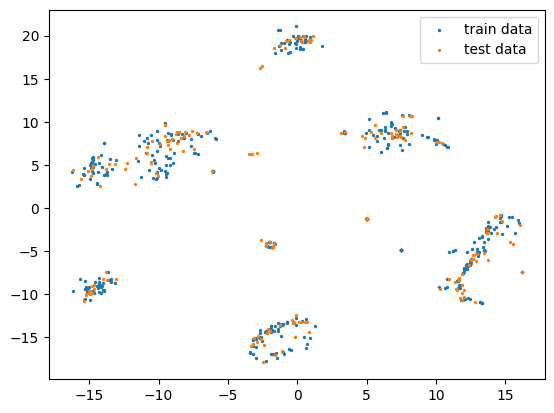

In [473]:
evaluation(model, data, test_graphs)

In [79]:
output = torch.rand(10, 128)
targets = torch.tensor([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [80]:
tl = TripletSemiHardLoss()

In [81]:
tl(output, targets)

tensor(0.0207)

In [14]:
a = (1, 2)
b = (a, 3)
b

((1, 2), 3)

In [33]:
input1 = torch.randn(100, 128)
input2 = torch.randn(100, 128)
output = torch.cdist(input1, input2)

output.shape

torch.Size([100, 100])

In [61]:
x = tf.constant([[5, 4, 6], [5, 4, 6], [5, 4, 6]])
print(tf.size(x))
y = tf.reshape(tf.constant([5, 2, 5, 5, 2, 5, 5, 2, 5]), [-1, 1])
tf.math.greater(x, y)

tf.Tensor(9, shape=(), dtype=int32)


InvalidArgumentError: {{function_node __wrapped__Greater_device_/job:localhost/replica:0/task:0/device:GPU:0}} Incompatible shapes: [3,3] vs. [9,1]
	 [[{{node Greater}}]] [Op:Greater]

# Tensorflow TripletLoss vs Pytorch TripletLoss

In [12]:
import tensorflow as tf
from tensorflow_addons.losses import metric_learning
from tensorflow_addons.utils.keras_utils import LossFunctionWrapper
from tensorflow_addons.utils.types import FloatTensorLike, TensorLike
from typeguard import typechecked
from typing import Optional, Union, Callable

In [104]:
def _masked_maximum(data, mask, dim=1):
    """Computes the axis wise maximum over chosen elements.

    Args:
      data: 2-D float `Tensor` of shape `[n, m]`.
      mask: 2-D Boolean `Tensor` of shape `[n, m]`.
      dim: The dimension over which to compute the maximum.

    Returns:
      masked_maximums: N-D `Tensor`.
        The maximized dimension is of size 1 after the operation.
    """
    axis_minimums = tf.math.reduce_min(data, dim, keepdims=True)
    masked_maximums = (
        tf.math.reduce_max(
            tf.math.multiply(data - axis_minimums, mask), dim, keepdims=True
        )
        + axis_minimums
    )
    return masked_maximums


def _masked_minimum(data, mask, dim=1):
    """Computes the axis wise minimum over chosen elements.

    Args:
      data: 2-D float `Tensor` of shape `[n, m]`.
      mask: 2-D Boolean `Tensor` of shape `[n, m]`.
      dim: The dimension over which to compute the minimum.

    Returns:
      masked_minimums: N-D `Tensor`.
        The minimized dimension is of size 1 after the operation.
    """
    axis_maximums = tf.math.reduce_max(data, dim, keepdims=True)
    masked_minimums = (
        tf.math.reduce_min(
            tf.math.multiply(data - axis_maximums, mask), dim, keepdims=True
        )
        + axis_maximums
    )
    return masked_minimums


def triplet_semihard_loss(
    y_true: TensorLike,
    y_pred: TensorLike,
    margin: FloatTensorLike = 0.2,
    distance_metric: Union[str, Callable] = "L2",
) -> tf.Tensor:
    r"""Computes the triplet loss with semi-hard negative mining.

    Usage:

    >>> y_true = tf.convert_to_tensor([0, 0])
    >>> y_pred = tf.convert_to_tensor([[0.0, 1.0], [1.0, 0.0]])
    >>> tfa.losses.triplet_semihard_loss(y_true, y_pred, distance_metric="L2")
    <tf.Tensor: shape=(), dtype=float32, numpy=2.4142137>

    >>> # Calling with callable `distance_metric`
    >>> distance_metric = lambda x: tf.linalg.matmul(x, x, transpose_b=True)
    >>> tfa.losses.triplet_semihard_loss(y_true, y_pred, distance_metric=distance_metric)
    <tf.Tensor: shape=(), dtype=float32, numpy=1.0>

    Args:
      y_true: 1-D integer `Tensor` with shape `[batch_size]` of
        multiclass integer labels.
      y_pred: 2-D float `Tensor` of embedding vectors. Embeddings should
        be l2 normalized.
      margin: Float, margin term in the loss definition.
      distance_metric: `str` or a `Callable` that determines distance metric.
        Valid strings are "L2" for l2-norm distance,
        "squared-L2" for squared l2-norm distance,
        and "angular" for cosine similarity.

        A `Callable` should take a batch of embeddings as input and
        return the pairwise distance matrix.

    Returns:
      triplet_loss: float scalar with dtype of `y_pred`.
    """
    labels = tf.convert_to_tensor(y_true, name="labels")
    embeddings = tf.convert_to_tensor(y_pred, name="embeddings")

    convert_to_float32 = (
        embeddings.dtype == tf.dtypes.float16 or embeddings.dtype == tf.dtypes.bfloat16
    )
    precise_embeddings = (
        tf.cast(embeddings, tf.dtypes.float32) if convert_to_float32 else embeddings
    )

    # Reshape label tensor to [batch_size, 1].
    lshape = tf.shape(labels)
    labels = tf.reshape(labels, [lshape[0], 1])

    # Build pairwise squared distance matrix

    if distance_metric == "L2":
        pdist_matrix = metric_learning.pairwise_distance(
            precise_embeddings, squared=False
        )
        
#         tf.print(pdist_matrix)

    elif distance_metric == "squared-L2":
        pdist_matrix = metric_learning.pairwise_distance(
            precise_embeddings, squared=True
        )

    elif distance_metric == "angular":
        pdist_matrix = metric_learning.angular_distance(precise_embeddings)

    else:
        pdist_matrix = distance_metric(precise_embeddings)

    # Build pairwise binary adjacency matrix.
    adjacency = tf.math.equal(labels, tf.transpose(labels))
#     tf.print(adjacency)
    # Invert so we can select negatives only.
    adjacency_not = tf.math.logical_not(adjacency)
#     tf.print(adjacency_not)

    batch_size = tf.size(labels)

    # Compute the mask.
    pdist_matrix_tile = tf.tile(pdist_matrix, [batch_size, 1])
#     tf.print(pdist_matrix_tile)
    
    mask = tf.math.logical_and(
        tf.tile(adjacency_not, [batch_size, 1]),
        tf.math.greater(
            pdist_matrix_tile, tf.reshape(tf.transpose(pdist_matrix), [-1, 1])
        ),
    )
#     tf.print(mask)
    mask_final = tf.reshape(
        tf.math.greater(
            tf.math.reduce_sum(
                tf.cast(mask, dtype=tf.dtypes.float32), 1, keepdims=True
            ),
            0.0,
        ),
        [batch_size, batch_size],
    )
#     tf.print(mask_final)
    
    mask_final = tf.transpose(mask_final)

    adjacency_not = tf.cast(adjacency_not, dtype=tf.dtypes.float32)
    mask = tf.cast(mask, dtype=tf.dtypes.float32)

    # negatives_outside: smallest D_an where D_an > D_ap.
    negatives_outside = tf.reshape(
        _masked_minimum(pdist_matrix_tile, mask), [batch_size, batch_size]
    )
#     tf.print(negatives_outside)
    
    negatives_outside = tf.transpose(negatives_outside)

    # negatives_inside: largest D_an.
    negatives_inside = tf.tile(
        _masked_maximum(pdist_matrix, adjacency_not), [1, batch_size]
    )
#     tf.print(negatives_inside)
    semi_hard_negatives = tf.where(mask_final, negatives_outside, negatives_inside)
    
#     tf.print(semi_hard_negatives)

    loss_mat = tf.math.add(margin, pdist_matrix - semi_hard_negatives)
    
#     tf.print(loss_mat)

    mask_positives = tf.cast(adjacency, dtype=tf.dtypes.float32) - tf.linalg.diag(
        tf.ones([batch_size])
    )
    
#     tf.print(mask_positives)

    # In lifted-struct, the authors multiply 0.5 for upper triangular
    #   in semihard, they take all positive pairs except the diagonal.
    num_positives = tf.math.reduce_sum(mask_positives)
    
#     tf.print(num_positives)

    triplet_loss = tf.math.truediv(
        tf.math.reduce_sum(
            tf.math.maximum(tf.math.multiply(loss_mat, mask_positives), 0.0)
        ),
        num_positives,
    )
    
#     tf.print(
#             tf.math.maximum(tf.math.multiply(loss_mat, mask_positives), 0.0)
#         )
    
#     tf.print(triplet_loss)

    if convert_to_float32:
        return tf.cast(triplet_loss, embeddings.dtype)
    else:
        return triplet_loss

In [18]:
test_array_x = np.random.random_sample((100, 128)).astype(np.float64)
test_array_y = np.array([0 for i in range(25)] + [1 for i in range(25)] + [2 for i in range(25)] + [3 for i in range(25)]).astype(np.float64)

In [105]:
with tf.device('CPU'):
    tf.print(triplet_semihard_loss(tf.cast(tf.convert_to_tensor(test_array_y), tf.float32), tf.cast(tf.convert_to_tensor(test_array_x), tf.float32)))

[[0 0.198365405 0.316806972 ... 0 0 0]
 [0.196273044 0 0.170718387 ... 0 0 0]
 [0.224508 0.178384498 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0.188140586 0.184802726]
 [0 0 0 ... 0.194748595 0 0.184892371]
 [0 0 0 ... 0.197816089 0.194497779 0]]
0.187194243


In [110]:
criterion = TripletSemiHardLoss()

In [111]:
criterion(torch.tensor(test_array_x).to('cuda'), torch.tensor(test_array_y).to('cuda'))

tensor([0.0000, 0.1984, 0.3168, 0.1888, 0.1955, 0.1829, 0.1981, 0.1858, 0.1992,
        0.1648, 0.1926, 0.1838, 0.1697, 0.1981, 0.1974, 0.1988, 0.1834, 0.1898,
        0.1936, 0.1844, 0.1909, 0.1806, 0.1921, 0.1692, 0.1999, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000], device='cuda:0', dtype=torch.float64)


tensor(0.1872, device='cuda:0', dtype=torch.float64)

Testing

In [62]:
model.eval()

Net(
  (conv1): GCNConv(5, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 5)
)

In [69]:
from sklearn.metrics import f1_score
y_true = []
y_pred = []

for i in range(len(test_graphs)):
    y_pred.append(np.argmax(F.softmax(model(test_graphs[i])[-1], dim=0).cpu().detach().numpy()))
    y_true.append(test_graphs[i].y[-1])
    
print(classification_report(y_true, y_pred))

print(confusion_matrix(y_true, y_pred))

print(f1_score(y_true, y_pred, average='weighted'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.50      0.02      0.04        47
           2       0.83      0.12      0.20        43
           3       0.70      0.99      0.82       218
           4       0.89      0.78      0.83        64

    accuracy                           0.73       379
   macro avg       0.78      0.58      0.58       379
weighted avg       0.73      0.73      0.66       379

[[  7   0   0   0   0]
 [  0   1   1  43   2]
 [  0   0   5  36   2]
 [  0   1   0 215   2]
 [  0   0   0  14  50]]
0.6576256956227116


In [54]:
test_graphs[0].y

tensor([3, 3, 4,  ..., 1, 1, 3])

## Real example (old)

In [82]:
df = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
types = pd.concat([df['label_id1'], df['label_id2']], axis=0).unique().tolist()
n = pd.concat([df['node_id1'], df['node_id2']], axis=0)
l = pd.concat([df['label_id1'], df['label_id2']], axis=0)
df_new = pd.concat([n, l], axis=1)
df_new.iloc[:, 0] = df_new.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
df_new.iloc[:, 1] = df_new.iloc[:, 1].apply(lambda t: types.index(t))
df_new = df_new.sort_values(by=[0])
df_new = df_new.drop_duplicates()
df_new.iloc[:, 1].to_numpy()

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [22]:
class MyDataset(InMemoryDataset):
    def __init__(self, transform=None):
        super(MyDataset, self).__init__('.', transform, None, None)

        df = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
        
        types = pd.concat([df['label_id1'], df['label_id2']], axis=0).unique().tolist()

        edge_index = torch.zeros((2, df.shape[0]), dtype=torch.long)
        edge_attr = torch.zeros((df.shape[0],), dtype=torch.float)
        
        n = pd.concat([df['node_id1'], df['node_id2']], axis=0)
        l = pd.concat([df['label_id1'], df['label_id2']], axis=0)
        df_new = pd.concat([n, l], axis=1)
        df_new.iloc[:, 0] = df_new.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
        df_new.iloc[:, 1] = df_new.iloc[:, 1].apply(lambda t: types.index(t))
        df_new = df_new.sort_values(by=[0])
        df_new = df_new.drop_duplicates()
        y = torch.from_numpy(df_new.iloc[:, 1].to_numpy()).type(torch.long)

        for i in range(df.shape[0]):
            edge_index[:, i] = torch.tensor([int(df.iloc[i, 0].split('_')[1]), int(df.iloc[i, 1].split('_')[1])])
            edge_attr[i] = df.iloc[i, 4]

        data = Data(edge_attr=edge_attr, edge_index=edge_index, y=y)
        
        print(data)
        
        data.num_nodes = len(pd.concat([df['node_id1'], df['node_id2']], axis=0).unique())
        
        data.num_classes = len(types)

#         # splitting the data into train, validation and test
#         X_train, X_test, y_train, y_test = train_test_split(edge_attr, 
#                                                             y,
#                                                             test_size=0.30, 
#                                                             random_state=42)
        
#         n_nodes = len(y)
        
#         # create train and test masks for data
#         train_mask = torch.zeros(n_nodes, dtype=torch.bool)
#         test_mask = torch.zeros(n_nodes, dtype=torch.bool)
#         train_mask[X_train.index] = True
#         test_mask[X_test.index] = True
#         data['train_mask'] = train_mask
#         data['test_mask'] = test_mask

#         self.data, self.slices = self.collate([data])

    def _download(self):
        return

    def _process(self):
        return

    def __repr__(self):
        return '{}()'.format(self.__class__.__name__)



dataset = MyDataset()
print(dataset)
data = dataset[0]

Data(edge_index=[2, 67503], edge_attr=[67503], y=[3767])
MyDataset()


In [34]:
df = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
        
types = pd.concat([df['label_id1'], df['label_id2']], axis=0).unique().tolist()

edge_index = torch.zeros((2, df.shape[0]), dtype=torch.long)
edge_attr = torch.zeros((df.shape[0],), dtype=torch.float)

n = pd.concat([df['node_id1'], df['node_id2']], axis=0)
l = pd.concat([df['label_id1'], df['label_id2']], axis=0)
df_new = pd.concat([n, l], axis=1)
df_new.iloc[:, 0] = df_new.iloc[:, 0].apply(lambda n: int(n.split('_')[1]))
df_new.iloc[:, 1] = df_new.iloc[:, 1].apply(lambda t: types.index(t))
df_new = df_new.sort_values(by=[0])
df_new = df_new.drop_duplicates()
y = torch.from_numpy(df_new.iloc[:, 1].to_numpy()).type(torch.long)

for i in range(df.shape[0]):
    edge_index[:, i] = torch.tensor([int(df.iloc[i, 0].split('_')[1]), int(df.iloc[i, 1].split('_')[1])])
    edge_attr[i] = df.iloc[i, 4]

data = Data(x=torch.from_numpy(np.expand_dims(df_new.iloc[:, 1].to_numpy(), axis=-1)).type(torch.float), edge_attr=edge_attr, edge_index=edge_index, y=y)

data.num_nodes = len(pd.concat([df['node_id1'], df['node_id2']], axis=0).unique())
        
data.num_classes = len(types)

In [35]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# GCN model with 2 layers 
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(data.num_features, 16)
        self.conv2 = GCNConv(16, int(data.num_classes))

    def forward(self, edge_index):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

data =  data.to(device)

model = Net().to(device)

criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out= model(data.edge_index)  # Perform a single forward pass.
    loss = criterion(out, data.y)  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss

for epoch in range(401):
    loss = train(data)
    print(loss)

tensor(2.1050, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.9092, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.6992, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.5544, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.4440, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.3257, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2880, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2498, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2172, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2153, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2449, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2360, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2385, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2469, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2266, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2168, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.2021, device='cuda:0', grad_fn=

tensor(1.0949, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0961, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0983, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1008, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1006, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0999, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0951, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1028, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0995, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0993, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0983, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0947, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1063, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1033, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0966, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0975, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.1005, device='cuda:0', grad_fn=

tensor(1.0863, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0919, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0904, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0922, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0837, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0891, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0884, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0868, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0845, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0922, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0874, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0881, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0871, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0852, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0872, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0840, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(1.0864, device='cuda:0', grad_fn=

In [58]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=2)
X, y = np.arange(18).reshape((6, 3)), [0, 0, 0, 0, 1, 1]

a, b = split.split(X, y)
X[a[0]]

array([[ 6,  7,  8],
       [ 9, 10, 11],
       [15, 16, 17]])

In [35]:
X, y = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))
skf = StratifiedKFold(n_splits=3)

NameError: name 'StratifiedKFold' is not defined

In [18]:
edge_index.t().contiguous()

tensor([[   0,    5],
        [   0,   10],
        [   0,   11],
        ...,
        [3749, 3764],
        [3754, 3755],
        [3758, 3766]])

[How to get rbf_kernel_safe](https://stackoverflow.com/questions/52057836/labelpropagation-how-to-avoid-division-by-zero)

# NC

In [12]:
df = pd.read_csv(r"C:\HSE\genotek\CR_graph_rel.csv")
df

,node_id1,node_id2,label_id1,label_id2,ibd_sum,ibd_n
0,node_0,node_5,мордвины,мордвины,29.81720,4
1,node_0,node_10,мордвины,мордвины,11.63220,1
2,node_0,node_11,мордвины,мордвины,23.90440,2
3,node_0,node_18,мордвины,мордвины,11.25290,1
4,node_0,node_20,мордвины,мордвины,8.88252,1
...,...,...,...,...,...,...
67498,node_3741,node_3752,белорусы,белорусы,9.51327,1
67499,node_3745,node_3755,белорусы,белорусы,9.23221,1
67500,node_3749,node_3764,белорусы,белорусы,10.63310,1
67501,node_3754,node_3755,украинцы,белорусы,8.04722,1


In [13]:
len(pd.concat([df['node_id1'], df['node_id2']], axis=0).unique())

3767

## Get distribution

In [14]:
nodes_names = set()
all_types_dict = {}

types = df['label_id1'].unique().tolist()

for t in types:
    all_types_dict[t] = 0

for i, n in enumerate(df['node_id1']):
    if n not in nodes_names:
        nodes_names.add(n)
        all_types_dict[df['label_id1'][i]] += 1
        
for i, n in enumerate(df['node_id2']):
    if n not in nodes_names:
        nodes_names.add(n)
        all_types_dict[df['label_id2'][i]] += 1
        
print(all_types_dict)

{'мордвины': 70, 'белорусы': 463, 'украинцы': 426, 'южные-русские': 2177, 'северные-русские': 631}


## Training and results

              precision    recall  f1-score   support

           0       0.69      0.95      0.80        74
           1       0.87      0.67      0.76       111
           2       0.98      0.75      0.85        67
           3       1.00      0.43      0.60        42
           4       0.50      0.97      0.66        80
           5       0.94      0.42      0.59        40
           6       1.00      0.27      0.43        11
           7       0.78      0.41      0.54        17

    accuracy                           0.72       442
   macro avg       0.85      0.61      0.65       442
weighted avg       0.81      0.72      0.71       442

{'0': {'precision': 0.693069306930693, 'recall': 0.9459459459459459, 'f1-score': 0.8, 'support': 74}, '1': {'precision': 0.8705882352941177, 'recall': 0.6666666666666666, 'f1-score': 0.7551020408163265, 'support': 111}, '2': {'precision': 0.9803921568627451, 'recall': 0.746268656716418, 'f1-score': 0.847457627118644, 'support': 67}, '3': {'precisi

<Figure size 432x288 with 0 Axes>

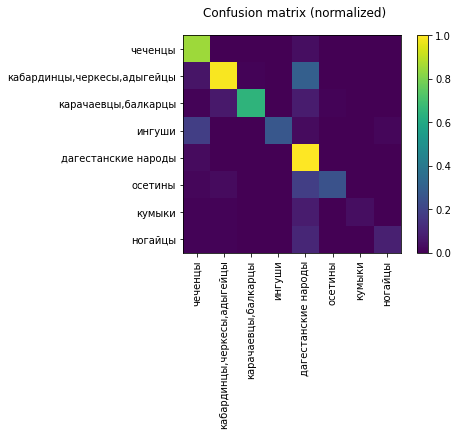

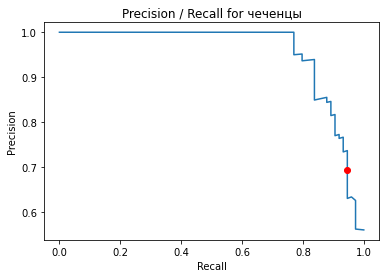

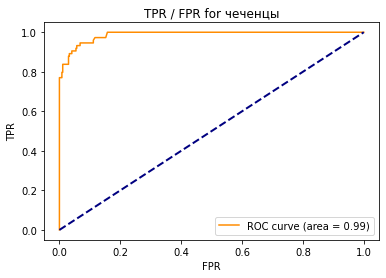

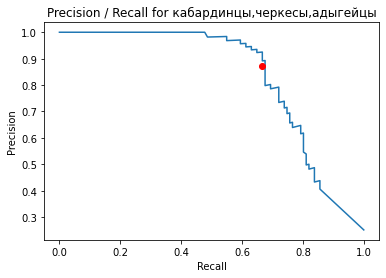

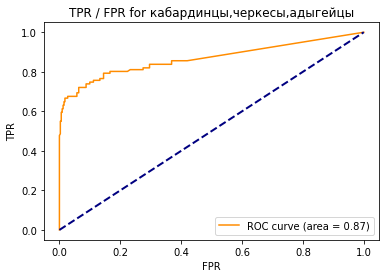

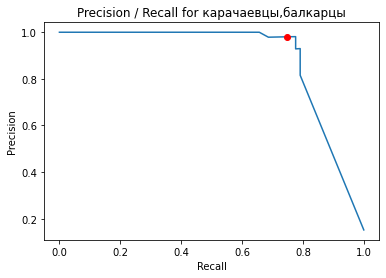

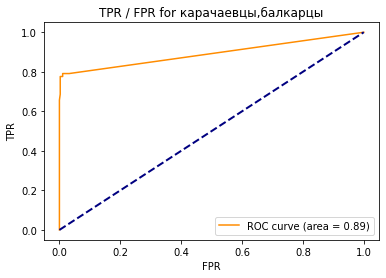

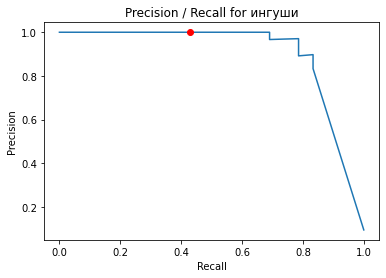

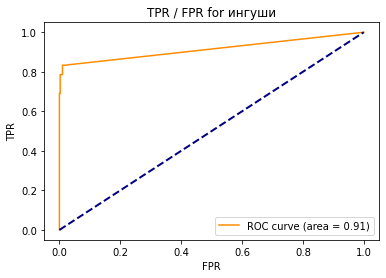

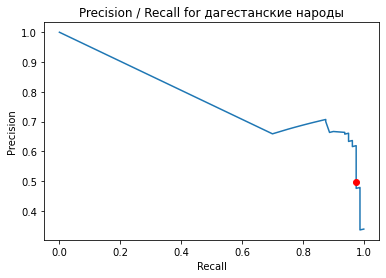

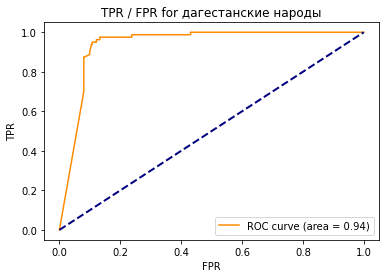

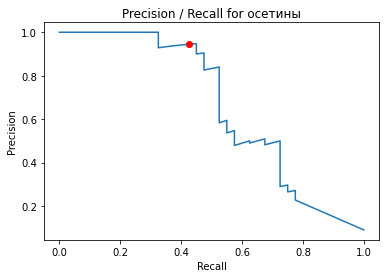

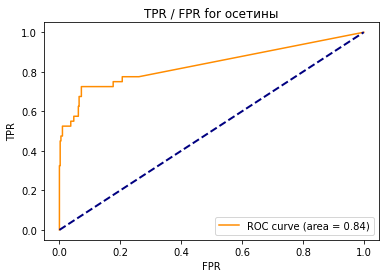

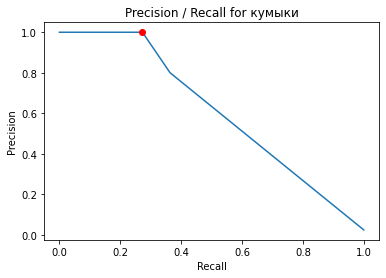

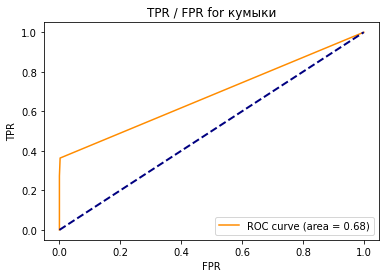

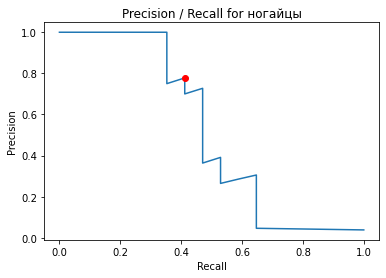

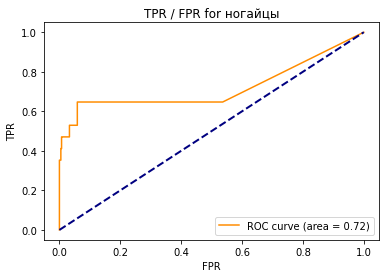

In [91]:
def get_dataset(df, cond):
    types = df['label_id1'].unique().tolist()
    types_dict = {}

    for t in types:
        types_dict[t] = 0

    current_types_dict = types_dict.copy()

    nodes_dict = {}
    
    for i, n in enumerate(df['node_id1']):
        if n in nodes_dict.keys():
            nodes_dict[n][0][df['label_id2'][i]] += df['ibd_sum'][i]
        else:
            if (current_types_dict[df['label_id1'][i]] + 1) / all_types_dict[df['label_id1'][i]] < cond:
                id_ = types.index(df['label_id1'][i])
                current_types_dict[df['label_id1'][i]] += 1
            else:
                id_ = -1
            nodes_dict[n] = [types_dict.copy(), id_]
        
    return nodes_dict

data = get_dataset(df, 0.2) # second number - the part of training data

inputs = [list(i[0].values()) for i in list(data.values())]
targets = [i[1] for i in list(data.values())]

def rbf_kernel_safe(X, Y=None, gamma=None): 

    X, Y = sklearn.metrics.pairwise.check_pairwise_arrays(X, Y) 
    if gamma is None: 
        gamma = 1.0 / X.shape[1] 

    K = sklearn.metrics.pairwise.euclidean_distances(X, Y, squared=True) 
    K *= -gamma 
    K -= K.max()
    np.exp(K, K)    # exponentiate K in-place 
    return K 

# label_prop_model = LabelSpreading(kernel=rbf_kernel_safe, max_iter=1000, tol=1e-3, n_jobs=-1, gamma=200)
label_prop_model = LabelSpreading(kernel='knn', max_iter=1000, tol=1e-3, n_jobs=-1, n_neighbors=11, gamma=100)
label_prop_model.fit(inputs, targets)
predicted = label_prop_model.predict(inputs)

unlabeled_targets = np.array(targets) == -1

data = get_dataset(df, 2) # second number - whatever number > 1 because we need to select all data

targets = np.array([i[1] for i in list(data.values())])

print(classification_report(targets[unlabeled_targets], predicted[unlabeled_targets]))
cr = classification_report(targets[unlabeled_targets], predicted[unlabeled_targets], output_dict=True)

cm = confusion_matrix(targets, predicted, labels=label_prop_model.classes_)
print(cm)

plt.clf()
fig, ax = plt.subplots(1, 1)
img = ax.imshow(cm/np.max(cm))
ax.set_xticks([i for i in range(8)])
ax.set_xticklabels(all_types_dict.keys(), rotation = 90)
ax.set_yticks([i for i in range(8)])
ax.set_yticklabels(all_types_dict.keys())
fig.colorbar(img)
fig.suptitle("Confusion matrix (normalized)")
plt.savefig(r"C:\HSE\genotek\cm_nc.png", bbox_inches="tight")
plt.show()

for i in range(8):
    fpr, tpr, _ = metrics.roc_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)
    pre, rec, _ = metrics.precision_recall_curve(targets[unlabeled_targets],  label_prop_model.predict_proba(inputs)[:, i][unlabeled_targets], pos_label=i)

    plt.clf()
    plt.title('Precision / Recall for ' + list(all_types_dict.keys())[i])
    plt.plot(rec, pre)
    plt.plot(cr[str(i)]['recall'], cr[str(i)]['precision'], 'ro')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.savefig(rf"C:\HSE\genotek\precision_recall_curves_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()
    
    plt.clf()
    plt.title('TPR / FPR for ' + list(all_types_dict.keys())[i])
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % metrics.auc(fpr, tpr), color="darkorange")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.legend(loc="lower right")
    plt.savefig(rf"C:\HSE\genotek\roc_{list(all_types_dict.keys())[i]}.png", bbox_inches="tight")
    plt.show()